In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(5):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 2000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.2
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_02_nB_dqn/'
    model_path = 'model_M_02_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    init_seqCnt = 40
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]
    
    if not os.path.exists(res_path):
        os.mkdir(res_path) 
    
    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['init_path'] = init_path
        info['init_seqCnt'] = init_seqCnt
        user_list.append(MecTermDQN(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    sess.run(tf.global_variables_initializer())
    
    tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

    env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    tflearn.config.is_training(is_training=False, session=sess)
    #Create a saver object which will save all the variables
    saver = tf.train.Saver() 
    saver.save(sess, model_path)

    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------0------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}]
Initialization OK!----> user 1
Initialization OK!----> user 2
Initialization OK!----> user 3
0:r:[ -4.66298324  -8.86238287 -33.01490985],p:[1.00940394 1.65098324 2.1625    ],op:[0.88809606 0.30901676 0.        ],tr:[1.21294366 1.05158098 1.0915772 ],pr:[1.64222861 1.61941534 1.80640939],rev:[0.93  2.055 2.97 ],dbuf:[ 1.08497905  6.17797859 35.86238731],ch:[4.58912266 3.02005968 3.18343053],ibuf:

21:r:[ -6.75842595  -8.07019258 -30.82640947],p:[1.30897191 1.49894976 2.1       ],op:[0.79352809 0.57855024 0.        ],tr:[1.401573   1.4715778  1.22453274],pr:[1.68889988 1.76573875 1.72967143],rev:[1.02  2.015 2.96 ],dbuf:[ 3.19178244  4.89399072 33.28301184],ch:[4.52255582 4.41023371 3.75626998],ibuf:[39.0, 29.0, 22.0],rbuf:[ 1.         15.47675211 23.15916519]
22:r:[ -5.33169854  -9.91927917 -40.1375348 ],p:[1.22584125 1.65425284 1.93      ],op:[0.78165875 0.34074716 0.        ],tr:[1.16896281 1.32256486 1.19613788],pr:[1.68660512 1.62925217 1.62736868],rev:[1.035 1.97  2.87 ],dbuf:[ 1.64587317  7.41159897 45.3469185 ],ch:[3.72063636 3.86417916 3.57806659],ibuf:[20.0, 47.5, 33.5],rbuf:[ 0.          5.50984868 42.7986892 ]
23:r:[ -6.58782109  -6.52235218 -45.73271885],p:[1.21565521 1.47770706 1.9925    ],op:[0.69184479 0.53979294 0.        ],tr:[1.14857355 1.26571697 1.0890414 ],pr:[1.5891366  1.58751247 1.67528217],rev:[1.055 1.99  2.985],dbuf:[ 3.46602636  3.10919023 52.18464856

44:r:[ -4.36717417 -10.67900265 -11.90828521],p:[1.0012855  1.54128182 2.08277737],op:[0.6937145  0.31621818 0.09722263],tr:[1.01459004 1.20585056 1.19875428],pr:[1.50078613 1.67503854 1.77478798],rev:[1.03  2.165 2.88 ],dbuf:[1.22146771 8.70500331 9.43535651],ch:[3.61696787 4.4080173  3.22904723],ibuf:[3.0, 42.5, 8.5],rbuf:[ 6.          2.05631398 12.77361416]
45:r:[-4.69710045 -7.94610544 -8.87946314],p:[1.00465905 1.35001465 1.84692268],op:[0.81284095 0.45748535 0.15807732],tr:[1.21763078 1.22822104 1.41999511],pr:[1.63748205 1.73063519 1.75763447],rev:[0.97 1.86 2.96],dbuf:[1.32762556 5.4138818  6.08682892],ch:[4.58432398 4.97184779 4.37192993],ibuf:[21.0, 41.0, 5.5],rbuf:[ 1.  2. 11.]
46:r:[ -7.01457837  -6.28372678 -14.44026872],p:[1.18216264 1.36208775 2.01549825],op:[0.61283736 0.51541225 0.07700175],tr:[1.23837631 1.10531025 1.43921847],pr:[1.44835091 1.71025939 1.64546938],rev:[0.99  1.94  2.835],dbuf:[ 4.28072297  3.16090848 12.8190859 ],ch:[3.67504382 3.63022364 4.42217801]

67:r:[ -4.40294475  -8.83884017 -14.83389155],p:[1.06444462 1.53784076 2.22579945],op:[0.55805538 0.34465924 0.05420055],tr:[0.80771701 0.98414979 1.27655213],pr:[1.4022756  1.72658526 1.84957219],rev:[1.015 1.92  3.18 ],dbuf:[ 1.44743093  6.34230021 12.84236444],ch:[3.0633051  3.23818625 3.7971987 ],ibuf:[9.0, 37.0, 2.5],rbuf:[ 1.4801579   8.60665411 28.31288264]
68:r:[ -6.08837462  -6.37090278 -16.75827972],p:[1.12509078 1.3421033  2.17484341],op:[0.63490922 0.3003967  0.03265659],tr:[1.18663044 1.12561577 1.24018423],pr:[1.50285384 1.49270532 1.79974169],rev:[1.005 2.07  2.935],dbuf:[ 3.21046827  3.85737848 15.42909965],ch:[4.18054492 4.21135835 3.84716016],ibuf:[48.5, 4.0, 36.5],rbuf:[ 3.          4.25802315 24.84616755]
69:r:[ -4.96109152  -6.4841508  -30.50381845],p:[1.03286745 1.36035478 2.11890339],op:[0.58213255 0.43214522 0.02109661],tr:[1.15743534 0.95682489 1.32979303],pr:[1.38762857 1.7377666  1.72676554],rev:[1.105 1.87  3.015],dbuf:[ 2.1638644   3.6239385  32.77977306],c

90:r:[ -4.26943816  -7.34240951 -24.54250271],p:[0.92079345 1.40932847 2.21116754],op:[0.75170655 0.30817153 0.05133246],tr:[1.13387474 0.94565254 1.36106237],pr:[1.54486042 1.70403526 1.84273804],rev:[0.945 1.92  2.96 ],dbuf:[ 1.1555477   4.88426189 25.02187838],ch:[4.68201566 3.32617962 3.53040787],ibuf:[11.5, 40.5, 46.0],rbuf:[0.         0.84399166 9.3574416 ]
91:r:[ -4.31393255  -5.79383294 -15.02020694],p:[0.87612008 1.23312552 2.07243913],op:[0.61637992 0.35437448 0.05756087],tr:[1.02455214 0.94166757 1.54615752],pr:[1.55586069 1.65361023 1.81532781],rev:[1.05  1.925 3.115],dbuf:[ 1.66116568  3.27354118 13.45025867],ch:[4.50070526 3.87731026 4.7640183 ],ibuf:[23.0, 10.0, 32.5],rbuf:[5.         5.4801579  2.96895587]
92:r:[ -4.02304977  -5.74512015 -21.01703669],p:[0.91821405 1.26924842 2.22764416],op:[0.61428595 0.37325158 0.07235584],tr:[1.11108389 1.14032608 1.38260592],pr:[1.33058259 1.61731944 1.84488176],rev:[1.025 1.955 2.915],dbuf:[ 1.19756221  3.07515018 20.52129587],ch:[

113:r:[-5.78778652 -6.37546972 -9.73150399],p:[1.03361992 1.31231122 1.87302705],op:[0.54388008 0.28018878 0.12947295],tr:[1.22759675 0.77813378 1.26410457],pr:[1.35514522 1.62983321 1.85657365],rev:[1.015 1.97  2.8  ],dbuf:[3.29098315 3.98808715 7.15812998],ch:[5.30957971 2.85982195 4.31927426],ibuf:[44.0, 8.0, 29.0],rbuf:[1.         1.03175127 5.78992129]
114:r:[ -3.87592154  -5.95372563 -10.28458929],p:[0.86011086 1.26387379 2.00254339],op:[0.60488914 0.32862621 0.16495661],tr:[0.86002235 0.8014268  1.31326644],pr:[1.39477051 1.72908736 1.78475428],rev:[0.985 1.835 2.915],dbuf:[1.18240193 3.46090703 7.43698661],ch:[4.13905603 3.80660479 3.70863178],ibuf:[1.0, 24.5, 0.0],rbuf:[ 0.54028937  4.37704836 15.41729022]
115:r:[ -4.99103111  -6.75737481 -64.98711064],p:[0.86910219 1.36927572 1.8425    ],op:[0.52089781 0.35072428 0.        ],tr:[0.9549851  1.09550246 1.16024458],pr:[1.33018907 1.66937778 1.56535598],rev:[0.86  2.075 3.09 ],dbuf:[ 2.76378888  4.14671852 76.6276383 ],ch:[3.9687

136:r:[ -4.1445166   -5.73492597 -12.13389751],p:[0.86242077 1.29739856 2.12513317],op:[0.44757923 0.30510144 0.09736683],tr:[0.77916704 1.11631066 1.32222875],pr:[1.31832295 1.47565686 1.87210118],rev:[0.985 2.05  2.925],dbuf:[1.90564575 3.16240746 9.61112189],ch:[3.72523343 4.01281009 3.28609588],ibuf:[24.0, 0.0, 27.5],rbuf:[1. 3. 4.]
137:r:[ -5.02586438  -6.11062629 -13.1859296 ],p:[0.99831773 1.36860496 2.0951025 ],op:[0.44918227 0.35139504 0.0148975 ],tr:[1.02972886 1.11556516 1.18802379],pr:[1.34048663 1.66895271 1.8398374 ],rev:[1.07 2.04 2.95],dbuf:[ 2.66358048  3.33828286 11.20741201],ch:[4.52195454 3.75149156 3.4226498 ],ibuf:[43.5, 0.0, 20.0],rbuf:[0.         2.         9.42194101]
138:r:[ -4.48419653  -7.67388347 -17.22893268],p:[0.92766666 1.41406606 2.12979044],op:[0.52733334 0.21593394 0.04770956],tr:[0.78224607 1.00300089 1.45282441],pr:[1.44405402 1.53105658 1.80332675],rev:[0.93  1.915 3.04 ],dbuf:[ 1.96774566  5.51735434 16.09241585],ch:[3.05724533 3.91206966 4.14280

159:r:[ -4.24217358 -10.21788994 -24.19973307],p:[0.89357657 1.38995712 2.15423698],op:[0.48642343 0.18754288 0.02076302],tr:[1.04091377 1.03961202 1.60112993],pr:[1.39435709 1.46944213 1.82464531],rev:[1.07  1.915 3.24 ],dbuf:[ 1.85271697  8.82861242 24.81216634],ch:[5.16947642 4.90933852 4.93110499],ibuf:[21.0, 40.5, 46.5],rbuf:[ 4.          2.         18.86568287]
160:r:[ -3.83554914  -5.36970447 -42.95069879],p:[0.86002455 1.16659332 2.3325    ],op:[0.53997545 0.32840668 0.        ],tr:[0.98437025 0.95563357 1.63990407],pr:[1.35361377 1.64103445 1.90605406],rev:[1.035 1.955 3.415],dbuf:[ 1.29443642  2.97463059 47.85712349],ch:[4.00469774 4.06682468 3.99761663],ibuf:[5.0, 12.5, 49.0],rbuf:[ 0.          4.         22.80837465]
161:r:[ -4.82319963  -5.57624114 -16.4689502 ],p:[0.91702979 1.21048166 2.25872175],op:[0.51297021 0.26201834 0.00627825],tr:[1.04422856 1.22675683 1.42002223],pr:[1.41742504 1.42717892 1.93996903],rev:[0.985 2.045 3.205],dbuf:[ 2.45399953  3.28905143 14.923687

182:r:[ -3.72936066  -5.74824099 -13.13259235],p:[0.78087462 1.30099056 2.22334041],op:[0.46162538 0.22650944 0.10915959],tr:[0.91297691 0.8537788  1.4719063 ],pr:[1.16565712 1.60596826 1.94039381],rev:[1.01 2.   3.1 ],dbuf:[ 1.55545082  3.36655124 10.58449044],ch:[4.54891269 3.64300095 3.62244527],ibuf:[19.0, 16.0, 35.0],rbuf:[3.01525542 4.34038495 5.78200232]
183:r:[-5.76255739 -6.37053786 -9.75220609],p:[0.85838889 1.30786429 1.91895207],op:[0.44161111 0.28713571 0.22604793],tr:[1.04072951 0.94851294 1.43766287],pr:[1.25111409 1.67793778 1.80620084],rev:[0.96  2.015 2.91 ],dbuf:[3.95319673 3.97567232 6.82775761],ch:[4.77866089 3.67139237 3.93844106],ibuf:[48.5, 21.0, 15.0],rbuf:[2.         0.73617716 9.9718519 ]
184:r:[ -4.39009267  -5.24373257 -11.80869946],p:[0.86500254 1.2101024  1.95233815],op:[0.42749746 0.2548976  0.05766185],tr:[0.73503237 0.94012251 1.38657428],pr:[1.28676686 1.49128523 1.72003809],rev:[0.995 1.945 2.825],dbuf:[2.25636584 2.89216571 9.73587432],ch:[3.5891902

205:r:[ -3.78226151  -5.97456588 -15.04999038],p:[0.78564231 1.19913423 2.03540515],op:[0.36935769 0.33086577 0.06709485],tr:[0.76790887 1.18428203 1.37022733],pr:[1.25128858 1.54683712 1.8102768 ],rev:[1.06  1.955 2.99 ],dbuf:[ 1.84032689  3.64320734 13.55623797],ch:[3.50096821 5.84663232 3.69128471],ibuf:[25.0, 27.0, 29.5],rbuf:[0.41259895 7.         7.15580084]
206:r:[ -4.25532795  -6.55145744 -42.40855439],p:[0.82530603 1.46438147 2.03      ],op:[0.47969397 0.13311853 0.        ],tr:[0.96683766 0.83942798 1.22373872],pr:[1.32111409 1.60303418 1.72098751],rev:[0.95  2.085 3.105],dbuf:[ 2.05665994  4.1955718  47.93569299],ch:[4.9347376  3.85419379 3.46079762],ibuf:[42.5, 26.0, 44.0],rbuf:[ 0.          3.23552077 76.05475474]
207:r:[ -3.01979933  -5.55984829 -43.31689012],p:[0.60876923 1.14136131 1.92      ],op:[0.42873077 0.23363869 0.        ],tr:[0.84143324 0.95713366 1.09769892],pr:[1.18745767 1.43883238 1.81584991],rev:[0.915 1.895 3.26 ],dbuf:[ 1.18099916  3.51231037 49.34611265

228:r:[-3.0357235  -5.27537628 -9.28341744],p:[0.65129007 1.07911408 2.04358024],op:[0.36120993 0.30588592 0.11391976],tr:[0.6852008  0.89662943 1.20598624],pr:[1.15786969 1.62108594 1.99513093],rev:[1.005 1.98  3.03 ],dbuf:[1.26340437 3.13172035 6.2105218 ],ch:[4.38506669 5.30673719 3.29838904],ibuf:[0.0, 11.5, 2.0],rbuf:[0.62198434 3.86533077 4.        ]
229:r:[ -3.88535943  -5.36237415 -13.23729155],p:[0.871794   1.14130507 2.17478096],op:[0.410706   0.25619493 0.06271904],tr:[0.95846169 0.84755726 1.49584639],pr:[1.28590519 1.61735456 1.87889054],rev:[1.005 1.915 3.11 ],dbuf:[ 1.65044929  3.20921768 10.95286443],ch:[4.30055688 4.45234473 4.09006012],ibuf:[25.5, 14.0, 36.0],rbuf:[1.         2.         5.91869082]
230:r:[ -5.22372678  -9.4278696  -10.86041083],p:[0.8486815  1.40016535 2.14621384],op:[0.4138185  0.16483465 0.04878616],tr:[0.79993402 0.8944998  0.99552524],pr:[1.36173107 1.65315004 1.94545033],rev:[0.975 2.06  2.885],dbuf:[3.37340848 7.87233701 8.08801354],ch:[4.109613

251:r:[ -3.56699659  -6.83306286 -16.7305403 ],p:[0.71883202 1.10856669 1.90963589],op:[0.39366798 0.33143331 0.06786411],tr:[0.9510203  0.95794734 1.27043671],pr:[1.14948912 1.76625996 1.94459029],rev:[0.975 1.96  2.945],dbuf:[ 1.67749574  4.94132857 15.96942538],ch:[5.35259788 5.10285957 3.76181976],ibuf:[27.5, 41.0, 42.5],rbuf:[2.         8.13900033 8.1777345 ]
252:r:[ -5.21961989  -6.18877409 -15.07326906],p:[0.95637635 1.27651206 2.16752568],op:[0.35362365 0.22098794 0.05747432],tr:[0.76874672 0.76076984 1.47195371],pr:[1.31505431 1.62916674 1.86769169],rev:[1.145 2.045 3.17 ],dbuf:[ 3.24952486  3.99221761 13.27908633],ch:[3.55931648 3.17444889 4.92444395],ibuf:[48.0, 3.0, 33.5],rbuf:[ 1.          1.         24.85928023]
253:r:[ -4.79801777  -7.4234806  -10.63487781],p:[0.96736421 1.50301028 1.88118686],op:[0.30013579 0.15698972 0.10881314],tr:[1.03074435 0.81441286 1.365803  ],pr:[1.02352382 1.66405153 1.77437207],rev:[0.96  2.135 2.99 ],dbuf:[2.82877221 5.12935075 8.31859727],ch

274:r:[ -3.1960003   -5.91816194 -10.14009501],p:[0.67610553 1.25740556 1.97766344],op:[0.38639447 0.31759444 0.08233656],tr:[0.62526229 1.05475147 1.40685025],pr:[1.11430479 1.65998777 1.82400867],rev:[1.    1.98  3.085],dbuf:[1.33875038 3.46020243 7.52511876],ch:[3.04509043 3.81752959 3.97371888],ibuf:[1.0, 20.5, 9.5],rbuf:[2.         0.         6.92532456]
275:r:[ -3.90249069  -4.98117493 -11.0350254 ],p:[0.68212553 1.1067228  1.89774189],op:[0.32037447 0.3382772  0.08225811],tr:[0.58094007 1.19265182 1.43628635],pr:[1.2146184  1.54658074 1.76907903],rev:[0.83 1.92 3.02],dbuf:[2.37186336 2.61396867 8.84378175],ch:[2.85478387 4.89036682 4.02816091],ibuf:[32.0, 8.0, 4.5],rbuf:[1. 1. 2.]
276:r:[ -3.40820136  -8.46608969 -15.73677697],p:[0.66818311 1.42096691 2.06248157],op:[0.41681689 0.31403309 0.01501843],tr:[0.81106796 1.05539495 1.50799399],pr:[1.30471685 1.69210003 1.64138212],rev:[1.01  2.005 2.975],dbuf:[ 1.5477517   6.24511211 14.47722121],ch:[5.54142092 3.54268544 3.91004933],

297:r:[ -3.72339563  -6.61502128 -14.92129563],p:[0.76891405 1.32952191 2.13846932],op:[0.41858595 0.26297809 0.05903068],tr:[0.91766362 1.24658887 1.34036299],pr:[1.13356946 1.55416412 1.88431403],rev:[0.915 2.145 2.965],dbuf:[ 1.68549454  4.28752659 13.15786954],ch:[3.71868464 4.57350547 3.72939206],ibuf:[28.0, 27.0, 45.5],rbuf:[ 2.20646221  5.46391904 14.45463704]
298:r:[ -5.55235929  -5.38488947 -10.81233892],p:[0.80070276 1.22794612 2.19028357],op:[0.36679724 0.13205388 0.08721643],tr:[0.74249843 0.94797098 1.41429808],pr:[1.29029222 1.40618504 1.98923207],rev:[1.025 2.045 3.135],dbuf:[4.02169911 3.33111184 7.82167365],ch:[4.06988006 4.07104645 3.64839744],ibuf:[48.5, 13.5, 32.0],rbuf:[0.        7.0957685 2.4801579]
299:r:[ -3.68668966 -10.5643028  -61.56133043],p:[0.73474836 1.59441944 2.06      ],op:[0.33525164 0.20308056 0.        ],tr:[0.78751887 0.85990907 1.49656161],pr:[1.07507386 1.80872591 1.31716733],rev:[0.905 2.1   3.11 ],dbuf:[ 1.93336207  8.7116285  71.80166304],ch:[

320:r:[ -4.23557064  -6.76350869 -22.0538811 ],p:[0.80629541 1.46065477 2.2481227 ],op:[0.35620459 0.18184523 0.0568773 ],tr:[0.73939625 1.06801746 1.3031661 ],pr:[1.12236018 1.52236216 1.9896817 ],rev:[1.    2.15  3.165],dbuf:[ 2.3882133   4.34813587 21.80485137],ch:[3.76913656 3.86917632 3.84420975],ibuf:[33.5, 12.5, 38.5],rbuf:[ 1.          2.24810282 32.85120137]
321:r:[ -5.08980817  -6.51277577 -11.12513904],p:[0.95375941 1.3158005  2.04324231],op:[0.35374059 0.1741995  0.08675769],tr:[0.75923332 0.75256404 1.11463988],pr:[1.23284827 1.70734649 1.92586685],rev:[0.995 1.995 2.855],dbuf:[3.09351022 4.41596971 8.5814238 ],ch:[3.69440057 3.58033306 3.39231927],ibuf:[48.5, 35.0, 34.0],rbuf:[ 1.          2.06635334 17.69011692]
322:r:[ -2.93819396  -5.04496973 -18.81771464],p:[0.59749353 1.16045501 2.37654416],op:[0.36500647 0.21954499 0.01345584],tr:[0.58121972 0.81342443 1.23919391],pr:[1.21956403 1.59016668 2.09358726],rev:[0.99  1.905 3.23 ],dbuf:[ 1.26649244  2.85621216 17.5471433 

343:r:[ -3.35135855  -5.15958375 -10.96286969],p:[0.73104528 1.09713555 2.09074441],op:[0.28145472 0.30036445 0.18675559],tr:[1.07176997 1.07522303 1.55906152],pr:[0.93003828 1.46115645 1.88779732],rev:[1.075 2.025 2.96 ],dbuf:[1.65794818 2.95572969 8.00983711],ch:[5.09435559 4.22144865 3.59122406],ibuf:[13.5, 1.5, 23.5],rbuf:[2.88057748 2.         1.        ]
344:r:[ -4.63932217  -9.06315072 -15.57448733],p:[0.83916432 1.44066226 1.91745561],op:[0.33333568 0.08933774 0.08504439],tr:[0.86381315 0.7081081  1.51226135],pr:[1.11480697 1.69960616 1.86480569],rev:[1.015 2.025 3.045],dbuf:[ 2.86790271  7.5039384  14.46185916],ch:[3.92886352 3.75672708 5.10495669],ibuf:[44.0, 46.5, 49.0],rbuf:[ 1.          4.46052455 11.79391556]
345:r:[ -4.0536385   -9.08159498 -13.10764654],p:[0.72646912 1.34494161 1.79450872],op:[0.35103088 0.11255839 0.04549128],tr:[0.86927278 1.20484036 1.37334476],pr:[1.1994327  1.32500806 1.63425868],rev:[1.01  2.015 3.13 ],dbuf:[ 2.37329812  7.70824372 11.78455817],ch

366:r:[ -3.90583609  -5.91003442 -12.29627541],p:[0.83759648 1.43568851 2.06359204],op:[0.34990352 0.09681149 0.02640796],tr:[1.05346303 1.04580258 1.05223906],pr:[1.09567695 1.39380379 1.96662401],rev:[0.86  2.18  2.825],dbuf:[ 1.91354511  3.55629303 10.14534426],ch:[4.24054328 4.01816953 2.9267744 ],ibuf:[35.0, 3.0, 28.5],rbuf:[0.         2.         4.55911385]
367:r:[ -4.96373193  -6.29221973 -13.42907823],p:[0.70210131 1.43023262 1.94851549],op:[0.42789869 0.19226738 0.10898451],tr:[0.48837703 1.06739092 1.52320668],pr:[1.45671293 1.50167966 1.80182991],rev:[0.97 2.13 2.89],dbuf:[ 3.37966491  3.80902466 11.64259778],ch:[3.60214838 3.81368164 4.4255315 ],ibuf:[48.0, 20.5, 49.0],rbuf:[4.44089210e-15 5.49571816e+00 7.02173573e+00]
368:r:[ -3.25258725  -6.37694966 -11.86812465],p:[0.74588997 1.41172343 2.13381141],op:[0.33911003 0.13327657 0.02618859],tr:[0.82446322 1.07683427 1.19815605],pr:[1.20287038 1.44329437 1.79997486],rev:[1.055 2.115 2.985],dbuf:[1.35323407 4.10868707 9.435155

389:r:[ -5.12300265  -9.48509055 -23.78654232],p:[0.90345026 1.50463984 1.94385735],op:[0.34154974 0.16786016 0.01114265],tr:[0.75158364 0.92898256 0.92632428],pr:[1.20217849 1.69322723 1.81316532],rev:[1.055 2.055 3.12 ],dbuf:[ 3.29125331  7.67511319 24.8456779 ],ch:[3.77052095 3.25369043 3.14254136],ibuf:[46.5, 44.0, 10.5],rbuf:[ 0.          3.39716602 89.51832671]
390:r:[ -4.52403564  -5.65869753 -20.45145908],p:[0.75364343 1.18835189 2.21815081],op:[0.28635657 0.16664811 0.02434919],tr:[0.73232866 0.71589573 1.26066322],pr:[1.20196417 1.65750807 2.03694013],rev:[0.98  2.07  3.135],dbuf:[ 3.05504455  3.68587192 19.95807385],ch:[3.55682933 3.44480714 3.26604611],ibuf:[45.0, 4.0, 37.0],rbuf:[ 1.54267105  4.         11.23293675]
391:r:[ -4.26547058  -6.74104704 -12.07949245],p:[0.84497096 1.39521997 1.93470848],op:[0.42252904 0.15728003 0.09279152],tr:[0.80206966 0.95551094 1.21001786],pr:[1.34940476 1.5945283  1.91783527],rev:[1.085 2.175 2.81 ],dbuf:[ 2.16308823  4.54505881 10.030615

412:r:[ -3.52259809  -9.62768414 -52.55872369],p:[0.76618545 1.58963133 1.48004509],op:[0.40631455 0.07286867 0.11245491],tr:[0.97811834 1.24751456 1.28753217],pr:[1.24366659 1.3526046  1.16664549],rev:[1.045 2.16  2.99 ],dbuf:[ 1.47199761  7.87835518 61.71715461],ch:[3.80009512 3.64913533 3.75869186],ibuf:[16.0, 35.0, 7.0],rbuf:[  0.           3.77193844 147.51262036]
413:r:[-3.08633094 -5.29404825 -9.28480787],p:[0.68776007 1.22908056 1.90656133],op:[0.27223993 0.19341944 0.14343867],tr:[0.79100027 1.22137811 1.46386436],pr:[1.02691922 1.45342541 1.7472796 ],rev:[1.055 2.105 2.92 ],dbuf:[1.45791368 3.06131031 6.48100984],ch:[4.44898176 4.29596978 4.02129505],ibuf:[12.0, 5.5, 20.5],rbuf:[3.04538569 5.         8.08310397]
414:r:[ -3.57764369  -5.51702829 -12.90130466],p:[0.79045134 1.36399884 2.04457402],op:[0.51454866 0.21850116 0.14542598],tr:[0.82418429 0.8857345  1.26374363],pr:[1.45814382 1.61738044 1.99076003],rev:[1.   1.98 2.92],dbuf:[ 1.20955461  2.94003537 10.65163083],ch:[4.

435:r:[  -4.19652497   -5.61661993 -117.57662427],p:[0.97390078 1.17025349 1.715     ],op:[0.28359922 0.27974651 0.        ],tr:[1.02394522 0.62741945 1.29731779],pr:[1.01493002 1.78641432 1.03760945],rev:[0.945 1.94  3.105],dbuf:[  2.10190621   3.39577491 142.68328034],ch:[3.76414485 3.56190543 4.29742158],ibuf:[26.0, 7.0, 37.5],rbuf:[  1.           2.74995117 191.51455393]
436:r:[ -4.11324493  -5.45415961 -49.85611955],p:[0.7150455  1.23581518 1.49      ],op:[0.5249545  0.10668482 0.        ],tr:[0.84654297 1.04287651 1.19243944],pr:[1.42252505 1.25970813 1.69228225],rev:[1.03  1.975 3.25 ],dbuf:[ 2.04155616  3.46144952 58.59514944],ch:[3.6433582  3.96191212 3.9895614 ],ibuf:[33.5, 0.0, 34.0],rbuf:[  1.           3.8251979  107.05566227]
437:r:[ -3.43458702  -5.78144709 -11.12212335],p:[0.70913107 1.36265764 2.00151907],op:[0.30586893 0.23234236 0.16348093],tr:[0.96245083 0.83376954 1.69980455],pr:[1.14016334 1.49576937 1.74751966],rev:[1.03  1.94  2.985],dbuf:[1.75573377 3.23930886 

458:r:[ -3.5179572   -5.89875689 -12.49502128],p:[0.71015205 1.19839945 1.75364937],op:[0.32734795 0.14660055 0.06635063],tr:[0.60027009 1.1530971  1.17370257],pr:[1.18930523 1.51653845 1.8482984 ],rev:[1.    2.125 2.855],dbuf:[ 1.8036965   4.01094611 11.0687766 ],ch:[3.44567685 4.85345694 3.49814111],ibuf:[19.5, 20.0, 3.0],rbuf:[2.         4.15094145 4.45021181]
459:r:[ -3.98673927  -5.09893838 -10.39502879],p:[0.71262201 1.23396954 1.86266178],op:[0.48737799 0.11103046 0.13233822],tr:[0.67473211 0.99041186 1.65430118],pr:[1.40720859 1.24815535 1.64144677],rev:[0.98  1.8   2.945],dbuf:[1.98342408 3.01117298 8.00628599],ch:[3.76834542 3.93410093 4.36214189],ibuf:[33.0, 6.0, 29.0],rbuf:[ 2.          1.         11.01004519]
460:r:[ -4.30712453  -5.59027914 -12.01427859],p:[0.68601189 1.11878081 2.15135767],op:[0.73398811 0.18871919 0.04114233],tr:[0.60506311 1.09177385 1.37348378],pr:[1.65931069 1.37190775 1.82865963],rev:[0.97 2.   2.99],dbuf:[1.83390567 3.71909892 9.53659823],ch:[3.746

481:r:[ -2.98093583  -8.07907182 -10.03522195],p:[0.55441623 1.44640537 1.81224626],op:[0.49308377 0.14359463 0.13025374],tr:[0.63268114 1.04320065 1.4625011 ],pr:[1.45730925 1.53125935 1.79868829],rev:[0.935 2.03  2.875],dbuf:[1.10741979 6.12383977 7.68777743],ch:[5.22456168 3.21568072 4.8835462 ],ibuf:[10.0, 43.0, 30.5],rbuf:[2.         5.         5.26878976]
482:r:[ -3.19840803  -7.39956055 -16.98243409],p:[0.63082858 1.37462615 2.2922439 ],op:[0.46917142 0.16537385 0.0252561 ],tr:[0.71780773 0.95920279 1.5076869 ],pr:[1.36203696 1.52659677 1.95228071],rev:[1.035 2.065 3.25 ],dbuf:[ 1.24801004  5.39945069 15.43429261],ch:[3.22043037 4.06275361 4.26026262],ibuf:[4.0, 41.0, 49.0],rbuf:[ 0.          3.83164517 16.48866515]
483:r:[ -3.37976648  -5.70333664 -17.29883193],p:[0.67766006 1.08582108 2.3025    ],op:[0.42233994 0.17417892 0.        ],tr:[0.54735692 0.87741181 1.16901292],pr:[1.40366908 1.47855    2.09110458],rev:[1.165 1.79  3.135],dbuf:[ 1.47470809  3.97917079 15.86728991],ch

504:r:[  -4.17164577   -6.47230001 -114.56588353],p:[0.86674749 1.36709203 1.7575    ],op:[0.29325251 0.30040797 0.        ],tr:[0.8174111  0.51208823 0.25701788],pr:[1.15298401 2.02578032 2.02398766],rev:[0.995 2.05  3.05 ],dbuf:[  2.31455722   3.92162501 138.81360441],ch:[4.21808502 3.22091665 3.9286495 ],ibuf:[30.0, 15.5, 34.0],rbuf:[  0.           4.57306385 187.79889154]
505:r:[ -3.40815248  -5.99771977 -58.69019702],p:[0.64096971 1.23051359 1.835     ],op:[0.46903029 0.42448641 0.        ],tr:[0.90532768 0.8091625  1.50508178],pr:[1.21314082 1.83846025 1.24504379],rev:[0.915 1.84  2.795],dbuf:[ 1.4851906   3.35964971 68.77524627],ch:[4.68461515 4.17971776 3.71109822],ibuf:[28.5, 28.0, 16.5],rbuf:[ 0.          3.         25.47488717]
506:r:[ -3.9493437   -5.11305452 -16.1250391 ],p:[0.7764535  1.03895255 2.0149541 ],op:[0.3635465  0.27604745 0.0225459 ],tr:[0.81716049 0.78613916 1.34241795],pr:[1.21894133 1.64631746 1.91282271],rev:[1.09  1.905 3.125],dbuf:[ 2.08667962  3.10381815

527:r:[ -3.03608609  -6.64075447 -10.12528047],p:[0.61128649 1.16280174 1.81822676],op:[0.36371351 0.13469826 0.08177324],tr:[0.66630861 1.00755709 1.40172136],pr:[1.1575257  1.4943256  1.86903461],rev:[1.01  1.985 3.115],dbuf:[1.35760761 5.05719308 7.90660059],ch:[4.0518351  3.98800079 4.23440779],ibuf:[5.5, 47.0, 11.0],rbuf:[1.         4.36492252 8.05007254]
528:r:[ -4.34628343  -6.02900379 -10.52415226],p:[0.85984137 1.15991756 2.20847284],op:[0.38265863 0.36508244 0.11652716],tr:[0.94851084 0.6286785  1.56608668],pr:[1.15076642 1.88280356 1.84506977],rev:[1.04  1.925 3.11 ],dbuf:[2.32660429 3.72375474 7.34269032],ch:[3.85746763 4.16244242 3.45145659],ibuf:[34.5, 34.5, 24.5],rbuf:[0.         6.36495045 4.        ]
529:r:[ -3.05981548  -5.97732005 -10.13170365],p:[0.65616562 1.18431931 1.9540476 ],op:[0.28883438 0.20818069 0.1234524 ],tr:[0.83969186 0.76016012 1.35971545],pr:[1.01936273 1.6277147  1.86278556],rev:[1.005 1.835 2.94 ],dbuf:[1.46226935 3.99040007 7.47087956],ch:[3.73806

550:r:[ -2.70149634  -5.66259931 -35.6908007 ],p:[0.56395544 1.17216617 1.90345985],op:[0.26604456 0.10783383 0.01154015],tr:[0.65678044 1.18585225 1.28342496],pr:[1.05610534 1.20644721 1.75482243],rev:[1.045 2.135 2.86 ],dbuf:[ 1.30187043  3.87824914 39.82600088],ch:[4.06567831 4.17381609 3.3669368 ],ibuf:[3.0, 0.0, 39.0],rbuf:[1.         1.         5.20811281]
551:r:[ -4.15478712  -6.30930666 -11.35816875],p:[0.71448605 1.53641784 2.2018969 ],op:[0.61801395 0.44608216 0.1481031 ],tr:[0.76210609 1.12446415 1.36321324],pr:[1.62203364 1.61579487 2.0180609 ],rev:[1.035 2.03  3.005],dbuf:[1.8622339  2.93038332 8.32271094],ch:[4.41530106 3.36858468 4.14730797],ibuf:[29.5, 3.0, 24.5],rbuf:[0.        2.        6.4745691]
552:r:[-3.23439054 -7.24006002 -7.50532574],p:[0.79634334 1.32860968 1.67011121],op:[0.23115666 0.21139032 0.16738879],tr:[0.81794798 0.79518387 1.54085716],pr:[1.03025595 1.72183449 1.81536881],rev:[1.045 1.975 2.92 ],dbuf:[1.47423818 5.20007503 4.78790717],ch:[4.62428875 3

573:r:[ -4.40644755  -4.71236383 -18.45786241],p:[0.7085496  0.96470446 2.36166712],op:[0.6464504  0.31029554 0.08833288],tr:[0.67287298 0.81965148 1.58184537],pr:[1.59655906 1.66141635 1.78217468],rev:[1.035 1.92  3.015],dbuf:[ 2.12055944  2.70295479 16.94732801],ch:[4.18600073 3.97177295 4.73439644],ibuf:[20.5, 9.0, 41.5],rbuf:[1.         5.34606123 2.        ]
574:r:[ -4.00896237  -6.08527431 -10.59262   ],p:[0.83791829 1.25979148 1.79821358],op:[0.35208171 0.25270852 0.15928642],tr:[0.86123154 0.78844476 1.36269476],pr:[1.2515908  1.68582993 1.68741522],rev:[1.04  2.065 2.99 ],dbuf:[2.03620296 3.82534289 8.347025  ],ch:[3.71809827 3.78685477 4.51829001],ibuf:[31.5, 10.5, 6.0],rbuf:[ 0.         12.88106287 45.63960099]
575:r:[ -4.15697615  -6.29022273 -92.96773255],p:[0.65824419 1.47998648 1.8325    ],op:[0.76925581 0.14001352 0.        ],tr:[0.86474538 1.09735763 1.7014161 ],pr:[1.65365586 1.4194858  0.28654826],rev:[0.98  2.005 2.895],dbuf:[  1.62747019   3.81277841 111.62841569],

596:r:[ -3.68944277  -5.29916492 -19.28080326],p:[0.62989865 1.21346429 1.75850855],op:[0.27760135 0.20403571 0.12649145],tr:[0.53834671 1.32026477 1.54914707],pr:[1.25462565 1.13695566 1.49753261],rev:[0.995 1.975 3.045],dbuf:[ 2.34305346  3.08020615 19.38850408],ch:[4.87002473 5.00238008 4.70029806],ibuf:[35.0, 15.0, 11.0],rbuf:[ 1.          3.         68.13331541]
597:r:[ -4.77457715  -5.57005058 -13.57323358],p:[0.95588782 1.30138101 2.34580246],op:[0.38911218 0.30611899 0.05169754],tr:[1.2309241  0.83409874 1.02081482],pr:[1.33988594 1.66334684 2.14804741],rev:[0.925 1.965 3.105],dbuf:[ 2.60572144  2.94381322 10.97279197],ch:[3.89238272 3.22052103 2.5940813 ],ibuf:[43.0, 16.0, 10.5],rbuf:[1.         2.58233333 8.1970408 ]
598:r:[ -5.52571644  -7.09899028 -10.46668953],p:[0.82716144 1.35913871 1.93773835],op:[0.45783856 0.14336129 0.12226165],tr:[0.76782289 0.76163442 1.3384064 ],pr:[1.40218462 1.66977229 1.90134667],rev:[0.97  2.115 3.07 ],dbuf:[3.69464554 5.11748785 7.93336192],c

619:r:[ -5.09559685  -5.55781452 -10.03997689],p:[0.70495661 1.25206492 2.10561398],op:[0.48754339 0.40793508 0.10438602],tr:[0.74419347 1.0510084  1.34719483],pr:[1.42091661 1.63463947 1.973376  ],rev:[0.93  1.93  3.065],dbuf:[3.38824606 2.79726815 7.02497112],ch:[4.01097319 4.05404772 3.02448599],ibuf:[49.0, 11.0, 32.0],rbuf:[ 0.          4.65718199 18.65260357]
620:r:[ -3.57138562  -5.55542929 -14.98318748],p:[0.68850995 1.29883536 2.27870098],op:[0.39899005 0.16866464 0.00129902],tr:[0.74118877 1.09762082 1.48116518],pr:[1.33874331 1.39732763 1.90326371],rev:[0.995 2.06  3.38 ],dbuf:[ 1.74548203  3.27553662 13.02898436],ch:[5.03817454 3.95413492 3.55698088],ibuf:[27.0, 7.0, 10.5],rbuf:[3.50397219 5.76231788 9.79586959]
621:r:[ -3.57765455  -8.55969616 -25.22911948],p:[0.67127346 1.63402795 2.51991195],op:[3.51226542e-01 1.00972045e-01 8.80459509e-05],tr:[0.87414513 0.98070811 1.26486541],pr:[1.31490523 1.39377081 2.07096575],rev:[1.005 1.95  3.15 ],dbuf:[ 1.91581818  6.3621202  25.

642:r:[ -3.05819302  -7.30940627 -11.18620498],p:[0.61416851 1.4087631  1.89214957],op:[0.38083149 0.2387369  0.06785043],tr:[0.82952529 1.14656585 1.59320665],pr:[1.14954414 1.65935197 1.81394507],rev:[0.975 2.065 3.225],dbuf:[1.33524128 5.01800784 9.08275622],ch:[4.39051536 4.1609888  4.61622537],ibuf:[16.0, 46.0, 18.5],rbuf:[ 2.41259895  8.43791621 12.74636069]
643:r:[ -3.60797657  -5.23806893 -16.18744754],p:[0.90312206 1.24131311 2.25836527],op:[0.24937794 0.14868689 0.04913473],tr:[1.02975115 0.88315451 0.91807545],pr:[0.79438468 1.38977805 2.06192521],rev:[1.035 1.935 3.065],dbuf:[ 1.62872072  3.07258616 14.46555942],ch:[3.8380436  3.92157945 2.52416281],ibuf:[22.0, 6.0, 29.0],rbuf:[ 3.65783329  5.18322763 56.97750628]
644:r:[ -3.97119888  -6.61630451 -10.22766583],p:[0.79257188 1.34493872 1.92336908],op:[0.35492812 0.20756128 0.14913092],tr:[1.02803464 1.52329251 2.09523207],pr:[1.23732191 1.23051847 1.65592738],rev:[1.09  2.035 3.21 ],dbuf:[2.0952486  4.38913063 7.60333229],ch

665:r:[ -3.99683582  -8.34663687 -23.2712629 ],p:[0.69962233 1.3270434  2.5105567 ],op:[0.57537767 0.4154566  0.0469433 ],tr:[0.62470473 1.32375533 1.49681366],pr:[1.47103619 1.71108367 2.00015966],rev:[0.965 1.95  3.175],dbuf:[ 1.80854477  6.07704608 22.69532863],ch:[3.79563082 4.90181605 4.12586079],ibuf:[36.0, 46.5, 48.5],rbuf:[0.         2.64985341 0.71057151]
666:r:[-4.21144314 -8.23595181 -9.78075589],p:[0.75621085 1.54610451 1.88525463],op:[0.33128915 0.03389549 0.07724537],tr:[0.70451566 1.07050255 1.15497912],pr:[1.40753594 1.36954423 1.84724367],rev:[1.14  2.215 2.835],dbuf:[2.54555393 6.34493976 7.31969486],ch:[4.15311797 3.22108501 3.24823586],ibuf:[28.5, 28.5, 10.0],rbuf:[ 2.          4.86952178 13.72075186]
667:r:[ -3.64955543  -8.06309751 -12.51185954],p:[0.72214329 1.44685825 2.11959364],op:[0.30285671 0.11064175 0.02290636],tr:[0.76467796 1.0698641  1.13052721],pr:[1.17350147 1.41309421 2.04163582],rev:[0.96  2.    2.985],dbuf:[ 1.99944429  6.18512188 10.28357442],ch:[

688:r:[ -3.23885355  -8.26701407 -10.67794691],p:[0.71751693 1.33372671 2.25502843],op:[0.42748307 0.07627329 0.12747157],tr:[0.87926728 0.87282973 1.45710176],pr:[1.38523783 1.60185635 1.99475271],rev:[1.    2.15  3.085],dbuf:[1.18606694 6.80876759 7.39118364],ch:[4.09882737 4.1990348  4.52275639],ibuf:[3.5, 42.0, 35.5],rbuf:[3.07680093 4.         5.8296521 ]
689:r:[ -3.53166844  -6.3672451  -10.5185325 ],p:[0.77381369 1.34184738 1.90968603],op:[0.40868631 0.23565262 0.02531397],tr:[0.84616464 1.08761757 1.18947724],pr:[1.29106868 1.5377898  1.90337857],rev:[0.98  1.945 3.06 ],dbuf:[1.45833555 4.01530637 8.31066563],ch:[3.72428605 3.85771933 3.64957473],ibuf:[25.5, 21.0, 2.5],rbuf:[1.         1.         8.00055984]
690:r:[ -3.20347904  -5.93139849 -19.1371194 ],p:[0.6828933  1.26111919 2.22691079],op:[0.4171067  0.28888081 0.00308921],tr:[0.88709106 1.0518523  1.30044272],pr:[1.24631271 1.67210221 2.01479107],rev:[1.01  2.035 3.16 ],dbuf:[ 1.2543488   3.53924812 18.34639926],ch:[4.613

711:r:[ -3.45928115  -6.60118486 -10.90147899],p:[0.82845328 1.39873974 2.18676213],op:[0.31404672 0.10626026 0.07323787],tr:[0.87662176 1.08095473 1.48648479],pr:[1.21808294 1.13610309 1.87214818],rev:[1.09  1.9   3.165],dbuf:[1.46785144 4.48898108 7.97684874],ch:[3.89560476 3.94180688 4.09107937],ibuf:[4.5, 5.5, 16.5],rbuf:[0. 2. 1.]
712:r:[ -4.82426781  -5.72668914 -16.09924723],p:[0.77153304 1.32934621 2.29328153],op:[0.37596696 0.20815379 0.00421847],tr:[0.55304835 0.93918628 1.20691755],pr:[1.41553535 1.34107396 2.0503867 ],rev:[0.865 1.93  3.07 ],dbuf:[ 3.16158476  3.31461142 14.38030903],ch:[3.90384378 2.85469835 3.95907411],ibuf:[42.5, 1.5, 47.0],rbuf:[ 0.60012202  4.         12.44852565]
713:r:[-3.74531653 -6.02316852 -9.94842864],p:[0.84539514 1.52055753 1.79193032],op:[0.46460486 0.17194247 0.04556968],tr:[0.84001082 1.06273323 1.45265199],pr:[1.29837025 1.56280352 1.71928215],rev:[1.005 2.075 3.075],dbuf:[1.40664566 3.29771065 7.8417858 ],ch:[3.94684424 3.79402737 4.669241

734:r:[ -3.40159268  -7.43435334 -17.75663824],p:[0.6293492  1.23980105 2.08686435],op:[0.5406508  0.04019895 0.02563565],tr:[0.59343729 0.732848   1.20156768],pr:[1.48628487 1.55056516 1.84539566],rev:[0.985 2.06  2.915],dbuf:[ 1.32699084  6.09294168 16.9145478 ],ch:[3.3777641  4.08785416 3.0256203 ],ibuf:[7.5, 36.0, 37.0],rbuf:[ 0.66958082  3.         18.21186624]
735:r:[ -5.02618075  -7.24152337 -10.53196617],p:[0.6302771  1.34500004 1.8624812 ],op:[0.3272229  0.15499996 0.1350188 ],tr:[0.62337188 0.96934378 1.36435105],pr:[1.44133531 1.60668341 1.88373153],rev:[0.955 2.04  2.905],dbuf:[3.88897594 5.30190421 8.17120771],ch:[5.00806104 3.31797978 5.13142034],ibuf:[44.0, 38.0, 27.5],rbuf:[ 1.         10.76766295 10.63882976]
736:r:[ -3.11570489  -6.4507211  -11.14836817],p:[0.83634979 1.49620678 1.94816798],op:[0.17865021 0.24129322 0.13683202],tr:[0.9851489  1.55545625 1.58200938],pr:[0.74780549 1.35739327 1.80046063],rev:[0.97  2.075 2.92 ],dbuf:[1.35713111 3.71965138 8.72296022],ch

757:r:[-4.24751294 -5.3814417  -9.4789335 ],p:[1.03137328 1.16982401 1.77362081],op:[0.26362672 0.16517599 0.08387919],tr:[1.30188981 1.09517178 1.5196577 ],pr:[0.97050092 1.27967182 1.83343801],rev:[0.925 1.775 3.065],dbuf:[2.07189118 3.38930213 7.20491688],ch:[4.16920318 4.48746322 4.79689223],ibuf:[44.0, 25.5, 31.0],rbuf:[1.         2.         4.02820247]
758:r:[ -3.83191052  -5.58442865 -11.4027993 ],p:[0.76632025 1.09380772 2.1968752 ],op:[0.58367975 0.23119228 0.0406248 ],tr:[0.93146293 0.63757734 1.30436209],pr:[1.6183471  1.726513   1.96323669],rev:[0.94  1.895 3.11 ],dbuf:[1.41488814 3.66803581 8.65974913],ch:[4.14110542 3.78315621 3.60277127],ibuf:[27.0, 30.0, 18.5],rbuf:[0.         4.23779684 5.5464476 ]
759:r:[-2.92766809 -6.29090378 -7.51045334],p:[0.67561111 1.08938174 1.67671501],op:[0.27438889 0.19311826 0.11328499],tr:[0.66149079 0.56463413 1.4405858 ],pr:[1.16418757 1.70806335 1.54846481],rev:[0.95  2.02  2.785],dbuf:[1.28458511 4.65737972 4.91306668],ch:[3.84301487 4

780:r:[ -3.73748417  -6.48301998 -16.23062692],p:[0.97061342 1.44860139 2.60898575],op:[0.25188658 0.20889861 0.03351425],tr:[1.07789292 1.0290941  1.40315068],pr:[0.98571902 1.49816479 1.92053984],rev:[0.995 2.075 3.09 ],dbuf:[ 1.61560521  3.96002498 13.68203365],ch:[5.49859127 4.06232598 3.23134466],ibuf:[21.5, 28.0, 48.5],rbuf:[3.         7.01087037 7.7973327 ]
781:r:[ -3.38292857  -8.63940377 -19.90797881],p:[0.66609462 1.49304034 2.0716391 ],op:[0.44390538 0.20945966 0.0783609 ],tr:[0.57391622 1.09528974 1.24589679],pr:[1.24342374 1.70560407 2.04918806],rev:[0.96  2.155 3.005],dbuf:[ 1.45366071  6.54300472 19.50997351],ch:[2.91271421 4.14799854 4.29758709],ibuf:[9.5, 40.5, 49.0],rbuf:[0.94612496 1.         8.90208679]
782:r:[ -4.12532105  -6.46324756 -10.32961049],p:[0.87902959 1.31414364 1.7879246 ],op:[0.44347041 0.31835636 0.0545754 ],tr:[0.88579384 0.99049882 1.16876518],pr:[1.33127921 1.76832876 1.81835809],rev:[0.99 1.92 2.9 ],dbuf:[1.85040131 3.99780945 8.30576311],ch:[3.45

803:r:[  -3.69058531   -6.3258897  -107.92410366],p:[0.61017669 1.43205983 1.33      ],op:[0.71732331 0.23544017 0.        ],tr:[0.63353279 0.72734944 1.10152212],pr:[1.67226651 1.82216773 1.31212542],rev:[0.98  2.16  3.195],dbuf:[  1.29448163   3.73861212 131.58012958],ch:[4.57373617 3.77704465 4.47085972],ibuf:[15.0, 21.0, 48.0],rbuf:[  1.           3.4801579  204.27049197]
804:r:[ -3.15906802  -6.10678905 -10.68384056],p:[0.62345613 1.29500282 1.96306169],op:[0.39654387 0.20999718 0.05193831],tr:[0.79075337 0.76406726 1.56334729],pr:[1.33587952 1.75241392 1.72802658],rev:[1.04  2.145 3.115],dbuf:[1.39883503 3.87098632 8.3173007 ],ch:[3.80552422 3.76949803 4.49966334],ibuf:[12.5, 8.0, 17.5],rbuf:[2.51464918 4.85654607 9.67568578]
805:r:[ -4.09253487  -6.57793232 -13.81620379],p:[0.77560844 1.3271761  2.0383727 ],op:[0.29439156 0.1928239  0.0241273 ],tr:[0.86349037 1.01123138 1.32949675],pr:[1.23707824 1.33060393 1.90374368],rev:[0.97 1.88 3.01],dbuf:[ 2.44066859  4.4224154  12.114004

826:r:[ -3.94765367  -6.23530646 -18.7284005 ],p:[0.93165033 1.19518182 2.0236812 ],op:[0.38584967 0.27481818 0.0238188 ],tr:[0.94018524 0.7235084  1.13883872],pr:[1.2090386  1.81586098 1.96527481],rev:[1.125 2.08  3.165],dbuf:[ 1.64081708  4.11913308 18.29175063],ch:[3.75829461 3.985361   3.97425917],ibuf:[14.5, 9.0, 3.0],rbuf:[ 0.          1.         24.36799791]
827:r:[-3.70221731 -6.97640603 -9.77221047],p:[0.85069307 1.31992881 1.72826073],op:[0.19930693 0.25757119 0.02923927],tr:[1.02976766 1.39075722 1.22283005],pr:[0.71844513 1.50689938 1.83555573],rev:[0.915 2.09  3.02 ],dbuf:[2.00277164 4.77675754 7.82151309],ch:[3.77883866 4.62063265 4.65912359],ibuf:[30.5, 43.5, 7.0],rbuf:[0.         3.         6.08834358]
828:r:[ -4.92918962  -5.63939934 -63.5777751 ],p:[0.90870736 1.09086057 1.86      ],op:[0.61129264 0.12663943 0.        ],tr:[0.99026481 0.85924971 1.04387332],pr:[1.56316111 1.45466128 1.68965266],rev:[0.99 2.   3.31],dbuf:[ 2.36148703  4.00549918 74.82221888],ch:[5.1650

849:r:[ -4.44891951  -6.30148558 -80.50165309],p:[0.72799689 1.45462935 1.7925    ],op:[0.44950311 0.13287065 0.        ],tr:[0.61877705 0.85312654 1.08599882],pr:[1.65194915 1.58566079 1.70272369],rev:[1.08  2.125 3.05 ],dbuf:[ 2.61739938  3.90810697 96.14581637],ch:[3.98794278 3.22573679 4.60173504],ibuf:[35.5, 22.5, 45.5],rbuf:[ 1.41259895  1.         97.75549806]
850:r:[ -2.70946503  -5.40685017 -10.15531441],p:[0.46212759 1.097534   1.83671074],op:[0.38037241 0.217466   0.12828926],tr:[0.36113913 0.80730583 1.5477996 ],pr:[1.44664134 1.60400731 1.78120318],rev:[1.025 1.89  2.975],dbuf:[1.28058128 3.47106271 7.78164301],ch:[4.73126806 3.40592429 4.24484039],ibuf:[2.0, 16.0, 30.0],rbuf:[3.         1.         5.06753639]
851:r:[ -5.65295134  -8.60904299 -12.73689779],p:[0.7499438  1.63570132 1.91923813],op:[0.6050562  0.15929868 0.06826187],tr:[0.63395352 1.20569155 1.25757584],pr:[1.5013465  1.51993279 1.99740444],rev:[0.945 2.1   3.085],dbuf:[ 3.67868918  6.27380374 10.95237223],ch

872:r:[ -3.92161203  -6.34780684 -10.5681025 ],p:[0.79422683 1.23714456 1.82027131],op:[0.36827317 0.23535544 0.05722869],tr:[1.19686563 1.36752142 1.37735676],pr:[0.96493142 1.18016964 1.78489944],rev:[1.035 1.855 2.96 ],dbuf:[1.99576503 4.25350855 8.51637812],ch:[4.63360511 4.77630609 3.41650428],ibuf:[33.5, 41.0, 22.5],rbuf:[0. 4. 1.]
873:r:[ -5.24658781  -6.99553349 -12.70571335],p:[0.94165622 1.47648985 2.23071008],op:[0.44084378 0.18851015 0.09678992],tr:[1.07885555 1.32259517 1.47859212],pr:[1.19905968 1.29539939 1.96118464],rev:[1.075 1.96  3.125],dbuf:[ 3.10198477  4.58191687 10.06339169],ch:[3.89120517 3.45773409 4.14065117],ibuf:[40.0, 34.5, 35.0],rbuf:[1.92107849 4.01365604 7.94253786]
874:r:[ -3.14657143  -8.27290609 -13.56365421],p:[0.59402387 1.26464308 1.91902444],op:[0.27597613 0.14785692 0.04847556],tr:[0.5225294  1.04984187 1.20500666],pr:[1.20872807 1.45525643 1.98870452],rev:[1.    2.01  3.075],dbuf:[ 1.75821429  6.80988262 12.03581776],ch:[3.54543782 4.64782201 4.

895:r:[ -4.52680707  -6.54823273 -10.323015  ],p:[0.71267257 1.43387715 1.96876273],op:[0.45982743 0.15362285 0.19623727],tr:[0.55950329 1.03135314 1.44708375],pr:[1.5680489  1.44046091 1.87502004],rev:[0.925 1.955 2.94 ],dbuf:[2.72725884 4.21654092 7.49126875],ch:[3.90444178 4.09690296 4.78113361],ibuf:[41.5, 19.5, 17.5],rbuf:[0.         0.         6.35497328]
896:r:[ -3.92983811  -5.78858688 -12.00402821],p:[0.74679565 1.24630021 2.04177383],op:[0.24320435 0.19119979 0.17072617],tr:[0.66306293 1.21979248 1.37228555],pr:[1.34825609 1.29708679 2.04121681],rev:[1.045 2.    2.97 ],dbuf:[2.43729763 3.6419836  9.47378526],ch:[3.79792074 4.81974967 4.29844905],ibuf:[40.5, 29.0, 44.5],rbuf:[ 1.          1.         10.37946986]
897:r:[ -3.97848581  -5.44389984 -10.83879036],p:[0.74983562 1.18494244 1.94312253],op:[0.35766438 0.20255756 0.16937747],tr:[0.83586003 1.53520978 1.47326548],pr:[1.16957957 1.07900814 1.88053713],rev:[1.03  1.915 2.94 ],dbuf:[2.20435726 3.3361248  8.26723795],ch:[3.9

918:r:[ -4.86429237  -5.13744597 -18.24947409],p:[1.01179072 1.13488425 2.37152408],op:[0.51820928 0.19761575 0.02597592],tr:[0.90386154 0.94412314 1.1413533 ],pr:[1.54021641 1.48750465 2.10773791],rev:[0.97  1.91  3.145],dbuf:[ 2.25536547  3.09055746 16.81809261],ch:[3.22639616 4.10690193 3.55603583],ibuf:[37.5, 20.5, 32.5],rbuf:[ 3.          3.91954681 21.01681553]
919:r:[ -3.79393127  -6.31128097 -23.11754693],p:[0.74891451 1.40616409 2.30313042],op:[0.57108549 0.19633591 0.00436958],tr:[1.07783287 0.84865492 1.26464005],pr:[1.17668714 1.6091728  2.06761018],rev:[0.87  2.045 3.185],dbuf:[ 1.44241409  3.88285121 23.12818366],ch:[3.97918404 3.02660664 3.49322403],ibuf:[15.0, 10.5, 39.0],rbuf:[ 1.          5.39585028 11.35187926]
920:r:[ -4.43187359  -5.75774984 -60.83073464],p:[1.03153711 1.0813652  1.7625    ],op:[0.43346289 0.3061348  0.        ],tr:[1.47205173 0.77954856 1.41007829],pr:[1.16377568 1.68643337 1.56343544],rev:[1.075 1.835 2.9  ],dbuf:[ 1.87734198  3.7284373  71.63216

941:r:[ -5.20909079  -6.88548668 -11.78653743],p:[0.93607358 1.2717761  2.36322599],op:[0.20142642 0.2057239  0.06927401],tr:[1.05005285 0.79829625 1.47515824],pr:[1.01791559 1.77677043 1.9241503 ],rev:[1.08  2.045 3.21 ],dbuf:[3.66761349 4.91310835 8.65192178],ch:[5.44545411 4.07416797 3.58657161],ibuf:[48.0, 35.0, 15.0],rbuf:[1.61381287 6.79177799 9.41319354]
942:r:[ -2.82082285  -6.44569326 -15.19958968],p:[0.54646229 1.25458734 2.22665908],op:[0.41603771 0.08541266 0.00334092],tr:[0.61274271 0.89931946 1.57553963],pr:[1.43321442 1.25011687 1.77954317],rev:[0.855 1.98  3.195],dbuf:[ 1.11977856  4.70711658 13.4244871 ],ch:[4.55894646 4.51979075 5.06176336],ibuf:[7.5, 4.0, 38.0],rbuf:[1.         4.01356355 6.97549547]
943:r:[ -3.4955989   -6.99699121 -10.27234009],p:[0.86263154 1.23468547 1.90935739],op:[0.25736846 0.24781453 0.14064261],tr:[0.91010901 1.19433134 1.60621679],pr:[0.94777975 1.54605155 1.69742375],rev:[0.955 2.075 2.78 ],dbuf:[1.56949862 5.03998901 7.71542512],ch:[3.354

964:r:[  -4.26414885   -6.47475701 -117.07547757],p:[0.75631415 1.1784499  1.5075    ],op:[0.28868585 0.3115501  0.        ],tr:[0.93205692 0.87729126 1.0682744 ],pr:[1.06117983 1.60030216 1.16738486],rev:[0.835 1.745 3.02 ],dbuf:[  2.71768606   4.36844626 142.57559697],ch:[5.2957087  4.92952969 3.85107202],ibuf:[46.5, 41.5, 38.0],rbuf:[  1.           2.         194.86814758]
965:r:[ -3.75836811  -5.61106968 -14.94116838],p:[0.84010347 1.19540762 1.94009893],op:[0.44489653 0.30209238 0.09240107],tr:[0.97809653 1.00294256 1.17504457],pr:[1.06751798 1.65726487 2.09633687],rev:[1.01  2.09  3.145],dbuf:[ 1.48546014  3.2700871  13.59521048],ch:[4.09831578 4.24889783 4.29203395],ibuf:[16.0, 9.5, 8.0],rbuf:[2.12386364 7.63317719 9.64364317]
966:r:[ -4.95901563  -7.238155   -12.83560518],p:[0.82183762 1.39154832 2.01860268],op:[0.27316238 0.15595168 0.01139732],tr:[0.98823163 0.86780803 1.04412623],pr:[1.08009221 1.61656974 1.93124468],rev:[0.91  1.96  2.845],dbuf:[ 3.46126953  5.17894375 10.9

987:r:[-3.35318655 -5.17684498 -8.60932947],p:[0.63462153 1.20730163 1.71507661],op:[0.48287847 0.33019837 0.40242339],tr:[0.36950753 1.03763059 1.82791167],pr:[1.71691215 1.6859364  1.83119639],rev:[1.05  1.925 2.84 ],dbuf:[1.39773318 2.62730622 5.46791184],ch:[2.74490713 4.01711236 5.21030465],ibuf:[10.5, 9.5, 24.5],rbuf:[0.         2.         4.26972595]
988:r:[-3.72125043 -5.85678119 -9.52195075],p:[0.93497163 1.3088894  2.17415801],op:[0.32752837 0.1786106  0.19584199],tr:[1.00377674 0.92240398 1.41672443],pr:[1.01466317 1.4585699  1.970405  ],rev:[0.885 2.03  3.01 ],dbuf:[1.49531304 3.60222649 5.97743844],ch:[4.65263628 3.13837549 3.8933044 ],ibuf:[22.0, 8.5, 17.5],rbuf:[2.         4.         1.98683484]
989:r:[ -4.64292767  -5.32791946 -10.45963855],p:[0.89730459 1.31423097 1.79524451],op:[0.46769541 0.28576903 0.12725549],tr:[0.78311444 0.91974689 1.37660985],pr:[1.55364442 1.57576974 1.88451103],rev:[1.065 1.89  3.04 ],dbuf:[2.39115959 2.65989932 8.26829819],ch:[4.22476844 2.9

1010:r:[ -3.72339372  -5.64161342 -10.85422136],p:[0.64106337 1.21744864 2.14282434],op:[0.28393663 0.16255136 0.14467566],tr:[0.61554549 0.8437314  1.37924842],pr:[1.19879003 1.64780668 1.93872572],rev:[0.845 1.98  2.96 ],dbuf:[2.34174216 3.60201677 7.8490267 ],ch:[3.60550032 4.0006536  3.44482145],ibuf:[36.0, 7.5, 34.0],rbuf:[ 3.          3.00189507 10.46595752]
1011:r:[ -3.9638209   -6.05096353 -88.65767449],p:[0.88604785 1.16851759 1.88      ],op:[0.34145215 0.11648241 0.        ],tr:[1.00776737 0.82699924 0.96645798],pr:[1.23554923 1.62125568 1.56241188],rev:[1.1   2.205 3.11 ],dbuf:[  1.88602612   4.35120441 106.12209311],ch:[3.92967524 4.48164688 3.44560111],ibuf:[25.5, 5.5, 30.5],rbuf:[  1.          10.29981765 146.72602816]
1012:r:[-3.79154863 -6.91691453 -9.51616145],p:[0.89399338 1.40301688 2.01378813],op:[0.45850662 0.12198312 0.12121187],tr:[0.94804499 0.88251679 1.27034503],pr:[1.1075528  1.49672842 1.85544168],rev:[0.895 1.95  2.89 ],dbuf:[1.35818579 4.83364316 6.5577018

1033:r:[-2.99130193 -7.73875331 -9.66354512],p:[0.60982834 1.05632647 1.87716552],op:[0.22017166 0.12117353 0.08533448],tr:[0.89634481 0.69225143 1.63072233],pr:[0.8193043  1.61389948 1.75514145],rev:[1.085 1.86  3.055],dbuf:[1.66412741 6.72969163 7.1731814 ],ch:[3.71503829 4.61025959 4.01580216],ibuf:[6.0, 39.5, 24.5],rbuf:[3.09205173 4.20880921 1.        ]
1034:r:[-3.81383296 -6.76936943 -9.0407916 ],p:[0.77723438 1.2968958  2.10924989],op:[0.55776562 0.2281042  0.13825011],tr:[0.89599582 0.87710698 1.53739084],pr:[1.42822367 1.69109646 1.76225398],rev:[0.995 2.    3.02 ],dbuf:[1.4297912  4.64921178 5.6822395 ],ch:[5.05911728 3.83279572 5.44038636],ibuf:[16.5, 16.5, 6.5],rbuf:[0.         3.08721688 4.02820573]
1035:r:[ -4.2504515   -6.20473342 -10.68081629],p:[0.9371782  1.23760129 2.06048908],op:[0.4778218  0.25989871 0.09701092],tr:[1.03166992 1.20905037 1.4551337 ],pr:[1.30370724 1.42928395 1.84969001],rev:[0.925 1.88  3.135],dbuf:[1.77556437 4.01216677 7.95727036],ch:[4.31779969 

1056:r:[ -3.64435454  -6.0237642  -14.40019815],p:[0.82204997 1.37719448 2.04971523],op:[0.36795003 0.20530552 0.01028477],tr:[1.11969468 1.29730079 1.34956754],pr:[1.00214003 1.32356251 1.83241331],rev:[0.835 2.005 3.02 ],dbuf:[ 1.58044317  3.57345525 12.85024769],ch:[4.45665966 3.73960065 3.2403969 ],ibuf:[34.0, 31.5, 37.0],rbuf:[2.06241552 1.         8.12419894]
1057:r:[ -3.64820168  -9.3703718  -10.85892281],p:[0.62594006 1.48571869 2.02189879],op:[0.57905994 0.13928131 0.03810121],tr:[0.57584012 0.64636447 1.00141773],pr:[1.65367393 1.88088712 1.97683584],rev:[1.015 2.08  2.935],dbuf:[1.5477521  7.65046476 8.42365351],ch:[4.94219871 3.72419302 3.57683143],ibuf:[23.0, 43.5, 3.0],rbuf:[2.         6.28256329 4.46675156]
1058:r:[ -3.62668543  -5.70339055 -11.30239132],p:[0.78472862 1.54862399 2.18579068],op:[0.41027138 0.10887601 0.08670932],tr:[1.13203079 1.53308083 1.3932531 ],pr:[1.38984231 0.93298899 1.8931893 ],rev:[0.975 1.995 3.005],dbuf:[1.54585678 2.98548819 8.44673916],ch:[5

1079:r:[ -3.08557078  -9.14521872 -10.84348959],p:[0.64546014 1.42981762 1.9301505 ],op:[0.26203986 0.08018238 0.1823495 ],tr:[0.51529714 0.58571916 1.46767288],pr:[1.29682993 1.84681062 1.94720705],rev:[1.04  2.145 3.07 ],dbuf:[1.58821348 7.6565234  8.27311199],ch:[3.14532448 4.55197969 5.26444993],ibuf:[12.0, 34.5, 14.5],rbuf:[1. 3. 3.]
1080:r:[ -3.75818638  -4.85985155 -13.24896239],p:[0.73724533 0.97243628 2.14729146],op:[0.27775467 0.20506372 0.00520854],tr:[0.8689565  0.78110935 1.10790553],pr:[1.26150043 1.60880164 2.09823953],rev:[0.875 1.965 3.095],dbuf:[ 2.16023297  3.13106444 11.17995299],ch:[4.59258129 5.11214986 4.11469672],ibuf:[38.0, 8.0, 24.0],rbuf:[0.         5.6404326  3.55793649]
1081:r:[-3.29412109 -6.18506469 -9.93339444],p:[0.82813349 1.25196658 1.90477913],op:[0.15436651 0.31553342 0.13272087],tr:[1.04251897 0.77857055 1.26546228],pr:[0.79205095 1.71944244 1.92591559],rev:[1.155 1.99  2.85 ],dbuf:[1.66140136 3.81258086 7.32299305],ch:[5.19529627 4.47898135 4.3891

1102:r:[ -4.57533018  -7.75212737 -20.29207859],p:[0.89536656 1.24632682 1.98545906],op:[0.22963344 0.14117318 0.04704094],tr:[0.9886113  0.90788839 1.59163667],pr:[0.94704446 1.43414749 1.79971022],rev:[0.93 1.93 3.1 ],dbuf:[ 2.90666273  6.22140921 20.28384823],ch:[3.17031086 3.9321373  5.26871379],ibuf:[34.5, 37.0, 47.5],rbuf:[1.         5.5384862  1.33713488]
1103:r:[ -3.24217624  -5.72975099 -12.12582611],p:[0.58265456 1.14535378 1.71219663],op:[0.31234544 0.10964622 0.10030337],tr:[0.37496155 0.64338563 1.58070147],pr:[1.45639083 1.55940725 1.54364557],rev:[1.15  2.015 2.96 ],dbuf:[ 1.8152203   4.02468873 10.62603263],ch:[3.42407796 3.78180757 4.72306633],ibuf:[13.5, 4.5, 3.0],rbuf:[2.71057151 1.         7.        ]
1104:r:[ -3.81231251  -4.90289969 -13.01271544],p:[0.72230873 1.0528903  2.02513929],op:[0.42519127 0.1696097  0.09486071],tr:[0.69261543 0.82529722 1.22487253],pr:[1.44547078 1.4526234  1.94684199],rev:[0.925 1.845 2.935],dbuf:[ 1.89664064  3.07237462 10.9658943 ],ch:

1125:r:[ -4.28150584  -8.76560329 -11.30782142],p:[0.93330976 1.31693975 2.15979397],op:[0.32419024 0.28806025 0.00520603],tr:[0.89298477 0.89120193 1.43151228],pr:[1.04328517 1.80653822 1.52173361],rev:[1.05 2.   2.88],dbuf:[2.2081323  6.94450411 8.72227677],ch:[3.45618764 3.85523835 3.69378762],ibuf:[37.0, 48.0, 18.0],rbuf:[1.         1.8251979  6.80757618]
1126:r:[ -4.93595679  -7.17588346 -11.54068061],p:[0.82523007 1.26547923 2.20540864],op:[0.39726993 0.10952077 0.12459136],tr:[1.11834905 0.90977619 1.77760938],pr:[1.13816289 1.5745728  1.70899355],rev:[1.03  2.085 3.075],dbuf:[3.11369599 5.53235432 8.60085076],ch:[4.16210117 4.42165272 4.9508441 ],ibuf:[40.0, 42.5, 43.5],rbuf:[0.         1.         7.87456864]
1127:r:[ -4.49009199  -8.2079134  -11.69209802],p:[0.63797335 1.41376875 2.12599211],op:[0.49702665 0.29873125 0.05650789],tr:[0.74222199 1.26222423 1.52767932],pr:[1.60753507 1.34459596 1.84073591],rev:[1.02  1.825 3.075],dbuf:[2.77511498 5.97864175 9.15887253],ch:[4.4965

1148:r:[ -3.3443345   -5.74034415 -10.55833654],p:[0.66641061 1.13295    1.76475222],op:[0.44608939 0.32205    0.10024778],tr:[0.71992203 1.17089284 1.58128192],pr:[1.3129393  1.32888523 1.69125131],rev:[1.045 1.81  2.915],dbuf:[1.39916812 3.53793019 8.53542067],ch:[3.01708023 4.68565813 4.60043153],ibuf:[1.5, 29.0, 43.5],rbuf:[2.         6.01377879 4.55029711]
1149:r:[ -3.97643128  -5.59029758 -87.58657432],p:[0.86216421 1.2143275  1.87      ],op:[0.53033579 0.2331725  0.        ],tr:[1.01761418 1.06416471 1.13973265],pr:[1.31005028 1.52557829 1.39586231],rev:[0.99  2.015 2.99 ],dbuf:[  1.4892891    3.36912197 104.8082179 ],ch:[3.62855771 4.18529759 3.12099778],ibuf:[24.0, 15.5, 43.5],rbuf:[  1.           3.         134.38100763]
1150:r:[-4.19255068 -6.22736444 -8.9415478 ],p:[1.06278646 1.24833945 1.75205376],op:[0.47971354 0.47916055 0.07294624],tr:[1.24559481 1.22999725 1.18053824],pr:[1.19455556 1.66217278 1.84499069],rev:[1.   1.89 2.87],dbuf:[1.38443835 3.46545555 6.61443475],ch

1171:r:[ -3.57645234  -7.9917217  -10.44203374],p:[0.80220408 1.39156061 2.22364315],op:[0.39529592 0.27843939 0.09135685],tr:[0.54266411 0.88377886 1.21746405],pr:[1.41902652 1.82047986 2.02649141],rev:[1.055 2.145 3.085],dbuf:[1.47681543 5.81465213 7.26504218],ch:[3.04002061 3.79415876 3.38154121],ibuf:[11.5, 31.0, 6.0],rbuf:[1.         4.41218713 4.48403785]
1172:r:[ -4.23819614  -8.27052828 -17.72084801],p:[1.00709392 1.29576427 2.445     ],op:[0.40790608 0.31423573 0.        ],tr:[1.27332908 0.86635143 1.14236269],pr:[1.37880391 1.87610805 1.96127329],rev:[0.965 2.02  2.89 ],dbuf:[ 1.76024518  6.31316035 16.03856002],ch:[5.12280353 4.58629995 3.22548674],ibuf:[33.5, 44.5, 45.5],rbuf:[0.         2.48669667 2.7728045 ]
1173:r:[ -5.40782193  -7.85487985 -14.17622136],p:[0.70382025 1.62145897 2.44101954],op:[0.78617975 0.10104103 0.07398046],tr:[0.43547129 0.90659816 1.49693807],pr:[1.85093487 1.61830777 1.91007775],rev:[1.    2.155 3.18 ],dbuf:[ 3.03477741  5.51234981 11.43277671],ch

1194:r:[ -3.88063936  -6.52924306 -11.84527024],p:[1.00864269 1.44040963 2.13843133],op:[0.31885731 0.27709037 0.11406867],tr:[1.16692888 1.00410884 1.24213083],pr:[1.12904055 1.6168258  1.99195289],rev:[1.    2.035 2.865],dbuf:[1.53204921 3.86780382 9.17533779],ch:[4.44656106 3.29061584 3.35048231],ibuf:[20.0, 27.5, 31.5],rbuf:[2.05110123 3.42069725 3.31182559]
1195:r:[-6.27151587 -5.02786452 -9.02461473],p:[1.07977058 1.08132073 1.77460273],op:[0.37272942 0.14617927 0.14289727],tr:[0.82353996 0.49994457 1.34936114],pr:[1.14180374 1.59578601 1.78304365],rev:[0.995 1.885 2.91 ],dbuf:[4.20814484 3.21608064 6.48701842],ch:[3.67784085 3.61775619 4.18095022],ibuf:[44.5, 3.5, 6.0],rbuf:[ 0.          2.05675167 10.02338043]
1196:r:[ -4.47352498  -6.17204347 -18.27033386],p:[0.94744416 1.53068476 2.21064266],op:[0.63755584 0.21181524 0.03435734],tr:[1.10252896 1.17552057 1.21114357],pr:[1.63370185 1.4058399  2.07251788],rev:[1.065 2.09  3.05 ],dbuf:[ 1.62940623  3.35880434 17.22541733],ch:[4.

1217:r:[ -4.79917328  -5.55084868 -10.10295746],p:[0.90258469 1.07837757 1.99275039],op:[0.40741531 0.21662243 0.17224961],tr:[1.07511374 1.02580445 1.3124491 ],pr:[1.12602956 1.59180465 1.97208289],rev:[0.97 1.99 2.85],dbuf:[2.7239666  3.70106085 7.21619682],ch:[4.02129602 4.85891066 3.38632428],ibuf:[42.0, 25.0, 38.0],rbuf:[0.         4.44746976 0.        ]
1218:r:[ -5.18648512  -5.8326639  -11.69702348],p:[0.92100882 1.24488312 2.09817694],op:[0.29899118 0.34511688 0.07182306],tr:[1.15804485 0.85219903 1.25435571],pr:[1.20252609 1.60818338 1.89588272],rev:[1.095 1.96  3.035],dbuf:[3.4331064  3.31582988 9.19627935],ch:[6.77724731 3.75122881 3.29399818],ibuf:[47.5, 5.5, 10.5],rbuf:[ 0.         11.57275517  7.44281317]
1219:r:[ -3.85198361  -7.15810629 -15.77362174],p:[0.7894486  1.11977595 2.28322401],op:[0.4655514  0.26272405 0.09177599],tr:[0.97018397 0.77242884 1.35905147],pr:[1.22168132 1.80128531 1.93235529],rev:[0.99  1.895 3.1  ],dbuf:[ 1.67747951  5.49138287 13.77952718],ch:[5

1240:r:[ -5.07814003  -5.45156563 -16.62542845],p:[0.75597513 1.24784269 1.98426376],op:[0.57902487 0.19215731 0.06323624],tr:[0.78398508 1.05974925 1.33692494],pr:[1.57435132 1.39416631 1.86750616],rev:[0.95  1.955 2.89 ],dbuf:[ 3.01017503  3.21445703 15.66303556],ch:[5.27607592 3.56838328 4.00601333],ibuf:[42.0, 6.5, 46.5],rbuf:[ 2.          4.21239132 15.73205839]
1241:r:[ -3.5860547   -5.89028878 -13.72565528],p:[0.84633698 1.22372522 2.1918189 ],op:[0.44116302 0.10377478 0.0981811 ],tr:[0.88356584 1.19697741 1.30459316],pr:[1.30118812 1.17467814 2.02290896],rev:[0.955 1.905 3.02 ],dbuf:[ 1.26381837  4.04411098 11.43206909],ch:[3.5975395  3.67899992 3.26493026],ibuf:[15.0, 26.0, 41.0],rbuf:[1.         2.46658843 5.43579135]
1242:r:[-4.26171255 -6.31240563 -8.82695253],p:[0.72732932 1.33538236 1.94953873],op:[0.38267068 0.12211764 0.10796127],tr:[0.48948603 0.73831013 1.27957564],pr:[1.33846316 1.64746879 1.81039707],rev:[0.93 2.15 2.82],dbuf:[2.55214069 4.24675704 5.88994066],ch:[3

1263:r:[ -3.63621595  -5.07910831 -11.45970964],p:[0.70845216 1.09186457 2.36008142],op:[0.66654784 0.25813543 0.10491858],tr:[0.72059915 0.88681606 1.39744848],pr:[1.59999349 1.63987194 2.02024577],rev:[0.945 2.02  3.11 ],dbuf:[1.10776993 2.97388538 8.16213705],ch:[3.04635466 3.82384385 3.51026137],ibuf:[6.0, 8.5, 39.5],rbuf:[2.         4.60604881 6.28442334]
1264:r:[ -3.50237063  -5.95729377 -11.48185973],p:[0.58738459 1.31983082 2.1561859 ],op:[0.68761541 0.13266918 0.0663141 ],tr:[0.52033969 1.03856512 1.69257465],pr:[1.55437436 1.35045815 1.63557406],rev:[0.985 2.015 3.2  ],dbuf:[1.19046329 3.81536721 8.79607466],ch:[3.43871721 4.11928041 4.0037974 ],ibuf:[5.5, 19.0, 12.5],rbuf:[1.         5.42088678 3.        ]
1265:r:[ -6.16606063  -6.43658397 -12.44246162],p:[0.76126562 1.38538349 2.07258825],op:[0.64373438 0.18211651 0.04741175],tr:[0.49214353 0.9199164  1.11333988],pr:[1.84795693 1.47827871 2.13652548],rev:[0.995 2.    3.145],dbuf:[ 4.19507579  4.12697997 10.25307703],ch:[2.9

1286:r:[-3.69958851 -7.11369992 -9.27666716],p:[0.50409532 1.33352801 1.58540284],op:[0.90090468 0.26397199 0.12709716],tr:[0.45774421 1.12845695 1.27036556],pr:[1.72883145 1.68889492 1.89187066],rev:[0.92  2.065 2.91 ],dbuf:[1.11198564 4.8983749  7.31458394],ch:[4.41125464 4.21760567 5.21741295],ibuf:[2.0, 48.0, 23.0],rbuf:[ 4.          2.08359675 15.07858433]
1287:r:[ -3.40453385  -6.61965733 -12.36743218],p:[0.62480315 1.13279003 1.64107707],op:[0.46019685 0.15970997 0.03642293],tr:[0.59940741 0.78265349 1.25238347],pr:[1.39965088 1.61852155 1.78948819],rev:[1.135 2.035 2.935],dbuf:[ 1.54316731  5.04332167 11.26554023],ch:[4.02643896 3.17268732 4.30269711],ibuf:[5.5, 20.5, 29.5],rbuf:[ 2.          2.         26.36206351]
1288:r:[ -3.00259481  -7.97381298 -11.56944698],p:[0.5500032  1.3425748  1.79310147],op:[0.4849968  0.3074252  0.14939853],tr:[0.44909693 0.82805221 1.60075653],pr:[1.57417819 1.85834317 1.9385819 ],rev:[0.96  2.025 3.1  ],dbuf:[1.16574351 5.84226623 9.60555872],ch:

1309:r:[ -3.95151689  -8.59792611 -11.643863  ],p:[0.76921651 1.63605251 2.32900253],op:[0.40078349 0.34644749 0.09099747],tr:[0.66075666 1.2423016  1.54434716],pr:[1.23030775 1.69010939 1.82097468],rev:[0.945 2.045 3.085],dbuf:[2.01439611 5.79115764 8.50482875],ch:[3.06060742 3.7729754  3.72019532],ibuf:[32.0, 44.0, 24.5],rbuf:[0.         1.         7.10896596]
1310:r:[ -2.65695104  -7.09686469 -12.55500286],p:[0.42252847 1.38926617 2.23483019],op:[0.40747153 0.09823383 0.02516981],tr:[0.28333035 1.25866817 1.15348072],pr:[1.44382111 1.32543224 1.88102291],rev:[0.925 2.11  2.885],dbuf:[ 1.2461888   5.15233087 10.04375357],ch:[4.40834292 4.24947458 2.9476673 ],ibuf:[7.5, 40.0, 30.5],rbuf:[3.         1.         8.76364055]
1311:r:[ -5.03772652  -6.88582797 -10.95522225],p:[0.59273196 1.3186107  2.11937684],op:[0.25476804 0.1138893  0.08312316],tr:[0.41673641 0.6808098  1.43760943],pr:[1.35816009 1.63238325 1.84697482],rev:[0.92  2.04  3.045],dbuf:[4.17840815 5.02603496 8.18777781],ch:[4

1332:r:[ -5.49394708  -8.49613673 -13.00402681],p:[0.95818624 1.67942254 2.03393164],op:[0.46431376 0.12807746 0.07356836],tr:[0.77260402 1.10569825 1.60816238],pr:[1.48411599 1.35473811 1.70926774],rev:[1.08 2.03 3.04],dbuf:[ 3.31118384  6.10142091 10.98628352],ch:[3.40650806 3.12685146 3.72461206],ibuf:[42.5, 48.0, 34.5],rbuf:[0.         3.88147056 3.25365178]
1333:r:[ -3.61868627  -6.95836219 -61.76139013],p:[0.80071437 1.62160887 1.9775    ],op:[0.45428563 0.31339113 0.        ],tr:[0.90988929 1.26000402 1.30612906],pr:[1.34868242 1.39555207 1.88395748],rev:[0.97 2.   3.15],dbuf:[ 1.38585784  3.86045274 72.25798766],ch:[4.01828815 3.11683926 4.12518599],ibuf:[2.5, 26.0, 42.5],rbuf:[ 0.62536198 10.08930806 34.48269276]
1334:r:[ -3.63152369  -6.68970026 -11.48830223],p:[0.6915543  1.3060922  2.03971987],op:[0.5434457  0.2289078  0.24778013],tr:[0.68800603 0.70126199 1.32401374],pr:[1.37091235 1.85749545 2.07413983],rev:[1.055 2.1   2.955],dbuf:[1.45190461 4.52462532 8.64162779],ch:[4

1355:r:[ -4.1905719   -7.64188043 -10.44543836],p:[0.84359449 1.64716352 2.09698776],op:[0.39890551 0.18783648 0.08551224],tr:[1.07231739 1.1634372  1.81721627],pr:[1.12579556 1.3300004  1.5928083 ],rev:[1.02  2.03  2.965],dbuf:[2.13196488 4.96485054 7.60054796],ch:[4.77969406 3.59011131 4.19140174],ibuf:[33.0, 34.5, 31.5],rbuf:[1.43461716 2.73843351 3.95965487]
1356:r:[ -2.80797864  -5.11852976 -12.58754284],p:[0.61277816 1.06763654 2.13137984],op:[0.27972184 0.16986346 0.08862016],tr:[0.9498869  1.08555444 1.10037834],pr:[0.813661   1.3617778  2.04144912],rev:[0.97  1.875 2.905],dbuf:[ 1.2787233   3.30441219 10.18442855],ch:[4.74234089 4.35033759 3.17994746],ibuf:[5.0, 23.5, 32.5],rbuf:[ 2.38866317  2.32787019 12.80170087]
1357:r:[ -3.29163872  -7.43578271 -27.55121601],p:[0.78050623 1.1352465  2.27      ],op:[0.34949377 0.1722535  0.        ],tr:[0.88451589 1.100301   1.28189169],pr:[0.90768043 1.62135503 1.96152562],rev:[0.95 2.01 3.16],dbuf:[ 1.2895484   6.02597839 28.76402002],ch

1378:r:[ -2.97406734 -10.88198722  -8.62056238],p:[0.6058506  1.55506759 1.88098075],op:[0.2016494  0.55243241 0.22151925],tr:[0.72062142 1.40985037 1.70241692],pr:[0.85459043 2.00024188 1.79773059],rev:[0.955 2.    3.04 ],dbuf:[1.69883418 8.33373403 5.51945298],ch:[4.13609193 4.64847024 4.61913786],ibuf:[11.5, 47.0, 23.0],rbuf:[2. 4. 1.]
1379:r:[-4.61387836 -6.87416084 -9.67044561],p:[0.71891862 1.39695264 1.86422523],op:[0.49108138 0.34804736 0.12077477],tr:[0.89972953 1.35559028 1.21493178],pr:[1.45597422 1.53189289 1.88628136],rev:[1.085 2.03  2.89 ],dbuf:[2.74234795 4.23020105 7.12555701],ch:[4.57911095 4.75539508 3.68422643],ibuf:[36.5, 33.5, 11.0],rbuf:[ 2.          1.         12.33792054]
1380:r:[-4.83113392 -5.64137629 -9.87923679],p:[0.94301944 0.9355929  1.72304473],op:[0.64948056 0.3244071  0.04195527],tr:[1.25852274 0.68383128 1.20746353],pr:[1.40785781 1.73123137 1.75521197],rev:[0.975 1.735 2.925],dbuf:[2.0576674  3.90172036 7.93654599],ch:[4.46891379 4.53304658 3.982625

1401:r:[-3.56443368 -7.84900431 -9.2888275 ],p:[0.74900009 1.44224003 2.17108475],op:[0.42099991 0.16525997 0.24891525],tr:[0.75078378 1.09095746 1.55234376],pr:[1.31119297 1.39285271 1.85470953],rev:[1.08  1.975 3.005],dbuf:[1.53054211 5.79250539 5.56103437],ch:[4.72555126 3.59051951 4.0521813 ],ibuf:[10.0, 36.0, 19.0],rbuf:[0.         3.         5.68725457]
1402:r:[ -4.56028202  -4.9810956  -14.03855685],p:[0.80179844 1.08196558 2.47217761],op:[0.39070156 0.24303442 0.03532239],tr:[0.7554859  1.02054193 1.79823551],pr:[1.27600948 1.49691652 1.39364122],rev:[0.995 1.955 3.08 ],dbuf:[ 2.71910252  2.9138695  11.27944606],ch:[3.68833451 4.39015405 4.03718092],ibuf:[46.0, 1.0, 22.5],rbuf:[ 4.71795944  2.7401931  19.16593878]
1403:r:[ -4.37735478  -7.6409531  -18.26471613],p:[0.77529126 1.44081816 1.90870192],op:[0.35970874 0.27168184 0.00379808],tr:[0.85884802 1.40085478 1.22443424],pr:[1.40574232 1.24595805 1.93982567],rev:[0.92  2.015 2.955],dbuf:[ 2.63419348  5.26994137 18.04964517],ch

1424:r:[ -4.08641597  -5.30800215 -15.55018819],p:[0.821987   1.15664379 2.17883816],op:[0.335513   0.34835621 0.06116184],tr:[0.85236351 1.01568063 1.3776836 ],pr:[1.15066242 1.7447298  2.04084995],rev:[0.885 1.94  3.115],dbuf:[ 2.21426997  2.87250268 13.83773524],ch:[3.4344782  4.11338621 3.75933938],ibuf:[40.0, 4.0, 42.5],rbuf:[8.23779684 1.         3.36297267]
1425:r:[-3.00216154 -5.42312039 -9.34237956],p:[0.51271534 1.2455194  1.81496487],op:[0.28228466 0.3044806  0.09753513],tr:[0.64823103 1.37531049 1.18741638],pr:[1.16718362 1.51574696 1.97949881],rev:[1.01  2.04  3.015],dbuf:[1.76520192 2.90390049 6.89672445],ch:[4.45067977 4.19796    5.17463402],ibuf:[11.5, 19.0, 4.5],rbuf:[3.         2.24731175 4.48088276]
1426:r:[-5.08500415 -5.2610988  -9.91023582],p:[0.96850978 1.07056377 2.04314931],op:[0.48399022 0.31693623 0.30935069],tr:[1.20177111 1.0678811  1.55338599],pr:[1.27207484 1.62467461 1.97290337],rev:[1.105 1.995 2.98 ],dbuf:[2.72500518 3.1076235  6.50654478],ch:[4.282499

1447:r:[ -3.3387306   -6.19646282 -14.46379226],p:[0.70838798 1.30530491 2.10062892],op:[0.46161202 0.24969509 0.02187108],tr:[0.6214573  0.95011928 1.54762578],pr:[1.29047859 1.6252434  1.68820769],rev:[1.02 2.11 3.03],dbuf:[ 1.24841325  3.85807853 12.77349032],ch:[3.13392619 4.52837875 5.45030702],ibuf:[3.0, 18.5, 33.5],rbuf:[1.         4.         5.77921003]
1448:r:[ -3.14889936  -8.02135582 -12.52326512],p:[0.68592777 1.53825158 1.87347215],op:[0.47157223 0.22174842 0.21902785],tr:[0.64719123 1.02459226 1.27216961],pr:[1.2546278  1.61018658 2.05635872],rev:[0.92  1.945 2.77 ],dbuf:[ 1.0423742   5.62669477 10.4228314 ],ch:[2.82306908 3.4293371  4.02320756],ibuf:[1.5, 43.0, 41.5],rbuf:[2. 3. 3.]
1449:r:[ -4.48236738  -5.85945779 -13.62058069],p:[0.77718103 1.28518587 2.30607672],op:[0.71031897 0.12981413 0.07642328],tr:[0.62970237 0.83631858 1.14028317],pr:[1.94330734 1.44445599 2.17517731],rev:[0.975 1.955 3.175],dbuf:[ 1.88420923  3.78682224 11.06947586],ch:[4.56163908 4.09149534 3

1470:r:[-4.56243961 -6.40250215 -8.76310738],p:[0.94199518 1.23569021 1.71742049],op:[0.45050482 0.20680979 0.13257951],tr:[0.99239446 0.86332895 1.24018248],pr:[1.1525068  1.75158315 1.85486902],rev:[1.015 1.955 2.845],dbuf:[2.22179951 4.39687769 6.32888422],ch:[3.49104599 3.46624663 3.5159559 ],ibuf:[43.0, 29.5, 6.0],rbuf:[0.13158305 3.         1.        ]
1471:r:[ -6.39247479 -10.18124391 -21.04797232],p:[1.11083019 1.41409356 2.16100711],op:[0.13666981 0.45090644 0.00649289],tr:[0.86901421 0.96324946 0.98252691],pr:[0.86293863 1.99428634 2.20263941],rev:[1.165 1.935 3.07 ],dbuf:[ 4.87184348  8.06405488 20.89121541],ch:[2.77551888 4.19247001 3.88467532],ibuf:[47.5, 48.0, 35.0],rbuf:[ 0.          1.         14.19338218]
1472:r:[ -3.16925696  -5.88574342 -13.04643181],p:[0.82304559 1.3696624  2.13052415],op:[0.25195441 0.1828376  0.06197585],tr:[1.08852028 1.09633016 1.44696835],pr:[0.61195527 1.31671263 1.87231127],rev:[0.935 1.91  3.03 ],dbuf:[ 1.2740712   3.47592928 10.82678976],ch

1493:r:[ -4.56660744  -6.35888632 -18.45429487],p:[0.68479597 1.54618171 2.31920999],op:[0.66020403 0.31881829 0.06079001],tr:[0.56125576 1.41969501 1.19158279],pr:[1.71617764 1.46310467 2.08564036],rev:[0.905 2.04  3.02 ],dbuf:[ 2.3457593   3.2861079  17.11786859],ch:[3.45443407 3.67454259 3.00843431],ibuf:[42.0, 9.5, 36.5],rbuf:[1.         5.10078355 7.85223834]
1494:r:[-4.10360176 -6.58777263 -8.74099469],p:[0.89161643 1.19021317 2.00558272],op:[0.41838357 0.15978683 0.26941728],tr:[1.14849111 0.781616   1.35422518],pr:[0.9492519  1.76467234 1.94781765],rev:[0.93  2.085 2.79 ],dbuf:[1.8545022  4.85971579 5.23874337],ch:[3.88075629 3.69864078 3.84673503],ibuf:[28.0, 33.5, 17.5],rbuf:[ 1.          3.8251979  11.14603385]
1495:r:[ -4.40028894  -7.11770147 -14.50773049],p:[1.07609868 1.4061717  2.12098106],op:[0.29390132 0.6263283  0.19901894],tr:[1.66160864 1.60281934 1.57629705],pr:[0.81322184 1.95436668 1.82752506],rev:[0.85 2.01 2.92],dbuf:[ 2.07536118  3.81587684 12.33466312],ch:[4

1516:r:[ -4.18094802  -5.203916   -11.43946065],p:[0.92065244 1.22694076 1.58010863],op:[0.64434756 0.33055924 0.07489137],tr:[1.03486746 1.13853384 1.34034532],pr:[1.50257478 1.5951441  1.68912692],rev:[1.015 1.985 2.855],dbuf:[ 1.31368502  2.611145   10.16182581],ch:[4.88442665 4.42751842 4.92332252],ibuf:[17.5, 7.5, 12.5],rbuf:[ 1.          4.42196467 19.60795652]
1517:r:[ -3.63560112 -10.51067668 -15.97339166],p:[0.81680617 1.40849225 1.76589078],op:[0.45069383 0.12150775 0.00160922],tr:[0.92421061 1.41988959 1.18169859],pr:[1.37385265 1.24073132 1.86137547],rev:[0.845 2.08  2.87 ],dbuf:[ 1.37575139  9.31334585 15.54798957],ch:[3.55260349 3.76838119 4.35585289],ibuf:[17.0, 49.0, 45.5],rbuf:[ 1.          2.         11.27117631]
1518:r:[ -3.81925234  -5.68156281 -49.52291853],p:[0.90480997 1.17166788 1.5       ],op:[0.49519003 0.29083212 0.        ],tr:[1.04719358 1.02029747 0.63060396],pr:[1.20586809 1.69998439 1.81390557],rev:[0.995 2.045 2.975],dbuf:[ 1.27406543  3.44570351 58.153

1539:r:[ -3.82995027  -5.80690631 -15.96922807],p:[0.7645949  1.34964917 1.7843328 ],op:[0.4904051  0.35535083 0.0506672 ],tr:[0.70929398 1.04517104 1.19517392],pr:[1.51569581 1.5643284  1.77217063],rev:[0.96 1.97 3.21],dbuf:[ 1.64993784  2.99613289 15.37403508],ch:[3.85816695 3.8789925  4.39483827],ibuf:[24.0, 14.5, 3.5],rbuf:[ 1.          3.         66.45114726]
1540:r:[ -3.99049013  -9.47748489 -28.16892574],p:[0.93057633 1.32219044 1.91288779],op:[0.51692367 0.31030956 0.02211221],tr:[1.13747038 1.26355447 1.40571682],pr:[1.44053592 1.40920103 1.77507078],rev:[1.03  2.025 2.935],dbuf:[ 1.36936266  7.76560612 30.37365717],ch:[4.60499208 4.7018077  4.4718234 ],ibuf:[18.0, 38.5, 41.5],rbuf:[5.         2.22271772 2.        ]
1541:r:[ -3.95955224  -6.76278353 -86.94230109],p:[0.67449745 1.48564863 1.29      ],op:[0.30550255 0.12185137 0.        ],tr:[0.63287166 1.20533361 0.67842457],pr:[1.21258154 1.30938238 1.47201211],rev:[0.96  2.215 3.065],dbuf:[  2.4994403    4.43472942 105.452876

1562:r:[ -3.35706935  -6.90787591 -72.37422707],p:[0.71234535 1.62159219 1.9       ],op:[0.45765465 0.15590781 0.        ],tr:[0.78901493 1.36522053 1.41555859],pr:[1.37946244 1.13695793 1.38469733],rev:[0.955 1.88  3.16 ],dbuf:[ 1.27133669  4.19109488 85.71778384],ch:[5.51374978 3.40011436 4.42677835],ibuf:[14.0, 31.0, 25.5],rbuf:[ 5.          1.         97.44881694]
1563:r:[ -2.9127526   -5.69497927 -16.88774707],p:[0.66291669 1.36923982 2.00098127],op:[0.26208331 0.33826018 0.03651873],tr:[0.84062985 1.20214453 1.51193895],pr:[0.92552374 1.50964237 1.70854455],rev:[0.93  1.835 3.17 ],dbuf:[ 1.32844075  2.84997409 16.01593384],ch:[4.65327301 3.40327013 4.16714464],ibuf:[8.0, 15.0, 11.5],rbuf:[5.62100828 2.05293952 9.05738378]
1564:r:[ -3.12343745  -8.30101395 -73.67304201],p:[0.67037596 1.33526283 1.87398981],op:[0.29962404 0.32973717 0.01101019],tr:[0.35913881 1.1829511  1.29162514],pr:[1.32166081 1.56828337 1.07406977],rev:[0.93 1.94 3.27],dbuf:[ 1.47929682  6.21376743 87.37880252]

1584:r:[  -5.27525526   -8.8446559  -159.973971  ],p:[1.12526258 1.33093075 1.2225    ],op:[0.34223742 0.39156925 0.        ],tr:[1.32738919 0.77626065 1.03242043],pr:[1.17358599 1.9263988  0.62646724],rev:[1.05 1.97 3.12],dbuf:[  2.92531908   6.74956988 196.91121375],ch:[4.50970189 3.16970141 3.03928589],ibuf:[47.0, 38.0, 38.5],rbuf:[  0.          1.        330.7224646]
1585:r:[-4.35344169 -5.33197974 -8.78861569],p:[1.12467233 1.07998403 2.12525234],op:[0.34032767 0.23001597 0.40474766],tr:[1.07005961 1.1045209  1.97458872],pr:[1.15291263 1.63740932 1.9094049 ],rev:[1.02 2.12 3.03],dbuf:[1.77930211 3.38997468 4.66076961],ch:[3.61274978 5.01661107 4.13183983],ibuf:[29.5, 24.0, 20.0],rbuf:[3. 1. 5.]
1586:r:[  -5.74488527   -8.76253929 -131.80764619],p:[1.47416671 1.35982892 0.8       ],op:[0.48583329 0.54267108 0.        ],tr:[1.51253318 1.26207233 0.48009446],pr:[1.4284142  1.83929407 1.18762138],rev:[1.035 1.935 2.895],dbuf:[  2.28110659   6.19692411 162.75955773],ch:[3.92186831 4.33

1607:r:[ -3.84351349  -5.86852997 -12.03842794],p:[0.94476748 1.3200188  1.70418805],op:[0.41273252 0.5824812  0.01081195],tr:[1.13240023 1.21173248 1.15102657],pr:[1.05803498 1.93764892 1.82431034],rev:[0.945 1.865 2.95 ],dbuf:[ 1.41064186  2.57941247 10.76053493],ch:[4.23273593 4.15287021 4.73752518],ibuf:[1.5, 13.5, 6.0],rbuf:[1.         2.         4.41259895]
1608:r:[  -4.0049745    -7.36699887 -104.23257024],p:[0.89037799 1.59799777 1.0025    ],op:[0.22212201 0.39450223 0.        ],tr:[1.17968189 1.42335794 0.51261959],pr:[0.72582101 1.76272342 1.3909222 ],rev:[0.99  2.14  3.025],dbuf:[  2.22496812   4.22749858 127.7844628 ],ch:[4.45924108 4.31093404 4.61830679],ibuf:[36.0, 31.0, 41.0],rbuf:[  1.           1.41259895 265.29164229]
1609:r:[ -4.21932459  -6.44018128 -14.14818188],p:[0.88217369 1.55951836 1.73615009],op:[0.61282631 0.35548164 0.21134991],tr:[1.07073864 1.20557841 1.24582787],pr:[1.35747056 1.78817894 1.79005929],rev:[1.035 1.96  2.815],dbuf:[ 1.53665574  3.2627266  1

1630:r:[ -5.33040794  -5.7931564  -11.56392101],p:[0.64827359 1.16912211 1.91452904],op:[0.79422641 0.52587789 0.18797096],tr:[0.52692783 1.1599617  1.29696389],pr:[1.87796417 1.80523428 2.02549761],rev:[0.87  1.87  3.015],dbuf:[3.05675992 3.0039455  9.19865127],ch:[3.74325931 4.19765158 3.87922789],ibuf:[46.5, 23.5, 22.5],rbuf:[ 2.         1.        10.2092608]
1631:r:[-3.96221841 -5.59119718 -8.16581393],p:[0.76081446 1.13737833 1.89861105],op:[0.43168554 0.71012167 0.23638895],tr:[0.83177401 1.44234159 1.35404968],pr:[1.33022423 1.65649938 2.01201141],rev:[0.89  1.895 2.97 ],dbuf:[1.97152301 2.37024648 4.86976742],ch:[4.26220758 4.95234495 3.89487146],ibuf:[36.5, 11.0, 10.0],rbuf:[1. 2. 4.]
1632:r:[ -4.18820299  -6.02229594 -10.8884563 ],p:[0.91734167 1.19274639 2.53234036],op:[0.47765833 0.32475361 0.19015964],tr:[1.12228753 0.9240654  1.4494629 ],pr:[1.4367212  1.83267271 2.06940169],rev:[0.975 2.1   3.065],dbuf:[1.74775373 3.73411993 6.80432037],ch:[3.64000171 3.58171665 3.269387

1653:r:[-3.77254831 -6.92999394 -9.79470161],p:[0.68546232 1.56613082 1.75008402],op:[0.30453768 0.37386918 0.08491598],tr:[0.67168067 0.43315619 1.40501242],pr:[1.28077339 2.24982411 1.83405596],rev:[0.92  2.235 3.03 ],dbuf:[2.24068539 3.81249242 7.65587701],ch:[4.25452969 4.0778737  5.24797405],ibuf:[34.0, 9.5, 24.5],rbuf:[ 0.          3.         23.47727427]
1654:r:[ -3.25575651  -9.09248411 -37.06683647],p:[0.82399005 1.58270462 1.935     ],op:[0.36350995 0.13229538 0.        ],tr:[1.20646851 0.68934988 1.64267401],pr:[0.98016024 1.81801428 1.29432169],rev:[0.98  2.22  3.075],dbuf:[ 1.10094564  7.07810513 41.49604558],ch:[4.55868994 3.99269093 3.72238598],ibuf:[4.0, 21.0, 26.0],rbuf:[ 4.49255253  0.         53.60085845]
1655:r:[-4.87052892 -8.31063249 -9.6749878 ],p:[0.98836903 1.3754719  2.19125144],op:[0.76663097 0.3320281  0.01624856],tr:[1.03224214 0.86276336 1.36365685],pr:[1.51267801 2.02408957 1.6344693 ],rev:[1.12  2.105 2.92 ],dbuf:[1.70066115 6.11954062 6.57498475],ch:[4.

1676:r:[ -4.3578178   -6.0645318  -11.88318827],p:[1.02247835 1.33924664 2.09571303],op:[0.64752165 0.23825336 0.14178697],tr:[1.37830388 1.49504853 1.31698782],pr:[1.60619929 1.38471549 1.87451061],rev:[1.08  2.025 2.905],dbuf:[1.27227225 3.63691475 9.26023533],ch:[4.17126693 4.449157   3.90373439],ibuf:[12.0, 24.0, 11.5],rbuf:[1. 2. 2.]
1677:r:[ -3.79234974  -7.70838447 -93.31198145],p:[0.76415103 1.40049219 1.5175    ],op:[0.54834897 0.16950781 0.        ],tr:[0.8512842  1.21398937 1.04588392],pr:[1.37792996 1.3222935  1.05827785],rev:[1.015 1.9   3.29 ],dbuf:[  1.45918717   5.71048058 112.84622682],ch:[4.58099638 3.1513999  3.70700794],ibuf:[12.0, 41.5, 45.5],rbuf:[1.00000000e+00 1.25532594e-01 2.82667647e+02]
1678:r:[ -3.5882519  -10.36630484  -8.24422974],p:[0.64828639 1.34126109 2.01965047],op:[0.64921361 0.19373891 0.32034953],tr:[0.49047386 1.50971318 1.70929296],pr:[1.78837025 1.27882871 1.91100001],rev:[0.98  2.035 2.785],dbuf:[1.24156487 9.12038105 4.45528718],ch:[3.6161697

1699:r:[ -4.32659719  -6.03033203 -10.54301149],p:[0.87284413 1.21464829 2.26386517],op:[0.13465587 0.27785171 0.27113483],tr:[0.97908226 1.27650572 1.56415178],pr:[0.74263526 1.57133671 1.975366  ],rev:[0.95  2.11  3.025],dbuf:[2.88949649 3.80666504 6.84126437],ch:[3.94960171 5.19706801 4.57218558],ibuf:[46.0, 31.5, 44.0],rbuf:[1.56935789 1.         4.96470879]
1700:r:[ -3.22734805  -5.35803359 -10.86211065],p:[0.86983922 1.17945607 2.05646443],op:[0.07266078 0.47054393 0.21103557],tr:[0.89979273 1.48030733 1.29209994],pr:[0.55228294 1.587623   1.95422498],rev:[0.99 1.91 2.94],dbuf:[1.67793507 2.57254199 7.90888831],ch:[3.41540282 4.61090255 3.36815989],ibuf:[3.0, 18.0, 9.5],rbuf:[ 1.          4.37827769 12.59621391]
1701:r:[-4.30486919 -5.47736346 -9.49569657],p:[0.89911497 1.16443537 1.84350866],op:[0.17088503 0.43556463 0.11149134],tr:[1.21675042 1.28225451 1.55646113],pr:[0.69183583 1.51880679 1.88689701],rev:[0.965 1.92  3.105],dbuf:[2.70608649 2.84670433 6.98212072],ch:[4.363111

1722:r:[ -5.23657716 -51.26085311  -9.32426594],p:[0.8918068  0.8725     1.85873161],op:[0.4206932  0.         0.14376839],tr:[1.00365133 1.01896813 1.88212569],pr:[1.05817258 0.81610892 1.72619197],rev:[1.02 1.92 3.15],dbuf:[ 3.26447145 61.89481638  6.64908243],ch:[3.02254962 4.11013519 4.94427575],ibuf:[41.5, 49.0, 24.5],rbuf:[ 4.79731469 65.98459058  9.35604888]
1723:r:[ -5.05130877 -49.84953741 -16.25947813],p:[0.93320007 1.02257774 2.62960077],op:[0.25679993 0.00242226 0.06789923],tr:[0.80530113 1.37937566 1.4146514 ],pr:[0.98094708 0.78421572 2.13658118],rev:[0.955 1.945 3.22 ],dbuf:[ 3.33913596 59.74942177 13.58059766],ch:[3.31005207 5.84729252 3.68659938],ibuf:[48.5, 45.0, 46.0],rbuf:[1.         2.         4.67163163]
1724:r:[ -3.50242252 -10.18225466 -10.12720432],p:[0.90589579 1.53295003 2.49896805],op:[0.31910421 0.32454997 0.32103195],tr:[0.84452535 1.01596227 1.63817329],pr:[0.92191741 1.71980525 2.0238456 ],rev:[0.99  1.895 2.87 ],dbuf:[1.31552815 8.08406832 5.6090054 ],c

1745:r:[ -4.07633762 -16.21144334 -66.95435948],p:[0.90720736 1.62538075 1.5125    ],op:[0.48529264 0.13461925 0.        ],tr:[1.27715151 1.11051637 1.66612333],pr:[1.3517606  1.40195527 0.58101471],rev:[1.04  2.165 3.05 ],dbuf:[ 1.61417203 15.86430417 79.91169935],ch:[4.66882235 3.82059438 4.27447438],ibuf:[23.5, 29.5, 29.0],rbuf:[  1.           3.48392591 189.57239223]
1746:r:[-3.47860536 -5.36852367 -8.07383264],p:[0.65340051 1.12938574 1.77656571],op:[0.47409949 0.26561426 0.27843429],tr:[0.67528737 0.70294689 1.37725078],pr:[1.37074206 1.73547319 1.93344705],rev:[1.015 1.89  2.91 ],dbuf:[1.5295067  3.22315459 4.9547908 ],ch:[3.91404338 3.56310758 4.81111985],ibuf:[6.0, 8.5, 11.5],rbuf:[2. 1. 5.]
1747:r:[ -4.20557391  -6.94360261 -25.0216668 ],p:[0.67712235 1.30286209 2.01367495],op:[0.54287765 0.34713791 0.02132505],tr:[0.75996882 1.25273413 1.34426067],pr:[1.33162486 1.47304138 1.57186334],rev:[0.85  1.935 3.105],dbuf:[ 2.20696739  4.55450327 26.1895835 ],ch:[3.95926488 4.8291969

1768:r:[ -3.78497297  -6.58016018 -10.45246991],p:[0.72890357 1.46962538 2.06288103],op:[0.62359643 0.15287462 0.15461897],tr:[0.72728492 1.11049417 1.37386689],pr:[1.68417598 1.31192102 1.91834415],rev:[0.885 1.94  2.85 ],dbuf:[1.34996621 4.16895022 7.52183739],ch:[3.9812893  3.00950292 3.15133381],ibuf:[26.0, 19.0, 30.0],rbuf:[0.         4.         3.19902538]
1769:r:[-4.10578853 -8.95467109 -7.34460731],p:[0.77389359 1.33728901 1.70229625],op:[0.78860641 0.42771099 0.22270375],tr:[0.83534925 1.14036937 1.44823695],pr:[1.84532394 1.70621694 1.76896721],rev:[1.045 2.01  2.885],dbuf:[1.22598566 6.78083886 4.36825914],ch:[3.54017374 4.51671894 4.31627634],ibuf:[9.0, 48.0, 6.5],rbuf:[0.         1.         3.62705734]
1770:r:[  -5.14994395   -6.1963546  -115.64634283],p:[0.81961814 1.07181332 1.455     ],op:[0.89538186 0.43818668 0.        ],tr:[0.65737891 0.77886008 1.00313022],pr:[1.78712924 1.92686578 1.09099734],rev:[1.01  1.86  3.205],dbuf:[  2.14992994   3.97044325 140.92042854],ch:

1791:r:[ -4.26335407  -6.31775017 -19.44275698],p:[0.85069901 1.38584987 1.77628457],op:[0.26180099 0.45415013 0.16371543],tr:[1.04749504 1.1678297  1.11938764],pr:[0.9899027  1.78588866 2.11502715],rev:[0.97  2.17  2.945],dbuf:[ 2.54794259  3.29718772 19.45344622],ch:[4.57460728 3.19685064 4.44806697],ibuf:[33.0, 11.0, 31.5],rbuf:[1.         5.52705757 8.13918929]
1792:r:[ -4.77796695  -5.92899019 -15.45620124],p:[0.78710934 1.25912005 1.91151904],op:[0.64289066 0.46837995 0.13098096],tr:[1.06045356 1.13297483 1.2028671 ],pr:[1.540338   1.6540234  1.99987736],rev:[0.865 1.87  2.775],dbuf:[ 2.39745868  3.09248774 14.21400155],ch:[5.12058031 3.22967321 3.46679911],ibuf:[48.0, 17.0, 34.0],rbuf:[1.        1.        7.7133962]
1793:r:[ -3.54190831  -7.5927409  -15.93960657],p:[0.66338863 1.36505582 2.31767288],op:[0.49411137 0.03494418 0.04982712],tr:[0.8650019  0.91503469 1.67682889],pr:[1.38380971 1.50888505 1.76344837],rev:[0.985 2.235 3.04 ],dbuf:[ 1.53363539  5.99092613 14.00575822],c

1814:r:[ -5.67624759  -6.00937586 -10.26849343],p:[1.08687661 1.2050625  1.4617364 ],op:[1.07562339 0.4149375  0.1657636 ],tr:[1.03808618 0.61698939 1.4981692 ],pr:[1.79463614 2.01315797 1.60993857],rev:[1.025 1.965 2.925],dbuf:[1.68905949 3.46171982 8.76686679],ch:[3.77144866 4.043371   5.35836993],ibuf:[29.0, 22.0, 5.5],rbuf:[ 0.          9.         10.41826977]
1815:r:[ -3.46927363 -10.04560187  -8.45086519],p:[0.66480755 1.16314861 1.65181629],op:[0.65519245 0.40685139 0.18068371],tr:[1.00908491 1.05011632 1.24907978],pr:[1.53060042 1.7765356  1.839026  ],rev:[0.945 1.905 2.92 ],dbuf:[1.03659203 8.63200234 5.98233148],ch:[4.61922417 4.49778324 4.30275533],ibuf:[4.5, 47.5, 5.5],rbuf:[ 0.          2.         11.48507916]
1816:r:[ -3.92262     -5.8280477  -54.05856313],p:[0.67901388 0.96274197 1.815     ],op:[0.66848612 0.22475803 0.        ],tr:[0.66150205 1.26731324 1.2270835 ],pr:[1.76539514 1.43889765 1.29292917],rev:[0.945 2.04  2.88 ],dbuf:[ 1.534525    4.31630962 63.03570392],c

1837:r:[ -4.36065865  -6.55517256 -96.74213631],p:[1.15253245 1.25385524 1.545     ],op:[0.36246755 0.14614476 0.        ],tr:[1.7936008  1.05193597 0.98890435],pr:[0.92361035 1.50769662 1.21359827],rev:[0.975 2.06  2.835],dbuf:[  1.66332331   4.6939657  117.06517038],ch:[7.00055074 4.26176724 3.62359233],ibuf:[28.5, 29.0, 33.0],rbuf:[  0.           1.30445033 159.49947529]
1838:r:[-3.64962023 -8.59465822 -8.67214335],p:[1.01289287 1.40311419 1.97842149],op:[0.13710713 0.31438581 0.20907851],tr:[1.29325405 1.3611295  1.571507  ],pr:[0.48222926 1.50100314 1.84871069],rev:[1.02 1.93 3.02],dbuf:[1.68702528 6.44957278 5.37142919],ch:[4.02722291 4.04922752 4.71106698],ibuf:[10.5, 45.5, 18.0],rbuf:[1. 4. 1.]
1839:r:[ -5.59432166  -5.95214083 -10.41402579],p:[0.9733775  1.55210478 2.06361393],op:[0.3141225  0.54039522 0.07638607],tr:[0.97620067 1.52740873 1.21610048],pr:[0.90823137 1.42468323 1.95380371],rev:[1.03  1.855 2.87 ],dbuf:[3.77415207 2.20892604 7.66753224],ch:[3.55322816 3.84351454

1860:r:[  -3.673166     -8.19394656 -109.811916  ],p:[0.83901122 1.34262636 1.6125    ],op:[0.43348878 0.22487364 0.        ],tr:[0.78877968 1.00690031 1.6710585 ],pr:[1.34490045 1.59701213 0.37216014],rev:[0.975 2.08  2.96 ],dbuf:[  1.4102075    6.3236832  133.23364501],ch:[4.03553663 3.41457389 3.86808444],ibuf:[15.5, 46.0, 49.0],rbuf:[  4.           3.         232.35627068]
1861:r:[-4.20763641 -5.10073852 -8.49489528],p:[1.11323589 0.9697391  1.72228188],op:[0.57176411 0.4877609  0.45271812],tr:[1.43092916 1.05400274 1.1676655 ],pr:[1.30042251 1.88861461 2.01583713],rev:[0.95  1.94  2.745],dbuf:[1.04704552 2.73217314 5.1811191 ],ch:[3.64985129 4.04040846 3.54727432],ibuf:[0.0, 6.0, 2.0],rbuf:[2.59349262 5.34029149 5.        ]
1862:r:[ -6.11702338  -6.93938361 -89.10226352],p:[1.15092888 1.02849153 1.735     ],op:[0.07657112 0.24900847 0.        ],tr:[1.16267602 1.00464617 1.57839707],pr:[0.62009715 1.76927366 1.19823654],rev:[0.985 2.04  3.18 ],dbuf:[  4.57752923   5.48047952 107.04

1883:r:[ -4.32228927  -7.49122886 -24.09946508],p:[0.83823411 0.95464297 2.07127268],op:[0.87926589 0.11285703 0.08872732],tr:[1.06674408 0.93890818 1.8707584 ],pr:[1.80992763 1.3326583  1.35626821],rev:[0.985 1.945 3.035],dbuf:[ 1.10911158  6.69528607 24.72433134],ch:[3.81047884 3.78831832 4.22461001],ibuf:[12.5, 11.5, 2.5],rbuf:[ 2.         11.30117105  3.        ]
1884:r:[ -3.54449802 -12.58188147  -9.15633417],p:[0.6494508  1.22406992 1.82914388],op:[0.5205492  0.05843008 0.35085612],tr:[0.7198644  1.39291908 1.8323456 ],pr:[1.23664774 0.80687488 1.74392315],rev:[1.02  1.98  2.795],dbuf:[ 1.50562253 12.52110183  5.99541771],ch:[3.75949093 4.22444423 4.91619121],ibuf:[13.0, 13.5, 33.5],rbuf:[2.11049879 3.58102206 7.2226956 ]
1885:r:[-4.72381736 -5.30032054 -9.60326544],p:[1.15265365 1.16820152 1.89146525],op:[0.55734635 0.43179848 0.11603475],tr:[1.24870804 1.11340666 1.64488614],pr:[1.30644154 1.57391638 1.50509125],rev:[1.03  1.835 2.9  ],dbuf:[1.6297717  2.62540068 6.9853318 ],ch

1906:r:[ -4.48887011 -24.00127757 -15.90684172],p:[0.90170135 1.42080048 2.0119979 ],op:[0.43829865 0.04419952 0.0630021 ],tr:[0.7453856  0.79903569 1.33449279],pr:[1.38275097 1.49566783 1.75946683],rev:[1.125 2.06  3.015],dbuf:[ 2.26108763 26.33909696 14.69605215],ch:[3.88486906 3.54783774 4.25922997],ibuf:[32.5, 47.0, 15.0],rbuf:[ 2.         13.47546235 30.04401896]
1907:r:[ -4.21925073  -8.15152973 -17.32553617],p:[0.79888204 1.14540359 1.82966092],op:[0.69361796 0.41209641 0.01283908],tr:[0.78478605 0.74499165 1.10162186],pr:[1.7575682  1.94889214 1.88923773],rev:[1.135 1.99  2.925],dbuf:[ 1.54281341  6.29566217 17.05067022],ch:[4.49867316 3.73219164 4.2622422 ],ibuf:[6.5, 44.5, 24.5],rbuf:[ 1.          4.13029258 18.15032709]
1908:r:[ -3.07426662  -5.48376739 -23.49192481],p:[0.55046903 1.20480632 1.86556154],op:[0.52453097 0.39769368 0.01693846],tr:[0.5717802  1.18722771 1.233309  ],pr:[1.6020693  1.59405147 1.7422127 ],rev:[0.995 1.94  3.09 ],dbuf:[ 1.15533328  2.84845924 24.658

1929:r:[ -3.95404086  -7.14990024 -24.79853077],p:[0.81626874 1.13051888 1.6942427 ],op:[0.24873126 0.36198112 0.0032573 ],tr:[0.77064077 0.47055631 1.26603256],pr:[0.90460736 2.03738585 1.52298747],rev:[0.94  1.925 2.92 ],dbuf:[ 2.28005108  5.2061253  26.75441347],ch:[3.65340013 3.15466998 3.86522309],ibuf:[38.0, 34.0, 11.5],rbuf:[ 1.42114303 17.07971575 38.2884966 ]
1930:r:[ -5.88090109 -10.07493564 -93.11590341],p:[1.157594   1.08841719 1.535     ],op:[0.469906   0.31158281 0.        ],tr:[1.27810869 0.90574118 1.51383524],pr:[1.3772798  1.87218948 0.74224837],rev:[0.89  2.035 3.005],dbuf:[  3.28237637   9.09366955 112.55737926],ch:[3.86941724 4.39607532 4.58424091],ibuf:[45.0, 24.5, 38.0],rbuf:[  0.           2.         187.78327752]
1931:r:[ -5.89642082  -9.2091964  -49.56838181],p:[0.99557829 1.39045385 1.4275    ],op:[0.67442171 0.34204615 0.        ],tr:[1.13106446 0.62422915 1.26237351],pr:[1.46989159 2.0330776  1.15837191],rev:[1.07  2.105 3.125],dbuf:[ 3.19552603  7.1802455 

1951:r:[  -6.35422351  -53.07814359 -111.88366371],p:[1.01421666 1.5125     1.7875    ],op:[0.13828334 0.         0.        ],tr:[0.97298756 1.48293691 1.2731509 ],pr:[0.70891217 0.16428392 1.20531669],rev:[0.925 1.975 3.15 ],dbuf:[  5.06152939  62.56642948 135.38582964],ch:[3.35066237 3.18886086 4.26385859],ibuf:[47.0, 30.0, 7.5],rbuf:[  1.          95.55583439 141.80648176]
1952:r:[ -6.7829232  -42.44731462 -53.17228252],p:[0.79368538 1.455      2.135     ],op:[0.33131462 0.         0.        ],tr:[0.98853359 1.55274032 1.94934082],pr:[0.86972034 0.22583283 0.9637653 ],rev:[1.005 1.85  2.965],dbuf:[ 5.666154   49.42164327 61.12785315],ch:[5.14679634 3.52555044 3.63891948],ibuf:[39.0, 40.5, 43.5],rbuf:[ 3.         54.78537007 53.87877764]
1953:r:[ -4.75443592 -46.74063009 -48.86457673],p:[0.80511636 1.19       1.75274688],op:[0.65738364 0.0025     0.00975312],tr:[0.92026124 1.29466788 1.57683835],pr:[1.35036924 0.1644291  0.89058527],rev:[0.975 1.905 2.945],dbuf:[ 2.2867949  55.444537

1973:r:[ -5.35047053  -8.7712459  -94.21054993],p:[1.12714994 1.16197128 1.085     ],op:[0.30535006 0.10802872 0.        ],tr:[1.12047229 1.28432882 0.74362377],pr:[1.00584343 0.80117294 1.38644581],rev:[1.045 1.965 2.98 ],dbuf:[  3.10683817   7.78905738 115.05068741],ch:[3.01831894 3.69586883 4.35703736],ibuf:[42.5, 1.0, 36.0],rbuf:[  2.          12.93879658 205.98608477]
1974:r:[ -3.39741196 -32.64308338 -29.48213262],p:[0.99213211 1.0225     1.89      ],op:[0.14036789 0.         0.        ],tr:[1.18987663 1.19289089 1.51241799],pr:[0.50002797 0.62483763 1.03955569],rev:[0.91  1.88  2.785],dbuf:[ 1.41551495 38.24760422 32.12766577],ch:[3.8563233  4.15684999 4.29908804],ibuf:[0.0, 40.0, 22.0],rbuf:[ 0.         52.45429601 68.6052643 ]
1975:r:[  -5.33744142   -6.30537788 -107.80754238],p:[1.02534198 1.59323482 1.3725    ],op:[0.74465802 0.62176518 0.        ],tr:[1.37897359 1.71614318 0.6063991 ],pr:[1.61358158 1.86863927 1.51097183],rev:[0.955 1.915 3.245],dbuf:[  2.24680178   2.34422

1995:r:[ -3.40572857 -39.61813838 -93.28665488],p:[0.87187139 1.27       1.5175    ],op:[0.11062861 0.         0.        ],tr:[1.48370878 0.93933515 1.50044637],pr:[0.46162253 0.95169747 0.7881802 ],rev:[1.1   2.185 3.095],dbuf:[  1.80091071  46.34767298 112.8145686 ],ch:[6.32652748 3.80075751 5.27044128],ibuf:[7.5, 29.0, 43.0],rbuf:[  2.08111722  87.79347749 204.27468592]
1996:r:[  -4.9287353   -28.65301664 -117.59911709],p:[1.07663605 1.10087348 1.4225    ],op:[0.10836395 0.10662652 0.        ],tr:[1.37173744 1.17453769 1.33627623],pr:[0.50664535 0.46646501 0.66033144],rev:[1.12 1.74 2.88],dbuf:[  3.19841913  32.7975208  143.44264637],ch:[3.6452544  3.70061939 3.77957145],ibuf:[20.0, 10.5, 39.0],rbuf:[  1.41259895  54.70217825 215.67846699]
1997:r:[  -4.61814942  -32.98218489 -113.72944561],p:[0.83011757 1.17866246 1.435     ],op:[0.18988243 0.00633754 0.        ],tr:[1.16613581 1.37598396 0.87588444],pr:[0.68877528 0.17749898 1.00273406],rev:[0.975 1.96  2.9  ],dbuf:[  3.22268678  3

15:r:[ -6.37714043  -8.33583248 -59.80809571],p:[1.2446002  1.50747737 1.945     ],op:[0.8603998  0.48752263 0.        ],tr:[1.4424691  1.11197937 1.05656664],pr:[1.75646217 1.75168407 1.68251178],rev:[1.005 1.905 3.105],dbuf:[ 2.70892554  5.4322906  69.89761964],ch:[4.89348929 3.50293914 3.22579029],ibuf:[44.0, 36.5, 36.0],rbuf:[  1.           1.84679007 109.18431525]
16:r:[ -6.34517431  -6.6112768  -33.36489275],p:[1.19615941 1.48417516 1.95668456],op:[0.80884059 0.54832484 0.02081544],tr:[1.24717799 1.37703846 1.14976514],pr:[1.69308337 1.68590963 1.61848091],rev:[1.055 1.93  3.155],dbuf:[ 2.91896789  3.182846   36.76236594],ch:[4.27440702 4.46946321 3.19322557],ibuf:[27.0, 9.5, 16.0],rbuf:[ 0.81575513  2.         99.50215623]
17:r:[ -5.18204335  -7.71404975 -28.28265029],p:[1.16173936 1.61860291 1.99511078],op:[0.91326064 0.38639709 0.00738922],tr:[1.21422713 1.08685368 1.28582333],pr:[1.69049111 1.62890568 1.72143712],rev:[1.045 2.09  2.865],dbuf:[ 1.29005419  4.63006219 30.347062

38:r:[ -4.77274782  -8.65450173 -15.58366893],p:[1.05286787 1.5932439  1.94394898],op:[0.75713213 0.2917561  0.08355102],tr:[1.28969954 1.14550397 1.45490638],pr:[1.60896427 1.59873146 1.66783906],rev:[1.06  2.185 3.05 ],dbuf:[ 1.44093478  6.10562716 14.41083616],ch:[4.5299839  3.53812741 4.35600167],ibuf:[14.5, 17.0, 1.0],rbuf:[ 2.          2.         17.49869629]
39:r:[ -4.5526914  -11.22368934 -15.78538438],p:[0.96951229 1.73171039 2.05954769],op:[0.64048771 0.21578961 0.05045231],tr:[1.11609098 0.98169831 1.44794774],pr:[1.47769054 1.74936479 1.68066557],rev:[1.05  2.125 3.1  ],dbuf:[ 1.66586425  9.16086167 14.45673047],ch:[4.16509752 3.43197999 4.39913294],ibuf:[13.0, 37.0, 16.5],rbuf:[ 3.89505106  2.         25.81561369]
40:r:[ -4.70073857  -6.55164355 -13.81825936],p:[1.02785449 1.53357496 1.93190933],op:[0.62214551 0.29142504 0.08059067],tr:[1.18073374 0.95140326 1.2929276 ],pr:[1.40162899 1.61621661 1.68861671],rev:[1.02  2.065 2.935],dbuf:[ 1.75092321  3.62705444 12.2415742 ]

61:r:[ -5.01707263  -6.46523331 -16.18975211],p:[0.95608369 1.49489496 2.18844606],op:[0.61391631 0.39260504 0.05405394],tr:[0.96549985 1.16699667 1.26650788],pr:[1.49414889 1.64506786 1.77467074],rev:[0.985 2.01  2.985],dbuf:[ 2.34634078  3.36279164 14.63094014],ch:[3.91893296 3.85302375 3.2964914 ],ibuf:[29.0, 13.0, 13.5],rbuf:[ 1.          1.         16.28380475]
62:r:[ -4.33189697  -6.23266101 -13.6597057 ],p:[1.00701826 1.41170612 1.94167696],op:[0.59048174 0.40829388 0.14082304],tr:[0.84450072 1.28903952 1.17891951],pr:[1.43012825 1.58336544 1.80175213],rev:[1.02  2.115 2.81 ],dbuf:[ 1.42112122  3.24082626 11.86838212],ch:[3.04890115 5.16885147 3.60790074],ibuf:[8.5, 5.0, 0.0],rbuf:[2.93831178 2.70842443 4.24919742]
63:r:[ -4.37451435  -7.63006647 -14.90923068],p:[0.94098844 1.45679077 2.00381385],op:[0.64901156 0.36320923 0.08368615],tr:[1.18007305 1.34809992 1.47762746],pr:[1.42690738 1.63901602 1.67009313],rev:[1.135 1.93  2.875],dbuf:[ 1.49314293  4.98758308 13.41778835],ch:[

84:r:[ -5.7198897   -7.55436054 -16.56526261],p:[0.97510766 1.50096494 2.16464206],op:[0.50489234 0.35903506 0.05285794],tr:[1.11265217 1.00369604 1.2755166 ],pr:[1.30536647 1.75621412 1.8557717 ],rev:[1.03  1.975 3.025],dbuf:[ 3.44986213  4.79295067 15.16282827],ch:[4.47266703 3.54660138 3.54559   ],ibuf:[48.5, 29.0, 17.0],rbuf:[1.         1.41259895 7.59737625]
85:r:[ -5.00286731  -7.21161795 -45.75278698],p:[0.92405134 1.47208339 2.095     ],op:[0.53844866 0.38041661 0.        ],tr:[0.97194451 1.21002948 1.26444551],pr:[1.38907795 1.67461604 1.8152308 ],rev:[1.025 2.115 3.175],dbuf:[ 2.59733414  4.38327244 51.95348372],ch:[4.38354549 4.37854473 3.27700177],ibuf:[39.0, 33.0, 37.0],rbuf:[ 3.          2.         56.06473719]
86:r:[ -4.42515827 -10.23825007 -34.64270177],p:[0.95495446 1.55139638 2.31      ],op:[0.42754554 0.39860362 0.        ],tr:[0.72803673 0.96357313 1.24714781],pr:[1.31794716 1.87072509 1.88872319],rev:[0.975 1.985 2.995],dbuf:[ 2.07519784  7.92281259 37.52837722],c

107:r:[ -4.60961543  -8.26760703 -13.4232038 ],p:[0.91689021 1.44340655 2.08050126],op:[0.54060979 0.31159345 0.11449874],tr:[0.98785867 1.1720351  1.56982027],pr:[1.36200731 1.63388785 1.73770578],rev:[0.885 2.005 3.02 ],dbuf:[ 2.11826929  5.94700879 11.29150475],ch:[4.550375   3.66824914 5.01729852],ibuf:[36.0, 36.0, 2.0],rbuf:[1. 0. 1.]
108:r:[ -5.58007801 -10.6454782  -15.12097866],p:[1.00780359 1.46998862 2.09672081],op:[0.57969641 0.31001138 0.03327919],tr:[0.85025088 1.07048109 1.10771171],pr:[1.48763333 1.72522133 1.85783221],rev:[0.995 2.085 3.04 ],dbuf:[ 3.00634751  8.85684776 13.57622333],ch:[3.20794532 4.37140446 3.32262189],ibuf:[41.0, 48.0, 2.5],rbuf:[ 0.          3.47747877 29.96366993]
109:r:[ -3.8226674   -6.25071217 -13.44110399],p:[0.83648933 1.46676736 2.05692843],op:[0.51601067 0.25573264 0.12557157],tr:[0.99548025 0.97368429 1.43037314],pr:[1.30224045 1.55741065 1.8154603 ],rev:[1.035 2.095 2.945],dbuf:[ 1.39708426  3.50714021 11.34512999],ch:[4.64631719 2.9099871

130:r:[ -3.67074222 -10.77079925 -12.55331467],p:[0.77693324 1.50343796 2.04373233],op:[0.53556676 0.20156204 0.10376767],tr:[0.86563197 1.15726811 1.39623537],pr:[1.38820214 1.53207895 1.86792374],rev:[0.995 2.065 3.03 ],dbuf:[ 1.30717778  9.20099907 10.32289334],ch:[4.50846959 4.2107151  4.15213787],ibuf:[13.5, 47.0, 17.5],rbuf:[0.         3.         6.76708818]
131:r:[ -4.59290144  -5.55634954 -20.07819147],p:[0.86296335 1.26181582 2.35109306],op:[0.43453665 0.41818418 0.05140694],tr:[0.96555402 1.06515265 1.30367472],pr:[1.31911664 1.63958597 1.87320623],rev:[1.03  1.95  2.955],dbuf:[ 2.4973768   2.74543693 19.09148933],ch:[5.01725917 3.7795134  3.27920411],ibuf:[41.0, 0.5, 33.0],rbuf:[1.         1.52337578 8.01512828]
132:r:[ -5.98865849  -6.68562953 -38.7109335 ],p:[0.98460652 1.39460249 2.1475    ],op:[0.43539348 0.44039751 0.        ],tr:[0.7256464  1.29517978 1.562123  ],pr:[1.4701213  1.72264756 1.75441609],rev:[1.07  2.025 3.13 ],dbuf:[ 3.93582312  3.76953692 43.01991688],ch

153:r:[-3.61714185 -7.00242716 -9.51296329],p:[0.74517635 1.47908747 2.0348971 ],op:[0.58482365 0.23591253 0.2501029 ],tr:[0.69184432 1.17767383 1.56303272],pr:[1.49477521 1.57735344 1.88971632],rev:[0.93  2.295 3.   ],dbuf:[1.19642732 4.46553395 6.17870411],ch:[3.09957659 4.09473072 4.24724992],ibuf:[10.5, 16.0, 10.0],rbuf:[3.         2.27207818 4.08382352]
154:r:[ -3.63926393  -5.30552989 -36.53977992],p:[0.73442092 1.18032124 2.235     ],op:[0.52057908 0.33967876 0.        ],tr:[0.61217835 0.8540464  1.14835863],pr:[1.44873389 1.65952985 1.87023254],rev:[1.14  2.02  2.995],dbuf:[ 1.41157991  2.83191236 40.0872249 ],ch:[3.57147558 3.71613803 2.76124977],ibuf:[1.0, 2.5, 47.0],rbuf:[ 2.14395736  6.         42.28176592]
155:r:[ -4.43153692  -6.75328692 -16.76091431],p:[0.91516467 1.33568952 2.11569175],op:[0.45233533 0.38931048 0.02430825],tr:[0.91528632 1.35121951 1.31747083],pr:[1.36781467 1.58109285 1.9098567 ],rev:[1.045 1.985 3.2  ],dbuf:[ 2.12067115  4.12910865 15.60114289],ch:[3.

176:r:[ -3.16340317  -5.80457636 -17.73873908],p:[0.66873791 1.27738925 2.19521656],op:[0.41626209 0.33761075 0.04978344],tr:[0.88361082 1.21026385 1.28219908],pr:[1.10288811 1.63298054 1.87799724],rev:[0.955 2.11  3.   ],dbuf:[ 1.24175396  3.21822046 16.56092385],ch:[5.27505065 4.71166578 3.27032708],ibuf:[3.5, 13.0, 25.5],rbuf:[ 1.          4.94263283 13.27077457]
177:r:[ -3.93441225  -6.19242418 -33.73326961],p:[0.78910953 1.38607573 2.34158775],op:[0.36589047 0.22142427 0.00341225],tr:[0.56823614 0.80388336 1.2921658 ],pr:[1.38684405 1.68953594 1.97241588],rev:[1.125 2.045 3.135],dbuf:[ 2.03051531  3.72178023 36.30408702],ch:[3.61542087 3.10505458 3.91081522],ibuf:[22.5, 15.0, 40.5],rbuf:[ 3.13526956  3.63598144 15.21918211]
178:r:[ -3.47052371  -6.20021328 -19.57478929],p:[0.72816555 1.37886968 2.03785187],op:[0.45433445 0.20363032 0.12464813],tr:[0.6614359  0.97095386 1.60328073],pr:[1.32841892 1.57409857 1.87235999],rev:[0.91  2.07  3.085],dbuf:[ 1.38190464  3.7940166  19.062236

199:r:[ -5.26601391  -6.6826431  -12.60805588],p:[0.9830224  1.54901286 2.01541799],op:[0.4194776  0.16348714 0.14458201],tr:[0.75656565 0.92268452 1.23889922],pr:[1.36404713 1.61526831 1.92400601],rev:[1.055 2.195 2.92 ],dbuf:[ 3.07626738  4.07205388 10.36006985],ch:[3.735793   3.56289687 3.88409457],ibuf:[42.0, 13.0, 3.0],rbuf:[1.40869984 4.34215606 3.44612971]
200:r:[ -5.60520455 -10.30780094 -15.39859257],p:[0.89571124 1.30183698 2.18059568],op:[0.39928876 0.39816302 0.06440432],tr:[0.93848562 1.10719266 1.37435084],pr:[1.33753845 1.69729954 1.80428114],rev:[1.025 1.875 2.87 ],dbuf:[ 3.76900569  8.63475118 13.63574072],ch:[4.34129856 3.85085803 3.82262104],ibuf:[43.5, 41.5, 45.0],rbuf:[ 1.          2.39945409 11.99817642]
201:r:[-3.25731954 -7.69711728 -8.15288763],p:[0.65181763 1.29471698 1.91856212],op:[0.47568237 0.23278302 0.19893788],tr:[0.63132382 1.00806772 1.63818777],pr:[1.3524091  1.5680127  1.76140814],rev:[1.01  1.905 3.015],dbuf:[1.25289942 5.80264659 4.89735954],ch:[4

222:r:[-3.50247428 -8.94046713 -8.49562827],p:[0.70367149 1.36216063 1.77403004],op:[0.43632851 0.27283937 0.16346996],tr:[0.73181511 1.02932715 1.26553558],pr:[1.41864348 1.7646464  1.83610655],rev:[1.015 2.01  2.795],dbuf:[1.52809285 7.08808391 5.77578534],ch:[3.90694768 3.81558168 3.9478953 ],ibuf:[16.5, 43.0, 6.0],rbuf:[1.         3.15788536 4.        ]
223:r:[-3.74501739 -5.44389431 -9.45393703],p:[0.77226995 1.19608064 1.92550948],op:[0.44523005 0.30141936 0.16199052],tr:[0.74658084 1.16617846 1.60358454],pr:[1.45478105 1.44159641 1.87611231],rev:[1.105 1.87  3.1  ],dbuf:[1.63752174 3.06111789 6.59867129],ch:[3.81287444 4.5534256  5.05752892],ibuf:[7.0, 13.5, 21.5],rbuf:[ 1.          2.         11.44917248]
224:r:[ -3.37649181  -6.47637273 -14.69361138],p:[0.69280342 1.46249937 2.02850947],op:[0.42219658 0.31000063 0.13649053],tr:[0.59961678 0.96080011 1.29049218],pr:[1.46700664 1.68906638 1.90749064],rev:[1.05  1.995 3.01 ],dbuf:[ 1.43311476  3.66421592 12.95451422],ch:[3.984922

245:r:[ -3.23757053  -5.48272775 -10.89922385],p:[0.64625986 1.30677674 2.19382024],op:[0.44624014 0.22072326 0.08117976],tr:[0.54261357 1.03995059 1.39610761],pr:[1.43648347 1.51389028 1.80093859],rev:[1.04  2.105 3.02 ],dbuf:[1.31571316 3.03465969 7.93652981],ch:[3.72913267 4.37454741 3.85331279],ibuf:[6.0, 9.0, 16.5],rbuf:[3.         1.6153072  2.63336527]
246:r:[ -3.17196993  -7.3761676  -11.15898897],p:[0.5965218  1.35401091 2.24953089],op:[0.4834782  0.22348909 0.05546911],tr:[0.6383594  1.01643865 1.47604918],pr:[1.46393924 1.58619088 1.9067485 ],rev:[1.01  1.955 3.12 ],dbuf:[1.26496241 5.2764595  8.18623621],ch:[4.34066385 3.23022727 3.82853605],ibuf:[4.0, 40.0, 32.5],rbuf:[3.         0.         2.03214499]
247:r:[ -2.87394464 -10.13157104 -12.09766938],p:[0.60671002 1.65496315 2.25877984],op:[0.36078998 0.17753685 0.09622016],tr:[0.65937051 1.0022157  1.45324578],pr:[1.11907346 1.78752795 1.91895519],rev:[0.89  2.22  3.055],dbuf:[1.17368081 8.0832138  9.23458673],ch:[3.8106063

268:r:[ -4.04153201  -5.1397431  -10.61141765],p:[0.76588008 1.1543625  1.98788995],op:[0.40411992 0.3656375  0.16211005],tr:[0.63115431 0.7356352  1.41617689],pr:[1.4685359  1.74943767 1.89484916],rev:[1.06  1.875 2.855],dbuf:[2.12691501 2.62467887 7.88927206],ch:[4.82048115 3.54841179 4.31246696],ibuf:[39.0, 4.0, 43.0],rbuf:[0.94836836 2.19874003 7.93610549]
269:r:[ -4.85963809  -7.14837144 -23.266809  ],p:[1.00699637 1.35585448 2.12707842],op:[0.34300363 0.28664552 0.01292158],tr:[0.64142947 1.21169329 1.43880274],pr:[1.4918611  1.57213865 1.88252889],rev:[1.085 1.86  3.15 ],dbuf:[ 2.69954761  4.8292143  23.73351125],ch:[2.82385598 4.34625801 4.41901158],ibuf:[36.5, 42.5, 30.0],rbuf:[2. 1. 1.]
270:r:[-3.85155101 -6.6185749  -9.15086052],p:[0.74851496 1.48079317 1.92526062],op:[0.42398504 0.27420683 0.13723938],tr:[0.88924353 0.85955257 1.60049399],pr:[1.32500474 1.80719863 1.73182269],rev:[1.205 2.035 3.115],dbuf:[1.88318877 3.88571862 6.28232565],ch:[4.96282695 2.68736323 5.1446749

291:r:[ -3.67926319  -6.63959235 -10.39478562],p:[0.87675219 1.47402884 1.93648898],op:[0.38824781 0.21597116 0.19601102],tr:[0.83663284 1.00469615 1.36008749],pr:[1.29427411 1.60673535 1.80838028],rev:[0.98  2.035 2.86 ],dbuf:[1.43657899 4.07449043 7.66223203],ch:[3.44736964 3.1865742  4.38265699],ibuf:[19.0, 30.0, 12.5],rbuf:[ 0.          1.55488838 12.52387968]
292:r:[ -3.16820635  -5.82230213 -10.34707399],p:[0.6695389  1.21364799 2.23737206],op:[0.3704611  0.25135201 0.13512794],tr:[0.79540588 0.87812514 1.45082933],pr:[1.29115034 1.65975827 1.93509164],rev:[0.995 1.97  3.215],dbuf:[1.36025793 3.61537766 7.00259249],ch:[3.80425575 3.72926563 4.16746619],ibuf:[13.0, 33.5, 5.0],rbuf:[2.         4.91425927 9.44135941]
293:r:[ -3.46354611  -5.8785705  -13.82184345],p:[0.77964263 1.20866812 2.10474909],op:[0.34785737 0.34633188 0.13775091],tr:[0.88816768 1.094731   1.49636405],pr:[1.15671182 1.53708049 1.92096094],rev:[0.975 1.965 2.965],dbuf:[ 1.51068264  3.46071313 11.67105431],ch:[4

314:r:[-4.55230008 -5.28023427 -8.78274668],p:[0.80324128 1.16404969 1.82038309],op:[0.42425872 0.27845031 0.26461691],tr:[0.65960632 0.88486538 1.27853843],pr:[1.31041637 1.66639215 1.92729514],rev:[0.885 2.055 2.81 ],dbuf:[2.6216251  2.99404284 5.76593336],ch:[2.81472758 3.93151366 4.02519091],ibuf:[45.0, 1.5, 10.0],rbuf:[ 0.          3.39305498 13.484372  ]
315:r:[ -3.92776411  -5.00159247 -24.33374059],p:[0.94236254 1.11043032 2.41275159],op:[0.36263746 0.23706968 0.01724841],tr:[0.81668289 1.10973567 1.3397063 ],pr:[1.27021035 1.39318873 1.95542492],rev:[1.03  1.985 3.1  ],dbuf:[ 1.64720514  2.88324059 24.34217574],ch:[3.41475566 4.7629509  2.81062699],ibuf:[20.5, 4.0, 38.5],rbuf:[3.         1.8251979  7.93744056]
316:r:[ -4.16104733  -6.12281555 -28.75965519],p:[0.81669522 1.31739497 2.5475    ],op:[0.25080478 0.20010503 0.        ],tr:[0.80826915 1.07259126 1.36330473],pr:[1.17190444 1.52951958 2.0349683 ],rev:[1.07  2.025 3.185],dbuf:[ 2.53255917  3.85976943 29.58081899],ch:[4.

337:r:[ -3.65057238  -6.67807018 -18.92117491],p:[0.7324105  1.44128478 2.30404064],op:[0.5725895  0.28621522 0.06345936],tr:[0.61056245 0.96557679 1.16725412],pr:[1.53721373 1.68209532 2.02697245],rev:[1.08  2.055 2.94 ],dbuf:[ 1.30071547  4.02883772 17.73271864],ch:[3.40818377 3.24355645 3.1862314 ],ibuf:[8.5, 24.5, 32.5],rbuf:[1.41259895 3.61272935 6.        ]
338:r:[ -3.29638608  -6.06212873 -12.84059779],p:[0.68139192 1.44318158 1.9868032 ],op:[0.39110808 0.19431842 0.0881968 ],tr:[0.92874925 1.06098941 1.27539531],pr:[1.16415965 1.45306371 1.9166005 ],rev:[1.02  1.995 2.89 ],dbuf:[ 1.4392326   3.48391091 10.86324724],ch:[5.57267715 3.43962987 3.8280074 ],ibuf:[17.5, 26.0, 34.5],rbuf:[2.         1.3192365  5.47935098]
339:r:[-3.9876317  -7.77523462 -8.46081345],p:[0.94922783 1.52733447 1.86686945],op:[0.40327217 0.21016553 0.27313055],tr:[0.83624228 1.09928747 1.24187633],pr:[1.28499645 1.68818607 2.0151747 ],rev:[1.15 2.23 2.68],dbuf:[1.60328962 5.37529327 5.22601681],ch:[3.25239

360:r:[ -5.47170994  -6.37094673 -35.26835857],p:[0.9671306  1.43143963 2.13      ],op:[0.2803694  0.25606037 0.        ],tr:[0.7223001  1.11313058 1.15535302],pr:[1.28373458 1.6269973  2.0256462 ],rev:[1.12  1.98  3.055],dbuf:[ 3.72088743  3.74493341 38.76044821],ch:[3.88703477 3.87421942 2.94368833],ibuf:[47.5, 43.0, 39.5],rbuf:[ 2.          3.36351154 14.30015607]
361:r:[ -2.96996852  -5.65137928 -19.66530982],p:[0.67461464 1.2764696  2.11034701],op:[0.38538536 0.1885304  0.07965299],tr:[0.70221775 0.95072345 1.55110791],pr:[1.23737912 1.48453328 1.92317059],rev:[0.83 2.05 3.11],dbuf:[ 1.06246065  3.4017241  19.10663727],ch:[3.92168561 3.85534631 4.65336159],ibuf:[7.5, 3.5, 37.0],rbuf:[0.         3.41259895 2.        ]
362:r:[-5.20944921 -7.37007677 -9.8513879 ],p:[0.6916731  1.33420622 1.93992025],op:[0.3358269  0.30329378 0.19757975],tr:[0.63970237 1.22165575 1.51574023],pr:[1.32011304 1.5463455  1.95752855],rev:[1.04  1.985 2.985],dbuf:[3.94306152 5.11884597 6.97048488],ch:[3.969

383:r:[ -5.06432345  -5.56551679 -13.70802351],p:[0.87227423 1.17186953 2.15037414],op:[0.30772577 0.21563047 0.06462586],tr:[0.91858885 0.96198826 1.57005305],pr:[1.32443814 1.71387514 1.92402127],rev:[1.14  2.115 3.285],dbuf:[ 3.38040431  3.48814598 11.59752939],ch:[4.34287364 4.87253979 4.36374882],ibuf:[47.5, 21.5, 26.0],rbuf:[ 1.          2.         10.92643821]
384:r:[ -3.38457741  -7.07798438 -12.03724213],p:[0.69863406 1.33940489 1.98981705],op:[0.22886594 0.20059511 0.12268295],tr:[0.68460374 0.9688741  1.38030223],pr:[0.95187174 1.65049719 1.78071236],rev:[0.885 2.115 2.825],dbuf:[1.91197176 4.99748047 9.76530266],ch:[3.54557324 4.85182201 4.35145124],ibuf:[23.5, 37.0, 38.0],rbuf:[1.07937524 2.         4.59447511]
385:r:[ -3.90985267  -6.21558251 -14.54142633],p:[0.86961422 1.14361265 2.08101388],op:[0.34788578 0.34138735 0.13898612],tr:[1.07689951 1.44471372 1.3928077 ],pr:[1.12090003 1.64530809 2.04211832],rev:[1.03  1.88  3.085],dbuf:[ 1.84356584  4.05697814 12.62678291],c

406:r:[-5.78323707 -5.22332751 -9.08188979],p:[1.19318779 1.21172159 1.92378402],op:[0.43681221 0.18827841 0.16121598],tr:[1.29932914 0.78376443 1.38905828],pr:[1.38317493 1.58794828 1.90899414],rev:[1.    1.91  2.855],dbuf:[3.15404634 3.02915938 6.13986224],ch:[5.11752117 3.76530092 4.70945213],ibuf:[40.0, 17.5, 17.5],rbuf:[ 1.          4.         10.03817837]
407:r:[-3.40324919 -8.03487597 -9.68230911],p:[0.8556738  1.3561988  2.03696175],op:[0.2418262  0.3713012  0.16053825],tr:[0.70159381 0.81102601 1.12814033],pr:[1.04759343 1.84143959 2.13391044],rev:[1.03 1.95 3.02],dbuf:[1.51031149 5.72484497 6.60913639],ch:[3.72147407 4.09613439 4.31902957],ibuf:[15.5, 42.5, 1.0],rbuf:[2.         3.90747426 1.67611953]
408:r:[ -4.3123475   -5.16574594 -14.09421017],p:[0.8883347  1.18588276 2.25639836],op:[0.4366653  0.30161724 0.16360164],tr:[0.59254909 1.233362   1.44978162],pr:[1.40053829 1.45116836 2.10032256],rev:[0.965 1.94  3.18 ],dbuf:[ 2.07793438  2.73843243 11.56776272],ch:[3.10970992

429:r:[ -4.38747243  -6.6280448  -11.57668373],p:[0.86482837 1.38650698 1.99832305],op:[0.23767163 0.16599302 0.11917695],tr:[0.79497236 1.17147369 1.38109736],pr:[0.931632   1.45008424 1.80841307],rev:[0.96  2.165 2.935],dbuf:[2.72809053 4.40380599 9.17710466],ch:[3.209365   5.14550951 3.75593016],ibuf:[39.0, 22.5, 15.5],rbuf:[2.         2.49476671 2.52415788]
430:r:[-2.57579403 -7.34511151 -8.32250909],p:[0.50063778 1.40585085 1.91152345],op:[0.29936222 0.15164915 0.18097655],tr:[0.53054888 0.96119617 1.54685085],pr:[1.10595689 1.60004969 1.71743909],rev:[0.91  2.065 2.935],dbuf:[1.21974253 5.28763939 5.17188636],ch:[3.97623898 3.45466145 4.18701389],ibuf:[1.0, 38.5, 8.0],rbuf:[0.         2.8251979  1.65326036]
431:r:[ -5.2992445   -5.70023229 -14.23358302],p:[0.99051504 1.37893412 2.14524789],op:[0.36198496 0.18856588 0.01975211],tr:[1.00386966 1.209992   1.26497058],pr:[1.22648949 1.37668254 1.88762057],rev:[1.11  1.975 2.965],dbuf:[ 3.24280562  3.20654037 12.37947877],ch:[4.593796

452:r:[ -3.42341172  -5.84968799 -20.13452252],p:[0.7131296  1.25169353 2.28550509],op:[0.4193704  0.32330647 0.10199491],tr:[0.7843579  0.81299888 1.80806062],pr:[1.31422022 1.7982522  1.82484802],rev:[0.85  1.92  3.185],dbuf:[ 1.44801465  3.37460999 19.19940315],ch:[4.52237898 3.23526681 4.47379843],ibuf:[26.5, 33.0, 40.5],rbuf:[1.         0.         1.59621405]
453:r:[-3.69472613 -4.97705959 -9.76987326],p:[0.75627746 1.17736759 2.03055792],op:[0.31122254 0.21513241 0.19944208],tr:[0.58081363 0.87230827 1.4149669 ],pr:[1.26379406 1.58010256 1.99733451],rev:[1.01  2.015 2.965],dbuf:[1.94965767 2.74007448 6.63734158],ch:[3.56399054 3.09973466 4.75735575],ibuf:[34.5, 2.5, 28.0],rbuf:[3.         0.         4.47013304]
454:r:[ -3.23449194  -5.38632907 -10.80130851],p:[0.88195723 1.13904485 1.95899411],op:[0.30054277 0.36845515 0.22350589],tr:[1.26163867 0.94907444 1.62282437],pr:[0.94772228 1.85961465 1.89925141],rev:[0.91  2.05  3.035],dbuf:[1.08686493 2.96416134 8.04538564],ch:[4.81437

475:r:[ -4.42505881  -5.71013201 -15.68748318],p:[0.93201511 1.30855208 2.25450719],op:[0.37048489 0.33894792 0.06549281],tr:[1.03569002 1.01213089 1.48197202],pr:[1.21926922 1.77243268 1.92695387],rev:[1.03  2.055 3.06 ],dbuf:[ 2.27507351  3.01891501 13.80935398],ch:[4.27779125 3.62154758 3.92585591],ibuf:[42.5, 16.0, 46.5],rbuf:[0.         3.         6.24877001]
476:r:[-5.15954315 -4.68826979 -9.55895941],p:[0.87357501 1.01496285 2.18083259],op:[0.31642499 0.26503715 0.13916741],tr:[0.83250921 0.78631229 1.2143206 ],pr:[1.28357639 1.69052039 2.01317754],rev:[1.    1.9   3.005],dbuf:[3.47442893 2.66033724 6.14869926],ch:[3.57220693 4.15062737 3.31100109],ibuf:[42.5, 1.0, 6.5],rbuf:[0.       1.       3.618969]
477:r:[ -3.35812584  -5.74163491 -16.33079983],p:[0.74580536 1.38685864 2.21351452],op:[0.41919464 0.23814136 0.08148548],tr:[0.66437094 0.55714309 1.49157351],pr:[1.33221718 1.88145129 1.96785449],rev:[0.955 2.015 3.115],dbuf:[ 1.2851573   3.11454363 14.67599979],ch:[3.68397195 

498:r:[ -2.7110626  -11.48161294  -8.49367928],p:[0.56221801 1.51768369 1.82617074],op:[0.36528199 0.19731631 0.13632926],tr:[0.62259641 1.05339449 0.98013246],pr:[1.1633549  1.78028533 1.99782164],rev:[0.85  2.16  2.665],dbuf:[ 1.07007825 10.06451618  5.7108491 ],ch:[4.42501807 3.45196767 3.19482246],ibuf:[1.5, 48.5, 33.5],rbuf:[0. 0. 3.]
499:r:[ -2.94015934  -7.68737103 -10.40442554],p:[0.55715051 1.3875404  1.98521857],op:[0.39534949 0.1499596  0.12478143],tr:[0.4167145  1.17691883 1.60655868],pr:[1.40186385 1.50037517 1.66288931],rev:[1.005 2.09  2.785],dbuf:[1.29394917 5.76546378 7.73053193],ch:[3.80110767 4.26655284 4.90693538],ibuf:[5.5, 39.5, 44.5],rbuf:[0.         5.44897862 5.        ]
500:r:[ -3.55660483  -6.13017259 -10.22550273],p:[0.63173018 1.253598   1.93007992],op:[0.33826982 0.281402   0.15742008],tr:[0.69211457 1.15380807 1.3781697 ],pr:[1.47619418 1.66931192 1.89977006],rev:[0.965 2.075 2.95 ],dbuf:[2.02075603 3.82521574 7.56312841],ch:[4.02496739 4.1247547  3.34195

521:r:[-5.14388126 -8.25872243 -9.67237317],p:[0.94330242 1.52838398 2.08322472],op:[0.56419758 0.15411602 0.11927528],tr:[1.02530362 0.78574618 1.30427821],pr:[1.44837803 1.77676664 2.07771939],rev:[0.865 2.005 2.975],dbuf:[2.66110158 6.11715303 6.58421646],ch:[4.27549891 3.33464986 4.06580049],ibuf:[43.5, 43.5, 36.5],rbuf:[2. 2. 1.]
522:r:[ -3.92333158  -4.65958849 -15.62859942],p:[0.68503872 0.9879978  2.13501438],op:[0.34746128 0.2895022  0.08748562],tr:[0.4294463  0.75426151 1.47255603],pr:[1.54339116 1.69659937 1.90137657],rev:[0.96  1.89  3.035],dbuf:[ 2.32291448  2.63073561 13.97949927],ch:[2.95130905 4.01092005 3.74792924],ibuf:[47.0, 6.0, 47.0],rbuf:[1.         3.         7.69552758]
523:r:[-3.39180506 -5.91607758 -9.15470967],p:[0.7621061  1.3755646  2.19081188],op:[0.2903939  0.2969354  0.23418812],tr:[0.84233352 1.1195462  1.36817161],pr:[1.19234473 1.75514686 2.11334645],rev:[1.04  2.2   3.105],dbuf:[1.60850633 3.21384697 5.38088709],ch:[4.05680178 3.77077963 3.33527382],

544:r:[ -4.7706347   -5.5429844  -14.08741019],p:[0.82261989 1.44777467 2.24236972],op:[0.28738011 0.22972533 0.11263028],tr:[0.69955392 1.21646007 1.35704339],pr:[1.24464525 1.35549565 2.03829236],rev:[0.91  2.075 3.145],dbuf:[ 3.18829338  2.7349805  11.72176273],ch:[3.59371918 3.68660688 3.40780069],ibuf:[43.5, 2.5, 30.5],rbuf:[ 1.41259895  5.85087341 13.20764597]
545:r:[-4.3138582  -6.77312604 -9.05558   ],p:[0.74872456 1.32780946 2.10955885],op:[0.59377544 0.24469054 0.25544115],tr:[1.00682937 1.24035489 1.47368373],pr:[1.55394785 1.59165749 1.95687465],rev:[1.    1.995 3.025],dbuf:[2.03607275 4.53515754 5.40697499],ch:[5.44690368 5.41657748 3.93091651],ibuf:[35.0, 42.0, 0.0],rbuf:[1.8251979  3.         3.67958043]
546:r:[ -4.87485422  -7.13832957 -19.14017918],p:[0.934913   1.35761421 2.1881487 ],op:[0.380087   0.24738579 0.1318513 ],tr:[0.83643595 0.8080219  1.18580708],pr:[1.37595933 1.86239367 2.02346589],rev:[1.035 2.09  3.01 ],dbuf:[ 2.80606777  4.91041196 18.12522397],ch:[4.

567:r:[ -4.7486151   -5.32257203 -50.00221574],p:[0.88909325 1.25264943 1.87728963],op:[0.37340675 0.23985057 0.04021037],tr:[0.51833433 0.71214586 1.26837196],pr:[1.45095864 1.73134392 1.06387502],rev:[1.055 1.89  2.91 ],dbuf:[ 2.77951888  2.92196503 57.70901968],ch:[2.88896221 3.76262832 3.29092481],ibuf:[37.0, 11.0, 0.0],rbuf:[  3.9603158    2.4698763  132.53560912]
568:r:[ -3.73689085  -5.02134421 -11.93289869],p:[0.9165697  1.16603562 2.17512557],op:[0.2834303  0.30896438 0.08487443],tr:[0.91150313 1.07865187 1.10748743],pr:[1.04994927 1.48470189 2.06029591],rev:[0.865 1.865 2.995],dbuf:[1.67111356 2.58918026 9.26612336],ch:[3.5273327  4.62913706 2.85244299],ibuf:[24.5, 2.0, 15.5],rbuf:[0.38786234 3.18048642 4.17114853]
569:r:[ -4.06262797  -5.20826659 -17.67891711],p:[0.84282208 1.30605885 2.18379044],op:[0.41967792 0.18894115 0.06870956],tr:[0.70796408 0.97351674 1.21045104],pr:[1.47309857 1.49508882 1.98000425],rev:[1.04  1.955 2.97 ],dbuf:[ 1.92203496  2.77283324 16.46739638],

590:r:[ -4.04790865  -5.12553519 -11.86863637],p:[0.77349611 1.14357201 1.96928664],op:[0.28400389 0.12392799 0.14071336],tr:[0.64875198 1.24084793 1.21113666],pr:[1.26240194 1.22381173 2.03981687],rev:[1.025 2.01  2.99 ],dbuf:[2.41613582 3.23816898 9.56079546],ch:[3.33617563 4.96392514 3.46713417],ibuf:[38.0, 15.5, 7.5],rbuf:[ 1.          2.         12.56342209]
591:r:[ -3.1588596   -5.39250473 -12.96434391],p:[0.70703704 1.24486715 2.04030179],op:[0.39546296 0.14013285 0.08719821],tr:[0.58969556 0.95314506 1.22275012],pr:[1.27638632 1.44889984 1.96121091],rev:[0.92  2.095 3.095],dbuf:[ 1.1923245   3.27813092 10.88667989],ch:[3.33852346 3.63679413 4.00797651],ibuf:[0.0, 6.0, 13.5],rbuf:[ 1.01132735  3.         25.66034455]
592:r:[ -4.82601791  -6.05972427 -10.69810858],p:[0.93931545 1.34785463 2.21396067],op:[0.28818455 0.23464537 0.07103933],tr:[1.04296428 1.07480969 1.40807607],pr:[0.97407526 1.59806418 1.98638779],rev:[0.865 2.035 3.11 ],dbuf:[2.96377239 3.61840534 7.66013573],ch:[

613:r:[ -6.17782037  -5.08838659 -23.06798207],p:[0.97561643 1.12983037 2.03802833],op:[0.39688357 0.31766963 0.10697167],tr:[1.2057333  0.71450416 1.24768003],pr:[1.30666369 1.76893523 2.02095746],rev:[1.075 1.82  2.95 ],dbuf:[ 4.29102546  2.74173324 23.47247758],ch:[4.12011511 3.34454103 3.92799892],ibuf:[49.0, 18.0, 28.5],rbuf:[1.97269027 5.11707157 3.08074228]
614:r:[-3.21899685 -6.34491603 -9.83797399],p:[0.70050929 1.60857308 2.31098289],op:[0.37699071 0.32892692 0.21151711],tr:[0.69093277 1.45513031 1.55044063],pr:[1.46967723 1.69177566 1.98926745],rev:[0.975 2.15  3.1  ],dbuf:[1.32999606 3.08739503 5.99121748],ch:[3.35597078 3.2789779  3.45455407],ibuf:[16.0, 17.0, 25.5],rbuf:[2.85417559 5.31099238 4.        ]
615:r:[ -3.27784946  -5.38247446 -15.52378529],p:[0.70433006 1.14531571 2.59553307],op:[0.38316994 0.33468429 0.07446693],tr:[0.66422716 1.37583177 1.4004665 ],pr:[1.26478597 1.61028278 2.16472327],rev:[0.875 1.965 3.27 ],dbuf:[ 1.37856183  3.02809307 12.72973161],ch:[3.4

636:r:[ -5.00491133  -6.01261653 -12.31343642],p:[1.12687758 1.32438507 1.98087614],op:[0.31562242 0.18561493 0.13662386],tr:[1.31866193 1.04461663 1.11121649],pr:[0.98585399 1.37279106 1.94491546],rev:[0.905 1.91  2.76 ],dbuf:[ 2.64988916  3.74077066 10.09804552],ch:[4.3491713  3.90969997 3.40321507],ibuf:[48.0, 34.0, 29.0],rbuf:[0.         1.         4.05213003]
637:r:[ -5.68596331  -5.58955172 -11.25896621],p:[1.4365831  1.35675895 1.89002434],op:[0.3484169  0.35074105 0.19247566],tr:[1.22817278 0.92375877 1.21892972],pr:[1.00427544 1.73762886 1.95689023],rev:[0.985 1.885 2.895],dbuf:[2.64495414 2.71818965 8.86745776],ch:[3.46118317 3.69134776 4.14696531],ibuf:[46.5, 17.5, 18.0],rbuf:[4.45965317 4.20758496 4.66044389]
638:r:[-5.48415983 -6.24556587 -9.15750768],p:[0.86376538 1.26242751 2.09096017],op:[0.40623462 0.30007249 0.23653983],tr:[0.95215748 0.96610111 1.30408802],pr:[1.52856749 1.74678924 2.07866956],rev:[1.08  2.065 2.98 ],dbuf:[3.68019979 3.90070733 5.6281346 ],ch:[3.8232

659:r:[-3.28989645 -5.94752827 -8.88763771],p:[0.6343018  1.2126186  1.99666902],op:[0.3406982  0.1523814  0.37583098],tr:[0.45901917 0.90558393 1.43380821],pr:[1.42919045 1.59369342 2.09727959],rev:[1.015 2.145 2.99 ],dbuf:[1.67487057 4.02191034 5.17829714],ch:[3.92900878 4.87028182 4.00041648],ibuf:[20.0, 19.0, 10.0],rbuf:[1.         4.15848438 5.4801579 ]
660:r:[ -4.29999241  -6.4399264  -10.97986152],p:[0.88662883 1.50609479 2.00851653],op:[0.28587117 0.27390521 0.18148347],tr:[0.77886182 1.16151686 1.35679238],pr:[1.31119371 1.53019527 1.99655889],rev:[1.06  2.095 3.03 ],dbuf:[2.44374051 3.599908   8.24982689],ch:[3.33222892 4.51683671 4.2603919 ],ibuf:[40.5, 11.0, 35.0],rbuf:[ 1.          0.         12.98062619]
661:r:[ -4.00363191  -5.94109423 -18.92930033],p:[0.86642426 1.37442354 1.83177564],op:[0.33357574 0.25807646 0.07572436],tr:[0.62753725 1.0552505  1.19509789],pr:[1.2846737  1.43353359 1.68033626],rev:[1.005 2.035 2.705],dbuf:[ 2.00453989  3.34511778 18.89287541],ch:[3.2

682:r:[-3.59163265 -6.34276178 -9.15066117],p:[1.03094491 1.28625676 1.89292792],op:[0.26655509 0.29624324 0.17957208],tr:[1.5106203  1.42887727 1.23686623],pr:[0.63051944 1.27715343 1.99268103],rev:[0.885 1.97  3.005],dbuf:[1.24579081 3.97220222 6.25707647],ch:[4.3143052  5.36205512 4.58477589],ibuf:[10.5, 30.5, 10.0],rbuf:[ 1.          0.         12.54533573]
683:r:[ -3.29975307  -6.2711242  -10.90963849],p:[0.84547279 1.2272119  1.99821927],op:[0.30952721 0.3427881  0.28678073],tr:[0.82344292 1.22300744 1.30684074],pr:[1.06185879 1.65749642 1.97159223],rev:[0.875 1.86  2.96 ],dbuf:[1.23719133 3.91390526 7.92454811],ch:[2.87947008 4.45729049 3.63084274],ibuf:[8.5, 32.5, 20.0],rbuf:[ 2.          2.         33.14919929]
684:r:[ -5.33979988  -5.88899433 -11.94663592],p:[1.04458496 1.29860051 2.24948674],op:[0.59041504 0.14639949 0.20551326],tr:[1.29539403 1.57642097 1.47630575],pr:[1.54916135 1.08754917 2.0475166 ],rev:[0.91 1.97 3.15],dbuf:[2.58724985 3.74874291 8.7957949 ],ch:[4.34575

705:r:[ -4.44031714  -7.39461246 -15.07464622],p:[0.77749163 1.59480114 2.06425627],op:[0.44000837 0.35769886 0.08074373],tr:[0.57540532 1.45816977 1.36158049],pr:[1.41616998 1.45641591 1.93854039],rev:[0.96  1.97  2.965],dbuf:[ 2.50664642  4.36201558 13.48080777],ch:[3.54293494 4.14122225 4.30957072],ibuf:[31.5, 27.5, 39.0],rbuf:[0.         1.         7.30651584]
706:r:[ -4.36251517  -6.1190508  -18.7084948 ],p:[0.83376164 1.44885717 2.28265299],op:[0.36123836 0.42614283 0.03734701],tr:[0.94850432 1.33205535 1.67440724],pr:[1.20248402 1.76935937 1.59303191],rev:[1.    2.055 3.11 ],dbuf:[ 2.46564396  2.9613135  17.5856185 ],ch:[3.9688137  3.4418694  3.29716413],ibuf:[35.0, 11.5, 38.5],rbuf:[ 1.         2.        20.8027299]
707:r:[ -5.26352444  -5.69615537 -11.16670903],p:[0.87175305 1.15913113 2.02037432],op:[0.77074695 0.43836887 0.13712568],tr:[0.85752773 1.04458725 1.32531469],pr:[1.68691072 1.78019621 1.85227129],rev:[1.02 1.86 2.91],dbuf:[2.47315554 3.12644421 8.56463629],ch:[3.9

728:r:[ -4.89378258  -6.95563711 -16.48672493],p:[1.0605841  1.35667852 2.045     ],op:[0.6444159  0.31082148 0.        ],tr:[1.06129142 1.14032488 1.06092217],pr:[1.38122559 1.7566953  1.97602528],rev:[0.955 2.11  3.065],dbuf:[ 1.85472823  4.52579639 15.49590616],ch:[3.82578012 4.03742229 3.31897817],ibuf:[24.5, 23.5, 15.0],rbuf:[ 1.          1.         20.61051008]
729:r:[ -4.20718909  -6.36662547 -18.07896459],p:[0.8244986  1.3476299  1.97789603],op:[0.6330014  0.3173701  0.03710397],tr:[0.68508651 1.30168722 1.30153371],pr:[1.69867072 1.45506332 1.9478125 ],rev:[1.025 1.875 3.095],dbuf:[ 1.61523636  3.79578184 17.56120573],ch:[3.3754817  4.25947656 3.9288855 ],ibuf:[19.5, 27.0, 35.5],rbuf:[ 1.          0.         17.34841244]
730:r:[ -4.11166628  -7.77554578 -11.34451612],p:[0.84010422 1.44461413 1.90087746],op:[0.52489578 0.43788587 0.16912254],tr:[0.82922444 1.5642779  1.24496753],pr:[1.50602194 1.44160245 1.98560072],rev:[0.995 1.91  2.96 ],dbuf:[1.72708285 5.01318222 9.00564515

751:r:[ -5.46042622  -5.31065418 -19.95323935],p:[1.14563616 1.1580458  2.0525    ],op:[0.50436384 0.3269542  0.        ],tr:[0.95833427 0.87601069 1.24387241],pr:[1.34633882 1.63482662 1.71589212],rev:[1.085 1.83  2.85 ],dbuf:[ 2.70053278  2.92581773 19.81029918],ch:[3.07100559 3.95303438 3.48704276],ibuf:[30.0, 18.0, 39.0],rbuf:[ 1.          6.38983226 17.04709422]
752:r:[ -5.05341075  -8.96696199 -35.23376142],p:[1.1883763  1.35069372 2.08132251],op:[0.4141237  0.37180628 0.00867749],tr:[1.18724268 1.16381224 1.25229984],pr:[1.03856099 1.74566511 1.92266877],rev:[1.04  1.92  2.985],dbuf:[ 2.31051344  6.90245249 38.81720178],ch:[3.60843556 4.99873431 3.59808683],ibuf:[20.0, 46.5, 48.5],rbuf:[ 1.          3.37160999 12.81629058]
753:r:[ -6.34405954  -7.49803092 -12.53595776],p:[1.22283251 1.56345377 2.07523708],op:[0.46466749 0.23154623 0.11476292],tr:[1.02902385 0.67991636 1.37035143],pr:[1.47918374 1.63071062 1.70204192],rev:[0.92  1.97  2.905],dbuf:[ 3.71132442  4.88503866 10.19494

774:r:[ -6.34330402  -8.52346282 -13.83191791],p:[1.03625386 1.20160009 1.84177438],op:[0.91374614 0.16339991 0.03322562],tr:[1.11010573 0.64200677 1.1518858 ],pr:[1.88059263 1.74612538 1.62997083],rev:[1.01  1.985 2.82 ],dbuf:[ 3.05413002  7.24182853 12.60239738],ch:[3.97688617 3.87270782 3.84379402],ibuf:[39.0, 28.0, 2.5],rbuf:[ 0.          9.45433982 17.81938831]
775:r:[ -6.3242486   -7.87806324 -13.62787717],p:[1.29549948 1.28805122 1.96034492],op:[0.58950052 0.17444878 0.17965508],tr:[0.98033596 0.90555904 1.10639532],pr:[1.75787239 1.53248855 2.07899362],rev:[1.185 2.    3.005],dbuf:[ 3.19281075  6.19132905 11.68484646],ch:[2.83069379 3.53529981 3.99600052],ibuf:[38.0, 45.5, 13.5],rbuf:[ 1.          9.11331314 22.15775617]
776:r:[ -7.66059565  -8.71034213 -12.22904781],p:[1.64215545 1.45259569 2.00417879],op:[0.62284455 0.21740431 0.17332121],tr:[1.70515733 1.17030423 1.40013357],pr:[1.44155928 1.42657109 1.78112375],rev:[0.945 1.945 2.965],dbuf:[3.91324457 6.71292767 9.84255976]

797:r:[ -7.3380178   -6.77649691 -24.71453643],p:[1.35951878 1.08875169 1.91966042],op:[0.68798122 0.12124831 0.09783958],tr:[1.19860788 0.96653462 1.10633464],pr:[1.67599011 1.14328961 1.91224379],rev:[1.05  1.875 3.035],dbuf:[ 4.05377225  5.44562114 25.84942054],ch:[3.37303884 3.88800206 4.34350802],ibuf:[43.0, 7.0, 47.0],rbuf:[ 1.          9.01689334 68.49796316]
798:r:[ -5.4757314   -9.45211512 -34.11605321],p:[1.32519565 1.25977166 1.7425    ],op:[0.70980435 0.07772834 0.        ],tr:[1.26423134 1.0315975  1.31167488],pr:[1.73890874 1.05957015 1.6642077 ],rev:[1.115 1.78  2.97 ],dbuf:[ 1.75716425  8.47139391 38.28881651],ch:[3.01033304 4.40399891 4.69809428],ibuf:[24.0, 19.0, 30.5],rbuf:[ 1.94134727  1.         29.32348311]
799:r:[ -5.38413522  -7.62385014 -34.83203668],p:[1.09177574 1.24656337 1.8575    ],op:[0.42572426 0.06843663 0.        ],tr:[1.01404648 0.82195555 1.16594924],pr:[1.33542867 1.39250645 1.82691928],rev:[0.99  1.975 3.085],dbuf:[ 2.93641902  6.24231267 38.896295

820:r:[ -4.02362564  -8.68821021 -70.0783141 ],p:[0.78338445 1.36494287 1.56      ],op:[0.70161555 0.15005713 0.        ],tr:[0.80334909 1.1247231  1.23427256],pr:[1.73851413 1.31029001 1.11910722],rev:[1.08  2.135 2.995],dbuf:[ 1.31703205  7.07276276 83.69789262],ch:[3.51349358 4.08982331 3.52940663],ibuf:[2.0, 23.0, 27.5],rbuf:[  1.          17.62224017 155.82404389]
821:r:[ -3.85753959  -9.28926787 -77.56082598],p:[0.62229985 1.39038607 1.2075    ],op:[0.81020015 0.10211393 0.        ],tr:[0.77126661 1.50120717 1.38416046],pr:[1.76468339 1.21840399 0.86619908],rev:[0.825 2.07  3.015],dbuf:[ 1.24067449  7.88033483 93.93228248],ch:[3.60464335 5.65967763 4.30077542],ibuf:[13.5, 35.0, 12.5],rbuf:[  0.          10.28580533 165.42809255]
822:r:[ -5.27800883  -6.46602455 -82.41604837],p:[0.84719005 1.28694399 1.415     ],op:[0.89530995 0.20555601 0.        ],tr:[1.02149902 1.08687563 1.4821858 ],pr:[1.99534721 1.3047409  0.86543554],rev:[0.99  1.965 3.15 ],dbuf:[ 2.24126104  4.35128068 99.

843:r:[ -4.70816464  -9.00519794 -70.88883677],p:[1.09552681 1.31064364 1.59      ],op:[0.66947319 0.33935636 0.        ],tr:[0.87647348 0.81147838 0.82066689],pr:[1.58591733 1.92836757 1.77130033],rev:[1.035 2.045 3.1  ],dbuf:[ 1.4727058   7.13149743 84.63604596],ch:[3.36514884 3.6993849  3.69484916],ibuf:[0.5, 34.5, 42.5],rbuf:[  0.           2.71057151 144.10655573]
844:r:[ -4.20933716  -5.78380928 -23.46294941],p:[0.88087873 1.14165781 1.7525    ],op:[0.25912127 0.34834219 0.        ],tr:[0.92400023 0.75411576 0.98618919],pr:[0.88997497 1.67450928 1.83826466],rev:[1.02 1.92 3.03],dbuf:[ 2.41167145  3.5047616  24.94743677],ch:[4.46195062 3.75647999 4.22741463],ibuf:[5.0, 9.5, 29.5],rbuf:[ 0.         2.        70.6092318]
845:r:[ -4.91279948  -7.49995151 -18.84726652],p:[0.92084267 1.42129643 1.85700641],op:[0.41415733 0.40870357 0.09799359],tr:[1.01236438 1.28130916 1.26231973],pr:[1.25749636 1.75683246 1.83235985],rev:[0.93 2.03 2.96],dbuf:[ 2.80349935  4.79993938 18.67158315],ch:[

866:r:[ -7.09224268 -12.16719633 -86.20842695],p:[1.44137112 1.43878729 1.5175    ],op:[0.46362888 0.12121271 0.        ],tr:[1.48100565 1.24319373 1.37639156],pr:[1.23865536 1.26431174 0.97611447],rev:[1.035 2.145 2.89 ],dbuf:[  4.10280335  11.30899541 103.96678368],ch:[4.06782602 4.17131901 4.13097945],ibuf:[44.5, 21.5, 25.5],rbuf:[  0.           2.28016903 132.99879352]
867:r:[ -4.22336158  -9.30099892 -55.50652417],p:[1.1627017  1.26947975 1.2900044 ],op:[0.3947983  0.16302025 0.0299956 ],tr:[1.6266908  1.07734289 1.29694173],pr:[1.21927812 1.47126039 0.92113756],rev:[1.095 2.025 2.88 ],dbuf:[ 1.38545197  8.04499865 66.08315521],ch:[4.50737856 3.77638073 4.25402701],ibuf:[11.0, 16.5, 1.5],rbuf:[  1.           0.         153.93589031]
868:r:[  -3.5525674    -7.30190425 -108.67625208],p:[0.94443319 1.28488896 1.5875    ],op:[0.38556681 0.04261104 0.        ],tr:[1.34725189 1.24865967 1.24760324],pr:[1.1741898  0.70838648 0.95454593],rev:[0.975 1.86  3.045],dbuf:[  1.11570925   5.8086

888:r:[ -4.18398347 -10.44053727 -99.25767759],p:[0.93254328 1.28104232 1.1925    ],op:[0.55495672 0.06145768 0.        ],tr:[0.8422984  0.52365494 1.35960882],pr:[1.55173612 1.73910795 0.417814  ],rev:[1.145 1.98  2.665],dbuf:[  1.51122933   9.69442159 121.09084698],ch:[2.7905237  3.81978209 3.90178113],ibuf:[6.5, 32.0, 25.5],rbuf:[  1.           3.         203.01543586]
889:r:[  -6.50646511  -10.66004679 -128.35145057],p:[1.12941092 1.43400364 1.0075    ],op:[0.59308908 0.19599636 0.        ],tr:[1.61872857 0.61557364 1.45487054],pr:[1.57367707 1.89026473 0.25968726],rev:[1.115 2.08  3.085],dbuf:[  3.82683139   9.25005849 157.92056321],ch:[5.50883428 3.0809435  4.29976925],ibuf:[41.0, 25.5, 21.5],rbuf:[  3.60063398   7.78167386 295.58844013]
890:r:[  -5.90049896   -7.89937683 -147.52883802],p:[0.85670152 1.09171787 1.0625    ],op:[0.56829848 0.28328213 0.        ],tr:[1.25533222 0.97310472 1.43504262],pr:[1.24220117 1.70044014 0.23051855],rev:[0.955 2.11  3.145],dbuf:[  3.8131237    

910:r:[  -5.36662922  -13.03188222 -106.26461493],p:[1.14368344 1.35714313 1.4025    ],op:[0.58881656 0.08285687 0.        ],tr:[1.49707609 0.5571327  0.76906022],pr:[1.32651356 1.64637394 1.28482146],rev:[0.985 1.99  2.785],dbuf:[  2.37703653  12.68985277 129.32451866],ch:[4.71771206 2.85773557 3.52453731],ibuf:[31.5, 6.5, 41.0],rbuf:[  0.           2.         187.22366292]
911:r:[ -5.42260171  -7.48849058 -64.63888879],p:[1.15608724 1.51764731 1.18159575],op:[0.71891276 0.64735269 0.00340425],tr:[1.66713013 1.34596638 0.79704885],pr:[1.37154607 2.04907381 1.62788392],rev:[0.94 2.17 3.21],dbuf:[ 2.09075214  3.94811323 77.83611099],ch:[4.72157028 4.0624763  5.24242575],ibuf:[18.0, 19.0, 4.0],rbuf:[  3.06792362   5.8251979  161.64667845]
912:r:[ -7.58485122 -12.39113119 -55.56112904],p:[1.02064348 1.3828276  1.385     ],op:[0.44185652 0.1196724  0.        ],tr:[0.94009747 0.9289599  1.34943252],pr:[1.61413012 1.50238946 1.00197819],rev:[1.12  2.075 2.945],dbuf:[ 5.82481403 11.73266399 6

932:r:[ -6.70737896 -12.92911847 -84.12778423],p:[0.86839308 1.12525131 1.3875    ],op:[0.55160692 0.03724869 0.        ],tr:[0.88047805 0.66316    1.11102444],pr:[1.48259094 1.55555874 1.33228967],rev:[0.92  1.97  3.005],dbuf:[  4.8342237   13.25514809 101.69098029],ch:[4.2846219  3.21534193 4.23904421],ibuf:[43.5, 42.0, 36.5],rbuf:[  1.41259895   5.836561   148.83717711]
933:r:[  -4.63900878   -7.99874882 -105.1083237 ],p:[1.00053471 1.10873029 1.2525    ],op:[0.78696529 0.03876971 0.        ],tr:[0.91789101 0.81563972 0.97491777],pr:[1.92001685 1.41656812 1.41381177],rev:[1.085 2.13  3.115],dbuf:[  1.33001097   7.12968602 128.25415463],ch:[3.94261378 4.76460153 4.95773786],ibuf:[6.5, 4.0, 48.0],rbuf:[  2.           2.32865439 193.25409193]
934:r:[ -7.28209142 -12.08320443 -87.01597797],p:[1.06718286 1.40771876 1.05      ],op:[0.99781714 0.09728124 0.        ],tr:[1.11636757 1.03431138 1.19296874],pr:[2.01286715 1.23253142 0.69840306],rev:[1.025 1.92  2.855],dbuf:[  3.94011427  11.34

954:r:[ -4.43741377  -8.45937919 -68.93971852],p:[1.02584772 0.98048957 1.14378546],op:[0.64415228 0.04951043 0.06621454],tr:[1.18196137 0.73930855 0.94739385],pr:[1.48772141 1.27863216 1.26441349],rev:[1.   1.85 2.99],dbuf:[ 1.37176721  7.99922399 83.14964815],ch:[3.24113477 3.98459922 4.15904191],ibuf:[6.5, 22.5, 5.0],rbuf:[  1.          11.26984156 182.30138966]
955:r:[ -5.02619948 -31.55534412 -93.09599965],p:[0.87074237 1.47328063 1.605     ],op:[0.59175763 0.15421937 0.        ],tr:[0.8569453  1.11351775 1.36130275],pr:[1.53331091 1.14084251 0.88974465],rev:[0.855 2.005 2.995],dbuf:[  2.62649935  35.37543015 112.35749956],ch:[3.80285955 4.23650084 3.4051058 ],ibuf:[33.5, 22.5, 40.5],rbuf:[  2.           7.         189.29052126]
956:r:[ -3.77278396 -36.3747452  -75.09652597],p:[0.91606572 1.25839464 1.19703494],op:[0.50893428 0.00660536 0.01046506],tr:[1.06870005 1.29166454 0.84554499],pr:[1.3415922  0.98257199 1.14680443],rev:[0.95  2.025 2.97 ],dbuf:[ 1.15347995 42.3059315  90.8

976:r:[  -4.67703821   -6.62564847 -104.93867461],p:[0.79113674 1.61915827 1.2425    ],op:[0.33886326 0.65084173 0.        ],tr:[0.97340446 1.33560924 1.31322043],pr:[1.13524006 1.9054583  0.6119516 ],rev:[0.975 1.895 3.105],dbuf:[  3.02129776   2.60706059 128.06709326],ch:[4.07971241 3.68158525 4.02119178],ibuf:[29.0, 9.0, 28.5],rbuf:[  3.36533205   3.55415113 264.46559414]
977:r:[  -4.43792092   -5.50293855 -135.78829074],p:[0.68862904 1.10863667 1.075     ],op:[0.43387096 0.32636333 0.        ],tr:[0.89319541 0.97740983 0.43735274],pr:[1.24201811 1.65254027 1.56187999],rev:[0.895 1.825 3.43 ],dbuf:[  2.74115115   3.29117318 167.04786343],ch:[3.54909109 4.04190511 4.12908208],ibuf:[25.0, 7.0, 9.0],rbuf:[  0.           3.03508563 295.15345208]
978:r:[  -5.21296019   -7.91485154 -142.17002458],p:[0.82778649 1.04243971 0.83      ],op:[0.31471351 0.17506029 0.        ],tr:[0.86130563 0.80876224 0.2849248 ],pr:[0.89926646 1.62587451 1.53752189],rev:[0.96  2.02  3.075],dbuf:[  3.65995024  

998:r:[ -4.16593988  -8.8862188  -79.42626014],p:[0.9296618 1.3749152 1.795    ],op:[0.2978382 0.2325848 0.       ],tr:[1.09736323 0.75073933 1.02063659],pr:[0.96686529 1.79382441 1.53855713],rev:[1.05  2.145 3.14 ],dbuf:[ 2.13867485  7.0890235  94.79532517],ch:[4.00149602 3.19851433 3.07222759],ibuf:[4.0, 3.0, 11.0],rbuf:[  1.           5.51526396 127.16125732]
999:r:[ -7.30529489  -6.83328919 -68.50104113],p:[1.40275195 1.30980484 1.30488117],op:[0.52724805 0.18019516 0.00511883],tr:[1.86676081 0.77664224 0.61425053],pr:[1.15475304 1.73633401 1.65199809],rev:[0.945 2.05  3.13 ],dbuf:[ 4.30661861  4.81661149 82.35130141],ch:[4.79029511 4.72387518 4.3007478 ],ibuf:[46.0, 14.5, 8.5],rbuf:[  3.           1.         182.21758847]
1000:r:[ -5.16726241 -20.83138235 -89.81987995],p:[1.1943959  1.49972898 1.315     ],op:[0.6056041  0.12277102 0.        ],tr:[1.23872118 1.00415001 1.17081259],pr:[1.3097651  1.40878476 0.79402154],rev:[0.985 2.05  2.775],dbuf:[  1.95907801  21.98297794 108.9873

1020:r:[  -4.85391049  -14.40002092 -124.63634818],p:[0.99188705 1.33316405 0.735     ],op:[0.43811295 0.17433595 0.        ],tr:[1.20963866 0.82885855 0.49181238],pr:[1.27068215 1.64072583 1.06211877],rev:[1.055 2.035 3.08 ],dbuf:[  2.49238811  14.23127615 153.95793522],ch:[3.92796076 3.95883682 4.12703689],ibuf:[13.5, 33.5, 30.0],rbuf:[  2.82302238  11.74134409 335.21376977]
1021:r:[  -5.68289216  -14.2557072  -163.77623577],p:[1.03304513 1.35009862 0.7675    ],op:[0.36195487 0.30490138 0.        ],tr:[1.28718267 0.80402335 0.53940509],pr:[1.09995503 1.81567737 0.81330396],rev:[1.075 2.005 2.78 ],dbuf:[  3.6161152   13.682134   202.80154471],ch:[4.43970394 4.05897596 2.95083652],ibuf:[31.0, 32.5, 39.5],rbuf:[  2.           2.94569416 324.95818937]
1022:r:[ -6.23949614 -15.03616933 -73.46628801],p:[1.80474271 1.56       1.59      ],op:[0.15775729 0.         0.        ],tr:[1.84384329 0.84431188 0.99996321],pr:[0.43419242 1.16454549 1.68428266],rev:[1.04 2.07 3.1 ],dbuf:[ 2.89312017 14

1042:r:[ -5.15296137 -11.1616963  -86.25636534],p:[1.23039122 0.96562391 1.39893818],op:[0.85710878 0.12187609 0.02356182],tr:[1.44177436 0.46416833 1.05082572],pr:[1.74861635 1.71825273 1.27230683],rev:[1.01  1.98  3.005],dbuf:[  1.22245171  11.23337037 104.26420668],ch:[4.56887716 3.86374369 3.85667931],ibuf:[12.5, 18.0, 3.0],rbuf:[  1.          28.69972444 144.04400648]
1043:r:[  -7.24494076  -11.5711508  -132.65975875],p:[1.38690226 1.21942932 1.455     ],op:[0.51059774 0.32307068 0.        ],tr:[1.60792508 0.7867012  1.17433664],pr:[1.07246195 1.79809381 0.88429397],rev:[1.05  1.925 3.13 ],dbuf:[  4.31242595  10.6076885  162.18719844],ch:[4.28429356 3.83158831 2.98582601],ibuf:[32.5, 23.0, 5.0],rbuf:[  2.           6.23779684 219.27387684]
1044:r:[ -3.5009294   -6.52778885 -73.69210827],p:[0.74034887 1.53061077 1.1125    ],op:[0.48215113 0.40938923 0.        ],tr:[0.66822138 1.65017146 0.93463941],pr:[1.45729141 1.12208526 1.19419088],rev:[1.045 1.81  2.86 ],dbuf:[ 1.31991175  3.3

1064:r:[  -4.51759141  -26.33158838 -101.01782327],p:[0.97462924 1.5525     1.6       ],op:[0.59787076 0.         0.        ],tr:[0.92974396 0.93640361 1.27707955],pr:[1.54887697 1.11293645 0.846712  ],rev:[1.04  2.055 2.96 ],dbuf:[  1.71573926  29.03323547 122.27227908],ch:[3.57539127 2.85871264 3.68494339],ibuf:[17.0, 15.0, 11.0],rbuf:[  1.          16.13198796 178.24169051]
1065:r:[  -5.54203706  -12.09441081 -138.90180548],p:[1.0068484  1.63213802 1.195     ],op:[0.7806516  0.24786198 0.        ],tr:[1.17859245 1.04754109 1.01267993],pr:[1.83093131 1.66304134 0.47562101],rev:[0.95  2.145 2.97 ],dbuf:[  2.45879632  10.41801351 170.63975685],ch:[4.41166796 3.78686134 2.78792348],ibuf:[21.5, 42.5, 47.5],rbuf:[  0.           8.21858327 343.83981309]
1066:r:[  -5.39431962  -18.07304945 -119.2565718 ],p:[1.04109742 1.62816367 1.185     ],op:[0.88890258 0.07933633 0.        ],tr:[1.18606968 0.99196186 0.72816332],pr:[1.92214018 1.22095864 1.2878596 ],rev:[1.01  1.935 3.05 ],dbuf:[  1.9178

1086:r:[ -8.88599133 -13.06712907 -91.18254342],p:[0.88791311 1.50777569 1.4925    ],op:[1.37708689 0.37722431 0.        ],tr:[0.97975797 1.20979906 1.03702785],pr:[2.16309668 1.67830098 0.81406852],rev:[0.95  2.065 2.87 ],dbuf:[  5.44498916  11.62141133 110.24692928],ch:[3.48365392 3.63641785 3.34282704],ibuf:[46.0, 25.0, 21.0],rbuf:[  0.          21.89908558 224.78072549]
1087:r:[  -6.4649766   -12.09204887 -106.54229502],p:[1.32000933 1.4515171  1.3825    ],op:[0.87749067 0.1084829  0.        ],tr:[1.79859411 1.41574621 1.16929526],pr:[1.67071643 1.01816865 1.05775783],rev:[1.02  2.075 2.84 ],dbuf:[  2.58747075  11.21506109 129.72161878],ch:[4.88262869 4.69755476 4.26251658],ibuf:[25.0, 39.0, 16.5],rbuf:[  2.          19.27552762 139.08938207]
1088:r:[ -5.39632087  -7.39918966 -90.88601086],p:[1.03940394 1.52125653 1.325     ],op:[0.41559606 0.20624347 0.        ],tr:[1.51616676 1.66856029 0.90906232],pr:[1.18592368 0.92412558 1.31384345],rev:[0.965 1.985 3.065],dbuf:[  3.10790109  

1108:r:[ -10.61402598  -41.27999087 -228.40228532],p:[0.89882134 1.4875     0.745     ],op:[0.39367866 0.         0.        ],tr:[1.03096903 0.87939433 0.76518774],pr:[1.50241582 1.15374928 0.15556956],rev:[1.01 2.03 3.34],dbuf:[ 10.03628248  47.88123859 283.64035665],ch:[4.80430176 4.03523164 3.07422732],ibuf:[48.0, 43.5, 25.0],rbuf:[  0.          42.87127781 508.84853988]
1109:r:[-10.80838744 -25.78949572 -96.24025756],p:[1.71265705 1.2575     1.10639583],op:[0.19984295 0.         0.01860417],tr:[1.91258744 0.95418009 1.19261535],pr:[0.52543826 1.10938071 0.40519961],rev:[1.01 2.   2.77],dbuf:[  8.7292343   29.09311965 117.48782196],ch:[5.04946172 5.13535433 3.93329426],ibuf:[43.0, 46.0, 2.0],rbuf:[  1.          33.28783837 240.39344034]
1110:r:[ -5.99216466 -18.8359807  -87.7193023 ],p:[1.57661882 1.22042932 1.395     ],op:[0.25838118 0.06707068 0.        ],tr:[1.80905006 0.96407639 1.51439327],pr:[0.6406917  1.28434166 0.75338443],rev:[1.065 1.9   2.825],dbuf:[  2.90270582  20.3262

1130:r:[  -5.87995585   -8.90694044 -100.58576706],p:[1.41557977 1.41395111 0.96      ],op:[0.87442023 0.40354889 0.        ],tr:[1.2338338  1.42036122 0.59060085],pr:[1.72069451 1.84970589 1.04317148],rev:[1.04  2.08  2.805],dbuf:[  1.62494481   6.58992555 123.33220883],ch:[2.85897227 5.46640707 3.82463773],ibuf:[7.5, 38.0, 12.0],rbuf:[  1.           9.20034732 246.24553524]
1131:r:[  -6.46902254  -16.50892128 -122.4223722 ],p:[1.28762405 0.98250242 1.5175    ],op:[1.12487595 0.02749758 0.        ],tr:[1.55270952 0.1582895  1.12766294],pr:[1.79148856 1.85685844 1.32024722],rev:[1.11 1.93 2.98],dbuf:[  2.05502818  18.1111516  149.23421525],ch:[4.45903941 3.69599614 3.88710063],ibuf:[26.0, 15.5, 32.5],rbuf:[  1.           8.55077106 138.91796674]
1132:r:[ -4.54901296 -12.3233335  -86.37600964],p:[0.8966942 1.2444547 1.4475   ],op:[0.9533058 0.1430453 0.       ],tr:[0.99805271 0.68864694 1.226132  ],pr:[1.85805356 1.86369016 1.09295006],rev:[0.945 2.025 2.92 ],dbuf:[  1.0612662   11.9354

1152:r:[ -5.56813909 -24.22353095 -83.17460465],p:[1.18298532 1.09       1.21      ],op:[1.04951468 0.         0.        ],tr:[1.49347754 0.91680754 1.16494384],pr:[1.80671856 0.87910998 0.76320302],rev:[1.03  1.79  2.925],dbuf:[  1.37892386  27.55441369 100.94325581],ch:[4.74943779 3.68349361 3.72653373],ibuf:[12.0, 42.5, 22.5],rbuf:[  2.          41.3164949  221.87062833]
1153:r:[  -6.10345434  -27.02852729 -114.25928442],p:[1.30772587 1.37       1.4775    ],op:[0.76727413 0.         0.        ],tr:[1.6568113  1.10968615 1.34489376],pr:[1.53268931 0.81006574 0.70657347],rev:[0.885 1.95  2.815],dbuf:[  2.44181792  30.36065911 139.13035552],ch:[4.6519514  4.11782804 3.7456063 ],ibuf:[29.0, 33.0, 47.5],rbuf:[  0.          39.0496222  200.20655255]
1154:r:[ -10.86006833  -38.31670145 -124.41070083],p:[1.27340215 1.56       1.265     ],op:[0.70159785 0.         0.        ],tr:[1.50211933 1.37112446 1.03637284],pr:[1.44190704 0.55357221 0.81619158],rev:[1.025 1.995 2.985],dbuf:[  8.6375854

1174:r:[ -4.57109413 -21.47206946 -91.80611437],p:[1.1772933  1.48090302 1.415     ],op:[0.4652067  0.05159698 0.        ],tr:[1.31197928 0.95576967 1.09471656],pr:[1.44028256 1.17737937 1.0220371 ],rev:[0.945 1.86  2.92 ],dbuf:[  1.60761767  23.00883682 111.22014296],ch:[3.72735171 3.01474187 4.16132659],ibuf:[16.5, 48.5, 22.5],rbuf:[  6.02122275  30.15986423 183.14926787]
1175:r:[ -12.57119704   -6.37353101 -154.1671935 ],p:[0.69138988 1.67617999 1.4225    ],op:[0.66111012 0.36882001 0.        ],tr:[0.60411528 1.88037376 1.07515249],pr:[1.28218736 1.19614161 0.89703949],rev:[0.905 1.83  2.97 ],dbuf:[ 12.3327463    2.85441377 189.15274188],ch:[4.29234116 4.35112744 4.56366738],ibuf:[30.0, 5.5, 48.5],rbuf:[  1.           3.         248.06160449]
1176:r:[  -7.58593306  -31.79833714 -111.9553036 ],p:[1.33909721 1.71619984 1.17      ],op:[0.92840279 0.08880016 0.        ],tr:[1.3748729  1.64432461 0.52420079],pr:[1.75481572 0.59921305 1.58963228],rev:[1.04  1.89  3.215],dbuf:[  3.81366633

1196:r:[  -5.19195676   -7.85866466 -121.36399841],p:[1.75933608 1.2436395  0.9975    ],op:[0.23816392 0.3063605  0.        ],tr:[1.83483719 1.09630749 1.0503916 ],pr:[0.53670396 1.25870965 0.52654826],rev:[0.96  1.865 3.06 ],dbuf:[  1.49619596   5.94833082 149.21124802],ch:[3.49362922 4.12435523 3.24854547],ibuf:[10.5, 5.0, 22.0],rbuf:[  1.90109732   4.12871635 318.61202856]
1197:r:[  -5.39466695  -49.48512951 -137.57990454],p:[1.74050605 1.185      1.0575    ],op:[0.34949395 0.         0.        ],tr:[1.8482237  1.36916916 1.1416521 ],pr:[0.60789311 0.47127164 0.72497923],rev:[0.985 1.88  3.045],dbuf:[  1.51833368  58.89391189 169.33113068],ch:[3.57730526 3.93644362 3.85067133],ibuf:[8.0, 28.0, 25.0],rbuf:[  0.          35.91183876 260.67373315]
1198:r:[ -7.10320383 -18.89317207 -86.86577843],p:[1.27431917 1.06602075 1.5425    ],op:[1.10818083 0.04897925 0.        ],tr:[1.36549425 1.44648025 1.22821485],pr:[1.98509558 0.60298066 1.22669681],rev:[0.96  2.025 3.05 ],dbuf:[  2.92275478 

1218:r:[  -4.9626157   -18.13124974 -188.74624638],p:[0.99908774 1.46667181 0.6775    ],op:[0.86341226 0.12832819 0.        ],tr:[1.34424634 0.89015296 0.92710808],pr:[1.67611494 1.46955616 0.25601204],rev:[1.015 2.02  3.155],dbuf:[  1.54701963  18.67656217 234.23905797],ch:[4.4094485  4.59845708 4.16796503],ibuf:[20.0, 30.0, 26.0],rbuf:[  1.           0.45507222 420.37597615]
1219:r:[  -4.44527928  -12.89303356 -107.14835173],p:[1.0729258  1.30690753 1.55      ],op:[0.7145742  0.37559247 0.        ],tr:[1.45486839 1.18838848 1.35331074],pr:[1.73391547 1.42195701 0.57750238],rev:[1.025 1.985 2.935],dbuf:[  1.0878491   11.91004195 130.06043966],ch:[4.6210617  4.39736013 3.66722894],ibuf:[3.0, 8.0, 20.0],rbuf:[  0.          39.19400277 220.83737496]
1220:r:[  -4.88230681  -34.85131742 -159.69932802],p:[1.04289627 1.2875     0.7       ],op:[0.72460373 0.         0.        ],tr:[1.21765754 0.2914203  0.78786299],pr:[1.73011255 1.71847818 0.27281688],rev:[1.065 2.01  2.95 ],dbuf:[  1.684133

1240:r:[  -6.97160843  -17.18403287 -162.29566046],p:[1.20008852 1.23421737 1.16      ],op:[0.96741148 0.01578263 0.        ],tr:[0.96569412 0.75468594 1.40889281],pr:[1.96734998 1.42456595 0.27248449],rev:[0.895 2.07  3.2  ],dbuf:[  3.29576054  18.35504109 199.96957557],ch:[3.00643306 3.38998718 4.1747614 ],ibuf:[36.5, 29.0, 30.5],rbuf:[  0.          14.29679677 334.22454007]
1241:r:[  -4.1195799   -34.60288787 -152.31738723],p:[0.85077583 1.31       1.205     ],op:[0.67672417 0.         0.        ],tr:[1.0879768  0.84769059 1.30241361],pr:[1.33949245 1.03876713 0.47005263],rev:[0.92  2.065 3.08 ],dbuf:[  1.33072488  39.97860984 187.38423403],ch:[3.70410616 3.52526128 4.05343197],ibuf:[4.0, 40.5, 43.0],rbuf:[  0.          76.20845617 304.50675223]
1242:r:[  -5.02458513  -42.30276288 -149.9568044 ],p:[1.1939218 1.3425    1.56     ],op:[0.6360782 0.        0.       ],tr:[1.10883892 0.7963484  1.41008933],pr:[1.6268178  1.13815491 0.50435754],rev:[0.96  2.045 2.98 ],dbuf:[  1.70573141  4

1262:r:[ -8.7007592  -11.27681402 -72.56041892],p:[1.07915699 1.12422618 1.245     ],op:[0.74584301 0.09077382 0.        ],tr:[1.12793579 1.28011907 0.95101393],pr:[1.62293968 0.46961457 1.25837689],rev:[1.04 1.82 2.79],dbuf:[ 6.313449   11.05851753 87.58802364],ch:[3.87456964 4.40278513 3.8942465 ],ibuf:[39.0, 2.0, 8.5],rbuf:[  0.          46.55287491 124.62183775]
1263:r:[  -4.63282869  -66.43649727 -142.12927842],p:[0.78784819 1.46       1.115     ],op:[0.96465181 0.         0.        ],tr:[0.56540931 1.61498445 0.56251774],pr:[2.05991133 0.21074228 1.22767214],rev:[1.13 2.11 3.18],dbuf:[  1.40978586  79.39562159 174.87409803],ch:[2.9360934  3.53102072 3.50376162],ibuf:[6.5, 43.5, 12.0],rbuf:[  2.35150724 100.35465384 289.96202527]
1264:r:[  -4.34445337  -15.5613311  -118.05010623],p:[0.89652774 1.55709623 0.9075    ],op:[0.82847226 0.26540377 0.        ],tr:[0.98457476 0.94293522 0.45782325],pr:[1.85885108 1.74014933 1.2769883 ],rev:[0.965 2.07  2.85 ],dbuf:[  1.11806671  14.895413

1284:r:[ -6.48013718 -38.83204589 -83.29144763],p:[1.12846132 1.405      1.04      ],op:[0.94403868 0.         0.        ],tr:[1.13825387 1.08293558 0.34853683],pr:[2.00818475 0.8369571  1.70516648],rev:[0.975 1.965 2.97 ],dbuf:[  2.91892148  45.02755736 101.51430953],ch:[3.88652451 3.65936598 4.41619157],ibuf:[30.5, 28.5, 5.5],rbuf:[  1.          37.52146395 188.75933765]
1285:r:[  -4.75217538  -13.23037977 -100.55206107],p:[1.07265956 1.44673495 1.08492772],op:[0.84984044 0.24826505 0.05007228],tr:[1.34129591 1.63666659 0.57551436],pr:[1.77886537 0.86808173 1.47984274],rev:[1.015 1.945 2.805],dbuf:[  1.13396922  12.30047471 122.85257634],ch:[3.80791431 4.26662627 3.6814423 ],ibuf:[2.0, 15.5, 1.5],rbuf:[  0.           0.         166.93382568]
1286:r:[ -9.67718436 -41.14881396 -95.04800298],p:[1.15716516 1.595      1.15440531],op:[0.64033484 0.         0.04059469],tr:[0.99892682 1.18038123 0.62576692],pr:[1.61768276 0.7557953  1.20554587],rev:[1.115 1.82  2.945],dbuf:[  7.60273045  47.

1306:r:[  -4.17217723  -32.32226502 -143.41992146],p:[0.82095502 1.12905198 0.7675    ],op:[0.81654498 0.00844802 0.        ],tr:[1.02184522 0.89341454 0.68869163],pr:[1.86255265 0.92735258 0.56676125],rev:[0.96  2.1   2.875],dbuf:[  1.12147154  37.55908127 177.35615183],ch:[4.37959624 3.36528119 3.80449925],ibuf:[13.5, 8.0, 31.0],rbuf:[  0.          72.96012935 354.90942368]
1307:r:[  -6.0223247   -18.94936668 -145.59760495],p:[0.93827963 1.43816677 0.735     ],op:[0.63922037 0.18433323 0.        ],tr:[0.81916483 1.3324485  0.92076914],pr:[1.44668472 1.32367463 0.43100667],rev:[1.03  2.065 2.985],dbuf:[  3.58415588  19.63045834 180.15950619],ch:[3.46633489 4.44310172 3.67828266],ibuf:[21.0, 39.5, 34.5],rbuf:[  2.          23.25445655 361.14483727]
1308:r:[  -4.82873948  -47.56282389 -102.95097036],p:[0.97446115 1.5075     1.105     ],op:[0.92803885 0.         0.        ],tr:[0.89586604 1.38837736 0.61787593],pr:[2.07570346 0.5027348  1.53745674],rev:[0.955 2.005 3.1  ],dbuf:[  1.27967

1328:r:[  -8.99072094   -7.61862185 -152.71257347],p:[0.84762923 1.10240545 1.0675    ],op:[0.87487077 0.41509455 0.        ],tr:[0.3602477  0.92571995 0.83502925],pr:[1.95055038 1.83726689 1.02904166],rev:[1.055 1.895 2.885],dbuf:[  6.93215118   5.72952731 188.22196684],ch:[3.76272241 4.33047279 3.55575691],ibuf:[34.5, 16.0, 43.0],rbuf:[  4.18305403   1.         247.18581872]
1329:r:[  -8.61869116  -42.98062404 -107.16790836],p:[1.01371621 1.5275     1.045     ],op:[0.85128379 0.         0.        ],tr:[0.77295216 1.21384741 0.77138984],pr:[2.05649941 0.56269636 0.76053573],rev:[1.045 1.81  2.945],dbuf:[  6.11086394  49.90703005 131.34738545],ch:[3.70992093 3.45680064 3.51431696],ibuf:[44.5, 43.0, 12.5],rbuf:[  1.          49.69124621 295.114887  ]
1330:r:[  -6.03762495  -64.25766909 -135.54475035],p:[1.30023057 1.0875     1.2075    ],op:[1.14226943 0.         0.        ],tr:[1.39119959 0.84452227 0.39403724],pr:[2.08517158 0.77504229 1.36564796],rev:[1.105 2.055 2.915],dbuf:[  1.4407

1350:r:[  -7.25829523  -92.3809557  -133.61412269],p:[1.31679881 1.3075     0.8225    ],op:[0.86070119 0.         0.        ],tr:[1.28000511 1.23874269 0.51674147],pr:[1.91436607 0.4586185  1.21215608],rev:[1.07  1.945 3.015],dbuf:[  3.62911903 112.20744462 164.96140336],ch:[3.07672205 4.44536206 5.38852358],ibuf:[38.0, 45.5, 39.5],rbuf:[  1.          95.02776326 296.72048959]
1351:r:[  -6.22262599  -39.57910487 -152.99088844],p:[1.77435007 1.31       0.8025    ],op:[0.64314993 0.         0.        ],tr:[1.76198845 0.57641973 0.73241472],pr:[1.45275349 1.26192753 0.77114248],rev:[1.    1.905 3.005],dbuf:[  1.73453249  46.19888108 189.23236055],ch:[4.46714202 4.30725943 5.21603616],ibuf:[25.5, 40.0, 24.5],rbuf:[  2.          53.33054765 324.78856185]
1352:r:[ -7.69562879 -20.73642685 -36.81490253],p:[1.44875891 1.48570855 1.30869359],op:[0.46624109 0.12429145 0.11380641],tr:[1.39109128 1.10717953 1.13482941],pr:[1.60415194 1.38481789 1.41715154],rev:[1.105 2.065 2.94 ],dbuf:[ 4.83203599

1372:r:[  -5.27666721  -34.65035322 -107.29529838],p:[1.78363316 1.2        1.2475    ],op:[0.17886684 0.         0.        ],tr:[1.87493898 0.81898606 0.85363553],pr:[0.35610801 1.13538944 1.0534173 ],rev:[1.025 2.02  3.03 ],dbuf:[  1.68958401  40.31294153 131.00037297],ch:[4.20896057 4.90274395 4.36930548],ibuf:[1.5, 34.5, 36.0],rbuf:[  2.          47.62490111 260.58943496]
1373:r:[  -7.97045225  -30.64296952 -106.37775548],p:[1.62824686 1.3525     1.185     ],op:[0.38175314 0.         0.        ],tr:[1.55508721 0.70686145 0.71696811],pr:[0.73559507 1.27504758 1.10379335],rev:[0.91  2.13  2.845],dbuf:[  4.93806532  34.92246191 130.00969435],ch:[4.20852238 3.35394236 3.88350895],ibuf:[38.0, 38.5, 26.5],rbuf:[  1.          68.11819529 231.34770746]
1374:r:[  -6.60966076  -14.60287246 -102.54383313],p:[1.06550004 1.26495083 1.415     ],op:[0.64449996 0.33254917 0.        ],tr:[0.83364698 0.98706033 1.21800067],pr:[1.84633663 1.51236575 0.98064006],rev:[1.135 2.175 2.85 ],dbuf:[  3.98707

1394:r:[ -5.35093395 -45.50036647 -75.88189432],p:[1.21320468 1.03095428 1.4125    ],op:[0.77179532 0.04654572 0.        ],tr:[1.59824643 1.44749745 0.78543459],pr:[1.79362263 0.38361666 1.5605572 ],rev:[1.005 1.965 2.985],dbuf:[ 1.72616744 54.18170809 91.3211179 ],ch:[4.03746378 4.38591364 4.47038224],ibuf:[28.0, 15.5, 34.0],rbuf:[  2.          61.83018245 161.80164156]
1395:r:[  -6.00612612  -44.34623824 -110.87610236],p:[1.24712212 1.495      1.2575    ],op:[1.20787788 0.         0.        ],tr:[1.43693463 1.17296587 0.88774746],pr:[2.02813748 0.91473627 0.85480142],rev:[1.13  2.085 2.84 ],dbuf:[  1.37015765  51.6952978  135.45137795],ch:[3.74895209 4.13842225 3.70816407],ibuf:[9.5, 37.0, 13.0],rbuf:[  2.          36.45957113 232.49022384]
1396:r:[ -5.64165284  -5.72040515 -84.74646381],p:[1.18701319 1.20626485 1.835     ],op:[1.05798681 0.74623515 0.        ],tr:[0.91011164 0.80540094 0.96534765],pr:[2.11719936 2.01848746 1.53884535],rev:[0.99 1.8  3.13],dbuf:[  1.43956605   2.2692

1416:r:[  -7.60046984   -9.19414108 -104.43661038],p:[1.66039156 0.96500589 0.9525    ],op:[0.62710844 0.13749411 0.        ],tr:[1.99034526 1.05576    0.8319116 ],pr:[1.2223662  1.11637965 1.06624493],rev:[1.07  1.975 3.185],dbuf:[  3.7818373    8.73642635 128.16451297],ch:[4.12109626 4.856057   4.43321144],ibuf:[23.0, 8.0, 11.0],rbuf:[  3.          20.80789892 268.36869266]
1417:r:[ -5.56163032 -49.55647324 -37.75300639],p:[0.74981464 0.64838686 1.645     ],op:[1.01268536 0.03661314 0.        ],tr:[0.53268743 0.98965072 1.44827955],pr:[2.09052147 0.32179838 1.43903698],rev:[1.06  1.905 3.115],dbuf:[ 2.5457879  60.23309155 43.07875799],ch:[2.94680211 4.23584081 4.30825907],ibuf:[31.5, 4.0, 15.0],rbuf:[  2.         138.8741351   60.53669458]
1418:r:[ -6.26374031  -7.19017451 -96.03902605],p:[1.01163875 1.30533305 1.165     ],op:[0.83336125 0.21716695 0.        ],tr:[0.98948286 0.84818501 0.81511572],pr:[1.99075059 1.61267962 1.0483791 ],rev:[0.93  2.035 3.15 ],dbuf:[  3.21717539   5.18

1438:r:[  -3.22673495  -86.27156286 -105.2585038 ],p:[0.7280239 1.0825    1.195    ],op:[0.4344761 0.        0.       ],tr:[0.80990996 1.33013872 0.71796866],pr:[1.53196036 0.16509308 1.40384223],rev:[0.935 1.965 2.995],dbuf:[  1.12716868 105.13320358 128.58562975],ch:[3.65106083 4.72213055 4.23737051],ibuf:[4.0, 33.5, 48.5],rbuf:[  2.         127.45364062 223.13782242]
1439:r:[  -4.89608565  -68.41415325 -108.65852997],p:[1.1443729 1.5275    1.075    ],op:[0.6506271 0.        0.       ],tr:[1.23420479 0.95190231 0.46017498],pr:[1.53668671 0.8210107  1.63974303],rev:[1.02  2.04  3.015],dbuf:[  1.63260706  81.69894156 133.13566246],ch:[4.20476639 3.60152495 4.91763257],ibuf:[24.0, 43.0, 30.0],rbuf:[  1.          96.41739839 213.01639749]
1440:r:[  -5.27098656  -89.43291845 -122.92398595],p:[1.0094348 1.065     1.6575   ],op:[1.1405652 0.        0.       ],tr:[0.94274    1.20787873 0.71919913],pr:[2.05963114 0.38590562 1.39551222],rev:[0.99  2.025 3.17 ],dbuf:[  1.2137332  109.12864806 1

1460:r:[ -6.40871194  -8.59033273 -99.83328081],p:[0.79443909 1.58798474 1.375     ],op:[0.49806091 0.48201526 0.        ],tr:[1.02473945 1.38539589 0.75412633],pr:[1.61789413 1.74886618 1.48789142],rev:[1.135 2.005 2.945],dbuf:[  4.77963992   5.56291592 121.35410101],ch:[4.7339625  4.38495112 3.17545211],ibuf:[42.0, 42.5, 40.0],rbuf:[  0.          10.02932706 180.59644925]
1461:r:[  -4.44142148  -16.61019691 -137.19412473],p:[1.2395305  1.58929203 1.58      ],op:[0.4904695  0.17320797 0.        ],tr:[2.00735128 1.62463108 0.46360663],pr:[1.05024628 1.36232483 1.76023358],rev:[1.115 2.145 3.025],dbuf:[  1.22677685  16.35649614 167.54265591],ch:[6.74760533 4.55999402 2.99964804],ibuf:[1.0, 44.0, 44.5],rbuf:[  0.           3.         204.73195787]
1462:r:[  -5.2981247   -11.31013088 -119.14778313],p:[0.88139296 1.59635246 1.27      ],op:[0.44860704 0.23114754 0.        ],tr:[1.13476687 1.43820166 0.88256717],pr:[1.46340638 1.33530203 1.18936248],rev:[1.08 1.99 3.18],dbuf:[  3.29765587   

1482:r:[ -6.00708102  -6.73759502 -98.23402635],p:[1.6829932  1.04139815 1.5375    ],op:[0.6970068  0.27360185 0.        ],tr:[1.69484635 0.57971018 0.84216168],pr:[1.55082166 1.83423294 1.50740081],rev:[0.965 1.925 2.92 ],dbuf:[  1.55885128   5.13449377 118.94878294],ch:[4.25600989 3.0206619  4.10325365],ibuf:[19.5, 16.0, 47.0],rbuf:[  4.12330876  15.93347501 161.08750213]
1483:r:[  -6.92096805   -6.88016304 -129.14454035],p:[1.77132485 0.96652386 1.055     ],op:[1.26867515 0.24097614 0.        ],tr:[1.7759991  0.72501013 0.30405179],pr:[2.01917751 1.6795287  1.49261576],rev:[0.97  1.915 2.915],dbuf:[  1.05121006   5.58145379 158.79317544],ch:[3.96351109 4.97483893 4.45576245],ibuf:[3.0, 5.5, 24.5],rbuf:[  0.           1.         248.16649044]
1484:r:[  -8.63537449  -58.92079534 -160.20332774],p:[1.25125985 1.27       1.045     ],op:[0.55124015 0.         0.        ],tr:[0.94767384 0.9606033  0.25441347],pr:[1.41706989 0.64149725 1.53079826],rev:[1.015 2.095 3.315],dbuf:[  6.28796812 

1504:r:[  -7.05158029   -8.77361784 -140.50464153],p:[1.20868271 1.18863442 1.385     ],op:[0.95381729 0.26386558 0.        ],tr:[1.4548451  0.82842574 0.23513732],pr:[1.7184266  1.57819377 1.85959674],rev:[1.07  1.925 3.12 ],dbuf:[  3.40822537   7.3357723  172.16830191],ch:[4.79682293 3.54683799 4.58054324],ibuf:[32.5, 15.0, 48.0],rbuf:[  2.           7.49618004 253.05318793]
1505:r:[ -13.22344561  -64.66567212 -106.84986849],p:[1.01301694 1.1825     1.39      ],op:[0.56448306 0.         0.        ],tr:[1.13105832 1.11205252 0.88263226],pr:[1.12586861 0.50730214 1.12860174],rev:[0.94  2.025 2.845],dbuf:[ 12.58555701  77.87584015 130.08733561],ch:[4.01038964 3.32878909 3.46502658],ibuf:[43.0, 42.5, 14.0],rbuf:[  0.         123.62906699 180.75320002]
1506:r:[  -4.38304565   -6.31573889 -126.90990735],p:[1.05399028 0.97539895 0.9975    ],op:[0.72850972 0.52710105 0.        ],tr:[1.36780837 0.80451566 1.27802961],pr:[1.71459939 1.85168245 0.27469847],rev:[0.96 1.71 3.14],dbuf:[  1.0225570

1526:r:[ -3.50991235 -36.29802018 -99.23060168],p:[0.62488201 1.1475     1.20309196],op:[0.60761799 0.         0.00440804],tr:[0.68291934 0.66574326 0.76785707],pr:[1.63561785 1.16873093 1.25061356],rev:[0.995 2.15  3.07 ],dbuf:[  1.30614044  42.50377522 121.0195021 ],ch:[4.09979892 5.08907843 4.39359173],ibuf:[11.0, 18.0, 3.0],rbuf:[  2.         81.1051633 215.6858618]
1527:r:[  -4.80004893  -91.87007824 -101.6550347 ],p:[0.95351206 1.09       1.0725    ],op:[0.74898794 0.         0.        ],tr:[0.8653968  0.9990457  0.54599872],pr:[1.89531001 0.29736214 1.04944884],rev:[1.045 1.98  2.785],dbuf:[  1.74381116 112.1125978  124.38754338],ch:[3.81269082 3.61443591 3.50149048],ibuf:[23.0, 13.0, 13.5],rbuf:[  2.         149.71843227 251.41048799]
1528:r:[  -4.7928323   -10.53608677 -131.47509842],p:[0.78528408 1.154225   1.0525    ],op:[0.89221592 0.185775   0.        ],tr:[0.96247379 1.02254234 0.78471648],pr:[1.93243437 1.24674358 1.11522888],rev:[0.955 1.8   2.955],dbuf:[  1.79729038   

1548:r:[  -6.76809327  -72.3092811  -141.78357059],p:[1.40742568 1.0075     1.115     ],op:[1.56257432 0.         0.        ],tr:[1.62676078 0.48426482 0.6118086 ],pr:[2.30523577 0.93739712 1.29946724],rev:[0.915 1.915 3.04 ],dbuf:[  1.03511659  87.86785138 174.44196323],ch:[4.64817527 3.66678256 4.28709968],ibuf:[10.5, 33.0, 21.5],rbuf:[  1.         131.6676121  247.24483103]
1549:r:[  -7.79418697 -100.0011278   -94.71577383],p:[1.3602779 0.9075    1.695    ],op:[0.6797221 0.        0.       ],tr:[1.31358453 0.85917872 1.89218551],pr:[1.76638494 0.85493114 0.41880571],rev:[0.985 2.02  3.075],dbuf:[  4.64273371 122.73265975 114.15721729],ch:[4.84344082 3.64506883 4.79646411],ibuf:[34.5, 40.5, 45.0],rbuf:[  1.         101.67802615 197.80175713]
1550:r:[ -8.71969944  -7.25749185 -63.12571739],p:[1.2256407  1.20999355 1.52265018],op:[0.7693593  0.40000645 0.07984982],tr:[1.16273782 1.25814549 1.50999359],pr:[1.66550252 1.74755699 0.68555387],rev:[0.935 1.855 2.985],dbuf:[ 5.9121243   5.04

1570:r:[-15.7079422  -44.30023061 -78.47181842],p:[1.4608072 1.8075    1.4      ],op:[0.1166928 0.        0.       ],tr:[1.38867411 0.88295491 0.69103049],pr:[0.28538458 1.00232168 1.62678034],rev:[0.965 2.015 3.05 ],dbuf:[15.69117776 50.85653826 94.58977303],ch:[3.31330938 3.55819202 4.92059204],ibuf:[35.5, 19.5, 18.0],rbuf:[  0.          45.44468253 164.43783478]
1571:r:[  -5.04836519  -13.14712699 -117.87554463],p:[1.35354539 1.46142596 0.8875    ],op:[0.47645461 0.37357404 0.        ],tr:[1.52763576 1.1876899  0.17504004],pr:[1.16300506 1.4718301  1.721251  ],rev:[0.925 1.98  2.85 ],dbuf:[  1.73545649  11.84640873 145.12568079],ch:[3.90594083 4.5202114  3.33048568],ibuf:[15.0, 23.5, 39.0],rbuf:[  0.           2.         229.74179227]
1572:r:[ -9.5543892  -32.96518921 -90.0819287 ],p:[1.50361888 1.4425     1.175     ],op:[0.54638112 0.         0.        ],tr:[1.41282538 1.15936715 1.25440763],pr:[1.38975953 0.50240961 0.84186122],rev:[0.915 1.965 3.04 ],dbuf:[  6.8179865   37.600236

1592:r:[  -4.53685849  -59.45434967 -145.57652894],p:[1.04948022 1.345      1.09      ],op:[0.32801978 0.         0.        ],tr:[1.19077335 1.15236901 0.52754997],pr:[1.18441461 0.51380391 1.27605451],rev:[0.93 1.98 2.92],dbuf:[  2.22732311  70.95543709 179.24566117],ch:[3.77156301 3.63202912 3.70687868],ibuf:[31.0, 21.5, 39.0],rbuf:[  2.          84.26541654 262.2791045 ]
1593:r:[  -4.40925792  -51.66937032 -148.96797854],p:[1.02899915 1.4225     0.845     ],op:[0.46100085 0.         0.        ],tr:[1.58647568 1.26357618 0.30887865],pr:[1.27133427 0.76337754 1.38879122],rev:[1.015 2.035 3.03 ],dbuf:[  1.78657239  61.0304629  184.09747318],ch:[5.34868526 4.03414132 3.79275749],ibuf:[23.0, 32.5, 37.5],rbuf:[  0.          34.10925719 303.9660269 ]
1594:r:[-11.24710451 -48.53098531 -80.72290683],p:[1.46104013 1.32837779 1.73      ],op:[0.77145987 0.13662221 0.        ],tr:[1.47477799 1.44372903 0.9881187 ],pr:[1.50796013 0.53257112 1.37301837],rev:[1.035 2.09  2.885],dbuf:[ 8.47763064 57

1614:r:[ -5.90824499  -6.38539693 -76.67425171],p:[1.33712824 1.26960577 1.495     ],op:[0.80287176 0.57289423 0.        ],tr:[1.70043512 1.06787092 1.46929816],pr:[1.78918016 1.99776816 0.618254  ],rev:[1.245 2.    2.96 ],dbuf:[ 2.03530624  3.37549616 92.10531464],ch:[4.9490241  4.8551498  4.71209802],ibuf:[17.5, 12.5, 16.5],rbuf:[  1.           2.         190.98956934]
1615:r:[ -12.2463226   -75.70606336 -135.82037728],p:[1.29920169 1.1575     1.1475    ],op:[0.43579831 0.         0.        ],tr:[1.44690225 1.46196128 0.60014371],pr:[1.47364748 0.23934297 1.3020675 ],rev:[1.02 1.94 3.1 ],dbuf:[ 10.97040325  91.7388292  166.90672161],ch:[4.26897196 3.90808927 3.06512134],ibuf:[44.0, 48.5, 28.0],rbuf:[  0.          96.23914982 267.55775865]
1616:r:[  -2.9665373   -27.6933366  -122.45004332],p:[0.52412798 1.28       1.02782405],op:[0.48587202 0.         0.00717595],tr:[0.55237883 1.39328946 0.68597631],pr:[1.64333839 0.64034052 0.92610173],rev:[0.96  2.085 2.88 ],dbuf:[  1.18317162  31.

1636:r:[  -5.57587462   -6.4408672  -117.06817125],p:[0.99040504 1.46637833 1.615     ],op:[1.39459496 0.83612167 0.        ],tr:[1.30249662 1.76405852 1.59812798],pr:[2.15367188 1.88013869 0.38667354],rev:[0.95  1.885 2.89 ],dbuf:[  1.00734327   2.294834   142.29771406],ch:[4.21252328 5.46077855 3.82888224],ibuf:[0.5, 2.5, 47.5],rbuf:[  2.           4.62147915 228.53969594]
1637:r:[  -4.80182373  -72.5846075  -110.66064439],p:[0.92961099 1.43       1.1325    ],op:[0.47288901 0.         0.        ],tr:[0.98303346 1.24234133 0.35766391],pr:[1.4635106  0.44309677 1.52460261],rev:[1.065 2.13  3.02 ],dbuf:[  2.49602966  87.15575938 135.49455549],ch:[3.76248423 3.49403359 4.07733883],ibuf:[22.5, 34.5, 21.0],rbuf:[  1.07748519 123.41238031 248.54669714]
1638:r:[ -5.55995009 -61.23123622  -9.01065416],p:[1.41784791 0.65       1.91676584],op:[0.95715209 0.         0.59073416],tr:[1.32667274 0.10593203 1.6297904 ],pr:[1.87806118 1.61069467 1.92288422],rev:[0.91 1.97 2.72],dbuf:[ 1.01243762 74.9

1658:r:[ -4.41373837 -37.6147738  -98.31262448],p:[0.88394026 1.22       1.18      ],op:[0.73105974 0.         0.        ],tr:[0.91199927 0.26357801 0.8881436 ],pr:[1.87758528 1.7947085  1.25065792],rev:[0.98  2.115 2.945],dbuf:[  1.47967296  43.96846725 119.9407806 ],ch:[3.62241201 3.63048997 3.82465093],ibuf:[14.0, 28.0, 26.0],rbuf:[  2.          39.34269771 187.23969476]
1659:r:[  -4.34933255  -37.01219766 -167.68471301],p:[0.84349771 1.0625     0.995     ],op:[0.91150229 0.         0.        ],tr:[0.92065796 0.26520867 0.76401202],pr:[1.95683094 1.67987699 0.9211087 ],rev:[0.96 1.94 3.11],dbuf:[  1.04916568  43.60899707 207.11839126],ch:[3.73782141 3.74887313 4.08828148],ibuf:[2.5, 48.0, 48.0],rbuf:[  1.          46.98286847 332.97585622]
1660:r:[  -5.62018682  -32.00195162 -145.30704438],p:[1.23478165 1.22891798 0.73      ],op:[0.46021835 0.07858202 0.        ],tr:[1.31025311 0.96001805 0.47533097],pr:[1.09000089 0.96924124 1.03079329],rev:[1.085 2.195 2.99 ],dbuf:[  2.78773353  3

1680:r:[ -4.37964482  -6.53399399 -98.24542011],p:[0.90548404 1.33257398 1.47      ],op:[0.72451596 1.02242602 0.        ],tr:[1.19792466 1.18583001 0.45784927],pr:[1.60463126 2.24418685 1.61098193],rev:[0.88  1.905 2.97 ],dbuf:[  1.39955603   2.27999249 119.13177514],ch:[5.30564868 4.78571571 3.7399764 ],ibuf:[18.5, 10.0, 40.0],rbuf:[  0.           4.12154407 220.23375928]
1681:r:[  -5.07553189   -6.69899822 -104.04295574],p:[1.11596797 1.54421925 1.3       ],op:[0.43653203 0.79078075 0.        ],tr:[1.38215326 1.39576995 0.69829235],pr:[1.49623625 2.12372726 1.2863061 ],rev:[1.04 2.07 3.25],dbuf:[  2.46316486   2.53624778 126.80369467],ch:[3.97495475 3.772917   4.06460428],ibuf:[36.0, 9.0, 35.5],rbuf:[  1.57836633   3.         288.58031048]
1682:r:[ -4.86142105  -5.83888884 -32.54705797],p:[0.95139263 1.17620218 1.40389848],op:[1.07860737 0.71379782 0.00860152],tr:[1.26558237 1.12898648 0.87237112],pr:[2.01724623 2.00559217 1.47269119],rev:[0.92  1.875 2.89 ],dbuf:[ 1.00177632  2.573

1702:r:[ -5.57316683 -15.71494802 -98.97380588],p:[1.52802178 1.46750102 1.155     ],op:[0.83447822 0.33499898 0.        ],tr:[1.87176306 0.75754257 0.5824077 ],pr:[1.81219043 1.88144413 1.54012935],rev:[1.04  2.08  3.075],dbuf:[  1.06020853  15.13743503 120.82975735],ch:[4.10325876 3.04251902 4.27370799],ibuf:[1.5, 32.5, 39.0],rbuf:[  1.           1.         229.49259064]
1703:r:[ -7.69368879 -52.07144281 -88.23588877],p:[1.57023639 1.485      1.6375    ],op:[0.98226361 0.         0.        ],tr:[1.84243215 1.22786317 0.79871456],pr:[1.87802537 0.52141325 1.67059012],rev:[0.925 1.935 3.075],dbuf:[  3.23586098  61.37680352 106.20111096],ch:[4.40671059 3.70527583 4.74575838],ibuf:[37.0, 26.5, 40.5],rbuf:[  1.          63.64471753 161.63906352]
1704:r:[ -6.22050175 -53.58416219 -68.12189367],p:[1.34846354 1.525      1.605     ],op:[1.08653646 0.         0.        ],tr:[1.41253861 1.26542508 1.32922149],pr:[2.1137268  0.6846167  0.99919765],rev:[1.1   2.065 3.08 ],dbuf:[ 1.68812719 63.167

1724:r:[ -10.11686814  -18.36285695 -114.9816062 ],p:[0.89069852 1.3440591  1.12019816],op:[0.86430148 0.0809409  0.00980184],tr:[0.85259738 1.02366719 0.83653575],pr:[1.8283277  1.12378158 0.9148188 ],rev:[1.025 2.2   3.09 ],dbuf:[  8.25858518  19.39107119 140.90200775],ch:[3.37631505 4.75142343 4.45037565],ibuf:[37.5, 6.5, 7.5],rbuf:[  1.          43.35846043 277.06704145]
1725:r:[ -23.59926831  -11.70775531 -109.11075125],p:[0.77660353 1.4425228  1.0025    ],op:[0.32589647 0.3799772  0.        ],tr:[0.71318489 0.8336324  0.91021669],pr:[0.9796049  1.80351178 0.61213746],rev:[0.77  2.165 2.8  ],dbuf:[ 26.74283539  10.07844414 133.88218907],ch:[3.56078986 4.68480312 4.22780668],ibuf:[49.0, 8.5, 4.5],rbuf:[  1.          17.64278069 260.02916845]
1726:r:[ -4.28851914 -26.27675781 -97.17353956],p:[0.73415197 1.16635561 1.4675    ],op:[0.72334803 0.08364439 0.        ],tr:[0.58187316 0.73164449 0.47329028],pr:[2.00075474 1.51863915 1.62510903],rev:[1.12  2.06  3.065],dbuf:[  1.71689892  2

1746:r:[ -13.17133394   -6.34648659 -115.3158031 ],p:[1.11798216 1.46092472 1.5875    ],op:[0.60701784 0.77157528 0.        ],tr:[1.1545847  1.24996287 0.65480491],pr:[1.56571116 2.08364855 1.66026477],rev:[1.005 2.035 3.11 ],dbuf:[ 12.15166742   2.35185824 140.17600387],ch:[3.44692945 3.51502843 3.82410934],ibuf:[49.0, 11.0, 49.0],rbuf:[  0.           2.42706974 207.98606353]
1747:r:[  -4.8774543    -6.38142474 -113.56166056],p:[0.90911261 1.50283984 1.4475    ],op:[0.86838739 0.61216016 0.        ],tr:[1.02218859 1.20726944 0.2741522 ],pr:[1.62092379 1.93961791 1.92480917],rev:[0.965 1.905 2.99 ],dbuf:[  1.65306788   2.68928092 138.3333257 ],ch:[3.26969247 3.40592748 4.69306754],ibuf:[1.5, 21.0, 37.0],rbuf:[  0.           4.         195.20772565]
1748:r:[ -5.75138552 -18.39178795 -74.42980939],p:[1.1447034  1.56008747 1.30750316],op:[1.0077966  0.47491253 0.00499684],tr:[1.21378068 1.39020647 0.71651947],pr:[2.0603323  1.66230303 1.46402507],rev:[0.935 1.925 3.02 ],dbuf:[ 1.8079819  

1768:r:[ -5.34392448 -50.35582263  -9.40592707],p:[1.06626046 1.285      1.98114152],op:[1.05373954 0.         0.46385848],tr:[1.1588405  0.66973389 1.87546048],pr:[1.91198795 1.218635   1.98858208],rev:[1.    2.085 3.05 ],dbuf:[ 1.3799056  59.73227829  5.64490883],ch:[4.1866106  3.05963721 5.61494608],ibuf:[15.5, 20.5, 15.5],rbuf:[ 1.         59.82622149  2.        ]
1769:r:[ -5.68996824  -6.7086823  -10.12803704],p:[1.20028282 1.55401294 1.68005271],op:[1.22721718 0.91098706 0.46994729],tr:[1.29813358 1.52406911 1.29870106],pr:[2.03258296 2.03427046 2.0401226 ],rev:[0.91  1.835 2.77 ],dbuf:[1.0437103  2.22335288 7.2850463 ],ch:[4.70367937 3.96819796 4.9781344 ],ibuf:[9.0, 8.5, 1.5],rbuf:[ 0.          4.         20.45036183]
1770:r:[ -10.40135386   -7.14005261 -100.04665829],p:[1.39733916 1.52389601 1.2925    ],op:[1.12016084 0.69360399 0.        ],tr:[1.50880119 1.79331132 0.66744977],pr:[1.93533167 1.74065459 1.53829725],rev:[0.985 2.12  3.245],dbuf:[  6.70794232   3.38131576 121.82

1790:r:[ -6.51109619  -6.22446559 -62.01656501],p:[1.15937459 1.24287908 1.6725    ],op:[0.71062541 0.58962092 0.        ],tr:[1.09269682 1.21489867 1.56739886],pr:[1.51462857 1.80202166 0.98735227],rev:[0.965 2.    2.86 ],dbuf:[ 3.46387024  3.19933198 73.33945626],ch:[3.66898299 5.37556517 4.24588137],ibuf:[35.5, 0.0, 23.0],rbuf:[ 6.          1.         84.04977331]
1791:r:[ -7.19539876  -6.28581962 -70.14372373],p:[1.03725158 1.20007785 1.6575    ],op:[0.77524842 0.47242215 0.        ],tr:[1.08326717 1.02690683 1.40345656],pr:[1.7542659  1.83161767 0.98632435],rev:[1.035 2.05  2.87 ],dbuf:[ 4.46299845  3.67602452 83.53590467],ch:[4.63286057 4.45164549 4.36226167],ibuf:[45.0, 6.0, 26.0],rbuf:[  0.           3.4801579  122.04381814]
1792:r:[ -6.67795583 -20.70526346 -33.92157038],p:[0.62553525 1.60735347 1.93335896],op:[0.75946475 0.29514653 0.13414104],tr:[0.3097209  0.8806233  0.92406915],pr:[1.97108298 1.89759797 1.8620016 ],rev:[1.035 2.12  3.225],dbuf:[ 4.88494479 21.12532933 37.2

1812:r:[ -4.96832703 -34.80544323  -9.25131291],p:[0.89339746 1.4875     1.61210191],op:[0.71660254 0.         0.47289809],tr:[0.51560172 0.70572513 1.28385492],pr:[1.98201838 1.47375952 1.94859778],rev:[1.145 2.095 2.79 ],dbuf:[ 2.18540879 39.78805404  6.35164114],ch:[3.26326062 4.32433322 3.94138161],ibuf:[25.0, 26.0, 3.0],rbuf:[ 1.          9.10306968 57.28502901]
1813:r:[  -4.22676956   -5.92593095 -114.5942843 ],p:[0.88333425 1.5752794  1.21      ],op:[0.58166575 0.3822206  0.        ],tr:[0.64544755 1.22727854 0.81643461],pr:[1.85008511 1.74258342 1.16302413],rev:[1.01  2.    2.955],dbuf:[  1.62096195   2.51366368 140.21785537],ch:[3.5802056  3.15021286 4.13412669],ibuf:[18.0, 3.5, 29.0],rbuf:[  2.           2.         224.10825361]
1814:r:[  -6.5265821    -5.76862493 -102.62791963],p:[0.86145786 1.52810418 1.0025    ],op:[0.77354214 0.41189582 0.        ],tr:[0.4991791  1.66035034 0.97065775],pr:[1.86110795 1.6068662  1.11267283],rev:[0.995 1.87  2.93 ],dbuf:[  4.07072762   2.36

1834:r:[  -3.6213667    -6.09827711 -138.69092986],p:[0.64531157 1.27683824 1.0875    ],op:[0.59968843 0.65066176 0.        ],tr:[0.35819235 1.00968664 0.81033758],pr:[1.76785022 2.03792325 0.8991896 ],rev:[0.965 1.88  2.945],dbuf:[  1.41420837   2.80409639 170.64491233],ch:[3.28267595 3.56025555 4.06472325],ibuf:[8.0, 17.0, 29.5],rbuf:[  2.           2.         276.59456471]
1835:r:[ -7.61635259 -23.92726529 -93.24711397],p:[1.09316229 1.50466226 1.13450787],op:[0.27683771 0.20283774 0.17549213],tr:[1.06742226 1.19683028 0.61869706],pr:[1.14270911 1.38568892 1.27940927],rev:[0.96 2.05 2.95],dbuf:[  6.09544074  25.64033162 113.28389246],ch:[4.88676107 3.7982537  3.60457635],ibuf:[44.5, 17.0, 0.5],rbuf:[  4.           4.         248.45680499]
1836:r:[  -4.28738651   -6.48359116 -146.56523997],p:[1.03521558 1.45907318 1.0775    ],op:[0.14228442 0.47592682 0.        ],tr:[1.33702913 1.19431064 0.75036982],pr:[0.49062616 1.87298526 0.97103824],rev:[1.06  1.98  2.905],dbuf:[  2.41548314   3

1856:r:[ -5.24542115 -35.94153556 -24.62677161],p:[1.19342368 1.4925     1.8803546 ],op:[0.95157632 0.         0.0771454 ],tr:[1.15802548 0.91603058 1.07479496],pr:[1.97971585 1.11697819 1.70294795],rev:[0.99 2.05 3.03],dbuf:[ 1.19427644 41.19566945 25.88971451],ch:[3.66804655 4.12363537 3.1078429 ],ibuf:[7.5, 28.0, 10.5],rbuf:[ 0.         31.39824722 77.64341481]
1857:r:[ -4.38769749 -33.68462526 -95.30296195],p:[1.10539437 1.19980135 1.2225    ],op:[0.55210563 0.01769865 0.        ],tr:[1.15173735 0.90374742 0.68756281],pr:[1.34678695 0.80782099 1.46419145],rev:[0.94  2.005 3.04 ],dbuf:[  1.34087187  39.06203158 116.07245244],ch:[3.06200081 3.23316768 3.88766691],ibuf:[7.0, 19.5, 38.0],rbuf:[  3.          87.94127469 215.64914704]
1858:r:[  -9.80543911  -15.52900606 -152.73214182],p:[1.18017566 1.16038845 1.06      ],op:[0.74482434 0.19461155 0.        ],tr:[1.37419849 0.90739537 0.52056901],pr:[1.52837405 1.48453541 1.44362614],rev:[1.01  2.03  3.155],dbuf:[  7.44429889  16.02375758

1878:r:[ -5.4861782  -15.65220379 -53.35236217],p:[0.91858144 1.70246025 1.955     ],op:[0.42891856 0.44503975 0.        ],tr:[0.9541926  1.36946818 1.43985396],pr:[1.28315517 1.52773604 1.25302203],rev:[1.    1.895 2.925],dbuf:[ 3.48897275 14.19650474 61.80295272],ch:[3.8503848  3.19622279 4.0612949 ],ibuf:[9.5, 44.0, 27.5],rbuf:[ 0.          1.79730438 73.9248021 ]
1879:r:[ -4.49296639 -52.32802453 -70.8043762 ],p:[0.88206722 1.57       1.3675    ],op:[0.73043278 0.         0.        ],tr:[1.06263566 0.79525576 1.42265116],pr:[1.71395351 0.89453825 1.0225637 ],rev:[1.035 2.01  3.165],dbuf:[ 1.58495799 61.48503066 85.08672025],ch:[4.41547807 2.51512554 4.99369254],ibuf:[7.0, 31.0, 28.5],rbuf:[  0.          95.04119845 172.45702874]
1880:r:[ -4.26481756  -6.17118294 -11.07314588],p:[0.66902056 1.45076982 2.12086369],op:[0.60347944 0.49923018 0.27413631],tr:[0.77375037 1.80974958 0.97942707],pr:[1.68506646 1.68289032 2.30715217],rev:[0.945 1.925 3.02 ],dbuf:[2.14977195 2.83897867 7.8539

1900:r:[ -8.36225963 -14.94402999 -47.77623465],p:[1.15349167 1.21893091 1.225     ],op:[0.80400833 0.20856909 0.        ],tr:[1.23935264 1.15364015 1.20170451],pr:[1.66924855 1.60230598 1.23081655],rev:[1.005 2.045 2.86 ],dbuf:[ 5.55907454 15.11128748 56.65779331],ch:[4.72072163 4.76280429 4.63703878],ibuf:[41.5, 32.0, 17.0],rbuf:[  0.           7.19443337 102.49578826]
1901:r:[  -6.32828595  -37.24880489 -138.14975724],p:[1.10484478 1.6125     1.41      ],op:[0.58765522 0.         0.        ],tr:[1.05858919 0.57245989 1.52506577],pr:[1.66734645 1.49765708 0.3972684 ],rev:[1.015 1.905 3.085],dbuf:[  3.67910743  42.52975612 169.16219655],ch:[4.02338087 3.8647914  4.46182941],ibuf:[38.5, 47.0, 44.0],rbuf:[  1.          13.97660543 276.53316466]
1902:r:[ -4.80143232  -7.8959144  -76.26870918],p:[1.4087338  1.53264922 1.48      ],op:[0.3912662  0.24985078 0.        ],tr:[1.33571859 1.16677711 1.36285766],pr:[1.23193126 1.79642731 0.874034  ],rev:[0.96 2.3  3.11],dbuf:[ 1.5017904   5.41364

1922:r:[ -7.95083562  -8.54428602 -12.59565943],p:[1.24963831 1.39467431 2.42529693],op:[0.96036169 0.45032569 0.21970307],tr:[1.53549328 1.32403449 1.681405  ],pr:[1.78265126 1.84243202 1.79517488],rev:[0.91  1.955 3.245],dbuf:[4.41354453 6.06785753 9.13207429],ch:[4.36134747 4.98652784 3.02456545],ibuf:[42.5, 33.5, 14.0],rbuf:[ 1.          6.08165488 35.14359948]
1923:r:[ -8.60242897 -20.99373241 -17.06340836],p:[1.20960436 1.1435076  1.90032157],op:[1.22039564 0.1589924  0.18217843],tr:[1.28277014 1.01032806 1.14026859],pr:[2.10074953 1.23504876 1.93134408],rev:[1.025 2.07  3.175],dbuf:[ 4.67803621 22.98591551 16.12301045],ch:[4.20545695 4.96322657 3.54950132],ibuf:[44.0, 41.0, 18.0],rbuf:[ 2.         64.07352562 82.44588693]
1924:r:[ -6.36996529 -66.83998595 -95.46550552],p:[1.26877101 1.3325     1.215     ],op:[0.79622899 0.         0.        ],tr:[1.44339034 1.01458113 0.769358  ],pr:[1.52364139 0.83049989 1.24954336],rev:[1.035 2.23  2.985],dbuf:[  2.79995662  80.21873244 116.29

1944:r:[ -6.07316739 -18.58414804 -67.13856391],p:[1.54695245 1.57774039 1.54378144],op:[0.37804755 0.25225961 0.21621856],tr:[1.61633289 1.27874415 0.91868498],pr:[1.25511814 1.40121536 1.53847927],rev:[1.145 1.99  3.01 ],dbuf:[ 2.77895924 18.65518505 79.52320488],ch:[4.43134987 4.38561095 3.18319945],ibuf:[27.0, 46.0, 7.5],rbuf:[  2.           1.         175.38368893]
1945:r:[ -12.68200848   -7.96454505 -100.71312829],p:[1.28420578 1.47653305 1.425     ],op:[0.42579422 0.43596695 0.        ],tr:[1.22833123 1.1747322  1.03274794],pr:[1.25797399 1.61435958 1.35075961],rev:[0.965 1.905 2.98 ],dbuf:[ 11.5775106    5.17443131 122.32891036],ch:[3.1669836  3.4857397  3.97062071],ibuf:[48.0, 17.0, 47.0],rbuf:[  0.          10.52080454 166.29848892]
1946:r:[-13.23215408 -75.95716889 -99.15806946],p:[0.93566522 1.14       1.0875    ],op:[0.43433478 0.         0.        ],tr:[1.03343017 1.39074158 0.90359539],pr:[1.34616236 0.22725784 1.17030382],rev:[1.065 2.125 2.925],dbuf:[ 13.1151926   92.0

1966:r:[ -14.58269659  -29.17876152 -114.86039888],p:[0.95057883 0.9697499  0.9775    ],op:[0.21192117 0.1527501  0.        ],tr:[0.96001902 1.16842362 0.71565274],pr:[1.09307281 0.7935663  1.10904187],rev:[1.075 2.01  2.92 ],dbuf:[ 15.32212073  33.6672019  141.1317486 ],ch:[3.61202521 4.4405268  3.92639389],ibuf:[46.0, 7.5, 32.0],rbuf:[  1.4655582   86.18590736 251.06107694]
1967:r:[  -5.14255004   -6.82367774 -144.7255041 ],p:[1.63896052 1.43166738 0.8325    ],op:[0.21103948 0.74833262 0.        ],tr:[1.81527174 1.3327508  0.47794771],pr:[0.66106864 1.95150508 1.05318394],rev:[1.015 2.025 2.915],dbuf:[  1.80318755   3.07959718 178.82563013],ch:[4.16485612 3.52688432 3.82334351],ibuf:[15.0, 17.5, 48.5],rbuf:[  1.           2.         325.27367164]
1968:r:[ -4.82545216  -6.2648233  -62.50747659],p:[1.72221194 1.37712109 1.21137837],op:[0.17528806 0.61537891 0.11112163],tr:[1.76654417 1.17293931 0.54686038],pr:[0.45429557 1.85846408 1.36319727],rev:[1.055 1.955 2.79 ],dbuf:[ 1.2880652  

1988:r:[  -7.25959064   -8.27075285 -101.26810889],p:[1.63299653 1.5309158  1.4325    ],op:[0.84450347 0.6640842  0.        ],tr:[1.7259578  1.61265998 0.9542914 ],pr:[1.57799708 1.82770069 1.23651166],rev:[0.87 2.07 3.15],dbuf:[  2.8807383    4.85094106 123.00388611],ch:[3.68173224 4.78689791 4.16221109],ibuf:[38.0, 27.5, 37.0],rbuf:[  0.           5.33812035 228.83938763]
1989:r:[  -5.35316557  -25.67812246 -121.39024494],p:[1.75088795 1.19259583 0.93566236],op:[0.24161205 0.05490417 0.05433764],tr:[1.86490269 1.13379828 0.62429185],pr:[0.63923406 0.77110489 1.18810477],rev:[1.035 2.185 3.2  ],dbuf:[  1.71020696  28.97890307 149.26280618],ch:[4.44503991 4.80389061 4.80843865],ibuf:[25.5, 1.5, 0.0],rbuf:[  3.          76.34396064 288.94977627]
1990:r:[  -5.11043311   -8.46400344 -150.54459749],p:[0.82586725 1.39280611 1.0875    ],op:[0.72413275 0.60719389 0.        ],tr:[0.66694269 1.21195625 0.57868828],pr:[1.7306704  1.59467755 1.2621516 ],rev:[1.03 1.94 3.05],dbuf:[  2.51304138   5

8:r:[ -5.49498771  -7.55920912 -76.09958971],p:[1.22930498 1.49864684 2.        ],op:[0.76319502 0.50885316 0.        ],tr:[1.17297441 1.19702113 1.20421366],pr:[1.5682876  1.68871848 1.65445668],rev:[1.    2.01  3.325],dbuf:[ 1.88748464  4.4302614  90.12448714],ch:[2.95606114 3.44058908 3.46379057],ibuf:[25.0, 28.5, 38.5],rbuf:[  1.          12.27723064 131.76593021]
9:r:[ -5.24446709  -8.10349733 -14.70308978],p:[1.23160908 1.56450191 1.80587094],op:[0.81589092 0.40549809 0.22662906],tr:[1.43738346 1.3332651  1.48983908],pr:[1.7034357  1.71954396 1.71268519],rev:[1.1  2.15 2.77],dbuf:[ 1.43683386  5.20437166 13.29761223],ch:[3.89745835 4.1097666  5.69327419],ibuf:[14.0, 36.0, 31.5],rbuf:[ 1.         2.        21.8282284]
10:r:[ -5.15225539 -10.36409218 -24.22210496],p:[1.19874416 1.60000268 2.08022945],op:[0.90625584 0.46249732 0.05477055],tr:[1.49536961 1.30274062 1.37593952],pr:[1.71561708 1.74912112 1.70834015],rev:[0.965 2.145 2.845],dbuf:[ 1.17781924  7.79886523 24.9401312 ],ch:

31:r:[ -4.98913944  -6.44104442 -24.03866986],p:[1.10973221 1.44554397 2.06978332],op:[0.78776779 0.45445603 0.05021668],tr:[1.27810749 1.08109999 1.25959739],pr:[1.67897732 1.65017142 1.82400125],rev:[1.065 1.915 3.005],dbuf:[ 1.49267431  3.30130552 24.74833732],ch:[4.54240399 3.40558047 4.87912166],ibuf:[13.0, 19.0, 26.5],rbuf:[ 1.69306582  4.76046337 27.59659548]
32:r:[ -4.72949258  -7.74828962 -19.18017069],p:[1.13624945 1.42948406 2.02802765],op:[0.69125055 0.44051594 0.10197235],tr:[1.27480288 1.30239366 1.43864986],pr:[1.50572931 1.62851465 1.79810734],rev:[1.01 1.97 2.88],dbuf:[ 1.34311573  5.01036202 18.65021336],ch:[4.0535144  4.82720996 5.07922683],ibuf:[15.5, 35.0, 36.0],rbuf:[1. 1. 2.]
33:r:[ -4.34574495  -7.19702583 -58.70834713],p:[0.97126909 1.65700521 1.93      ],op:[0.75373091 0.31549479 0.        ],tr:[1.10274576 0.90591483 1.13105808],pr:[1.50374844 1.78861313 1.6294856 ],rev:[0.955 2.19  2.98 ],dbuf:[ 1.11968118  4.06503228 68.56043391],ch:[4.53360995 3.25501613 4.

54:r:[-4.30936179 -7.38116233 -9.3239317 ],p:[0.94590896 1.47297991 1.84658096],op:[0.69659104 0.37202009 0.17341904],tr:[0.93984143 1.1543787  1.47059618],pr:[1.50250264 1.66575397 1.74096035],rev:[0.95  2.055 2.92 ],dbuf:[1.28045223 4.61395291 6.60491463],ch:[3.19645788 4.18899059 5.34154924],ibuf:[11.5, 35.0, 9.0],rbuf:[2.         3.84230856 8.45511254]
55:r:[ -5.06635821 -13.33143651 -22.27501455],p:[0.95736416 1.48633401 2.09417764],op:[0.53763584 0.31366599 0.00832236],tr:[1.00015504 1.13081362 1.35821761],pr:[1.43051456 1.7152329  1.81836838],rev:[1.015 2.1   3.025],dbuf:[ 2.59544776 12.16429563 22.58751818],ch:[3.75877517 3.94771141 4.0867217 ],ibuf:[33.0, 45.5, 39.5],rbuf:[ 0.          2.70602923 10.79356101]
56:r:[ -4.40833756  -6.86571537 -22.08441016],p:[1.01492215 1.47398578 1.94909663],op:[0.58507785 0.27351422 0.07590337],tr:[1.03936504 0.91658168 1.36641765],pr:[1.41447325 1.62870795 1.65374844],rev:[1.01  2.125 2.66 ],dbuf:[ 1.51042195  4.21339422 22.5430127 ],ch:[4.40

77:r:[ -4.50936402  -6.64082659 -13.21855329],p:[1.00302106 1.43647872 2.09022876],op:[0.60947894 0.25102128 0.09727124],tr:[0.84546424 0.88333224 1.45068446],pr:[1.52873146 1.54218901 1.79781479],rev:[1.005 1.975 2.91 ],dbuf:[ 1.60545502  4.08228323 11.05444161],ch:[3.6925094  3.68062601 4.68378675],ibuf:[18.0, 4.5, 41.0],rbuf:[1.         1.         3.51750569]
78:r:[ -4.10417077  -6.75037074 -25.77257847],p:[0.87298066 1.34966457 2.1725    ],op:[0.60451934 0.42533543 0.        ],tr:[1.0242479  1.2768186  1.15601446],pr:[1.42150985 1.65719665 1.84938688],rev:[1.005 1.99  3.035],dbuf:[ 1.43646347  4.00046343 26.78447309],ch:[4.91049424 4.12020504 3.66732505],ibuf:[9.5, 20.0, 20.0],rbuf:[ 3.          1.         25.91973199]
79:r:[ -4.57392299  -8.17514405 -45.12890564],p:[0.98988597 1.51585964 2.1875    ],op:[0.57761403 0.21914036 0.        ],tr:[0.95423487 1.0353206  1.28326394],pr:[1.42377776 1.69234445 1.91123919],rev:[1.015 2.185 3.06 ],dbuf:[ 1.79865374  5.88143006 50.94238205],ch:

100:r:[ -3.87130218  -7.82059995 -11.68147589],p:[0.83686128 1.58790835 2.12900044],op:[0.60063872 0.20209165 0.07849956],tr:[0.88888912 1.11853368 1.34274714],pr:[1.39560541 1.57816479 1.90049443],rev:[0.935 2.19  3.085],dbuf:[1.24537772 5.30074994 9.08309486],ch:[3.70316592 3.2862468  3.71639402],ibuf:[4.5, 32.5, 10.0],rbuf:[0.         2.68352492 8.36107265]
101:r:[ -4.92015918  -7.09294135 -10.23685971],p:[0.9122773  1.34043455 1.80030772],op:[0.4677227  0.36706545 0.17219228],tr:[0.96373843 1.1822898  1.25826283],pr:[1.33464164 1.54151565 1.87787234],rev:[1.04  1.88  2.875],dbuf:[2.70019898 4.59742669 7.86482464],ch:[3.90105823 4.10190428 3.52259426],ibuf:[38.0, 31.5, 12.0],rbuf:[3.         1.         7.95309599]
102:r:[ -4.56240759  -5.9531887  -33.21944412],p:[0.90815098 1.30014052 2.12131444],op:[0.55434902 0.41735948 0.07368556],tr:[0.98196624 1.22141551 1.37480242],pr:[1.39385159 1.65828426 1.81452586],rev:[0.94  2.175 2.84 ],dbuf:[ 2.04675949  3.14773587 36.03680515],ch:[3.83

123:r:[ -3.95500981  -5.76096874 -11.2461222 ],p:[0.93010845 1.20303765 2.12391932],op:[0.53739155 0.41196235 0.07108068],tr:[0.96206263 0.98506564 1.22243729],pr:[1.37939177 1.63236137 1.90673849],rev:[0.87  1.905 3.045],dbuf:[1.27501227 3.16371092 8.57015274],ch:[4.18046018 3.67611812 3.58228269],ibuf:[16.5, 1.5, 9.5],rbuf:[ 0.          2.78771649 15.70112612]
124:r:[ -3.93952702  -5.93783804 -11.0410648 ],p:[0.85668354 1.26081693 2.04105609],op:[0.58581646 0.48168307 0.08644391],tr:[0.96891577 1.31049338 1.45606611],pr:[1.41555729 1.5834932  1.85029948],rev:[1.085 2.05  3.17 ],dbuf:[1.31815877 3.06604755 8.482581  ],ch:[4.02604702 4.94984039 3.79758195],ibuf:[3.0, 1.5, 6.5],rbuf:[2.         4.29855658 4.43759811]
125:r:[ -3.65387936  -8.70344985 -18.94629833],p:[0.79585374 1.3922807  2.03885493],op:[0.47414626 0.3702193  0.03364507],tr:[0.87993516 1.26501066 1.37736032],pr:[1.18800437 1.63301315 1.82458891],rev:[0.875 2.055 3.065],dbuf:[ 1.3923492   6.47306231 18.50162292],ch:[3.792

146:r:[ -5.48346902 -10.63865198 -12.40757519],p:[1.00889016 1.40456201 2.04807937],op:[0.54610984 0.25793799 0.13192063],tr:[0.88633753 0.92850811 1.54990107],pr:[1.47983068 1.70962577 1.91063604],rev:[0.955 1.85  3.07 ],dbuf:[ 2.96683627  9.14206498 10.05946899],ch:[3.30580158 4.02846996 4.61380214],ibuf:[48.5, 48.5, 34.5],rbuf:[1.         2.98113387 3.8251979 ]
147:r:[ -3.50595799  -8.27734188 -47.66713884],p:[0.78660895 1.3685623  2.1625    ],op:[0.47339105 0.2489377  0.        ],tr:[0.75514173 0.86473206 1.39625998],pr:[1.32586535 1.73461708 1.69599864],rev:[0.96 1.98 3.17],dbuf:[ 1.23244749  6.30292735 54.17767355],ch:[3.71799468 3.58418067 3.95420725],ibuf:[1.5, 40.5, 29.0],rbuf:[ 1.41259895  3.10470893 44.54827476]
148:r:[ -4.38781143  -8.34030066 -14.0741948 ],p:[0.91183163 1.3536095  2.01112418],op:[0.49066837 0.2538905  0.15387582],tr:[0.76916838 0.89417852 1.36141885],pr:[1.4279668  1.66015067 1.90669175],rev:[0.99  1.935 2.925],dbuf:[ 1.97851429  6.40662583 12.1802435 ],ch

169:r:[ -4.85949595  -7.13427334 -11.16676549],p:[0.88637337 1.33535904 2.19707995],op:[0.52112663 0.36464096 0.21792005],tr:[0.93881395 0.993669   1.44808697],pr:[1.37092911 1.77672821 2.02179973],rev:[0.94 2.07 3.02],dbuf:[2.55561994 4.66784167 7.92095686],ch:[3.96071321 4.36993484 4.44750553],ibuf:[40.0, 34.0, 26.0],rbuf:[2.        2.        8.7797736]
170:r:[ -4.24955806  -7.08754791 -12.45508309],p:[0.89422585 1.20509005 1.93070847],op:[0.57827415 0.29990995 0.16429153],tr:[0.92478731 0.95313002 1.21770345],pr:[1.42907323 1.66403412 1.90506097],rev:[0.935 1.885 2.98 ],dbuf:[ 1.63069758  5.09693488 10.33135386],ch:[4.35231281 5.24718742 3.64976874],ibuf:[23.0, 34.5, 14.5],rbuf:[ 1.          3.         36.05661814]
171:r:[ -5.57460084  -7.43689319 -12.87993771],p:[0.97430283 1.32437796 2.24473485],op:[0.42819717 0.16812204 0.04526515],tr:[0.79538048 0.75318693 1.41413851],pr:[1.3461134  1.70083895 1.85231242],rev:[1.055 1.96  3.075],dbuf:[ 3.46200105  5.56486649 10.37492213],ch:[3.1

192:r:[ -4.44755623  -5.90581296 -11.04937955],p:[0.90203212 1.37159699 1.99847431],op:[0.40796788 0.32340301 0.16902569],tr:[1.06066819 0.8308302  1.14606277],pr:[1.14397817 1.75210833 2.01047787],rev:[0.965 2.08  2.84 ],dbuf:[2.28444529 3.1447662  8.39297443],ch:[5.2929313  3.47767057 4.03530247],ibuf:[32.0, 5.5, 30.5],rbuf:[0.61937632 1.3863226  7.        ]
193:r:[ -3.73230904 -10.15576458 -18.92067042],p:[0.86155424 1.39402609 2.32605315],op:[0.35094576 0.26597391 0.02394685],tr:[1.01934692 1.02440406 1.62834365],pr:[1.16319007 1.66133201 1.88530624],rev:[1.13  2.03  3.275],dbuf:[ 1.6341363   8.54470572 17.77583802],ch:[4.61110024 3.85024132 4.42360825],ibuf:[12.5, 39.0, 48.5],rbuf:[3.         2.24085737 5.5023515 ]
194:r:[ -3.39080382  -6.00557439 -10.43994264],p:[0.75928627 1.28561645 1.91467944],op:[0.46071373 0.23938355 0.16032056],tr:[0.87700389 0.86012005 1.52240878],pr:[1.2252694  1.70561479 1.87924561],rev:[0.9   2.035 3.015],dbuf:[1.18850477 3.69446798 7.8624283 ],ch:[4.20

215:r:[ -3.56763489  -5.94315608 -12.05743193],p:[0.83569634 1.12838173 2.19583803],op:[0.36930366 0.33161827 0.14666197],tr:[0.87295669 0.94623189 1.43304633],pr:[1.15334577 1.6253654  1.87977468],rev:[0.96 1.79 2.91],dbuf:[1.44704361 3.7789451  9.21553992],ch:[3.67488393 4.03242081 3.86965195],ibuf:[15.5, 27.0, 48.0],rbuf:[ 1.          1.         13.03058796]
216:r:[ -3.59630079  -6.30269967 -10.63391895],p:[0.68175679 1.2348022  2.03244557],op:[0.40574321 0.3026978  0.13505443],tr:[0.68765747 0.90917768 1.61524888],pr:[1.37852404 1.70420164 1.69140455],rev:[1.1   1.965 3.06 ],dbuf:[1.77662598 4.03462458 7.87364869],ch:[3.48805439 4.11815192 4.4403375 ],ibuf:[16.5, 22.0, 6.0],rbuf:[2.23779684 2.         1.        ]
217:r:[ -3.85694702  -9.9662161  -14.61727163],p:[0.74994885 1.35226265 2.29288049],op:[0.46005115 0.30773735 0.04211951],tr:[0.7012001  1.29302799 1.23930027],pr:[1.40238449 1.56204496 2.01965272],rev:[0.9   1.985 3.06 ],dbuf:[ 1.79618378  8.30777013 12.43408953],ch:[3.23

238:r:[ -3.3948476   -7.30211873 -10.77475513],p:[0.76805369 1.30982121 2.24429596],op:[0.45444631 0.24767879 0.11570404],tr:[1.03014365 1.16373349 1.38956963],pr:[1.17647897 1.62302942 1.88595891],rev:[0.96  1.985 3.08 ],dbuf:[1.1873095  5.23389841 7.56844391],ch:[5.07018013 4.93862367 4.23749699],ibuf:[10.0, 43.5, 5.5],rbuf:[1.         1.         8.82318588]
239:r:[ -3.61498512  -5.71039346 -10.32366363],p:[0.76964274 1.22769589 2.03862189],op:[0.41285726 0.28730411 0.22387811],tr:[0.84284013 1.15081369 1.44495765],pr:[1.25771291 1.57446276 1.85012467],rev:[1.035 2.035 2.945],dbuf:[1.5624814  3.35049183 7.24832954],ch:[3.44808174 4.63342255 4.16194635],ibuf:[17.5, 19.5, 4.0],rbuf:[1.         1.         6.09997068]
240:r:[-4.72398451 -9.51035659 -8.90820578],p:[1.05179293 1.32457592 2.06550676],op:[0.36820707 0.31542408 0.19199324],tr:[1.00084615 1.02312796 1.54389667],pr:[1.10413391 1.65082983 1.81290533],rev:[0.885 1.89  2.885],dbuf:[2.35498064 7.78794574 5.49150723],ch:[3.84739731 

261:r:[-4.15029189 -6.98492142 -9.76596516],p:[0.78868295 1.32068348 2.1270227 ],op:[0.47381705 0.23681652 0.1779773 ],tr:[0.92224628 1.06121574 1.58878431],pr:[1.34916585 1.45443453 1.82898507],rev:[0.96  1.9   2.915],dbuf:[2.03161486 4.83740178 6.44495644],ch:[3.63307869 3.75500561 4.16187817],ibuf:[37.5, 30.0, 23.0],rbuf:[0.         2.57854691 5.30481131]
262:r:[ -6.08375768  -5.37140073 -10.52494666],p:[1.00498593 1.14687316 2.06249576],op:[0.40001407 0.33562684 0.11500424],tr:[1.01742156 0.81570313 1.26486061],pr:[1.35463803 1.7007618  1.94867788],rev:[1.085 1.925 3.005],dbuf:[4.0921971  3.00800091 7.71243332],ch:[4.51087802 3.97184819 3.86977575],ibuf:[49.0, 11.5, 17.0],rbuf:[0. 1. 2.]
263:r:[ -5.39321414  -5.56746517 -12.21002747],p:[0.79873608 1.18671055 2.28748303],op:[0.55126392 0.19328945 0.06501697],tr:[1.09383279 0.74160659 1.64164041],pr:[1.47095814 1.61149464 1.85750752],rev:[0.975 1.965 3.245],dbuf:[3.36651767 3.50933146 9.38128434],ch:[4.97532715 3.9893497  4.98929044]

284:r:[ -3.24272183  -7.38542967 -13.22980685],p:[0.65385747 1.32537103 2.24535878],op:[0.39864253 0.20962897 0.13214122],tr:[0.76474789 1.01229657 1.1575015 ],pr:[1.27726793 1.71339617 1.97962907],rev:[1.055 2.095 2.96 ],dbuf:[ 1.42215228  5.39428708 10.59350857],ch:[4.31863826 4.51039082 2.75774259],ibuf:[12.5, 40.5, 11.0],rbuf:[ 2.          2.91446845 16.1151587 ]
285:r:[ -4.97956597  -7.61917829 -13.19608216],p:[0.77601015 1.33616133 2.08103054],op:[0.37398985 0.22883867 0.05396946],tr:[0.71432297 0.70110928 1.17802332],pr:[1.15227445 1.77670965 1.72562285],rev:[0.92  1.91  3.025],dbuf:[ 3.34945746  5.61147286 11.1576027 ],ch:[4.84489918 3.67021502 4.270037  ],ibuf:[45.0, 47.5, 3.0],rbuf:[ 0.          3.         44.10505081]
286:r:[ -4.09036222  -8.66492377 -22.79514349],p:[0.88873988 1.35761952 2.1185272 ],op:[0.36376012 0.21238048 0.0164728 ],tr:[0.97595171 0.92577878 1.26649045],pr:[1.12542867 1.53609573 1.7894965 ],rev:[1.015 1.925 2.93 ],dbuf:[ 1.98170277  6.90615471 23.156429

307:r:[ -3.49372895  -5.76332007 -12.24882528],p:[0.78431064 1.13448029 2.00865396],op:[0.45318936 0.23551971 0.17384604],tr:[1.07016386 0.76251193 1.47104492],pr:[1.09429537 1.69709125 1.94267467],rev:[1.065 1.93  2.995],dbuf:[1.27341119 3.77915009 9.8547816 ],ch:[4.69960005 3.60889201 3.94083866],ibuf:[0.0, 17.0, 27.5],rbuf:[2. 5. 4.]
308:r:[ -3.14340056  -5.8667378  -16.78598166],p:[0.65500538 1.24547164 2.00302737],op:[0.37999462 0.37702836 0.24697263],tr:[0.69917539 0.9241163  1.63238377],pr:[1.22234242 1.60265578 1.81962498],rev:[1.   1.9  2.85],dbuf:[ 1.3417507   3.27717225 15.35747708],ch:[4.35709079 4.29562783 5.26003001],ibuf:[6.5, 26.0, 49.0],rbuf:[ 0.10721691  4.88819329 12.56488426]
309:r:[ -3.39685455  -5.29823489 -10.6241193 ],p:[0.73011953 1.2032224  1.96058907],op:[0.40988047 0.2417776  0.07941093],tr:[0.7456794  1.28459112 1.61790357],pr:[1.32185656 1.4363396  1.79590637],rev:[1.1  2.04 3.17],dbuf:[1.39606818 3.01029362 8.18014913],ch:[4.37754136 4.79040772 4.77825708

330:r:[ -3.2145829   -5.73485693 -11.85324118],p:[0.61952308 1.32191172 2.28156083],op:[0.53797692 0.44808828 0.10843917],tr:[0.46162609 1.20296475 1.13951193],pr:[1.49169847 1.7495022  2.06451704],rev:[0.87  2.025 3.025],dbuf:[1.12447863 2.74357117 8.84155147],ch:[3.51824264 3.72293116 3.67848023],ibuf:[10.0, 17.0, 15.5],rbuf:[2.         1.08706153 7.15450396]
331:r:[ -3.51522342  -7.42765305 -14.1503841 ],p:[0.70019534 1.38884808 2.17982268],op:[0.42730466 0.28865192 0.09767732],tr:[0.65903921 0.95638808 1.35457403],pr:[1.53027459 1.75465826 1.95817436],rev:[1.06  2.025 3.065],dbuf:[ 1.57527928  5.09081631 11.99423012],ch:[4.76521164 4.37071077 3.97835579],ibuf:[19.0, 30.5, 42.0],rbuf:[ 1.          0.71057151 19.02679194]
332:r:[ -4.25048094  -9.02765105 -27.69459313],p:[1.05568721 1.54921378 2.23551992],op:[0.57431279 0.15578622 0.07698008],tr:[0.8880439  1.04636571 1.37506314],pr:[1.39665925 1.59890726 1.88777022],rev:[1.015 2.155 2.9  ],dbuf:[ 1.23810118  7.02206382 28.83699142],c

353:r:[ -4.41983432  -6.5488733  -13.92410348],p:[0.87817324 1.54703985 2.48207589],op:[0.45682676 0.24796015 0.05292411],tr:[0.81412321 0.89687405 1.31239303],pr:[1.46057787 1.55319738 1.99573632],rev:[1.1   1.92  3.065],dbuf:[ 2.1872929   3.69859163 11.06762935],ch:[3.41963074 2.50298951 3.77923057],ibuf:[38.0, 24.0, 38.0],rbuf:[1.         1.         4.95815661]
354:r:[ -3.89869761  -6.67479443 -11.64534333],p:[0.73452299 1.31604237 2.21108939],op:[0.62797701 0.26645763 0.12641061],tr:[0.8452853  1.02543393 1.27090188],pr:[1.71521888 1.64075683 1.93564725],rev:[1.055 1.99  3.01 ],dbuf:[1.46712201 4.38724304 8.71292917],ch:[5.29082818 3.49341289 2.83222104],ibuf:[13.0, 32.5, 3.0],rbuf:[1.         3.41259895 4.89416744]
355:r:[ -3.54296356  -5.89848741 -27.13111861],p:[0.82530564 1.30949724 2.22749156],op:[0.50719436 0.34050276 0.07500844],tr:[0.78637307 1.44712405 1.573085  ],pr:[1.35716374 1.46453987 1.67671265],rev:[0.88  1.985 2.88 ],dbuf:[ 1.09745445  3.24810926 28.15764826],ch:[3

376:r:[ -3.61307643  -6.34556138 -10.51283647],p:[0.8676263  1.30947362 2.05288118],op:[0.3673737  0.31802638 0.13461882],tr:[0.88583458 1.25690944 1.50248611],pr:[1.12005356 1.5109421  1.85156325],rev:[1.04 2.   3.12],dbuf:[1.42884554 3.86320173 7.67229559],ch:[4.20892614 4.54745158 4.82159648],ibuf:[9.0, 26.0, 17.0],rbuf:[0.         1.         9.84162019]
377:r:[ -3.54345429  -5.6922123  -13.08278404],p:[0.77646925 1.16732872 2.22920291],op:[0.56603075 0.13017128 0.09079709],tr:[0.64043954 1.00794638 1.23774857],pr:[1.62066448 1.37483964 1.91760368],rev:[0.885 1.905 2.97 ],dbuf:[ 1.07306786  3.87151538 10.55348005],ch:[3.53709089 3.6534044  3.89627179],ibuf:[0.5, 29.0, 10.0],rbuf:[0.         4.55403966 2.        ]
378:r:[ -3.25451323  -7.71630926 -61.14962466],p:[0.72529399 1.61740804 2.45      ],op:[0.30970601 0.30009196 0.        ],tr:[0.43141685 1.28386279 1.60859914],pr:[1.35175097 1.61875608 1.54007135],rev:[1.    2.135 3.18 ],dbuf:[ 1.48064154  4.85163658 70.31203082],ch:[3.402

399:r:[ -3.71004217  -5.953155   -10.56642058],p:[0.82486349 1.27449239 2.11879744],op:[0.44763651 0.25550761 0.12620256],tr:[0.82817653 1.19323121 1.56571029],pr:[1.21006876 1.4252824  1.7370603 ],rev:[1.065 1.985 3.02 ],dbuf:[1.45630272 3.61644375 7.59552573],ch:[3.95345286 4.48481039 4.58116035],ibuf:[9.0, 15.5, 18.0],rbuf:[1.         2.         3.83958136]
400:r:[ -3.95819967  -5.49363853 -12.3827909 ],p:[1.17466053 1.31251115 2.22408422],op:[0.32033947 0.29998885 0.05091578],tr:[1.45105304 1.21472134 1.46421262],pr:[0.84159325 1.57725196 1.82285444],rev:[0.995 2.015 3.005],dbuf:[1.21024958 2.83579817 9.79098863],ch:[4.00117698 4.08859881 4.49256707],ibuf:[1.5, 9.0, 37.5],rbuf:[3.         0.04627686 4.23852034]
401:r:[ -3.45852863  -7.71047924 -13.95892831],p:[0.8054307  1.46159944 2.10411693],op:[0.4570693  0.25840056 0.09838307],tr:[0.83139723 1.22684363 1.49096683],pr:[1.15233801 1.56985664 1.82309859],rev:[0.93 2.05 2.99],dbuf:[ 1.16691079  5.33809905 11.94241038],ch:[3.3804418

422:r:[-3.90202259 -5.65334499 -9.20724707],p:[0.75502819 1.33336831 1.89157255],op:[0.70247181 0.17663169 0.24592745],tr:[0.9742155  1.07200683 1.54730214],pr:[1.70205812 1.41109557 1.94069022],rev:[1.04  2.055 2.99 ],dbuf:[1.23377824 3.29168123 6.16530883],ch:[3.593149   3.07575983 4.47275666],ibuf:[12.0, 5.0, 20.5],rbuf:[1.         5.11183217 7.91853103]
423:r:[-4.88173109 -5.52592002 -9.02837438],p:[0.90811231 1.35079847 1.86337019],op:[0.41188769 0.34670153 0.12662981],tr:[0.97392993 1.06957026 1.18603761],pr:[1.28596484 1.68166941 1.93912529],rev:[0.935 1.93  2.78 ],dbuf:[2.80216387 2.66365003 6.31046797],ch:[3.97835284 3.56308539 4.68529309],ibuf:[48.0, 14.0, 28.0],rbuf:[1.         2.         2.84992244]
424:r:[ -4.32820197  -5.17566678 -17.64026363],p:[0.98352183 1.10944628 2.13380372],op:[0.30147817 0.55305372 0.04869628],tr:[1.3655267  0.79879207 1.27671187],pr:[0.82080875 1.9144082  1.94666525],rev:[0.97 1.91 3.06],dbuf:[ 2.19775246  2.31333348 16.59407953],ch:[4.32117974 3.

445:r:[ -5.45422381  -6.14028673 -10.47329896],p:[0.72448464 1.49332481 2.09491183],op:[0.76551536 0.27417519 0.10508817],tr:[0.60957303 1.23376642 1.19428094],pr:[1.70271188 1.56808187 1.94178003],rev:[0.91  2.015 2.93 ],dbuf:[3.09277976 3.25660842 7.5916237 ],ch:[4.69166866 4.21821247 4.01894722],ibuf:[46.5, 25.5, 27.0],rbuf:[1.63215801 1.         9.85606654]
446:r:[ -3.85518862  -5.31671246 -14.48944325],p:[0.68759606 1.26988563 2.22507199],op:[0.61240394 0.22261437 0.08242801],tr:[0.71181013 1.07610252 1.2668628 ],pr:[1.56285273 1.44438316 2.01819989],rev:[0.905 1.885 3.06 ],dbuf:[ 1.56898578  2.91464058 12.34305406],ch:[3.88445877 3.64420842 3.1633907 ],ibuf:[18.0, 18.0, 25.0],rbuf:[1.         4.2227435  5.98386606]
447:r:[-4.77661192 -5.9603249  -8.60358789],p:[0.856466   1.43874035 1.95685966],op:[0.741034   0.21375965 0.47314034],tr:[0.91544541 1.4680292  2.00872032],pr:[1.68968665 1.25442065 1.95520696],rev:[1.02  1.925 2.91 ],dbuf:[1.9770149  3.31915612 4.67948486],ch:[3.8998

468:r:[-4.02756039 -6.29128784 -9.03414002],p:[0.94137585 1.40472193 1.76038147],op:[0.57612415 0.40527807 0.24961853],tr:[1.17541588 1.37395279 1.52471511],pr:[1.38870823 1.67327666 1.87573433],rev:[1.04  2.005 2.87 ],dbuf:[1.24070049 3.3391098  6.26767502],ch:[3.97531218 4.55007853 4.43372894],ibuf:[15.5, 32.0, 9.0],rbuf:[4.         2.23121826 5.21706603]
469:r:[ -4.38262175  -6.91302032 -11.26854121],p:[0.83811242 1.30842485 2.0673705 ],op:[0.53188758 0.26657515 0.1176295 ],tr:[1.20526342 1.29084966 1.46906209],pr:[1.33452499 1.63991397 1.82407617],rev:[0.93  2.015 3.005],dbuf:[2.05327719 4.70377541 8.62317651],ch:[4.42228637 3.99839612 4.22821944],ibuf:[28.5, 41.5, 20.0],rbuf:[1.         1.18810111 9.1814548 ]
470:r:[-3.9576357  -5.44383964 -8.99229007],p:[0.93959121 1.23676682 1.98720924],op:[0.47040879 0.43823318 0.16279076],tr:[1.02507695 1.1861994  1.24266895],pr:[1.13774195 1.74565051 2.04954779],rev:[0.995 2.03  3.06 ],dbuf:[1.42204463 2.61729955 5.86536259],ch:[3.92285939 4.

491:r:[-3.76197475 -7.16305895 -7.61155256],p:[0.9304046  1.61464308 1.75087557],op:[0.4920954  0.57285692 0.17912443],tr:[1.06085052 1.63463345 1.34591909],pr:[1.37699864 1.63068884 1.77679837],rev:[0.98  1.94  2.735],dbuf:[1.14621844 3.48507369 4.68944069],ch:[3.61503365 4.42139664 4.01543924],ibuf:[12.0, 29.5, 21.5],rbuf:[0.15724176 2.         6.53077943]
492:r:[-4.11254901 -8.85865193 -9.63218405],p:[0.69057918 1.59643694 1.96919949],op:[0.46942082 0.48356306 0.14580051],tr:[0.63101872 1.60949382 1.30476522],pr:[1.68337487 1.72539728 2.03439173],rev:[1.    2.065 3.035],dbuf:[2.24068626 5.87331491 6.75273007],ch:[4.07883152 4.50097872 3.63635005],ibuf:[35.5, 41.5, 22.5],rbuf:[1.8251979 1.        3.       ]
493:r:[ -3.54165728  -6.69717328 -13.77366752],p:[0.7395556  1.34973767 2.08056568],op:[0.5154444  0.50026233 0.05443432],tr:[0.97197394 1.90000194 1.7106296 ],pr:[1.37347249 1.51584411 1.81544622],rev:[1.04  1.85  3.235],dbuf:[ 1.28957159  3.7464666  11.8795844 ],ch:[4.26118837 5

514:r:[ -4.25847822  -5.83944279 -12.7059523 ],p:[0.67488521 1.36557677 2.26382316],op:[0.58261479 0.46192323 0.01617684],tr:[0.57029116 1.26751643 1.25414959],pr:[1.77598453 1.70850446 1.94373559],rev:[1.025 2.165 3.04 ],dbuf:[ 2.17934778  2.73055348 10.18244038],ch:[3.388133   4.66121858 3.54415804],ibuf:[35.0, 6.0, 27.0],rbuf:[0.         4.         0.94044426]
515:r:[ -4.77850719  -7.91808803 -15.30325148],p:[0.88598384 1.49388221 2.30600792],op:[0.46651616 0.31111779 0.04649208],tr:[0.79973513 0.81989268 1.18546565],pr:[1.53274599 1.92689468 1.95786565],rev:[1.02 1.98 2.91],dbuf:[ 2.59188399  5.38511004 13.24781435],ch:[3.58132633 3.16732388 3.22666548],ibuf:[40.0, 47.0, 41.5],rbuf:[1.         4.         8.18095295]
516:r:[-4.96360524 -8.30390881 -9.92437306],p:[0.70078677 1.53901849 2.02292616],op:[0.61671323 0.13848151 0.08707384],tr:[0.68980809 1.59448047 1.36249002],pr:[1.77050602 1.11709484 1.78027473],rev:[1.05 1.99 3.01],dbuf:[2.91075655 6.18613602 7.13046632],ch:[4.4341466 

537:r:[ -4.97897602  -6.75604784 -15.55550611],p:[1.00374293 1.33018577 1.97      ],op:[0.81125707 0.45231423 0.0025    ],tr:[1.20012566 1.07351825 1.66484189],pr:[1.6402508  1.82986918 1.28888303],rev:[0.93 2.07 2.91],dbuf:[ 1.68622002  3.98880981 14.51313263],ch:[5.17227378 3.73465073 4.21063131],ibuf:[25.0, 16.0, 5.0],rbuf:[0.         5.39367334 3.        ]
538:r:[ -4.38517864  -6.10283529 -17.52695026],p:[1.06700514 1.40401697 2.21566856],op:[0.63549486 0.52348303 0.01683144],tr:[1.27293221 1.21401097 1.5170706 ],pr:[1.57298133 1.8080518  1.72024004],rev:[0.955 1.945 3.095],dbuf:[ 1.22522331  2.80979411 16.32743783],ch:[4.1400793  3.91083632 4.38710678],ibuf:[19.0, 16.5, 44.0],rbuf:[ 0.          4.62395187 22.32844676]
539:r:[ -6.9080148   -5.27400313 -16.85886189],p:[1.24823416 1.08792915 2.27932607],op:[0.94676584 0.38457085 0.02067393],tr:[1.55101725 0.64545867 1.10700693],pr:[1.78288125 1.89544113 2.12213895],rev:[1.11 1.91 3.07],dbuf:[ 3.1475185   2.91125392 15.32357736],ch:[4

560:r:[ -5.11753099  -7.5302319  -20.39209637],p:[1.0841061  1.49009064 1.75      ],op:[0.4183939  0.19490936 0.        ],tr:[1.10617022 0.82183334 0.9071125 ],pr:[1.1252262  1.84797401 1.90568768],rev:[1.01  2.115 2.92 ],dbuf:[ 2.64066374  5.20028988 21.11512047],ch:[3.55080262 3.69073816 5.3037545 ],ibuf:[30.5, 34.0, 22.5],rbuf:[ 3.0572037   1.13171454 43.93996563]
561:r:[ -3.48657874  -5.66271279 -26.56823652],p:[0.7687965  1.2344327  2.07565819],op:[0.2912035  0.2905673  0.00434181],tr:[0.6249516  0.56994944 1.07277002],pr:[1.11476022 1.87162738 1.88571215],rev:[1.005 1.93  2.765],dbuf:[ 1.70822343  3.26589099 28.01029565],ch:[2.40258536 2.5162051  3.1263427 ],ibuf:[18.0, 1.0, 41.5],rbuf:[0.         4.         3.71715704]
562:r:[ -4.59776304  -6.14374361 -18.83601146],p:[0.86107711 1.47495153 2.435     ],op:[0.66142289 0.39004847 0.        ],tr:[1.1001838  0.97910287 1.2472163 ],pr:[1.60481422 1.71640325 1.93048738],rev:[0.885 1.945 3.175],dbuf:[ 1.9409538   3.01717952 17.45751433]

583:r:[ -4.50656925  -5.42353757 -14.71006805],p:[1.07065204 1.09480666 2.01877936],op:[0.73184796 0.20769334 0.03622064],tr:[1.40688302 0.70754353 0.86285896],pr:[1.56951835 1.62765325 2.04046269],rev:[0.95  1.895 2.9  ],dbuf:[ 1.12696156  3.52317196 13.25008506],ch:[4.25718828 3.21298418 3.50167492],ibuf:[6.5, 2.0, 24.5],rbuf:[ 0.          2.80974956 29.03153068]
584:r:[ -5.40161321  -6.96047442 -23.79433104],p:[1.07656365 1.17644704 1.89459252],op:[0.57343635 0.27105296 0.03790748],tr:[1.19202795 0.91038963 1.16071619],pr:[1.45442873 1.66347001 1.94906087],rev:[1.035 1.995 2.985],dbuf:[ 2.62701651  5.08184302 24.9116638 ],ch:[3.12962217 3.69153355 4.24219279],ibuf:[36.0, 5.5, 22.0],rbuf:[ 1.          4.71499462 12.4134635 ]
585:r:[ -5.09850998  -6.86852595 -24.14422608],p:[1.00263514 1.25500904 2.1       ],op:[0.72236486 0.24499096 0.        ],tr:[1.32931724 0.69965893 1.20202675],pr:[1.63020986 1.80245787 1.82453438],rev:[1.075 2.025 2.925],dbuf:[ 2.06063747  4.83565744 24.9302826 

606:r:[ -5.30391717  -6.5924668  -16.37970012],p:[0.97419624 1.39221951 1.90868404],op:[0.49330376 0.38528049 0.03881596],tr:[1.03509354 1.47943983 0.90322445],pr:[1.51311048 1.35436682 2.01859681],rev:[0.995 2.06  2.97 ],dbuf:[ 2.96114647  3.7968335  15.60587515],ch:[3.30006932 4.95103475 3.4077501 ],ibuf:[41.5, 3.5, 10.5],rbuf:[ 0.          7.56635538 33.37639032]
607:r:[ -5.15194346  -6.59946355 -19.6481464 ],p:[1.05386788 1.31488663 1.8975    ],op:[0.33113212 0.46511337 0.        ],tr:[1.13325018 1.64485564 1.33410922],pr:[1.09530588 1.49638998 1.83201683],rev:[0.985 2.015 3.135],dbuf:[ 2.97742933  3.79932944 19.816433  ],ch:[3.42796442 5.71625771 4.99411016],ibuf:[47.5, 13.0, 29.5],rbuf:[ 0.          3.46359461 23.27479131]
608:r:[ -4.74321716  -5.39201538 -20.83078588],p:[1.01489725 1.10458731 2.0275    ],op:[0.57760275 0.37041269 0.        ],tr:[0.91532941 0.87729586 1.25054388],pr:[1.52279805 1.69802351 1.82485173],rev:[1.05  1.835 3.015],dbuf:[ 1.94777145  3.05251922 20.969732

629:r:[ -4.7567249   -6.80491632 -24.73982683],p:[0.90452814 1.25120173 2.1825    ],op:[0.94797186 0.31879827 0.        ],tr:[0.83736199 1.20557469 1.24106805],pr:[1.82412321 1.742869   1.95565341],rev:[0.925 2.045 3.24 ],dbuf:[ 1.31465612  4.5811454  25.46853354],ch:[3.68079343 4.51445577 3.82745728],ibuf:[13.5, 36.5, 16.0],rbuf:[ 2.          3.         24.65570843]
630:r:[ -5.4464152   -9.32333813 -27.19881235],p:[0.93367065 1.3757232  2.1725    ],op:[0.99632935 0.3492768  0.        ],tr:[1.12224316 1.14565363 1.09959929],pr:[1.97787542 1.88178945 2.02192236],rev:[0.905 2.095 3.   ],dbuf:[ 1.98301901  7.34167266 28.56726544],ch:[4.14949806 4.69353102 3.22333353],ibuf:[38.5, 49.0, 43.5],rbuf:[ 0.          4.4801579  19.19567011]
631:r:[ -5.27449703  -9.37487005 -25.77851886],p:[1.0941461  1.70496631 1.8693993 ],op:[0.7383539  0.35003369 0.0156007 ],tr:[1.40334374 1.19072777 1.03478643],pr:[1.85104148 1.89810093 1.88125244],rev:[0.885 2.055 3.11 ],dbuf:[ 2.01187129  6.58108756 27.51064

652:r:[ -5.37362156  -6.63792359 -25.52551931],p:[0.95472324 1.08901443 2.24758354],op:[0.66777676 0.16848557 0.00491646],tr:[1.28133284 0.6618471  1.23289647],pr:[1.55305236 1.61653934 2.04704711],rev:[1.01  1.905 3.08 ],dbuf:[ 2.66077695  5.15365449 26.27564914],ch:[4.23099565 3.61230471 4.0265843 ],ibuf:[47.0, 14.0, 47.5],rbuf:[0.         8.83763493 9.        ]
653:r:[ -4.69802867  -7.56673949 -16.11419585],p:[0.97029699 1.37323208 1.94042003],op:[0.65720301 0.42676792 0.07457997],tr:[1.35921608 0.99293834 1.05476401],pr:[1.35736522 1.98424437 2.19139811],rev:[0.95  1.975 3.115],dbuf:[ 1.80378584  4.95842436 15.10524481],ch:[4.36501919 4.37884833 3.86643218],ibuf:[23.5, 32.0, 22.5],rbuf:[ 1.          8.15642604 17.39071698]
654:r:[ -3.25378933  -6.10379084 -16.00943228],p:[0.51943845 1.36948199 1.96110143],op:[0.67556155 0.24301801 0.01139857],tr:[0.38365828 0.86676911 0.90908888],pr:[1.84892627 1.64575717 2.06319059],rev:[0.92 2.01 2.86],dbuf:[ 1.07973666  3.59848855 15.08054035],c

675:r:[ -4.03391414  -7.90786515 -25.23577242],p:[0.90896539 1.16145821 2.278247  ],op:[0.57353461 0.27354179 0.059253  ],tr:[1.04267876 1.07572591 1.23707551],pr:[1.4229022  1.28983459 2.03504946],rev:[0.96  1.765 3.225],dbuf:[ 1.33614268  6.29733144 25.70096552],ch:[4.68061821 4.18157069 4.48480897],ibuf:[19.5, 11.0, 1.5],rbuf:[ 0.          5.89484942 25.12582774]
676:r:[ -5.26246323  -9.44235422 -33.07728445],p:[1.2328594  1.5624184  1.70548794],op:[0.7996406  0.5025816  0.02701206],tr:[1.40861969 1.40278066 1.21298787],pr:[1.59586324 1.76717514 1.68041096],rev:[0.985 2.115 3.03 ],dbuf:[ 1.49682903  6.64044278 37.01535557],ch:[3.83637275 4.45245419 5.54917494],ibuf:[19.5, 39.5, 39.0],rbuf:[ 0.          0.         74.28844658]
677:r:[ -5.6935934   -7.00857797 -26.23149042],p:[1.02425337 1.44343161 1.82869916],op:[1.14574663 0.42406839 0.01380084],tr:[1.69866074 0.99330127 0.97402428],pr:[1.99793138 1.68073563 1.8043381 ],rev:[0.98 2.07 3.02],dbuf:[ 1.69199175  4.09197246 28.18311302]

698:r:[ -4.52400629  -7.48462222 -31.52296924],p:[0.84439566 1.28128009 1.7275    ],op:[0.94060434 0.22121991 0.        ],tr:[1.05415686 1.22325061 1.00887485],pr:[1.88783321 1.19550256 1.86495203],rev:[1.085 1.84  2.97 ],dbuf:[ 1.19250786  5.59952778 35.08496155],ch:[5.1694555  4.16288041 3.8769988 ],ibuf:[5.0, 14.0, 19.5],rbuf:[ 1.          6.63757674 38.73462419]
699:r:[ -4.86844772  -8.68211377 -11.38600649],p:[0.99412112 1.42739781 1.82541714],op:[0.97587888 0.29010219 0.05708286],tr:[1.24181241 0.96665851 1.09170164],pr:[1.82978451 1.67728707 1.8038035 ],rev:[1.01 2.06 2.83],dbuf:[1.16055965 6.55889222 9.52625812],ch:[4.81801285 4.70332792 4.00579538],ibuf:[7.5, 38.5, 8.5],rbuf:[ 1.          2.04400081 16.91503773]
700:r:[ -5.12114648  -5.74647787 -68.13870218],p:[0.9969077 1.1338807 1.3975   ],op:[0.7130923 0.4861193 0.       ],tr:[1.09416156 0.77372469 0.99812118],pr:[1.80331818 1.89097062 1.2762472 ],rev:[1.03  1.995 3.05 ],dbuf:[ 2.1264331   3.13309734 81.67962773],ch:[3.4335

721:r:[ -4.68066639  -7.16558625 -32.71119781],p:[0.9472235  1.46007675 1.7775    ],op:[0.8727765  0.30492325 0.        ],tr:[0.96504342 1.40758806 1.01357138],pr:[1.83994874 1.37465625 1.60831999],rev:[1.1   1.925 2.88 ],dbuf:[ 1.30083299  4.54448281 36.44524726],ch:[4.21224229 4.21404198 3.8432109 ],ibuf:[8.0, 34.5, 14.0],rbuf:[ 3.          4.91475485 65.62172553]
722:r:[ -4.59444818  -7.03125695 -41.14483258],p:[1.06045999 1.43669172 1.8625    ],op:[0.69704001 0.31330828 0.        ],tr:[1.24628967 1.11365706 1.31437831],pr:[1.49817476 1.47856992 1.70674844],rev:[0.995 1.965 2.895],dbuf:[ 1.34931023  4.41407119 46.77479072],ch:[4.46485506 4.19210023 4.2074559 ],ibuf:[20.5, 16.0, 39.0],rbuf:[ 2.5130473   3.93999437 13.77465049]
723:r:[ -4.96170122  -6.89376352 -37.1971638 ],p:[0.99163608 1.46596232 1.6775    ],op:[0.94836392 0.34653768 0.        ],tr:[0.84827523 0.92880828 1.24638009],pr:[1.90441517 1.6646834  1.44497933],rev:[1.04 1.96 3.  ],dbuf:[ 1.35212653  4.0859544  42.30270475]

744:r:[ -5.24748429  -8.30023344 -89.8344321 ],p:[1.51433305 1.26433794 1.12      ],op:[0.32066695 0.26566206 0.        ],tr:[1.12974306 0.7502572  0.95186639],pr:[0.78626821 1.73552325 0.82367654],rev:[1.05  1.875 2.91 ],dbuf:[  1.97185536   6.5502918  109.49304012],ch:[2.70941229 2.68292603 4.34185976],ibuf:[3.0, 44.0, 25.5],rbuf:[  0.           1.         252.39141353]
745:r:[ -7.14673544 -12.27119293 -46.09258381],p:[1.12039867 1.34410803 1.705     ],op:[0.81960133 0.12089197 0.        ],tr:[1.10343288 0.80775243 1.38263264],pr:[1.79408421 1.63725495 1.29361151],rev:[1.075 2.08  2.88 ],dbuf:[ 4.0834193  11.67649116 53.35322977],ch:[4.71606582 3.46405576 4.03343851],ibuf:[43.0, 36.5, 7.5],rbuf:[ 3.          3.         48.25117032]
746:r:[ -3.83559746  -7.32442794 -26.40993992],p:[0.78189683 1.38849945 1.905     ],op:[0.65560317 0.16400055 0.        ],tr:[0.90318803 1.18281735 1.08398446],pr:[1.53422407 1.15168787 1.59902   ],rev:[0.89  1.995 2.88 ],dbuf:[ 1.20074683  5.27428493 28.2

767:r:[ -5.41454582 -10.16183665 -97.25062441],p:[1.1779709  1.51625334 1.065     ],op:[0.9770291  0.21124666 0.        ],tr:[1.43538415 1.4009049  0.8531543 ],pr:[1.88868756 1.10834674 0.96651184],rev:[0.965 1.935 2.8  ],dbuf:[  1.38068228   8.38354582 118.90078051],ch:[3.60565213 3.94054444 3.56611691],ibuf:[7.0, 38.5, 22.0],rbuf:[  0.           0.         218.06677293]
768:r:[ -6.93036249 -11.24373188 -58.0722751 ],p:[0.92894118 1.41752464 1.6075    ],op:[0.30105882 0.19247536 0.        ],tr:[1.18769532 1.33663266 1.48558171],pr:[0.77633371 1.12957786 1.13986876],rev:[1.11  2.045 2.965],dbuf:[ 5.58795311 10.02966485 68.57159387],ch:[3.7001595  4.19656982 4.57964487],ibuf:[5.5, 18.0, 2.5],rbuf:[ 1.         33.12786824 70.4099051 ]
769:r:[ -5.76174215 -11.36386061 -82.78832376],p:[0.84598018 1.62728605 1.56      ],op:[0.53151982 0.16021395 0.        ],tr:[1.1658328  1.59904001 1.05817896],pr:[1.18302304 1.0098732  1.09140492],rev:[0.94  2.045 3.045],dbuf:[ 3.75842769  9.73607577 99.58

790:r:[ -5.84518256  -7.22204867 -20.79022946],p:[1.31729452 1.29246816 1.69960967],op:[0.75270548 0.25003184 0.03289033],tr:[1.47311647 1.04160637 0.86967597],pr:[1.54083019 1.34447901 1.87010903],rev:[0.995 1.855 2.78 ],dbuf:[ 2.13147821  5.17131084 21.65653682],ch:[4.23391207 3.88635865 4.16039684],ibuf:[29.5, 1.0, 19.0],rbuf:[ 1.          3.82764913 39.69088365]
791:r:[ -4.18012768 -13.31586857 -53.92248066],p:[0.951981   1.58511588 1.71      ],op:[0.658019   0.13738412 0.        ],tr:[1.21004317 1.36346644 0.64802539],pr:[1.5416904  1.16502486 1.90605946],rev:[1.03 2.23 3.02],dbuf:[ 1.20015961 12.33858572 63.12810082],ch:[4.28831935 3.91032    3.81577174],ibuf:[9.5, 22.5, 6.0],rbuf:[ 3.         16.62589173 99.18302916]
792:r:[ -4.72694707 -16.15358252 -48.68421071],p:[0.97507783 1.68209887 1.6675    ],op:[0.42492217 0.06290113 0.        ],tr:[0.87732082 1.37412012 0.95597413],pr:[1.44804529 1.01206061 1.59705429],rev:[0.965 2.14  3.045],dbuf:[ 2.40868384 15.82947815 56.68651339],c

813:r:[ -5.14923134 -14.61398857 -32.78246738],p:[1.05321067 1.37748569 1.5925    ],op:[1.03678933 0.02501431 0.        ],tr:[1.2901577  0.56341154 1.45447312],pr:[1.90339393 1.68767005 1.11446659],rev:[0.96 2.11 2.88],dbuf:[ 1.21153917 14.76123571 36.99683422],ch:[4.76671076 3.86048872 5.28064634],ibuf:[2.0, 31.0, 33.5],rbuf:[ 1.          9.60652008 95.71205751]
814:r:[ -5.61327487 -20.73100545 -35.139791  ],p:[0.94781981 1.635      1.5675    ],op:[1.02968019 0.         0.        ],tr:[1.0162987  0.78594799 0.97470415],pr:[2.01987641 1.56540816 1.62510726],rev:[0.95  2.225 2.875],dbuf:[ 2.07284359 21.82625681 40.00598874],ch:[3.57493212 3.18123663 4.48454298],ibuf:[27.5, 38.0, 11.5],rbuf:[ 1.        12.7287686 66.5377182]
815:r:[ -6.31852127  -6.97480645 -73.08049495],p:[1.19320203 1.29962378 1.53679299],op:[1.27179797 0.26537622 0.00320701],tr:[1.4843675  1.48750666 1.00566282],pr:[1.97386187 1.09527938 1.20246335],rev:[0.88  1.945 2.96 ],dbuf:[ 1.73565158  4.80600807 87.50061869],ch

836:r:[ -4.68155388  -6.86329802 -95.04119112],p:[0.71656185 1.30429863 1.1325    ],op:[1.20593815 0.28820137 0.        ],tr:[0.93996321 0.9952774  0.95661951],pr:[2.00662115 1.66826991 0.88815201],rev:[0.94  1.935 2.95 ],dbuf:[  1.04569235   4.59787253 115.9702389 ],ch:[3.75401017 3.96849963 3.29507709],ibuf:[8.0, 22.5, 8.5],rbuf:[  0.           1.19419803 229.54569557]
837:r:[ -6.63793219 -10.9961099  -93.73631152],p:[1.16615533 1.3189235  1.3175    ],op:[0.78884467 0.2060765  0.        ],tr:[1.13049019 1.34036461 1.19214507],pr:[1.86713751 1.18618306 0.93008169],rev:[0.975 2.15  3.095],dbuf:[  3.40991524   9.93263738 113.8766394 ],ch:[3.9019481  4.68053884 3.61704488],ibuf:[34.5, 1.5, 12.5],rbuf:[  1.           3.         207.05464689]
838:r:[  -5.41950432   -8.31022145 -103.39916921],p:[1.12188906 1.30576445 1.23      ],op:[0.69061094 0.30673555 0.        ],tr:[1.32813777 0.54101594 1.0858592 ],pr:[1.65707554 1.97297426 1.05666949],rev:[0.975 1.995 2.865],dbuf:[  2.2431304    6.356

858:r:[ -7.00549951  -7.56712179 -57.8459084 ],p:[1.30350982 1.55792566 1.40253544],op:[0.81649018 0.47707434 0.04746456],tr:[1.35224798 1.69693336 1.41739542],pr:[1.95028008 1.5131832  0.86442095],rev:[1.135 1.96  3.025],dbuf:[ 3.45687438  4.37140224 68.6823855 ],ch:[4.52421667 4.66100374 3.47492598],ibuf:[35.0, 3.0, 3.0],rbuf:[  0.           1.32092569 163.44450208]
859:r:[ -5.00888389 -10.04463628 -83.17252775],p:[1.21740257 1.58212599 1.4875    ],op:[0.84259743 0.45037401 0.        ],tr:[1.46948554 1.64689676 1.26997402],pr:[1.88175687 1.55449012 0.87596625],rev:[1.05  2.035 2.855],dbuf:[  1.11110486   7.47454535 100.24690969],ch:[4.3231085  4.57593187 3.67475   ],ibuf:[2.0, 42.0, 26.5],rbuf:[  0.           2.         168.31194733]
860:r:[ -6.84803834  -9.12819543 -73.98735183],p:[0.87039313 1.18104438 1.295     ],op:[0.96460687 0.28895562 0.        ],tr:[1.08478777 0.61945712 0.9488702 ],pr:[1.96129287 1.72671795 1.03368971],rev:[0.86  1.985 2.93 ],dbuf:[ 3.97254792  7.73524429 89

880:r:[  -5.13350781  -20.90222143 -125.72002092],p:[0.81515885 1.33899104 1.1525    ],op:[1.24734115 0.05350896 0.        ],tr:[0.50779815 0.94128906 0.99581965],pr:[2.18411656 1.49161134 1.04704892],rev:[0.985 2.03  3.01 ],dbuf:[  1.26063476  22.64652679 154.26877615],ch:[3.04291005 4.15271083 4.22382344],ibuf:[9.5, 49.0, 36.0],rbuf:[  1.           3.07458315 229.42628617]
881:r:[  -4.91837401   -6.99090528 -137.71075749],p:[1.04301224 1.23535988 1.1975    ],op:[0.32948776 0.24714012 0.        ],tr:[1.42850623 1.29322671 0.83367977],pr:[0.75570264 1.19479983 0.94638441],rev:[1.075 1.925 2.94 ],dbuf:[  2.71671752   5.03238159 169.14469686],ch:[4.3617508  4.86509313 3.35940447],ibuf:[24.5, 6.0, 16.5],rbuf:[  2.           4.54330459 248.48716541]
882:r:[ -4.42710862 -14.0480202  -85.79558732],p:[0.98915255 1.20214641 1.5175    ],op:[0.78084745 0.10035359 0.        ],tr:[1.24777672 0.75127904 0.48983981],pr:[1.47550933 1.58738471 1.7891497 ],rev:[0.95 2.01 2.86],dbuf:[  1.10888577  14.30

902:r:[ -5.5219974  -11.32818706 -89.28525898],p:[1.21995593 1.60903767 1.0525    ],op:[1.06004407 0.13596233 0.        ],tr:[1.37565877 1.57574104 1.09037883],pr:[1.90922349 1.09503423 0.94451436],rev:[1.    2.14  2.915],dbuf:[  1.20249675   9.79773382 108.97532372],ch:[4.10070859 4.62134847 4.93745835],ibuf:[10.0, 34.0, 33.5],rbuf:[  1.           6.2053958  209.52136124]
903:r:[ -9.54536197 -12.71689607 -52.447814  ],p:[0.9368645 1.4825204 1.1875   ],op:[0.3906355 0.0374796 0.       ],tr:[0.64076609 1.4916081  1.538505  ],pr:[1.1966493  0.56239876 0.6110888 ],rev:[1.005 1.805 2.75 ],dbuf:[ 8.61295246 12.09612009 62.5910175 ],ch:[4.14988024 3.92703706 5.2525339 ],ibuf:[46.5, 40.0, 16.5],rbuf:[  3.4801579    9.6576985  136.58124083]
904:r:[  -7.57537097  -18.70502738 -139.7665936 ],p:[0.99665313 1.31751714 0.8875    ],op:[0.66584687 0.09248286 0.        ],tr:[1.29398773 0.90257754 1.12937292],pr:[1.43419    1.14208969 0.37136393],rev:[0.875 1.9   2.885],dbuf:[  5.31296371  19.85628422 

924:r:[  -5.13445671  -10.93129111 -102.60057251],p:[1.2841056  1.52814671 1.36      ],op:[0.8708944  0.21685329 0.        ],tr:[1.27757186 1.33348834 1.35769507],pr:[1.85114905 1.33467459 0.46650017],rev:[0.94  2.14  2.985],dbuf:[  1.03057088   9.30161389 124.85071564],ch:[3.09026798 3.89141381 3.46548891],ibuf:[8.0, 31.5, 34.0],rbuf:[  1.           0.         266.16095244]
925:r:[  -4.91582544  -15.96353587 -120.73591559],p:[1.29338089 1.65578844 1.4775    ],op:[0.75661911 0.09671156 0.        ],tr:[1.47365032 1.1781092  1.54981233],pr:[1.82219493 1.22753723 0.71823994],rev:[0.94 2.   3.04],dbuf:[  1.01978181  15.57316984 147.22614449],ch:[3.69445029 2.99823425 3.70697982],ibuf:[5.0, 47.5, 37.5],rbuf:[  0.           2.41259895 191.88954667]
926:r:[ -5.35240018  -9.78183734 -91.73029032],p:[1.49370321 1.33473445 1.5775    ],op:[0.64129679 0.26776555 0.        ],tr:[1.61007046 1.03827243 1.41747076],pr:[1.71119493 1.53848888 1.05144703],rev:[1.115 2.045 3.01 ],dbuf:[  1.35300023   8.22

946:r:[ -4.89483101 -21.3569074  -82.10088679],p:[1.06421917 1.415      1.4675    ],op:[0.84078083 0.         0.        ],tr:[1.19929123 0.65497719 1.18018752],pr:[1.61212173 1.49553461 0.81714763],rev:[0.95  2.115 3.01 ],dbuf:[ 1.35603876 23.15863425 98.95735849],ch:[4.01364383 2.94022932 3.06286734],ibuf:[3.5, 24.5, 7.0],rbuf:[  0.          17.39764057 209.5329698 ]
947:r:[ -7.08454115 -19.4367706  -86.06656278],p:[0.99610059 1.7        1.5025    ],op:[0.82389941 0.         0.        ],tr:[1.13397769 1.11725696 1.36700501],pr:[1.56740968 0.97487939 1.04525338],rev:[1.09  2.075 3.01 ],dbuf:[  4.30567643  20.04596325 103.82695348],ch:[4.64058912 2.93167387 5.06472638],ibuf:[16.0, 18.0, 8.0],rbuf:[  1.          14.57273055 127.54832075]
948:r:[  -8.46319023  -19.5902747  -106.16804544],p:[0.9009413  1.37511755 1.855     ],op:[0.6815587  0.11238245 0.        ],tr:[0.73737546 0.8570323  1.16449659],pr:[1.56586123 1.35024739 1.22473166],rev:[0.955 2.065 3.255],dbuf:[  6.62273779  20.769093

968:r:[  -8.65985141  -27.00777776 -111.28157586],p:[1.10919488 1.615      1.39      ],op:[0.75580512 0.         0.        ],tr:[1.27671328 0.70323786 0.97113995],pr:[1.48869244 1.38753728 1.05152796],rev:[1.   2.15 2.8 ],dbuf:[  6.16231426  29.7222222  135.62696983],ch:[4.02382458 3.60507587 3.63490428],ibuf:[35.5, 24.0, 46.5],rbuf:[  1.          35.84497257 201.96641821]
969:r:[ -4.57199346  -6.84856923 -39.77626907],p:[1.22981438 1.40994799 1.47645506],op:[0.63518562 0.43005201 0.02604494],tr:[1.11580269 0.6113148  1.37999   ],pr:[1.56429877 2.02980474 1.03506006],rev:[1.01 2.04 2.91],dbuf:[ 1.05249182  3.96071153 45.96408634],ch:[2.79715459 4.81741528 4.32949944],ibuf:[1.5, 0.0, 7.5],rbuf:[  1.           7.23358754 115.27297696]
970:r:[ -6.67137518 -12.35713092 -85.68125819],p:[1.16208166 1.32445455 1.3625    ],op:[0.34291834 0.19054545 0.        ],tr:[1.31013776 0.56486942 1.57816908],pr:[0.91834394 1.69503594 0.69027741],rev:[0.925 2.025 2.875],dbuf:[  4.57671898  11.65891365 103

990:r:[ -4.84039274 -17.1968527  -92.04229708],p:[0.92211614 1.58219207 1.4025    ],op:[0.96038386 0.15030793 0.        ],tr:[1.05724542 1.60598515 1.20250114],pr:[2.01473363 0.98467514 0.90502952],rev:[1.08 2.16 3.08],dbuf:[  1.34424093  17.16481588 111.54662135],ch:[4.72763229 4.33773908 3.78631527],ibuf:[18.0, 22.0, 27.0],rbuf:[  2.          1.        221.4938683]
991:r:[ -5.19152677 -20.70176856 -48.18435269],p:[0.88335855 1.36615936 1.5775    ],op:[1.00164145 0.18134064 0.        ],tr:[0.50821453 1.3312085  1.264318  ],pr:[2.19452917 1.14801331 1.38562614],rev:[1.07 2.03 3.25],dbuf:[ 1.77690846 22.0084607  56.28669086],ch:[2.92005586 4.01664866 3.44227487],ibuf:[24.5, 1.5, 34.0],rbuf:[  1.71057151   4.66450873 154.01117029]
992:r:[ -4.63492127 -15.90612471 -54.95647148],p:[0.88258174 1.34126604 1.3825    ],op:[0.99241826 0.30123396 0.        ],tr:[0.84036541 1.57673049 0.62110303],pr:[1.92024834 0.97515991 1.72560684],rev:[0.895 1.93  2.945],dbuf:[ 1.10615159 15.77640589 65.239339

1012:r:[ -4.57266114 -17.2398767  -72.28450549],p:[0.98649083 1.34155306 1.4875    ],op:[0.45850917 0.31844694 0.        ],tr:[1.16161753 0.9752321  0.83376706],pr:[1.19601187 1.64895241 1.64199831],rev:[0.93  1.895 3.105],dbuf:[ 2.10332642 17.39984587 86.63688186],ch:[3.91229662 4.08712641 4.07665606],ibuf:[12.5, 36.5, 34.0],rbuf:[  0.           2.         159.84692779]
1013:r:[ -5.42218021 -44.74604507 -72.61502529],p:[1.19309598 1.0575     1.355     ],op:[0.51690402 0.         0.        ],tr:[1.32693098 0.39158972 0.76022314],pr:[1.27840263 1.65968746 1.82781986],rev:[0.87  2.005 2.87 ],dbuf:[ 2.50272526 53.28880634 87.38128161],ch:[4.06075086 3.01101977 4.74864387],ibuf:[13.5, 47.0, 45.5],rbuf:[  1.          37.74456279 101.89140049]
1014:r:[  -7.35618981  -17.66305594 -114.38567685],p:[0.92609409 1.07426597 1.2275    ],op:[0.27890591 0.28073403 0.        ],tr:[1.10515815 1.02406878 1.20877968],pr:[0.90296879 1.7013763  0.60721422],rev:[1.08  1.95  2.905],dbuf:[  6.18273726  18.691

1034:r:[ -4.48175511 -11.84555794 -33.94634791],p:[0.95021767 1.72879816 1.67      ],op:[0.60728233 0.23120184 0.        ],tr:[1.27882931 0.79939279 1.3464055 ],pr:[1.22651824 1.85031485 1.17766975],rev:[0.995 2.01  2.89 ],dbuf:[ 1.70844388  9.90694743 38.25793489],ch:[4.11385074 3.82321562 5.01001043],ibuf:[23.0, 40.0, 26.5],rbuf:[ 1.          3.32120779 99.68494951]
1035:r:[ -5.83164088 -33.26615998 -80.83833096],p:[1.43396456 1.6075     1.57      ],op:[0.64853544 0.         0.        ],tr:[1.38277674 1.25328626 1.54374071],pr:[1.76816094 0.73570734 0.85370769],rev:[1.105 2.1   2.91 ],dbuf:[ 2.08330111 37.56394997 97.1229137 ],ch:[3.12456819 3.13335313 4.47610697],ibuf:[39.5, 13.0, 25.5],rbuf:[  1.          35.20127976 128.01031873]
1036:r:[ -5.89601977 -21.60368892 -37.25329377],p:[1.34146102 1.80080788 1.910625  ],op:[0.85103898 0.18419212 0.016875  ],tr:[1.63707475 1.51619383 0.69282607],pr:[1.8387819  1.11961248 2.03426291],rev:[0.915 2.19  2.915],dbuf:[ 1.88877472 22.04211115 41

1056:r:[ -5.3167777  -29.61867238 -88.16376713],p:[0.9947206  1.52734596 1.4625    ],op:[0.5602794  0.01265404 0.        ],tr:[0.84234032 1.37008576 0.8298427 ],pr:[1.72129502 0.96892708 1.75475956],rev:[1.015 2.09  3.15 ],dbuf:[  2.75847213  33.17334047 106.54845892],ch:[3.72107549 4.58525426 3.5893982 ],ibuf:[35.0, 48.0, 33.5],rbuf:[  0.           2.17745514 146.57954794]
1057:r:[ -5.12265165 -10.3712195  -46.82796792],p:[1.1558491  1.33045407 1.8475    ],op:[0.6616509  0.25454593 0.01      ],tr:[1.01465203 1.60720828 1.35561287],pr:[1.61479406 1.01638541 1.20349127],rev:[1.08  1.82  3.095],dbuf:[ 1.85956456  9.00152438 53.8912099 ],ch:[3.18359015 5.63982033 4.58427935],ibuf:[16.0, 36.5, 1.0],rbuf:[  2.          1.        111.2643334]
1058:r:[  -4.80410534  -27.48000092 -105.10098383],p:[1.28936281 1.1275     0.85798778],op:[0.59563719 0.         0.01451222],tr:[1.35679156 1.23447932 0.72184959],pr:[1.46793504 0.63853024 0.77738186],rev:[1.04  1.98  2.815],dbuf:[  1.29263167  31.5312

1078:r:[ -5.44364598  -8.2619962  -82.40840474],p:[0.86268124 1.7007846  1.2325    ],op:[0.81731876 0.3142154  0.        ],tr:[1.14034904 0.87866037 1.22874468],pr:[1.66405732 1.68733854 0.89459868],rev:[1.07  2.005 2.985],dbuf:[ 2.60455748  5.28999525 99.92925592],ch:[4.27932192 3.558489   4.23501062],ibuf:[27.5, 5.5, 31.0],rbuf:[  1.           1.68363949 203.33132843]
1079:r:[  -6.06723038  -31.3010582  -115.39795897],p:[0.92503892 1.885      0.795     ],op:[0.51996108 0.         0.        ],tr:[0.86071219 0.49173633 0.6002406 ],pr:[1.38195393 1.66720935 1.04009308],rev:[1.005 1.97  2.785],dbuf:[  3.97153798  34.41382275 142.25994872],ch:[4.46113444 3.23520282 4.08896083],ibuf:[43.5, 47.0, 40.0],rbuf:[  0.           9.21086301 268.9332636 ]
1080:r:[  -6.80270555  -18.12342474 -107.04235254],p:[1.4171576  1.32374146 1.1575    ],op:[1.0228424  0.30125854 0.        ],tr:[1.52472164 0.93000971 1.54922384],pr:[2.00490284 1.42690924 0.2723603 ],rev:[0.99 1.97 2.69],dbuf:[  2.40338194  18.5

1100:r:[  -5.47491384  -26.98091606 -114.64179734],p:[1.10020016 1.43       1.355     ],op:[1.19479984 0.         0.        ],tr:[1.40102118 1.03531032 1.12581916],pr:[1.99394161 0.97965831 0.75758425],rev:[1.075 1.975 3.185],dbuf:[  1.1061423   30.15114508 139.91474668],ch:[4.33997671 3.49830512 3.42900027],ibuf:[1.5, 17.0, 18.5],rbuf:[  0.           9.00627573 278.81931859]
1101:r:[ -5.40118329 -13.78435595 -68.07773891],p:[1.21212906 1.42111945 1.5825    ],op:[0.95787094 0.58638055 0.        ],tr:[1.65254266 1.41113979 0.99486872],pr:[1.93385559 1.52703403 1.51838682],rev:[1.03  2.085 3.01 ],dbuf:[ 1.32647911 12.21169494 81.14092363],ch:[4.29742645 3.72505978 3.26429647],ibuf:[22.5, 19.0, 32.5],rbuf:[  0.          44.73408132 131.84889196]
1102:r:[ -5.9693053  -12.78516357 -86.04511298],p:[1.08876482 1.46883006 1.7975    ],op:[0.89123518 0.33866994 0.        ],tr:[1.23574888 1.64225963 1.09009972],pr:[1.97040385 1.42216963 1.24057953],rev:[1.05 2.07 3.03],dbuf:[  2.51163162  11.4627

1122:r:[ -5.64398637 -13.05825359 -46.32461788],p:[1.15869424 1.33183435 1.75      ],op:[1.13630576 0.29066565 0.        ],tr:[1.22254664 1.14092994 1.25762324],pr:[2.09468618 1.50915014 1.86400043],rev:[0.93  1.885 3.08 ],dbuf:[ 1.31748297 12.26656698 53.53077235],ch:[3.95241038 5.047036   4.25382827],ibuf:[18.5, 36.5, 45.0],rbuf:[ 1.         12.50007188 36.67526599]
1123:r:[ -7.2128392  -28.37175564 -48.15695397],p:[1.2716575 1.3425    1.62     ],op:[1.1133425 0.        0.       ],tr:[1.04851406 0.69782399 1.05176742],pr:[2.19969687 1.40880329 1.81263898],rev:[0.955 2.05  3.11 ],dbuf:[ 3.053549   32.10844455 56.14619246],ch:[3.07717197 4.06301407 4.39980424],ibuf:[41.5, 37.0, 37.5],rbuf:[ 1.         25.67454434 86.61871924]
1124:r:[  -5.44070419  -19.14798361 -105.24513725],p:[1.08452374 1.81359948 1.1175    ],op:[0.98297626 0.14390052 0.        ],tr:[1.26491966 1.44309784 0.37101289],pr:[1.88115131 1.29984808 1.75684661],rev:[1.135 2.26  2.975],dbuf:[  1.63213024  19.04122952 128.76

1144:r:[ -5.65416663 -10.22530461 -68.36699185],p:[1.40677589 1.50171345 1.705     ],op:[0.89072411 0.50078655 0.        ],tr:[1.69268076 1.23609163 1.01699092],pr:[1.44100591 1.89736238 1.48600783],rev:[1.095 2.05  2.9  ],dbuf:[ 1.32395829  7.77538076 81.19623982],ch:[4.14033549 3.84897066 3.26274334],ibuf:[4.5, 39.5, 21.0],rbuf:[  0.           0.         100.40025025]
1145:r:[ -5.14613136 -14.25262644 -90.8712386 ],p:[1.21271878 1.47640721 1.5428684 ],op:[0.77978122 0.28859279 0.0146316 ],tr:[1.41828419 1.35767969 1.1004269 ],pr:[1.74645546 1.46276453 1.04773752],rev:[1.035 2.045 3.16 ],dbuf:[  1.4514142   13.40328306 109.69529825],ch:[3.66820335 5.13860744 3.13390754],ibuf:[11.0, 36.5, 2.0],rbuf:[  1.           2.         208.32710651]
1146:r:[ -5.60443268 -10.17121059 -67.76108209],p:[1.01062738 1.48880246 1.5375    ],op:[1.07437262 0.18119754 0.        ],tr:[1.33577337 0.66642934 0.72639606],pr:[2.04242736 1.83776217 1.98156333],rev:[1.045 2.1   3.   ],dbuf:[ 1.79304085  8.5390132

1166:r:[  -4.04237108  -12.62198646 -100.6003125 ],p:[0.56366266 1.13806709 1.4825    ],op:[1.03133734 0.11443291 0.        ],tr:[0.73393875 1.09391111 1.10373224],pr:[2.09766695 1.22310546 1.57071456],rev:[0.99  1.985 3.09 ],dbuf:[  1.06546385  12.64623307 122.04414062],ch:[5.09635842 3.42351573 3.78701903],ibuf:[6.5, 19.5, 49.0],rbuf:[  4.           0.         132.11063855]
1167:r:[ -4.23451724 -13.72647847 -53.67975359],p:[0.7570316  1.49992665 2.0525    ],op:[0.6554684  0.31007335 0.        ],tr:[0.64334135 0.61094549 0.89403306],pr:[1.80605992 2.00392689 1.94123704],rev:[1.145 2.08  3.   ],dbuf:[ 1.76189655 12.63309809 61.96844198],ch:[4.28972808 3.89160623 3.37843277],ibuf:[12.5, 27.0, 37.0],rbuf:[ 4.03085967  0.         69.94597943]
1168:r:[ -6.6756671  -15.57717703 -74.69333721],p:[0.85690325 1.22492169 1.41      ],op:[0.63559675 0.23007831 0.        ],tr:[0.88859693 0.8627029  1.20661404],pr:[1.39946999 1.53813384 1.24406845],rev:[1.015 2.085 3.125],dbuf:[ 4.61333387 15.833971

1188:r:[ -5.54214015 -16.60013517 -98.48782003],p:[1.31099076 1.54646045 1.0625    ],op:[0.80900924 0.52103955 0.        ],tr:[1.53773714 1.066912   1.04217533],pr:[1.85325293 1.70247119 0.6214948 ],rev:[1.035 1.82  2.85 ],dbuf:[  1.62767518  15.58141896 120.45352504],ch:[4.02462742 3.13822412 3.66439315],ibuf:[22.0, 38.0, 5.0],rbuf:[  0.           6.82814709 242.26597392]
1189:r:[  -6.84467381  -16.04533976 -121.94023936],p:[1.53417697 1.54613352 1.2       ],op:[1.09832303 0.41886648 0.        ],tr:[1.92330496 1.61394469 1.19437294],pr:[1.92078082 1.31377335 0.37187196],rev:[0.91  1.895 3.04 ],dbuf:[  1.97459226  15.1441747  149.4252992 ],ch:[5.20825993 4.97974422 3.50199068],ibuf:[31.0, 47.0, 21.5],rbuf:[  3.74002617  22.33516592 316.25102108]
1190:r:[  -5.51619591  -30.91434524 -143.39130675],p:[0.96165126 1.235      1.0425    ],op:[0.92584874 0.         0.        ],tr:[0.93080147 1.22599689 1.20660627],pr:[1.88583149 0.81779852 0.19325713],rev:[0.91 2.04 3.05],dbuf:[  2.17649488  3

1210:r:[ -6.93510604  -7.36781584 -44.42808099],p:[1.24809597 1.58645482 1.6925    ],op:[1.09690403 0.61604518 0.        ],tr:[1.20429188 1.47073347 1.26905036],pr:[2.03988574 1.71908346 1.4576526 ],rev:[1.015 1.89  2.885],dbuf:[ 2.80638254  3.7035198  51.30385123],ch:[3.11158519 3.74065583 4.75574839],ibuf:[41.5, 5.0, 30.0],rbuf:[ 1.          0.         61.65940828]
1211:r:[ -4.92423954  -6.45074952 -97.53206929],p:[1.16055912 1.31293298 1.0725    ],op:[0.87194088 0.68706702 0.        ],tr:[1.35846889 0.90825112 0.74127311],pr:[1.83907453 2.08847016 1.2485605 ],rev:[0.995 1.9   3.125],dbuf:[  1.07404943   3.0634369  119.23383661],ch:[4.15661377 4.1415045  4.03489713],ibuf:[7.5, 5.0, 24.0],rbuf:[  1.           1.         251.03327868]
1212:r:[ -4.27187611 -15.80651958 -89.05320081],p:[0.88262687 1.65669403 1.4125    ],op:[0.82987313 0.23830597 0.        ],tr:[1.20594091 1.10263121 1.22938187],pr:[1.83567794 1.28467841 1.29648095],rev:[0.965 2.075 2.97 ],dbuf:[  1.05859514  15.02064948 

1232:r:[ -6.59507716 -31.0845068  -88.64327496],p:[1.38751653 1.4425     1.3225    ],op:[0.54248347 0.         0.        ],tr:[1.50415459 0.86299412 0.70338762],pr:[1.24065832 1.17024046 1.63075902],rev:[1.125 1.935 2.88 ],dbuf:[  3.41884646  35.2493835  107.4978437 ],ch:[4.77351964 3.43678248 4.49803078],ibuf:[31.0, 31.0, 36.0],rbuf:[  0.          11.35308357 145.17067186]
1233:r:[ -8.91503976  -7.60893893 -63.99826369],p:[1.31701223 1.45318893 1.3625    ],op:[0.84048777 0.54931107 0.        ],tr:[1.35672298 1.2402224  1.37999009],pr:[1.60069566 1.94656571 0.82754694],rev:[0.965 1.995 2.985],dbuf:[ 5.7500497   4.50492366 76.59157961],ch:[3.84993119 4.69680532 4.0199845 ],ibuf:[38.0, 41.0, 8.5],rbuf:[  0.           9.06436726 163.99259383]
1234:r:[ -8.97940817 -10.81601326 -91.20451732],p:[1.36713077 1.65228549 1.3675    ],op:[0.74036923 0.33771451 0.        ],tr:[1.56483943 0.9519805  1.43897731],pr:[1.59537598 1.75811334 0.96728337],rev:[1.035 1.82  3.24 ],dbuf:[  5.95551022   8.5450

1254:r:[ -4.18244077 -24.05189283 -54.23561199],p:[0.57930402 1.2175     1.485     ],op:[0.90319598 0.         0.        ],tr:[0.26937134 0.34046008 1.12870248],pr:[1.96095592 1.8879925  1.60151484],rev:[0.985 2.14  3.08 ],dbuf:[ 1.52180096 27.02111604 64.08201499],ch:[2.79389125 3.66068058 5.76923437],ibuf:[4.0, 35.0, 22.0],rbuf:[ 0.         17.30948293 91.95653638]
1255:r:[ -8.47874264 -22.76458683 -52.87757739],p:[1.12904613 1.09       1.2125    ],op:[0.13595387 0.         0.        ],tr:[1.3388257  0.72726283 0.93158514],pr:[0.30685743 1.21803141 1.58175566],rev:[0.985 2.07  3.06 ],dbuf:[ 7.4359283  25.73073354 63.06572173],ch:[3.55827149 3.58405086 4.64489144],ibuf:[31.0, 12.5, 25.5],rbuf:[  1.64086904  37.44115127 134.83183874]
1256:r:[ -8.05581773 -35.89053736 -39.35275097],p:[1.09051577 1.3025     1.455     ],op:[1.00198423 0.         0.        ],tr:[1.4795465  0.35920769 1.2946411 ],pr:[1.8267958  1.79409652 1.27621317],rev:[1.115 2.17  2.825],dbuf:[ 4.83852216 41.6069217  45.

1276:r:[ -7.33790972  -7.27240277 -58.2299359 ],p:[0.8541122  1.97814134 1.74      ],op:[1.1633878  0.40685866 0.        ],tr:[0.72139359 1.84182414 1.25506103],pr:[2.19860614 1.6609253  1.2052371 ],rev:[0.94 2.21 3.02],dbuf:[ 4.12863715  3.12800347 68.43741988],ch:[3.15375061 3.56613349 3.99691959],ibuf:[46.0, 3.0, 26.5],rbuf:[  0.           3.         138.44037427]
1277:r:[ -5.36256537 -10.57687036 -76.95831088],p:[0.74912863 1.84862266 1.8125    ],op:[0.98087137 0.57137734 0.        ],tr:[0.58182468 1.22031551 1.94594333],pr:[2.16061556 2.06015713 0.26934658],rev:[1.015 2.01  3.   ],dbuf:[ 2.37820672  7.17108795 91.66663861],ch:[3.57109678 3.84568918 3.88613582],ibuf:[30.0, 38.5, 4.5],rbuf:[  1.           2.         161.44201713]
1278:r:[ -5.75376154 -28.17188583 -97.65822415],p:[1.20673502 1.44680877 1.3577343 ],op:[1.20076498 0.09569123 0.0297657 ],tr:[1.30096899 0.54357394 1.1075137 ],pr:[2.11248336 1.3928956  0.80127222],rev:[1.115 2.06  2.965],dbuf:[  1.17345193  31.35860729 11

1298:r:[ -6.40099136 -22.05896423 -51.70386286],p:[1.4592161  1.31516488 1.495     ],op:[0.4932839  0.05733512 0.        ],tr:[1.16189556 1.03040368 1.49766587],pr:[1.62452088 1.06792613 1.09117647],rev:[0.975 2.125 3.035],dbuf:[ 3.1199892  24.14245528 60.89232858],ch:[3.28224858 4.26953834 4.5345086 ],ibuf:[31.0, 16.0, 10.5],rbuf:[ 0.         44.39493333 99.73153139]
1299:r:[ -6.50420048 -24.70579957 -85.0127376 ],p:[1.50824713 1.65885753 1.5625    ],op:[1.15925287 0.33364247 0.        ],tr:[1.19867019 1.38620962 0.79628266],pr:[2.14122915 1.28603109 1.44307199],rev:[0.9  2.01 2.97],dbuf:[  1.4615006   25.90099946 102.359672  ],ch:[3.58371822 3.90845088 4.30756547],ibuf:[21.0, 33.5, 31.5],rbuf:[  1.           2.         177.62906927]
1300:r:[  -8.84327471   -8.28275482 -103.35016022],p:[1.53245403 1.63695936 1.3       ],op:[1.15504597 0.47554064 0.        ],tr:[1.51780775 0.78238397 1.43855576],pr:[2.07684907 2.01498305 0.35720286],rev:[0.945 2.12  3.195],dbuf:[  4.33534339   5.072193

1320:r:[  -4.95337439  -22.59272373 -134.8945679 ],p:[1.00953789 1.15589466 1.5625    ],op:[0.92796211 0.11910534 0.        ],tr:[1.25280975 0.82030725 1.40063822],pr:[1.51722621 1.19206951 0.47814307],rev:[0.925 1.825 2.985],dbuf:[  1.34796798  25.05340467 164.71195987],ch:[4.25951258 3.03520433 3.19121156],ibuf:[12.0, 11.0, 32.5],rbuf:[  3.          35.20392058 253.74374281]
1321:r:[ -4.78077745  -9.82620551 -49.19163178],p:[1.15481621 1.12539262 1.4325    ],op:[0.38018379 0.21960738 0.        ],tr:[1.49211957 1.02781084 1.3238186 ],pr:[0.71013308 1.34822316 1.27264936],rev:[0.995 2.04  2.9  ],dbuf:[ 2.13847182  8.92025689 57.90828972],ch:[3.90154226 3.94130071 5.34813785],ibuf:[16.0, 10.0, 5.0],rbuf:[ 2.00630877 13.08496203 65.70640826]
1322:r:[ -7.38621984 -46.56779145 -52.90741072],p:[1.1533556 1.115     1.7375   ],op:[0.9916444 0.        0.       ],tr:[1.3578978  0.40611807 0.72757406],pr:[1.54990977 1.71881418 1.8360448 ],rev:[0.92  2.17  3.095],dbuf:[ 3.8702748  55.42223931 61.

1342:r:[  -6.15978308  -35.36300039 -117.64375257],p:[1.2490147 1.43      1.325    ],op:[1.2034853 0.        0.       ],tr:[1.53684577 1.51904348 1.27811172],pr:[2.09077265 0.44121518 0.63955845],rev:[0.92  1.935 2.945],dbuf:[  1.56847884  40.62875049 143.74219071],ch:[4.13657552 3.88470321 4.62069167],ibuf:[16.5, 42.0, 26.0],rbuf:[  0.          36.9482677  231.46596769]
1343:r:[  -4.80427383  -22.65869314 -130.54159128],p:[1.00957535 1.4754617  1.425     ],op:[0.77292465 0.1495383  0.        ],tr:[1.31321904 1.39127648 1.61621088],pr:[1.83740938 0.80652125 0.26823431],rev:[0.95  1.87  2.855],dbuf:[  1.54909228  24.26086643 159.61448909],ch:[4.95445033 3.37035335 3.58740076],ibuf:[23.0, 9.5, 25.5],rbuf:[  1.           3.         219.61096147]
1344:r:[ -6.8118045  -19.56866073 -59.60392623],p:[1.23293991 1.64241888 1.575     ],op:[0.65456009 0.03508112 0.        ],tr:[1.28510005 0.50077567 0.90157924],pr:[1.51982849 1.81622192 1.34243758],rev:[0.855 2.125 2.855],dbuf:[ 3.79600563 20.267

1364:r:[  -8.76993787   -5.63462025 -112.31389794],p:[1.18283309 1.26499116 1.35      ],op:[0.18966691 0.29500884 0.        ],tr:[1.29485197 1.26698616 1.01156503],pr:[0.46774265 1.65585714 1.06473429],rev:[1.16  2.085 3.22 ],dbuf:[  7.53117234   3.14327532 137.01737243],ch:[3.21378617 4.3469732  4.25008971],ibuf:[16.5, 8.0, 15.0],rbuf:[  1.           0.         243.74013583]
1365:r:[ -6.98369317 -16.37390884 -86.34481266],p:[1.07986781 1.51943442 1.38      ],op:[0.56763219 0.15806558 0.        ],tr:[1.19469868 0.82616778 1.20011997],pr:[1.51750933 1.77677219 0.82906645],rev:[1.06  2.075 2.98 ],dbuf:[  4.61086647  16.27363606 104.48101582],ch:[4.10595392 4.82048921 3.63046819],ibuf:[33.5, 44.0, 11.0],rbuf:[  3.           4.         201.16271558]
1366:r:[ -5.36788393  -7.59500794 -90.13089926],p:[1.5038601  1.23687471 1.45      ],op:[0.7936399  0.33812529 0.        ],tr:[1.84333197 1.47972869 1.83794301],pr:[1.79899803 1.47779124 0.80853746],rev:[0.945 2.105 3.1  ],dbuf:[  0.96610491   

1386:r:[ -9.73824774 -26.85029783 -99.42721197],p:[1.17459636 1.3075     1.1075    ],op:[0.51540364 0.         0.        ],tr:[0.90696834 1.51196399 0.55850693],pr:[1.7041347  0.45487407 1.66164343],rev:[1.12  1.99  2.915],dbuf:[  7.94780967  30.29412229 121.51526496],ch:[3.98841066 4.44804654 4.81212544],ibuf:[43.0, 8.5, 40.5],rbuf:[  1.          13.13238851 179.46992741]
1387:r:[  -6.42053726  -40.55093942 -101.42343512],p:[1.50902995 1.335      0.9575    ],op:[1.12847005 0.         0.        ],tr:[1.47680932 0.95084191 0.42862322],pr:[2.09323622 0.98546262 1.45046091],rev:[1.045 1.95  3.005],dbuf:[  1.43192158  47.35117427 124.3855439 ],ch:[3.5550749  4.42829698 3.67574198],ibuf:[22.5, 43.5, 6.0],rbuf:[  2.          46.23909372 231.18317481]
1388:r:[  -5.45763534  -37.9610712  -115.96306749],p:[0.89021831 1.3475     0.9125    ],op:[0.95478169 0.         0.        ],tr:[1.27818387 1.0737561  0.40585142],pr:[1.57026206 0.87146833 1.48185747],rev:[1.05 2.18 2.93],dbuf:[  2.20954418  44

1408:r:[ -6.17314026  -6.79597536 -74.63885336],p:[1.18378459 1.11446869 1.5025    ],op:[0.72621541 0.60553131 0.        ],tr:[1.18269837 1.56868442 1.5915901 ],pr:[1.57678379 1.77450876 0.83481747],rev:[1.045 1.86  3.045],dbuf:[ 2.94142532  4.1949692  89.54231669],ch:[3.56689474 5.69284565 3.65587262],ibuf:[17.0, 28.0, 22.0],rbuf:[  1.         1.       145.718485]
1409:r:[-12.32340701 -28.68139481 -58.97334068],p:[1.21692412 1.11165422 1.35      ],op:[0.60807588 0.05084578 0.        ],tr:[1.27391988 1.00372005 0.66568928],pr:[1.33248335 1.23867449 1.88143547],rev:[1.09 1.98 3.01],dbuf:[10.84175876 32.94549351 70.34167585],ch:[3.81183593 3.81216493 4.20119174],ibuf:[38.0, 35.0, 6.0],rbuf:[ 1.          3.         98.57505186]
1410:r:[  -5.5039847   -10.86543397 -132.28873034],p:[0.99403047 1.50297139 1.24      ],op:[1.00096953 0.31452861 0.        ],tr:[1.28456046 1.13110027 0.76914559],pr:[1.96312629 1.61180797 1.14957698],rev:[0.95  1.93  3.035],dbuf:[  1.89248087   9.03804246 162.260

1430:r:[ -6.25831152 -38.94303132 -80.23314813],p:[1.67107409 1.0975     1.4075    ],op:[0.66142591 0.         0.        ],tr:[1.69601443 1.18248849 0.67780079],pr:[1.4862051  0.64448282 1.71461242],rev:[0.99  2.005 2.905],dbuf:[ 1.9916394  45.93503916 96.77268516],ch:[3.15450464 4.11916982 4.40771865],ibuf:[16.5, 26.5, 15.5],rbuf:[  2.56175514  62.10573921 118.01735733]
1431:r:[ -9.07674519 -40.33107562 -74.49413812],p:[0.97001004 0.8075     1.475     ],op:[0.57498996 0.         0.        ],tr:[0.73981846 0.55334084 0.36751003],pr:[1.82592925 1.29279767 1.83297187],rev:[1.07  1.985 2.95 ],dbuf:[ 7.48343149 48.39509452 89.43017265],ch:[4.00441081 4.57664967 4.03661159],ibuf:[44.5, 22.5, 6.0],rbuf:[  0.          50.27229659 155.90361964]
1432:r:[  -6.40613338  -19.5387923  -145.02091899],p:[0.88424694 0.8975     1.1025    ],op:[0.84325306 0.         0.        ],tr:[0.95456876 0.50536813 0.68817877],pr:[1.73686418 1.28821734 0.84860527],rev:[0.99 1.95 3.22],dbuf:[  3.68891673  22.1797403

1452:r:[  -4.74461583  -13.94886404 -117.31473635],p:[1.02090243 1.54838725 1.5475    ],op:[0.67409757 0.18911275 0.        ],tr:[1.23244775 1.23559092 0.64709709],pr:[1.72421304 1.17951723 1.45522266],rev:[0.935 1.99  2.78 ],dbuf:[  1.69326979  13.09233006 142.77467044],ch:[4.17481385 4.13377932 4.05097469],ibuf:[22.0, 45.0, 48.5],rbuf:[  0.          42.5791339  184.03605004]
1453:r:[  -8.78593972  -19.87360328 -129.56815294],p:[1.28616179 1.3867854  1.2025    ],op:[0.48133821 0.0657146  0.        ],tr:[1.42793074 1.66196927 1.14019801],pr:[1.05047246 0.35393495 0.4772645 ],rev:[1.06  1.91  3.075],dbuf:[  6.56367466  21.21075411 158.95394118],ch:[4.0271842  4.13823806 3.37564518],ibuf:[24.5, 14.0, 8.5],rbuf:[  1.          55.965777   300.00749729]
1454:r:[ -6.56036263 -35.28488186 -83.36889018],p:[1.61933019 1.1775     1.545     ],op:[0.35566981 0.         0.        ],tr:[1.61825511 1.0194886  0.89883905],pr:[0.82453205 0.68782679 1.44258503],rev:[0.975 1.89  3.015],dbuf:[  3.26295328

1474:r:[  -5.93577377  -78.75059146 -166.44131818],p:[1.36212009 1.4925     1.        ],op:[0.87037991 0.         0.        ],tr:[1.46817983 0.9552316  0.73501814],pr:[1.88602837 0.85658964 0.87548726],rev:[0.8  2.09 3.11],dbuf:[  1.83846721  94.70698933 205.55164773],ch:[4.28219515 2.59704927 3.19687574],ibuf:[21.5, 35.0, 47.0],rbuf:[  2.          90.63575367 346.89891993]
1475:r:[ -6.26726479 -63.3841568  -71.85543686],p:[1.32226801 1.01       1.29789053],op:[0.88773199 0.         0.04710947],tr:[1.59103382 1.06915814 0.89623701],pr:[1.87153462 0.59273511 1.46107396],rev:[0.955 1.97  3.1  ],dbuf:[ 2.30908098 76.705196   86.45679608],ch:[3.99020687 3.22994947 4.62157973],ibuf:[32.5, 19.5, 0.5],rbuf:[  2.          81.1213501  164.27446522]
1476:r:[  -4.92004273  -56.35792927 -111.85864763],p:[1.15687603 0.9925     1.215     ],op:[0.92062397 0.         0.        ],tr:[1.58858654 0.95084578 0.84231047],pr:[1.82381587 0.53235568 1.20678429],rev:[0.92  1.995 2.985],dbuf:[  0.95630341  67.9

1496:r:[ -7.59991587 -59.60458711 -80.43321061],p:[1.10517493 1.2275     1.41      ],op:[0.87732507 0.         0.        ],tr:[1.06894575 1.23885456 1.27204153],pr:[1.85123183 0.27806923 1.00693083],rev:[0.98 2.02 3.05],dbuf:[ 4.54364484 71.43698389 97.01651326],ch:[3.90431303 3.32744368 4.48062775],ibuf:[35.0, 10.5, 16.5],rbuf:[  0.         111.11524037 170.70552749]
1497:r:[  -6.28278954  -43.42703413 -119.40572647],p:[0.90454884 1.0775     1.5725    ],op:[0.91045116 0.         0.        ],tr:[0.74874406 0.74489116 1.40296425],pr:[1.91057409 0.96614581 0.61189304],rev:[0.865 1.955 3.31 ],dbuf:[  3.31598693  51.59004266 145.32590809],ch:[3.18411089 4.29969952 3.81736856],ibuf:[40.0, 20.0, 27.5],rbuf:[  1.          68.79260599 286.52854205]
1498:r:[ -11.61105034  -54.10102698 -101.98046117],p:[1.55029837 1.2125     1.315     ],op:[0.16470163 0.         0.        ],tr:[1.58524359 0.86900703 0.94150039],pr:[0.52530718 0.84803097 1.28749285],rev:[0.915 1.85  3.27 ],dbuf:[ 10.22631293  64.

1518:r:[  -5.51438547  -10.97739589 -111.11370001],p:[1.11797483 1.8103191  1.1425    ],op:[1.10702517 0.6471809  0.        ],tr:[1.15570076 1.7237307  1.26908227],pr:[2.12005499 1.56619815 0.83881819],rev:[1.14 1.88 2.88],dbuf:[  1.33048184   7.57799486 136.03587502],ch:[3.92958746 3.8124778  4.22295798],ibuf:[12.0, 31.5, 19.5],rbuf:[  0.          2.        173.9199099]
1519:r:[ -6.18614543  -6.62252156 -61.75412942],p:[1.24327461 1.62779768 1.34      ],op:[1.00172539 0.57720232 0.        ],tr:[0.95244765 1.39775989 1.62797899],pr:[2.14230788 1.67522047 0.88508215],rev:[1.005 1.905 2.905],dbuf:[ 2.12018179  2.76565195 73.84266177],ch:[3.39768274 3.08146462 5.43889736],ibuf:[27.0, 3.0, 45.5],rbuf:[  2.           5.85222202 123.88777245]
1520:r:[ -4.72552152 -41.03336814 -46.06736713],p:[0.73854058 1.3775     1.555     ],op:[1.20395942 0.         0.        ],tr:[0.6049444  1.32859136 1.35533494],pr:[2.2512743  0.77381447 1.22714823],rev:[0.98  2.075 2.755],dbuf:[ 1.0506519  47.84796017 

1540:r:[  -5.1606986   -54.3334511  -119.90263885],p:[1.15614224 1.2875     1.4925    ],op:[1.00885776 0.         0.        ],tr:[1.78040054 1.21495693 1.52579423],pr:[1.73693415 0.56000594 0.5604962 ],rev:[0.99 2.03 2.85],dbuf:[  1.03837325  64.69806388 146.14704856],ch:[5.28409014 3.87970653 3.48717834],ibuf:[5.5, 11.5, 47.5],rbuf:[  0.          62.50742518 200.2419146 ]
1541:r:[ -4.77190622 -30.04241682 -73.89718145],p:[0.98177951 1.41158673 1.36      ],op:[0.94322049 0.03341327 0.        ],tr:[1.10510565 1.41365228 1.05700011],pr:[1.68585878 0.38201133 1.11957118],rev:[0.95  1.945 2.84 ],dbuf:[ 1.15238277 33.94052102 88.97147681],ch:[3.93221381 4.06475023 3.30313579],ibuf:[13.5, 2.5, 35.5],rbuf:[  0.          44.84631452 168.18574226]
1542:r:[ -6.32240988 -45.29558024 -85.49777499],p:[1.02804292 1.525      1.27      ],op:[0.92945708 0.         0.        ],tr:[1.1489275  1.73004508 1.24583086],pr:[1.75959812 0.23004207 1.25184582],rev:[1.04  2.065 3.125],dbuf:[  3.00926234  52.80697

1562:r:[ -6.81302479 -16.48014163 -56.51379293],p:[1.46227434 1.51292164 1.6275    ],op:[1.13522566 0.03957836 0.        ],tr:[1.80213443 1.68586056 0.53266365],pr:[2.10041902 0.47710299 2.0515062 ],rev:[1.08  2.035 2.805],dbuf:[ 2.02253098 16.71892704 66.57349116],ch:[5.06326161 4.70744529 3.50127955],ibuf:[38.5, 26.5, 22.5],rbuf:[ 1.         18.14800853 66.66603105]
1563:r:[ -5.96388565 -12.27112379 -64.16126836],p:[1.15749368 1.61272468 1.1725    ],op:[1.30750632 0.30727532 0.        ],tr:[1.79711992 1.90425661 0.579973  ],pr:[2.1448533  1.05945763 1.58154739],rev:[1.005 1.995 3.   ],dbuf:[ 1.29235707 10.53890474 77.27033545],ch:[5.48706817 5.02400002 3.52738704],ibuf:[20.0, 47.5, 8.5],rbuf:[  0.           3.         176.19592172]
1564:r:[ -4.86802987 -40.09078925 -75.09157375],p:[0.97868178 1.06986891 1.5025    ],op:[0.87131822 0.02263109 0.        ],tr:[1.33335658 0.98075983 1.03384548],pr:[1.53533682 0.94845652 1.405751  ],rev:[0.97  2.185 2.94 ],dbuf:[ 1.46003733 47.38223656 90.

1584:r:[ -5.67801256 -11.28485148 -93.70464148],p:[1.02394982 1.33079132 1.8625    ],op:[1.28105018 0.36920868 0.        ],tr:[1.31245047 1.45840125 1.35604852],pr:[2.19080021 1.39472313 1.31055645],rev:[0.94 2.   2.94],dbuf:[  1.33501569   9.85606435 112.47455185],ch:[3.65522222 3.92254125 3.30600659],ibuf:[14.5, 22.0, 43.5],rbuf:[ 2.          2.         98.17900486]
1585:r:[ -5.08470569  -5.92930066 -40.947497  ],p:[1.02357206 1.34679662 1.8175    ],op:[1.09642794 0.41820338 0.        ],tr:[1.50558954 1.32206656 1.16846521],pr:[2.07271443 1.56370416 1.64533745],rev:[1.035 1.87  3.17 ],dbuf:[ 1.05588211  2.99912582 46.64062125],ch:[4.47601237 3.30161684 4.10142697],ibuf:[1.0, 10.0, 13.0],rbuf:[ 3.          4.72998222 84.23946682]
1586:r:[ -6.62498772  -9.56309756 -71.57924394],p:[0.9237354  1.40293308 1.87      ],op:[0.6787646  0.40456692 0.        ],tr:[1.05258982 1.77855127 0.41875405],pr:[1.94661364 1.27458    2.1764243 ],rev:[0.98 1.94 2.95],dbuf:[ 4.27498466  7.43512194 84.799054

1607:r:[  -4.05214097   -5.74990092 -129.20406667],p:[0.75870197 1.26946368 1.3125    ],op:[0.80879803 0.42303632 0.        ],tr:[1.01395883 1.2087329  1.36973923],pr:[1.7750047  1.79697088 0.70014279],rev:[0.94 2.11 3.13],dbuf:[  1.14642621   2.95612616 158.22383334],ch:[4.57051486 3.32397604 3.73807887],ibuf:[18.0, 9.5, 49.0],rbuf:[  4.00203053   3.7887111  261.02359537]
1608:r:[  -4.22880813   -9.96774665 -137.82871207],p:[0.73398748 1.60572736 1.57      ],op:[0.67601252 0.47677264 0.        ],tr:[0.76072514 1.9761787  0.54972178],pr:[1.93406518 1.06761751 1.46396963],rev:[0.995 1.885 3.04 ],dbuf:[  1.76101016   7.25343331 168.36089008],ch:[5.41526637 5.34084295 3.08254559],ibuf:[25.0, 15.0, 39.5],rbuf:[  1.           7.81899823 244.76171736]
1609:r:[ -5.37237647 -26.95921307 -66.43502794],p:[0.84111882 1.73843438 1.455     ],op:[0.75138118 0.29156562 0.        ],tr:[0.58536362 1.23840885 1.30740855],pr:[1.9264235  1.20197943 1.22315734],rev:[1.01  1.83  2.995],dbuf:[ 2.73422058 28.

1629:r:[ -4.14925564 -12.10200281 -71.29906746],p:[0.96078198 1.7240433  1.71      ],op:[0.37671802 0.2334567  0.        ],tr:[0.99391601 1.72686746 0.44322998],pr:[1.33495908 0.88020561 1.74947117],rev:[1.005 1.91  2.935],dbuf:[ 1.84281955 10.23375351 84.84883433],ch:[5.14737736 4.26762743 3.75328385],ibuf:[18.0, 26.0, 4.0],rbuf:[  2.           6.41115498 154.0036636 ]
1630:r:[  -8.01570888  -32.43657574 -129.57330743],p:[1.27108857 1.09       1.5475    ],op:[0.39891143 0.         0.        ],tr:[1.30458112 1.1460048  0.57072395],pr:[1.0817164  0.7347497  1.25752095],rev:[0.91 2.   3.03],dbuf:[  5.8446361   37.82071968 158.09788429],ch:[3.70085778 3.58496473 3.42817431],ibuf:[48.5, 48.5, 30.0],rbuf:[  0.          72.34909925 270.35102004]
1631:r:[  -4.70512381  -25.90264994 -109.20051617],p:[0.91606911 1.085      1.155     ],op:[0.91393089 0.         0.        ],tr:[1.05450721 0.66574342 1.47673889],pr:[1.57176439 1.16972348 0.34703415],rev:[0.93  1.99  2.685],dbuf:[  1.30640476  29.6

1651:r:[  -4.53767149  -40.70950227 -119.47112778],p:[0.77430568 1.6525     1.1025    ],op:[0.56319432 0.         0.        ],tr:[0.48894621 0.56903264 1.02456748],pr:[1.73777416 1.73058546 0.8657259 ],rev:[1.07 2.28 2.99],dbuf:[  2.32833936  46.75562783 146.58265973],ch:[3.18314342 3.82026778 5.39815839],ibuf:[22.0, 39.0, 2.0],rbuf:[  0.          35.07637939 221.94132429]
1652:r:[  -6.49931466  -17.37770024 -154.39978627],p:[1.08045808 1.81313323 1.185     ],op:[0.47954192 0.32686677 0.        ],tr:[1.24421783 0.63101781 0.75476962],pr:[1.04932258 2.10394879 0.82871834],rev:[0.985 2.055 2.94 ],dbuf:[  4.22414332  16.3721253  190.03723284],ch:[3.73933345 3.4333228  3.64935557],ibuf:[40.5, 29.0, 37.0],rbuf:[  0.           3.7061453  308.30240875]
1653:r:[  -7.06813121  -21.17142697 -105.3397198 ],p:[0.81218701 0.97898126 0.96      ],op:[0.86781299 0.06601874 0.        ],tr:[0.81160627 0.74825693 1.53856312],pr:[1.71085611 1.40366414 0.61440318],rev:[0.91 1.95 3.09],dbuf:[  4.63516401  2

1673:r:[ -5.60281402 -40.88526188 -83.91741547],p:[1.16946065 0.8525     1.2275    ],op:[1.15803935 0.         0.        ],tr:[1.54820702 1.03712275 0.97728826],pr:[2.06528824 0.58554944 1.47023116],rev:[1.05  2.025 2.925],dbuf:[  1.18476752  48.97532735 101.82801933],ch:[4.37395162 4.04340861 4.06163584],ibuf:[12.0, 7.0, 45.0],rbuf:[  3.          87.46556137 140.49611659]
1674:r:[  -6.25361145  -41.04757835 -136.4590269 ],p:[1.25317592 0.99627646 1.6875    ],op:[0.70932408 0.01872354 0.        ],tr:[1.59353721 1.19500732 1.10511618],pr:[1.74051763 0.672325   1.03450471],rev:[1.125 2.07  3.23 ],dbuf:[  2.91076432  48.77197294 166.35503363],ch:[4.67179714 4.36793628 3.34827651],ibuf:[36.0, 5.5, 27.0],rbuf:[  1.          57.95508852 245.07582086]
1675:r:[  -8.48289586  -42.68300804 -115.26072874],p:[1.16562417 1.3        1.8625    ],op:[0.80937583 0.         0.        ],tr:[1.08018239 1.06897946 0.62847003],pr:[1.56730677 0.9391564  1.64654895],rev:[0.97  1.965 3.04 ],dbuf:[  5.66611983 

1695:r:[  -5.79719091  -19.62365461 -111.77551988],p:[1.22737682 1.22697127 1.4875    ],op:[0.33762318 0.07552873 0.        ],tr:[1.05113616 1.15137143 0.90700974],pr:[1.08426608 0.80329318 1.01110987],rev:[0.935 1.86  3.08 ],dbuf:[  3.33398864  21.27331826 136.00064986],ch:[2.58142476 3.34857963 4.39142308],ibuf:[10.0, 22.0, 3.0],rbuf:[  0.564667    35.37893436 235.37607798]
1696:r:[ -3.79294731 -10.5193172  -81.09568176],p:[0.71993143 0.97134333 1.65775588],op:[0.80006857 0.15365667 0.00724412],tr:[0.93152495 0.51887505 1.06414155],pr:[1.80056668 1.67221566 1.05295386],rev:[0.895 1.88  2.81 ],dbuf:[ 0.94118413 10.3366465  97.2071022 ],ch:[3.28691171 3.87912739 4.37682709],ibuf:[2.5, 19.0, 3.5],rbuf:[  0.          12.50502184 143.62780707]
1697:r:[  -7.30784491   -9.12938744 -119.02392805],p:[0.92930423 0.95017282 1.395     ],op:[0.82569577 0.13482718 0.        ],tr:[1.17308025 0.62024745 0.72714125],pr:[1.98161439 1.57791433 1.08429094],rev:[1.16 2.05 2.93],dbuf:[  4.74730613   8.699

1717:r:[ -5.64833903  -7.11018246 -91.15903091],p:[0.83820573 1.53345558 1.3375    ],op:[0.64179427 0.83904442 0.        ],tr:[0.75590402 1.28783858 1.31328237],pr:[1.75072528 2.14063223 0.83939754],rev:[0.98  2.01  2.865],dbuf:[  3.36042379   2.95647808 110.60503864],ch:[3.23003689 4.33070491 4.27949485],ibuf:[32.0, 15.0, 37.5],rbuf:[  3.           9.24892695 179.96401831]
1718:r:[  -4.38451283  -33.13958378 -126.57511389],p:[0.83125289 1.49       1.525     ],op:[0.79874711 0.         0.        ],tr:[1.0884799  0.75864556 1.07269624],pr:[1.86067477 1.11821714 1.01653092],rev:[0.975 2.    3.085],dbuf:[  1.40564103  37.69947973 154.40639236],ch:[4.33824126 4.07855505 4.24986013],ibuf:[14.5, 23.0, 35.5],rbuf:[  1.          47.62746021 234.65456981]
1719:r:[  -4.72499846  -27.00951119 -132.25421291],p:[0.91482632 1.4525     1.43      ],op:[0.57517368 0.         0.        ],tr:[1.19910657 1.01773847 1.27555996],pr:[1.42419558 1.01571497 0.9003149 ],rev:[0.915 2.17  2.9  ],dbuf:[  2.1812480

1739:r:[  -8.51771838  -75.14807473 -156.97453383],p:[1.0059143 1.4375    1.2525   ],op:[0.2140857 0.        0.       ],tr:[0.61176256 1.03199361 0.71423693],pr:[1.30350118 1.08309555 0.99585948],rev:[0.95 2.13 3.03],dbuf:[  7.59714797  90.34134341 193.08691729],ch:[4.26769685 3.58028267 3.48450553],ibuf:[49.0, 43.5, 43.0],rbuf:[  0.          46.48216769 306.98071732]
1740:r:[  -9.56578923  -32.37519479 -107.6210646 ],p:[1.16120969 0.9625     1.09      ],op:[0.23629031 0.         0.        ],tr:[0.95938824 0.52227335 0.65864018],pr:[1.16064231 1.30077235 1.06489934],rev:[1.06  1.84  2.945],dbuf:[  8.46348654  38.06274348 131.80133075],ch:[3.0315578  3.91262653 4.06790608],ibuf:[34.0, 29.0, 7.0],rbuf:[  0.          32.39086115 251.29209513]
1741:r:[  -5.50303247  -28.71205127 -145.787749  ],p:[0.91113103 0.905      0.71      ],op:[0.47636897 0.         0.        ],tr:[1.11639073 0.54178911 0.27148777],pr:[1.1230919  1.37610625 1.40725252],rev:[0.955 1.985 2.995],dbuf:[  3.41004058  33.6

1761:r:[ -7.16740102 -23.27571272 -56.6683883 ],p:[1.28306657 1.32881139 1.71767095],op:[0.63443343 0.02618861 0.02482905],tr:[1.46986487 1.56033647 1.01743886],pr:[1.83608685 0.2892213  1.30861907],rev:[1.095 2.025 3.   ],dbuf:[ 4.16550127 25.7071409  66.47923537],ch:[4.58422558 4.1790601  3.27680843],ibuf:[43.0, 24.0, 1.0],rbuf:[  1.          68.3126035  139.82249216]
1762:r:[  -6.99564874  -48.13073597 -119.29378336],p:[1.26156007 1.1525     1.4575    ],op:[0.85593993 0.         0.        ],tr:[1.27080637 1.00386052 0.64241274],pr:[1.89272515 1.01377914 1.48454727],rev:[1.01  1.985 3.23 ],dbuf:[  3.45081092  57.28216996 145.4734792 ],ch:[3.80207525 4.27774246 3.47227974],ibuf:[32.0, 46.0, 17.5],rbuf:[  1.          39.47206808 238.10799713]
1763:r:[ -8.92872655 -38.65759347 -76.69241675],p:[1.27760696 0.995      1.7325    ],op:[0.94739304 0.         0.        ],tr:[1.54790703 0.70415556 1.40580522],pr:[1.83157869 1.20035448 0.94020091],rev:[0.98  2.005 2.995],dbuf:[ 5.59840819 45.834

1783:r:[  -6.15390472  -38.85220339 -108.50690976],p:[1.12908568 0.8675     1.27663939],op:[0.97841432 0.         0.01336061],tr:[1.26981294 0.40000585 1.29184668],pr:[1.79990939 1.56370621 0.7648249 ],rev:[1.055 2.06  3.03 ],dbuf:[  2.4236309   46.39650424 132.4086372 ],ch:[3.8694766  4.52270257 4.44688734],ibuf:[9.0, 31.5, 3.5],rbuf:[  2.          50.75758779 203.1152819 ]
1784:r:[  -8.05471374  -36.07141355 -123.97336618],p:[1.04863749 1.125      1.1475    ],op:[0.84136251 0.         0.        ],tr:[1.19356365 0.57586808 0.75410034],pr:[1.55117395 1.1807223  1.11394324],rev:[0.995 2.005 3.1  ],dbuf:[  5.34339218  42.27676694 152.09795773],ch:[3.50766244 3.75119929 4.600668  ],ibuf:[13.0, 18.0, 19.5],rbuf:[  0.          67.68192488 265.89128265]
1785:r:[  -7.43668841  -28.47086393 -120.10016221],p:[1.38817463 1.57       1.285     ],op:[1.00432537 0.         0.        ],tr:[1.40730606 0.61723956 1.03049541],pr:[2.08755435 1.30226244 0.87831596],rev:[1.04 2.09 2.95],dbuf:[  3.31461051 

1805:r:[  -6.08227666  -62.73290374 -128.98039968],p:[1.16240825 1.415      1.0325    ],op:[0.89259175 0.         0.        ],tr:[0.90742116 1.4787336  1.26711224],pr:[1.8920471  0.45036071 0.53238247],rev:[1.06  2.175 3.045],dbuf:[  2.46534582  74.87862967 158.6442496 ],ch:[3.05234871 4.47330232 4.78918389],ibuf:[27.5, 26.5, 12.0],rbuf:[  1.          75.68113794 261.10105772]
1806:r:[  -4.4721474   -19.92274017 -127.00663362],p:[0.88168152 1.23085345 1.17      ],op:[0.88331848 0.26414655 0.        ],tr:[1.06089092 1.18641775 1.01369032],pr:[1.85592789 1.0049486  0.52291979],rev:[1.01  1.955 2.925],dbuf:[  1.17768425  21.16592521 155.83329203],ch:[4.43991955 4.68486697 3.74733159],ibuf:[6.5, 11.5, 1.5],rbuf:[  1.          43.59197675 279.17797675]
1807:r:[ -5.76093391 -66.75090809 -96.75739675],p:[1.18463814 1.365      1.745     ],op:[0.93786186 0.         0.        ],tr:[1.36149199 1.40755074 1.15271887],pr:[1.86126738 0.23136393 1.09521797],rev:[0.97  1.995 3.04 ],dbuf:[  1.89491739 

1827:r:[ -5.73447101 -70.33575512 -84.57761207],p:[0.99761876 1.385      1.88      ],op:[1.24738124 0.         0.        ],tr:[1.28148102 0.95235291 1.46837824],pr:[2.05790745 0.8136538  0.92594716],rev:[0.905 2.075 3.105],dbuf:[  1.55558876  84.4571939  101.02201509],ch:[4.24762008 2.99327887 4.30692387],ibuf:[23.5, 47.0, 23.0],rbuf:[  2.         108.79865757 165.1349199 ]
1828:r:[ -5.52206532 -59.80716228 -97.36193161],p:[0.91531011 1.695      1.6625    ],op:[1.37218989 0.         0.        ],tr:[1.24922077 1.68847693 1.46350882],pr:[2.14385282 0.15999643 0.35545593],rev:[0.995 2.08  2.895],dbuf:[  1.18383165  70.52145284 117.54616451],ch:[4.43376924 3.34057721 3.4237298 ],ibuf:[10.5, 45.0, 4.5],rbuf:[  2.          91.30532861 219.70704982]
1829:r:[ -8.2411867  -44.13545392 -83.08976715],p:[1.27823888 1.485      1.55      ],op:[0.55676112 0.         0.        ],tr:[1.78948853 1.62232851 1.4576306 ],pr:[0.99032951 0.30063113 0.80071968],rev:[1.01 2.22 3.07],dbuf:[ 5.71398337 51.456817

1849:r:[ -6.5473958  -34.82095089 -85.59074901],p:[1.1712994 1.16      1.525    ],op:[0.8212006 0.        0.       ],tr:[1.67069523 1.15054692 1.11698071],pr:[1.64240794 0.64146329 1.35367995],rev:[0.99  2.035 3.   ],dbuf:[  3.20299475  40.62618862 103.17593626],ch:[4.76600637 4.43006167 4.58007638],ibuf:[17.0, 25.0, 13.0],rbuf:[  1.          73.5979567  118.86786675]
1850:r:[ -7.65175341 -34.12376031 -78.88370323],p:[1.33636905 0.96571788 1.3575    ],op:[0.75113095 0.02178212 0.        ],tr:[1.34956306 0.70588207 0.38121305],pr:[1.5520191  0.94208142 1.63964875],rev:[1.085 1.99  2.89 ],dbuf:[ 4.34594177 40.18595039 95.21087903],ch:[3.08797748 3.86158973 4.26916812],ibuf:[26.0, 2.0, 13.5],rbuf:[  2.          79.73887721 187.32763998]
1851:r:[ -4.91037979 -78.61976793 -96.15802978],p:[0.84465576 1.005      1.0425    ],op:[1.19034424 0.         0.        ],tr:[0.96030614 0.68487406 0.70528261],pr:[2.05444619 0.90032102 0.97577876],rev:[0.92  1.945 2.725],dbuf:[  1.05047473  95.76220991 1

1871:r:[ -5.68377801 -40.92270393 -85.18624894],p:[0.87707318 1.105      1.4725    ],op:[1.24792682 0.         0.        ],tr:[0.76273748 0.88576006 0.86048207],pr:[2.21128508 1.02201972 1.57323485],rev:[1.    1.955 3.155],dbuf:[  1.79222251  48.39087991 102.80156118],ch:[3.8135577  4.42149691 3.6614177 ],ibuf:[16.5, 39.5, 17.5],rbuf:[  1.63453078  48.94404279 161.75661601]
1872:r:[  -8.11261016  -27.80816576 -119.5592151 ],p:[1.41047026 1.1502956  1.8025    ],op:[0.44202974 0.0947044  0.        ],tr:[1.26988052 1.26432376 0.76618863],pr:[1.38912935 0.53308268 1.44036665],rev:[1.09  1.875 3.12 ],dbuf:[  5.50951271  31.6477072  144.94276888],ch:[3.80683128 3.87738703 4.03944659],ibuf:[42.5, 12.5, 49.0],rbuf:[  1.          69.29728006 231.68894544]
1873:r:[  -5.86202654  -65.8310222  -104.59604717],p:[1.64393586 1.3875     1.72      ],op:[0.86606414 0.         0.        ],tr:[1.47176909 1.18687125 0.28644205],pr:[1.87518009 0.5553083  1.81891229],rev:[0.97  2.035 3.025],dbuf:[  1.0525331

1893:r:[  -6.07986884  -63.98964799 -124.1138691 ],p:[1.03370291 1.5225     1.3125    ],op:[0.51879709 0.         0.        ],tr:[1.20448291 0.86422929 1.17093611],pr:[0.94641673 1.05523161 0.65071271],rev:[0.97  2.115 2.87 ],dbuf:[  3.71858605  76.18080999 151.86108637],ch:[4.15830365 3.0603345  3.78304288],ibuf:[8.5, 44.0, 32.0],rbuf:[ 15.60578486  83.10782138 241.67023729]
1894:r:[ -6.08449063 -45.78793298 -91.51593622],p:[1.31637821 1.735      1.15205219],op:[0.81362179 0.         0.01544781],tr:[1.2619835  1.32043704 1.17270583],pr:[1.24515265 0.72922393 0.54918593],rev:[1.055 2.2   2.815],dbuf:[  2.28061328  52.89741623 111.47617028],ch:[3.11884536 4.29188567 4.28736172],ibuf:[1.5, 45.5, 9.5],rbuf:[  0.          75.56780704 238.3566355 ]
1895:r:[  -6.92418472  -37.52140525 -129.10851333],p:[1.45015286 1.75       1.2875    ],op:[0.84984714 0.         0.        ],tr:[1.74987653 1.52343871 0.99964687],pr:[1.4894154  0.51172822 0.74105066],rev:[0.94 1.95 2.72],dbuf:[  2.9052309   42.

1915:r:[ -8.40145723 -58.36605816 -87.87692713],p:[1.02681197 0.7525     1.12075388],op:[0.31068803 0.         0.03424612],tr:[1.1299755  0.15554998 0.98183351],pr:[0.94309518 1.65836121 0.70055205],rev:[0.97 2.03 2.82],dbuf:[  7.15807154  71.07632271 106.95865891],ch:[3.92758287 3.96061949 3.69863934],ibuf:[18.0, 47.0, 0.5],rbuf:[  1.          90.2177608  233.99182103]
1916:r:[  -7.11599242  -23.80696313 -106.36973022],p:[1.51322136 0.93453833 1.4625    ],op:[0.14177864 0.04296167 0.        ],tr:[1.67255669 0.43160219 1.25204844],pr:[0.37708919 1.5700965  1.0411832 ],rev:[1.115 1.995 3.04 ],dbuf:[  4.75749053  27.31495391 129.30591277],ch:[3.59356638 4.90314735 4.02096248],ibuf:[41.5, 26.0, 23.0],rbuf:[  0.          43.44464122 172.35367013]
1917:r:[  -7.87495103  -64.61278242 -100.01421659],p:[1.24867699 1.1875     1.475     ],op:[0.43632301 0.         0.        ],tr:[1.72396165 0.82867402 1.50139529],pr:[0.87378188 0.82936522 0.58415764],rev:[0.93  2.1   2.895],dbuf:[  5.63118879  7

1937:r:[ -9.51757613 -23.54445166 -86.9989605 ],p:[1.48273685 1.06709836 1.8       ],op:[0.93976315 0.32790164 0.        ],tr:[1.51802846 1.06244438 1.50747046],pr:[1.81460487 1.30742121 0.86573782],rev:[1.125 1.885 3.1  ],dbuf:[  5.84072016  25.94306457 104.24870062],ch:[3.96795581 4.78020544 3.87532383],ibuf:[38.5, 23.0, 31.5],rbuf:[  1.          55.61120013 176.85834378]
1938:r:[ -6.22760578 -57.26376052 -99.01467876],p:[1.33395688 0.9775     1.595     ],op:[0.81854312 0.         0.        ],tr:[1.51215202 0.80975285 1.44607303],pr:[1.82253141 0.87983921 0.75969644],rev:[0.945 1.97  3.04 ],dbuf:[  2.40325722  69.13595065 119.78084845],ch:[3.73220363 4.3215471  4.13645884],ibuf:[41.0, 45.5, 47.0],rbuf:[  2.         101.58158841 213.84610619]
1939:r:[  -7.25010099  -44.12048368 -115.93058392],p:[1.29786649 0.85889615 1.28      ],op:[0.83713351 0.18110385 0.        ],tr:[1.5007725  0.69306209 1.27859672],pr:[1.77805108 0.81999706 0.60335677],rev:[1.    1.915 2.955],dbuf:[  3.72512624  

1959:r:[ -5.60983644 -52.08034272 -64.89047854],p:[1.12087797 1.4725     1.6275    ],op:[1.28162203 0.         0.        ],tr:[1.2437763  1.58354606 0.28610097],pr:[2.19246192 0.23983715 2.13062294],rev:[0.91 2.13 2.86],dbuf:[ 1.00604555 61.4191784  77.04434817],ch:[3.32445109 4.24208595 3.01936371],ibuf:[10.0, 19.0, 26.5],rbuf:[  1.          80.32335734 115.15521677]
1960:r:[ -6.48780606 -57.5824052  -87.12012233],p:[0.91327837 1.4325     1.675     ],op:[0.61422163 0.         0.        ],tr:[1.05472391 1.43073844 0.63504914],pr:[1.71282379 0.27952798 1.74686705],rev:[1.15  2.045 3.03 ],dbuf:[  4.29100758  68.3967565  104.71265291],ch:[4.46835098 4.07254931 3.88450665],ibuf:[31.5, 37.0, 36.0],rbuf:[  0.         103.94671575 165.61676204]
1961:r:[  -7.66672726  -33.43546917 -132.47177912],p:[1.15582247 1.385      1.575     ],op:[0.90167753 0.         0.        ],tr:[1.10354924 1.45922557 1.0504052 ],pr:[1.71665994 0.26966736 0.78464877],rev:[0.955 1.83  2.95 ],dbuf:[  4.43965908  38.331

1981:r:[  -8.14799346  -43.73965976 -155.04981742],p:[1.24262786 0.8575     1.5475    ],op:[1.23737214 0.         0.        ],tr:[1.1405888  0.2586184  0.94225591],pr:[2.06653827 1.55324354 0.76445903],rev:[1.01  1.91  2.925],dbuf:[  3.98499182  52.5308247  189.94352177],ch:[3.62413303 3.68746493 3.59519082],ibuf:[39.5, 33.0, 37.5],rbuf:[  2.          52.62761214 281.15701172]
1982:r:[  -4.87224641   -8.88440195 -182.66266076],p:[1.15797533 2.10881645 1.08      ],op:[0.82452467 1.50118355 0.        ],tr:[1.30771363 1.83935981 0.54262504],pr:[1.85827437 2.31441359 0.88429147],rev:[0.87 1.86 3.16],dbuf:[  1.13405801   2.08050244 225.62832595],ch:[5.31629098 3.94587467 3.50202683],ibuf:[11.0, 0.5, 33.5],rbuf:[  0.           1.         380.11669766]
1983:r:[  -6.18593664  -12.95804187 -135.24476918],p:[1.31879544 1.76365952 1.3525    ],op:[0.89870456 1.03134048 0.        ],tr:[1.27897324 1.90484465 1.14709948],pr:[1.65386743 1.70669527 0.38537049],rev:[1.07  2.045 2.82 ],dbuf:[  2.1886708 

Initialization OK!----> user 2
Initialization OK!----> user 3
0:r:[ -6.67771688  -7.97034842 -66.38006497],p:[1.24241811 1.67031107 1.9925    ],op:[0.77258189 0.32218893 0.        ],tr:[1.11545082 1.16408956 1.19191242],pr:[1.70339701 1.64070541 1.68660378],rev:[1.02 2.14 3.1 ],dbuf:[ 3.3096461   4.98168552 77.99383121],ch:[4.03516793 4.01771598 3.88493076],ibuf:[42.0, 11.0, 48.5],rbuf:[ 0.          2.         92.79675941]
1:r:[ -6.54207103 -10.75471206 -30.40394964],p:[1.25801364 1.601142   2.07      ],op:[0.68448636 0.393858   0.        ],tr:[1.1294281  1.27697311 1.36065976],pr:[1.61064928 1.73750667 1.66246975],rev:[1.    2.145 3.03 ],dbuf:[ 3.32133879  8.45589007 32.82993705],ch:[2.9209685  3.93476516 3.55733454],ibuf:[40.0, 37.5, 32.5],rbuf:[ 1.          4.         33.87409659]
2:r:[ -5.67089213  -7.96054062 -17.14797564],p:[1.24813476 1.64181012 1.94843891],op:[0.86436524 0.35318988 0.12406109],tr:[1.36357139 1.2841191  1.26871798],pr:[1.74221452 1.59807439 1.71889631],rev:[0.97

23:r:[ -5.87764732 -11.07340839 -26.82318897],p:[1.21728786 1.69998982 2.10165814],op:[0.68271214 0.42251018 0.00834186],tr:[1.31909889 1.22866939 1.26534384],pr:[1.54977235 1.79121097 1.73164318],rev:[1.09  2.145 2.9  ],dbuf:[ 2.59705915  8.53551049 28.25398621],ch:[4.21957127 3.75947247 3.99344981],ibuf:[42.0, 40.0, 42.5],rbuf:[ 2.          6.31262983 24.23808509]
24:r:[ -5.13029759  -7.06189762 -47.12354655],p:[1.14034711 1.46061127 2.09      ],op:[0.93965289 0.50688873 0.        ],tr:[1.28603448 1.27906405 1.29563903],pr:[1.76280105 1.76461819 1.74058816],rev:[1.04 2.03 3.09],dbuf:[ 1.21287198  3.90862203 53.67943319],ch:[3.52924048 4.17137451 4.05908199],ibuf:[0.5, 18.0, 39.5],rbuf:[ 0.          2.         50.25456123]
25:r:[ -4.86319234  -6.43969304 -14.87987011],p:[1.11180997 1.4565694  1.8951214 ],op:[0.77819003 0.4659306  0.1723786 ],tr:[1.01247297 1.25624761 1.51110056],pr:[1.59227202 1.58341605 1.6694676 ],rev:[0.945 2.03  2.95 ],dbuf:[ 1.35399043  3.24336631 13.43108764],ch

46:r:[ -5.07440258  -5.9371235  -13.6462209 ],p:[1.01185102 1.30959982 2.10550464],op:[0.75314898 0.47540018 0.07199536],tr:[1.09048028 1.05466394 1.30537556],pr:[1.58446829 1.68632418 1.83309836],rev:[0.95 1.95 3.1 ],dbuf:[ 1.93050322  2.95890437 11.61402612],ch:[4.12470184 3.28669427 4.04100039],ibuf:[25.0, 2.0, 8.0],rbuf:[ 1.          3.15477784 28.74045987]
47:r:[ -4.95593603  -9.42969872 -34.34417788],p:[1.0434933  1.48457038 2.10625481],op:[0.7065067  0.40542962 0.01624519],tr:[1.09935475 1.30978746 1.37020565],pr:[1.61175902 1.63146316 1.72421168],rev:[0.985 1.965 3.03 ],dbuf:[ 1.81992003  7.0621234  37.62397235],ch:[3.72492823 4.73362446 4.01506973],ibuf:[25.5, 42.0, 17.0],rbuf:[1.         1.40271881 8.08669946]
48:r:[ -4.6281621   -7.1524755  -66.70094192],p:[1.08066069 1.51481295 1.9675    ],op:[0.69183931 0.37268705 0.        ],tr:[0.91954084 1.10824819 1.11070322],pr:[1.55978976 1.59608661 1.62654542],rev:[1.045 1.965 3.145],dbuf:[ 1.35395262  4.22184438 78.4574274 ],ch:[3.

69:r:[ -5.55916893 -12.28929594 -22.7428676 ],p:[1.07727327 1.50543664 2.0113662 ],op:[0.62272673 0.26706336 0.0461338 ],tr:[1.03344533 1.09274123 1.18884352],pr:[1.54410657 1.57624563 1.71939298],rev:[0.895 1.97  2.915],dbuf:[ 2.69896116 10.93036993 23.2848345 ],ch:[3.69802575 3.80718587 3.20996877],ibuf:[36.5, 49.0, 12.0],rbuf:[ 1.          4.41259895 31.34564206]
70:r:[ -4.73562491  -6.51687199 -36.47870552],p:[0.9745449  1.34864491 2.18      ],op:[0.5329551  0.32885509 0.        ],tr:[0.88353192 1.10774722 1.49953053],pr:[1.41401418 1.58534661 1.7785672 ],rev:[0.94  1.925 3.145],dbuf:[ 2.15078114  3.95233999 40.1483819 ],ch:[3.33913688 4.50257978 5.27933868],ibuf:[29.0, 22.0, 43.0],rbuf:[ 0.         1.        16.3804534]
71:r:[-4.05947844 -5.57647467 -9.95906678],p:[0.96353278 1.1879939  1.85191768],op:[0.62146722 0.4570061  0.21558232],tr:[1.14869418 1.14548009 1.52086617],pr:[1.39709816 1.63989295 1.82517654],rev:[0.96  1.945 3.05 ],dbuf:[1.11184805 2.85809333 7.28008348],ch:[3.5

92:r:[ -4.15462197  -5.83670477 -18.23070898],p:[0.91373595 1.31148971 2.14048641],op:[0.58626405 0.37101029 0.08201359],tr:[0.74695115 0.79071401 1.48413922],pr:[1.44943856 1.74972787 1.86645057],rev:[1.045 1.915 3.16 ],dbuf:[ 1.44327746  3.08963096 17.23213623],ch:[2.76220144 2.88617148 4.53693145],ibuf:[14.0, 1.0, 9.0],rbuf:[1.         2.         1.60271253]
93:r:[ -4.41437117  -8.84277166 -19.29777855],p:[0.97943541 1.48827137 2.16994719],op:[0.63806459 0.34672863 0.11505281],tr:[1.02246875 1.10069477 1.39639336],pr:[1.47992913 1.78322834 1.85396116],rev:[1.1  2.1  2.97],dbuf:[ 1.47421396  6.46596457 18.40972319],ch:[4.79479139 3.74219982 4.40486745],ibuf:[5.5, 47.0, 33.5],rbuf:[ 2.          4.47248698 26.76742673]
94:r:[ -4.65564481  -6.61782157 -61.08270036],p:[0.94020392 1.31503595 2.0675    ],op:[0.52979608 0.30496405 0.        ],tr:[1.03096333 1.2591151  1.0466305 ],pr:[1.4048994  1.56133429 1.86241949],rev:[1.12  1.945 3.255],dbuf:[ 2.14455601  4.22227697 71.18462545],ch:[4.5

115:r:[ -4.21360942  -6.80084754 -24.16985914],p:[0.86911229 1.25128231 2.2822074 ],op:[0.59588771 0.44621769 0.0227926 ],tr:[1.07406719 1.36732643 1.52272881],pr:[1.4491869  1.67006274 1.70746802],rev:[0.945 1.945 2.96 ],dbuf:[ 1.60451178  4.25730943 24.44982392],ch:[4.1990363  5.04073423 3.73297902],ibuf:[25.0, 41.0, 44.5],rbuf:[3.02501749 5.59067247 0.        ]
116:r:[ -3.83393276  -6.60164918 -14.99930493],p:[0.91058035 1.25394446 2.08898878],op:[0.49441965 0.33355554 0.10601122],tr:[0.87792248 1.11107483 1.40037344],pr:[1.22113399 1.57080387 1.84818925],rev:[0.93  1.955 3.065],dbuf:[ 1.27991595  4.28331147 13.26163117],ch:[2.83377227 3.71244382 3.7836768 ],ibuf:[13.0, 32.0, 2.0],rbuf:[3.75635221 2.         2.26116525]
117:r:[ -4.58258135  -6.61578954 -13.1168335 ],p:[0.92519093 1.44614427 1.93900042],op:[0.55230907 0.39385573 0.09099958],tr:[0.98166045 1.14990363 1.60447318],pr:[1.34724806 1.71051903 1.67079669],rev:[0.9   2.05  2.985],dbuf:[ 2.03447669  3.66973692 11.32104187],ch

138:r:[ -4.42908127  -5.75663716 -43.33899516],p:[0.83447974 1.30778254 2.45      ],op:[0.46052026 0.36471746 0.        ],tr:[0.91443268 1.00122189 1.18990338],pr:[1.3237194  1.69499432 2.05212418],rev:[0.965 2.075 3.345],dbuf:[ 2.29885159  3.01454645 48.04874395],ch:[3.85234968 3.76619583 3.34929269],ibuf:[38.5, 2.5, 46.5],rbuf:[ 3.          2.         67.09448727]
139:r:[ -4.11347233  -6.04942727 -20.89280787],p:[0.90240628 1.37137669 2.03144758],op:[0.44009372 0.29362331 0.18355242],tr:[1.04543328 1.08457339 1.37873836],pr:[1.32447433 1.57369232 1.89468101],rev:[1.125 2.02  2.805],dbuf:[ 1.78559041  3.39928409 20.57850984],ch:[4.49177012 3.70916286 4.17621384],ibuf:[25.5, 16.0, 29.5],rbuf:[1.        9.2980561 7.       ]
140:r:[ -4.73250646  -7.25684767 -16.58923165],p:[0.83416822 1.27800418 2.09674033],op:[0.37833178 0.37699582 0.16325967],tr:[1.08588189 1.16652212 1.58472964],pr:[1.07228383 1.67435936 1.89014795],rev:[0.925 1.855 3.02 ],dbuf:[ 2.88438307  4.93355959 15.08653956],ch

161:r:[ -3.7608122   -8.14229029 -37.08345728],p:[0.84397834 1.50962772 2.19309123],op:[0.47102166 0.16037228 0.05190877],tr:[0.83770815 0.95351067 1.3025678 ],pr:[1.36296165 1.61437014 1.98037492],rev:[0.995 2.13  3.005],dbuf:[ 1.41351526  6.00286286 40.74182161],ch:[4.12580126 3.48914105 3.92274544],ibuf:[15.5, 28.5, 41.0],rbuf:[0.         3.05516997 1.        ]
162:r:[ -4.49690734  -8.76195516 -21.87422229],p:[1.0238431  1.44463892 2.28314415],op:[0.4561569  0.21786108 0.02185585],tr:[1.09313298 1.05986474 1.21399667],pr:[1.21177223 1.63565548 1.89012617],rev:[1.045 2.1   3.2  ],dbuf:[ 1.92113417  6.79619395 21.58027786],ch:[4.22430787 4.59506697 2.90612025],ibuf:[23.5, 46.0, 16.5],rbuf:[ 2.05261281  8.54287723 43.89891272]
163:r:[ -3.94747202  -7.73032802 -41.02651972],p:[0.75404201 1.33254953 2.19534231],op:[0.39595799 0.26745047 0.00715769],tr:[0.64919865 0.89621082 1.21797944],pr:[1.28215967 1.67914125 1.71896653],rev:[0.965 1.95  3.085],dbuf:[ 2.05934002  5.66291003 45.77689964

184:r:[ -3.45144853  -8.08104406 -12.87030298],p:[0.69531736 1.32829245 2.2774763 ],op:[0.47218264 0.15420755 0.0675237 ],tr:[0.74907428 0.96388596 1.19848165],pr:[1.32274982 1.40920928 2.00393218],rev:[0.96 1.9  2.88],dbuf:[ 1.39556066  6.39505507 10.22537873],ch:[3.33991045 3.55815736 3.06956511],ibuf:[16.0, 48.0, 47.0],rbuf:[0.         5.37607059 6.38611014]
185:r:[ -3.69669764  -5.84033805 -10.28740346],p:[0.86036164 1.28069814 1.9047338 ],op:[0.52213836 0.32680186 0.2002662 ],tr:[1.00922061 0.96821118 1.35081103],pr:[1.2526948  1.63061886 1.81674706],rev:[0.94 1.88 2.89],dbuf:[1.16462205 3.28167256 7.59675432],ch:[4.2421461  3.82275888 3.50404543],ibuf:[6.0, 25.5, 0.0],rbuf:[0.74867248 3.7389517  7.8819429 ]
186:r:[ -3.5045399   -5.31556322 -37.57219899],p:[0.72929009 1.09438287 2.0275    ],op:[0.47570991 0.27311713 0.        ],tr:[0.72185449 1.02657853 1.00220977],pr:[1.34126507 1.45636757 1.95770693],rev:[0.87  1.74  3.075],dbuf:[ 1.36817488  3.22570402 41.89649874],ch:[3.571912

207:r:[ -3.52426823  -6.43691775 -26.11495346],p:[0.77466829 1.33952133 2.11092066],op:[0.43783171 0.27797867 0.12157934],tr:[0.94267209 1.01637348 1.3222968 ],pr:[1.2145562  1.73120433 2.02416803],rev:[1.075 2.135 3.07 ],dbuf:[ 1.37408528  4.00239718 27.06244183],ch:[4.30160732 3.77651665 4.57354212],ibuf:[7.0, 17.0, 28.0],rbuf:[2.41259895 1.         3.93903733]
208:r:[ -4.97933601  -6.86382841 -14.97322994],p:[0.82910235 1.40420568 1.87008498],op:[0.44589765 0.30329432 0.20491502],tr:[0.93597108 0.95372626 1.64903016],pr:[1.30042466 1.60568977 1.76282431],rev:[1.03  1.835 2.94 ],dbuf:[ 3.03667001  4.31103552 13.52903743],ch:[4.72040305 2.94228146 5.26912866],ibuf:[47.0, 34.5, 3.5],rbuf:[ 1.4801579   3.78141375 12.31570169]
209:r:[ -3.51273171  -6.08094116 -10.68309902],p:[0.78794747 1.24737246 1.99024047],op:[0.47205253 0.32262754 0.08725953],tr:[0.6614352  1.0207067  1.40467713],pr:[1.41171964 1.63292051 1.79273579],rev:[1.035 1.985 2.91 ],dbuf:[1.24091464 3.67617646 8.16012378],ch:

230:r:[ -4.23359426  -6.54952846 -13.46050766],p:[0.79820343 1.36217692 2.21095492],op:[0.54179657 0.31782308 0.17654508],tr:[1.0154483  1.14921698 1.4633965 ],pr:[1.47082259 1.68562287 1.93688338],rev:[0.985 2.115 2.785],dbuf:[ 1.94199282  3.98691057 10.85688457],ch:[5.4171146  4.24715702 4.03048017],ibuf:[31.5, 34.5, 49.0],rbuf:[1.         0.         4.83372387]
231:r:[ -4.89766074  -6.57434574 -76.42888329],p:[0.9053506  1.29137681 1.73      ],op:[0.3546494  0.31112319 0.        ],tr:[0.95519201 1.06066431 1.57017762],pr:[1.16444636 1.59093492 1.12102425],rev:[1.04 1.9  3.11],dbuf:[ 2.97207592  4.21168217 91.21110411],ch:[3.82026784 3.71323484 5.04053199],ibuf:[40.5, 37.0, 44.5],rbuf:[  2.           5.34166143 128.25962717]
232:r:[-3.58691169 -9.631059   -9.3203344 ],p:[0.80109241 1.42872242 1.9060228 ],op:[0.39890759 0.16377758 0.1464772 ],tr:[0.74143472 0.84181737 1.3071232 ],pr:[1.23324039 1.68527386 1.90478141],rev:[1.    1.995 2.955],dbuf:[1.48363961 8.05757375 6.519168  ],ch:[

253:r:[ -4.23898923  -5.5907029  -10.72161201],p:[0.82686505 1.18510844 2.0411622 ],op:[0.35313495 0.28739156 0.1513378 ],tr:[0.82179449 0.88072635 1.58778079],pr:[1.27063066 1.714335   1.8211454 ],rev:[1.15  1.97  2.845],dbuf:[2.34873654 3.30712863 7.92076501],ch:[3.787499   4.18741379 4.73532739],ibuf:[30.0, 8.0, 36.0],rbuf:[1.         0.         4.01850172]
254:r:[ -2.94594464  -6.94736798 -12.16215259],p:[0.63374911 1.31352659 2.19313842],op:[0.42375089 0.29397341 0.13186158],tr:[0.69104768 1.0240097  1.58590317],pr:[1.17544857 1.70736177 1.87070659],rev:[0.875 1.885 3.135],dbuf:[1.0386808  4.66545998 9.39019074],ch:[3.63574796 3.99642117 5.06519337],ibuf:[2.5, 49.0, 32.5],rbuf:[1.         1.         6.09643099]
255:r:[ -3.81720709  -5.59070088 -17.23905572],p:[0.81540164 1.24850216 2.4224592 ],op:[0.41709836 0.38149784 0.0775408 ],tr:[0.90858264 1.10160185 1.37356547],pr:[1.2486614  1.6366428  1.91831121],rev:[0.89  1.875 3.14 ],dbuf:[ 1.69025886  2.9133761  15.29881965],ch:[4.526

276:r:[ -3.24535695  -5.36583622 -12.25752244],p:[0.68024671 1.21689477 2.17442657],op:[0.37725329 0.32060523 0.06557343],tr:[0.61589616 0.85062277 1.27400464],pr:[1.27818467 1.69632665 1.98194108],rev:[0.91  1.945 3.065],dbuf:[1.41294618 2.86354528 9.72190305],ch:[3.44829283 4.27220105 3.96086365],ibuf:[15.0, 7.5, 23.0],rbuf:[0.         1.         6.69533019]
277:r:[ -3.55457287  -5.9460775  -13.55772749],p:[0.74963983 1.30180491 2.11663062],op:[0.47536017 0.24819509 0.22586938],tr:[0.83340499 1.08763046 1.28980793],pr:[1.29249097 1.50616485 1.93098828],rev:[0.99 1.97 2.89],dbuf:[ 1.38071609  3.55759687 11.09090937],ch:[4.14854813 4.11878322 3.24378137],ibuf:[2.5, 23.0, 27.5],rbuf:[ 3.          3.         25.19008529]
278:r:[ -3.20432285  -6.49235008 -13.3330457 ],p:[0.62243183 1.24931078 2.25075394],op:[0.49756817 0.26818922 0.05424606],tr:[0.56565396 0.96524169 1.29364914],pr:[1.38310355 1.71604213 1.88663971],rev:[0.965 1.96  3.055],dbuf:[ 1.20540356  4.3216876  10.90380712],ch:[3.

299:r:[-3.05460567 -5.46169081 -9.03655567],p:[0.6827514  1.14783973 2.01397481],op:[0.3447486  0.25716027 0.23852519],tr:[0.59573011 0.93460768 1.68579451],pr:[1.26975485 1.68876548 1.87892209],rev:[0.99  1.965 3.095],dbuf:[1.24950709 3.31461351 5.66444458],ch:[3.21355849 3.52228723 4.48205162],ibuf:[7.5, 17.0, 15.5],rbuf:[2.41259895 4.40446835 6.50139626]
300:r:[ -3.14242094  -5.06900046 -20.64881292],p:[0.74069592 1.0825715  2.47047953],op:[0.36680408 0.2899285  0.02452047],tr:[0.91709973 0.79793606 1.19497983],pr:[1.19201919 1.67921398 2.16452815],rev:[0.85  1.76  3.245],dbuf:[ 1.15927618  2.90500058 19.57351615],ch:[4.13768439 3.12110242 2.93227098],ibuf:[16.0, 20.5, 22.5],rbuf:[2.41259895 2.         7.71998064]
301:r:[ -4.25761043  -5.97702052 -13.38321434],p:[0.84682098 1.25475453 2.14978561],op:[0.33317902 0.26524547 0.19021439],tr:[0.92285918 0.73386035 1.82077896],pr:[1.14665789 1.7847636  1.84638871],rev:[0.98  1.965 2.97 ],dbuf:[ 2.37201304  3.67127565 10.87901792],ch:[4.02

322:r:[ -4.84530302  -6.52757886 -12.46530177],p:[0.86152572 1.24707529 2.07655099],op:[0.31347428 0.14792471 0.22094901],tr:[0.62908803 0.96598554 1.39104428],pr:[1.25472262 1.64814735 1.97038607],rev:[0.88  2.16  2.815],dbuf:[3.11912878 4.67197358 9.83787722],ch:[3.51661564 5.237393   3.93006136],ibuf:[46.0, 38.0, 47.5],rbuf:[ 0.          1.73484787 17.66020333]
323:r:[ -3.54288154  -4.90608604 -10.06838711],p:[0.78140011 1.11495909 2.28389947],op:[0.34609989 0.22254091 0.24360053],tr:[0.91522243 0.91373587 1.57604796],pr:[1.2668172  1.57975132 1.95150857],rev:[1.2  2.02 2.99],dbuf:[1.60985193 2.78885755 6.26673389],ch:[3.84639424 3.0539162  3.54757288],ibuf:[12.0, 9.0, 31.0],rbuf:[0.31641979 2.04751176 4.        ]
324:r:[-3.47234282 -5.67806396 -9.86350697],p:[0.71570047 1.1898987  2.09474378],op:[0.44429953 0.2026013  0.15025622],tr:[0.92311459 0.73871328 1.49872559],pr:[1.29108973 1.69237738 1.96955889],rev:[1.005 1.945 3.075],dbuf:[1.44042852 3.61632995 6.71688371],ch:[4.55491049

345:r:[ -3.14261419  -5.64777284 -10.47073728],p:[0.67556517 1.18065522 2.06955334],op:[0.36443483 0.30184478 0.16044666],tr:[1.01548781 1.10701042 1.39099031],pr:[1.16100646 1.44870819 1.9704267 ],rev:[1.065 1.83  3.085],dbuf:[1.32826774 3.35346605 7.5134216 ],ch:[4.45273818 4.25949943 3.77169649],ibuf:[6.0, 29.0, 10.5],rbuf:[0.         1.         5.93330102]
346:r:[ -3.42232939  -6.65112211 -11.11326717],p:[0.74239618 1.33604906 1.97478193],op:[0.30010382 0.20645094 0.07021807],tr:[0.94121537 0.87076841 1.22775622],pr:[1.0175328  1.68722679 1.90524926],rev:[1.08  1.965 2.965],dbuf:[1.67166173 4.45765263 8.77908396],ch:[4.13655485 2.99172777 3.62804436],ibuf:[7.0, 37.0, 8.5],rbuf:[ 0.          2.20402796 10.08173866]
347:r:[-3.46704249 -6.27462049 -7.12079075],p:[0.78117608 1.26537525 1.70439573],op:[0.39382392 0.24712475 0.31560427],tr:[0.98828278 1.02421148 1.83999602],pr:[1.16955574 1.69728902 1.85124993],rev:[1.035 2.1   2.91 ],dbuf:[1.39630311 4.06202561 3.85098844],ch:[3.3673874

368:r:[-3.57791628 -5.36018246 -9.35941183],p:[0.70453715 1.24083468 1.99605261],op:[0.29796285 0.20166532 0.18144739],tr:[0.62738763 0.81151379 1.41328451],pr:[1.15214688 1.62209721 1.93611375],rev:[0.95 2.   2.99],dbuf:[1.96614535 3.09397808 6.25551478],ch:[3.86091206 4.43584083 4.42342164],ibuf:[29.5, 12.5, 16.0],rbuf:[5.51816069 1.         6.97122697]
369:r:[ -3.14295458  -8.29203812 -11.20868553],p:[0.59205468 1.48442161 2.18281883],op:[0.42294532 0.23307839 0.18968117],tr:[0.53805589 0.87004842 1.6306547 ],pr:[1.38376003 1.78397335 1.93243834],rev:[1.025 2.11  3.035],dbuf:[1.39119323 6.07129765 8.07960691],ch:[4.29073193 3.22820198 4.48226982],ibuf:[13.0, 44.0, 40.5],rbuf:[1.         4.92602692 3.4732132 ]
370:r:[-2.96327525 -9.32575413 -8.41012029],p:[0.55047269 1.57032311 1.90697417],op:[0.44202731 0.18967689 0.30302583],tr:[0.63212431 1.08014601 1.63038107],pr:[1.3572259  1.71481515 1.79577859],rev:[0.975 2.26  2.9  ],dbuf:[1.22284406 7.25719266 4.98765037],ch:[3.86510332 3.52

391:r:[ -3.30091803  -6.74282151 -12.93281822],p:[0.74179479 1.35030732 2.01300949],op:[0.25570521 0.26469268 0.12949051],tr:[0.61003274 1.23275835 1.38783893],pr:[1.04424037 1.56274159 1.91777641],rev:[1.    2.08  2.845],dbuf:[ 1.63239754  4.39102689 10.80977278],ch:[2.72930786 4.72214603 3.60411486],ibuf:[20.0, 39.0, 48.0],rbuf:[1.         9.41259895 3.        ]
392:r:[-4.17893209 -7.46915085 -9.58979638],p:[0.86660074 1.48317936 2.2146693 ],op:[0.46339926 0.19932064 0.1628307 ],tr:[0.9297053  0.62706303 1.30961742],pr:[1.43759098 1.9278841  1.93847071],rev:[0.91  2.135 2.995],dbuf:[1.89866512 5.13018856 6.04349547],ch:[3.48919134 2.96360214 3.49597949],ibuf:[28.5, 31.0, 4.5],rbuf:[1.         3.65675163 6.94362178]
393:r:[-4.29945092 -6.91017371 -8.09918796],p:[0.78180454 1.28715704 1.87630448],op:[0.39069546 0.19284296 0.21619552],tr:[0.83569802 0.83833522 1.41598483],pr:[1.46774554 1.68426845 1.91447633],rev:[1.035 1.96  2.95 ],dbuf:[2.44306364 4.93771713 4.89273494],ch:[4.95069053

414:r:[ -4.46334927  -5.98620086 -11.07066217],p:[0.7376961  1.23838554 2.0715087 ],op:[0.3323039  0.28411446 0.0484913 ],tr:[0.6435817  0.75074194 1.39472816],pr:[1.41524233 1.80885808 1.79687984],rev:[0.96  1.935 3.075],dbuf:[2.90418658 3.67650108 8.53832771],ch:[3.46609376 4.15075231 3.63037862],ibuf:[44.0, 27.0, 9.5],rbuf:[1.         2.         7.27545692]
415:r:[ -3.15653679  -4.60750266 -12.42880205],p:[0.54950767 1.08929354 2.09414067],op:[0.56799233 0.28570646 0.05335933],tr:[0.5417338  1.03288247 1.21621682],pr:[1.65724938 1.49801159 1.89368399],rev:[0.88  1.77  2.945],dbuf:[ 1.15192099  2.32187832 10.16725256],ch:[4.29245858 4.2297828  2.98097121],ibuf:[17.5, 9.5, 33.5],rbuf:[ 2.          7.62865042 12.4986571 ]
416:r:[-4.71693352 -6.07043618 -8.74290301],p:[0.87470932 1.27681033 1.80856473],op:[0.29779068 0.20068967 0.22893527],tr:[0.90697797 0.97604273 1.57686041],pr:[1.15749527 1.53874337 1.84110475],rev:[0.85  2.01  2.975],dbuf:[2.9649169  3.89429523 5.83487876],ch:[4.272

437:r:[-3.13460534 -6.51002697 -9.27524425],p:[0.64690938 1.46902229 2.21161498],op:[0.36059062 0.18847771 0.28338502],tr:[0.74457522 0.94606902 1.29705982],pr:[1.29771071 1.64771242 2.11653948],rev:[0.99 2.06 2.92],dbuf:[1.39950668 3.99378371 5.35655531],ch:[4.48652148 3.71776569 3.42683171],ibuf:[2.5, 18.5, 6.5],rbuf:[0. 7. 1.]
438:r:[-3.6610189  -9.233162   -9.64039276],p:[0.77298575 1.42508338 1.8943035 ],op:[0.39451425 0.12741662 0.1931965 ],tr:[0.92112713 1.15584693 1.31862298],pr:[1.2795101  1.49384081 1.90268738],rev:[1.095 2.05  2.865],dbuf:[1.65752363 7.6602025  6.83174095],ch:[3.78866647 3.64251578 3.40355314],ibuf:[13.5, 39.0, 20.0],rbuf:[4.         0.48247444 9.51841076]
439:r:[ -3.88554167  -5.76477955 -11.30057364],p:[0.77516019 1.19654575 2.23604732],op:[0.41983981 0.20595425 0.28145268],tr:[0.70473543 0.8075174  1.44320915],pr:[1.47441353 1.52545992 1.99729166],rev:[0.945 1.795 3.09 ],dbuf:[1.86942708 3.69972444 7.83196705],ch:[3.11181221 3.66050896 3.68786545],ibuf:[2

460:r:[-3.14467406 -5.28048916 -9.1625178 ],p:[0.66618146 1.20045017 2.07371262],op:[0.41131854 0.14954983 0.26878738],tr:[0.65915767 0.95360519 1.43666753],pr:[1.52989153 1.40676715 2.06282289],rev:[0.94  2.045 3.005],dbuf:[1.23709258 3.22561144 5.59689726],ch:[3.33317466 4.20614436 4.30002716],ibuf:[10.0, 4.0, 14.5],rbuf:[1.         6.64009598 5.40550444]
461:r:[-4.18260741 -4.96112944 -9.89276329],p:[0.81844093 1.11691891 1.99142778],op:[0.32655907 0.22058109 0.20107222],tr:[0.81554895 0.93303719 1.46541553],pr:[1.29492976 1.45619219 1.97461272],rev:[1.055 1.85  3.05 ],dbuf:[2.36575926 2.8576618  6.88470411],ch:[4.02921773 4.14753935 5.05924044],ibuf:[27.5, 20.0, 13.0],rbuf:[ 1.          3.         24.32427928]
462:r:[ -3.12083054  -6.71603564 -11.95294126],p:[0.61526943 1.23638356 2.18996919],op:[0.33223057 0.20361644 0.09253081],tr:[0.55481316 0.75751003 1.7388021 ],pr:[1.3278874  1.65331758 1.83973814],rev:[1.    1.905 3.29 ],dbuf:[1.53228818 4.79504456 9.23492658],ch:[3.93776778

483:r:[-3.65930723 -4.76229128 -9.88087728],p:[0.76975925 1.1854046  1.91131126],op:[0.33774075 0.2695954  0.18368874],tr:[0.84439334 1.21158667 1.71502974],pr:[1.3533527  1.28163899 1.88323116],rev:[1.075 1.825 3.085],dbuf:[1.80538404 2.3153641  7.1135966 ],ch:[4.64844338 3.93646808 5.73008393],ibuf:[20.5, 8.0, 17.0],rbuf:[0.         5.15678192 6.27921512]
484:r:[-3.67312298 -5.47275376 -9.2307724 ],p:[0.61469267 0.97501042 1.83547171],op:[0.49030733 0.26748958 0.21952829],tr:[0.65198635 1.07625806 1.46941342],pr:[1.55059692 1.40772481 1.95117764],rev:[1.    1.795 2.94 ],dbuf:[1.82890373 3.7346922  6.4009655 ],ch:[5.8547108  5.46216921 3.94339446],ibuf:[30.5, 29.5, 23.0],rbuf:[0.41259895 1.         9.23495561]
485:r:[-4.4566676  -6.48190807 -9.23012402],p:[0.79364912 1.20609035 1.9684502 ],op:[0.49885088 0.10640965 0.2890498 ],tr:[0.6786323  0.84714445 1.65194763],pr:[1.62131101 1.44748784 1.92892656],rev:[1.11  1.855 3.05 ],dbuf:[2.3395845  4.82113509 5.89390502],ch:[3.24293596 4.090

506:r:[-4.00758129 -6.37637662 -8.98863876],p:[0.8679385  1.27021713 1.95253735],op:[0.4070615  0.16478287 0.24496265],tr:[0.75392844 0.72657952 1.74439266],pr:[1.47657025 1.6597574  1.83122537],rev:[1.115 1.83  3.095],dbuf:[1.82197661 4.38297077 5.74204845],ch:[2.97312895 2.97883926 4.50401442],ibuf:[29.5, 39.5, 2.5],rbuf:[0.         0.         7.40212279]
507:r:[ -3.34955444  -5.83941872 -33.59898712],p:[0.68218591 1.35864511 2.01276972],op:[0.32031409 0.13885489 0.10723028],tr:[0.67209316 0.89951494 1.14424385],pr:[1.33564632 1.44453875 2.10023147],rev:[1.095 2.025 2.995],dbuf:[ 1.68069305  3.55552341 36.6987339 ],ch:[3.54980607 3.4729252  4.66859432],ibuf:[12.5, 15.0, 33.5],rbuf:[ 2.          9.01598317 12.7095748 ]
508:r:[-4.45414139 -6.11949164 -8.37956244],p:[0.71384442 1.21967699 1.78690382],op:[0.35615558 0.28782301 0.10309618],tr:[0.60687303 1.07733297 1.67693522],pr:[1.48315612 1.53475758 1.68388779],rev:[1.07  1.95  3.025],dbuf:[2.89267674 3.88061455 5.74945305],ch:[3.44012

529:r:[ -4.82061981  -6.0479143  -21.14774227],p:[0.88223806 1.26787423 2.12934599],op:[0.57526194 0.18212577 0.04815401],tr:[0.89422357 1.03163128 1.32033327],pr:[1.37700082 1.35075018 1.93413663],rev:[1.01  1.955 3.1  ],dbuf:[ 2.38202477  3.93489288 20.99092783],ch:[3.97020304 4.17508852 4.63495512],ibuf:[42.0, 16.5, 32.5],rbuf:[ 1.          3.0564392  21.06957673]
530:r:[-4.49222035 -5.99556815 -9.65637467],p:[0.83143502 1.36436293 2.11780455],op:[0.67856498 0.12313707 0.10719545],tr:[0.63501442 0.93171047 1.44725596],pr:[1.70579402 1.42153194 1.85457177],rev:[1.04  2.105 3.015],dbuf:[1.84027544 3.77571019 6.50796834],ch:[4.38867854 3.92349756 3.41356207],ibuf:[34.0, 16.0, 19.5],rbuf:[ 0.71057151  1.21230197 13.79536747]
531:r:[ -3.94702475  -5.26307081 -11.71410669],p:[0.77515119 1.13400785 1.85338427],op:[0.27484881 0.27599215 0.14411573],tr:[0.86084943 0.96666586 1.24860189],pr:[1.09280261 1.63540798 1.88476554],rev:[0.92 2.12 2.99],dbuf:[2.30878094 3.05383851 9.64888337],ch:[3.7

552:r:[ -4.2030711   -5.42006058 -23.926815  ],p:[0.78638202 1.13988894 2.22552983],op:[0.42861798 0.17261106 0.00447017],tr:[0.58532421 0.9630642  1.25519073],pr:[1.42126323 1.50973863 1.94007714],rev:[1.02  1.93  2.995],dbuf:[ 2.21633888  3.49382572 24.33351875],ch:[2.84625215 4.73859108 3.17580927],ibuf:[37.0, 18.5, 40.0],rbuf:[0.         1.49263078 1.        ]
553:r:[ -4.52147489  -7.70340498 -12.593094  ],p:[0.80619859 1.41814349 2.14792859],op:[0.42630141 0.14685651 0.05457141],tr:[0.67842178 0.94619535 1.31021606],pr:[1.28221972 1.65771932 1.88015657],rev:[0.95  2.08  2.835],dbuf:[ 2.57059361  5.71675623 10.2351175 ],ch:[3.77369255 4.71050114 3.16516862],ibuf:[38.0, 46.5, 47.5],rbuf:[0.         5.         3.58177578]
554:r:[ -3.66012416  -5.59557082 -13.0556777 ],p:[0.70203819 1.16033615 2.31970214],op:[0.54546181 0.24216385 0.10529786],tr:[0.75020318 0.85191666 1.57398353],pr:[1.60979836 1.64261084 1.89554678],rev:[1.065 2.03  3.095],dbuf:[ 1.4564052   3.48821353 10.25709712],c

575:r:[ -4.40995177  -6.54124331 -14.90277618],p:[0.9175575  1.38093102 2.14094926],op:[0.4274425  0.20156898 0.04155074],tr:[1.11773143 0.95153598 1.22709903],pr:[1.1741023  1.70200065 2.02033735],rev:[1.01 2.15 3.03],dbuf:[ 2.14993972  4.22030413 13.17222022],ch:[3.82203347 3.45317152 4.34947382],ibuf:[27.5, 27.5, 35.5],rbuf:[ 3.71348041  4.06744544 15.60914135]
576:r:[ -3.9946647   -5.93616105 -11.71528695],p:[0.77258842 1.25543778 2.03157737],op:[0.33491158 0.18706222 0.06592263],tr:[0.93056113 0.66006677 1.27864445],pr:[1.15171272 1.8419013  1.79702806],rev:[1.    2.1   2.945],dbuf:[2.22458087 3.81395132 9.40035869],ch:[3.77950857 3.85860773 3.88695164],ibuf:[40.0, 27.0, 3.5],rbuf:[0.         0.41259895 2.43340797]
577:r:[ -3.63607683  -6.43799149 -16.63781262],p:[0.83300916 1.30457864 2.15463292],op:[0.32949084 0.28042136 0.03786708],tr:[0.87018288 0.75945767 1.18610835],pr:[1.07906156 1.83779404 2.05185803],rev:[1.01  2.015 3.15 ],dbuf:[ 1.63884604  4.08498936 15.31601578],ch:[3

598:r:[ -2.88612941  -6.69278962 -15.98544151],p:[0.56438584 1.44867083 2.09525853],op:[0.32311416 0.15382917 0.14974147],tr:[0.67312516 0.95777285 1.24512907],pr:[1.17722699 1.54289964 2.0509893 ],rev:[0.89  2.005 3.075],dbuf:[ 1.38891176  4.35973702 14.36930189],ch:[4.63190977 3.84936177 3.72456729],ibuf:[10.5, 31.5, 2.5],rbuf:[0. 2. 1.]
599:r:[-3.75842837 -5.09475615 -9.51670699],p:[0.72901966 1.17029743 1.8241625 ],op:[0.35848034 0.19720257 0.1858375 ],tr:[0.54616963 0.94414578 1.58186214],pr:[1.38956988 1.60395312 1.72749861],rev:[0.975 1.965 2.785],dbuf:[1.97928546 2.94969519 6.87088374],ch:[2.86221952 3.64832207 4.57468752],ibuf:[34.0, 11.5, 27.5],rbuf:[ 3.41259895  0.         27.82909184]
600:r:[ -2.67830091  -6.15929363 -11.60179122],p:[0.59397023 1.27759721 2.13192357],op:[0.27852977 0.36990279 0.27057643],tr:[0.70629927 0.76747082 1.52577105],pr:[0.9823961  1.93962523 1.93950783],rev:[0.87 2.2  2.89],dbuf:[1.16662613 3.58036704 8.49598902],ch:[3.30524688 3.99891419 3.8884187

621:r:[-3.44805896 -6.42266813 -8.97178383],p:[0.65467298 1.24510974 1.8736759 ],op:[0.31032702 0.14239026 0.2038241 ],tr:[0.70292916 0.61667237 1.45371566],pr:[1.23050655 1.80237402 1.90681584],rev:[1.02 2.02 3.  ],dbuf:[1.89757371 4.55958516 6.02097979],ch:[4.31960757 3.65401297 4.28338907],ibuf:[24.0, 28.0, 4.5],rbuf:[3. 2. 0.]
622:r:[-3.38190283 -7.2466876  -9.22388573],p:[0.60774956 1.3313722  1.91338674],op:[0.43725044 0.3086278  0.16411326],tr:[0.71803629 1.32360164 1.1956071 ],pr:[1.13702845 1.68740381 2.02625319],rev:[0.955 2.02  2.97 ],dbuf:[1.61487854 4.9583595  6.33610716],ch:[4.32160417 3.95238079 4.28903456],ibuf:[6.5, 46.0, 10.0],rbuf:[10.32789756  2.          7.59633177]
623:r:[ -3.75504275  -5.11675343 -12.49242559],p:[0.82331254 1.00156206 1.84171762],op:[0.39918746 0.27843794 0.22078238],tr:[0.96957696 0.82506024 1.73513984],pr:[1.02017191 1.68866118 1.82384027],rev:[0.86  1.77  3.005],dbuf:[ 1.63755344  3.19594178 10.45928199],ch:[4.07787279 4.36323733 5.52221668],i

644:r:[ -2.99552616  -6.4924081  -16.58036816],p:[0.69930657 1.48151734 2.2784476 ],op:[0.28319343 0.31348266 0.0590524 ],tr:[0.69555495 0.73881739 1.48540451],pr:[1.01614763 1.91828793 1.96260388],rev:[0.99  2.035 3.065],dbuf:[ 1.2881577   3.62801012 14.8817102 ],ch:[3.28622573 2.70329375 4.20093663],ibuf:[5.5, 22.5, 36.5],rbuf:[3. 1. 1.]
645:r:[ -3.3725421   -7.40384539 -10.37873611],p:[0.71324856 1.44935786 1.91743098],op:[0.44925144 0.26064214 0.12506902],tr:[0.71460384 0.90063922 1.22214384],pr:[1.45401534 1.8811191  2.05285204],rev:[0.95  2.08  2.975],dbuf:[1.30942762 4.97980674 7.86717014],ch:[4.04027287 3.99112389 5.07115331],ibuf:[19.5, 44.5, 36.0],rbuf:[ 0.          2.86011428 13.79223518]
646:r:[ -3.14680017  -6.3607224  -21.24594174],p:[0.64333753 1.19844235 2.10894032],op:[0.26166247 0.13655765 0.13605968],tr:[0.66453538 0.97041027 1.25886188],pr:[1.2337285  1.28601301 1.99841065],rev:[1.045 1.83  3.035],dbuf:[ 1.67100022  4.613403   20.94492717],ch:[3.06303065 3.91615961 

667:r:[ -3.29421014  -6.32949019 -11.30547433],p:[0.7532036  1.30241613 2.00954281],op:[0.3217964  0.18508387 0.09795719],tr:[0.72687906 0.81941228 1.24231033],pr:[1.28641564 1.74210329 2.00851259],rev:[0.95  1.985 3.035],dbuf:[1.43026268 4.19311274 8.86309291],ch:[3.79490112 3.77747793 4.54273982],ibuf:[19.5, 36.0, 21.0],rbuf:[1.         1.         4.81560723]
668:r:[-3.04857037 -5.49536992 -9.03699436],p:[0.52462026 1.22822201 1.79697375],op:[0.43037974 0.14177799 0.32302625],tr:[0.51315732 0.58051943 1.2664148 ],pr:[1.46576243 1.77877481 2.04797069],rev:[0.905 2.025 2.77 ],dbuf:[1.42321296 3.4442124  5.99624295],ch:[3.55747614 3.1660293  3.87993214],ibuf:[19.0, 9.5, 13.0],rbuf:[0.8251979  0.71057151 6.        ]
669:r:[ -3.57112537  -7.94476355 -12.15115034],p:[0.75747231 1.36554617 2.27639016],op:[0.54252769 0.22195383 0.12360984],tr:[0.62730742 0.60547171 1.33571723],pr:[1.64540182 1.9244244  1.99027374],rev:[1.035 1.93  3.105],dbuf:[1.21390671 5.96220444 9.18893793],ch:[3.38496129

690:r:[-4.01062059 -4.40949811 -9.1851759 ],p:[0.91102596 0.99187698 2.16116394],op:[0.60397404 0.30812302 0.18633606],tr:[0.82642576 1.04195709 1.66699017],pr:[1.67775144 1.54222053 1.64960324],rev:[1.03 1.79 2.96],dbuf:[1.22577573 2.26187264 5.61271987],ch:[2.53689139 4.59713384 3.60875418],ibuf:[10.0, 6.5, 21.0],rbuf:[2.         3.44857208 8.2211492 ]
691:r:[ -3.16862334  -5.65717617 -11.55623661],p:[0.74021772 1.3070065  2.09966646],op:[0.27478228 0.1954935  0.07533354],tr:[0.82394641 1.13141132 1.37302451],pr:[1.24168541 1.48264701 1.83729599],rev:[1.035 2.025 3.045],dbuf:[1.42327918 3.31522021 9.00779577],ch:[4.40479797 3.73978199 3.66494369],ibuf:[7.0, 23.5, 20.0],rbuf:[2.94192793 3.23894598 7.80704667]
692:r:[ -3.01950458  -7.65663741 -16.08876428],p:[0.6266821  1.45663491 2.25254773],op:[0.3083179  0.21836509 0.06995227],tr:[0.59897806 1.10602477 1.25063161],pr:[1.35678097 1.46527631 1.99143331],rev:[1.02 2.01 3.17],dbuf:[ 1.43688073  5.38329677 14.30470535],ch:[4.44339922 3.7

713:r:[ -3.43551207  -5.12806229 -28.13127602],p:[0.68718925 1.14692662 2.24365843],op:[0.38031075 0.28307338 0.14884157],tr:[0.75182268 1.06188787 1.60430625],pr:[1.20497706 1.50489606 2.04207082],rev:[1.04  1.81  2.975],dbuf:[ 1.62564009  2.83507786 29.18284502],ch:[4.66255515 3.92791568 4.00387301],ibuf:[22.5, 20.0, 42.5],rbuf:[1.         0.         4.81007418]
714:r:[ -2.91828631  -5.17539558 -11.77350253],p:[0.59706563 1.13166484 2.30328874],op:[0.28793437 0.13833516 0.17671126],tr:[0.73383459 0.63586256 1.59577164],pr:[1.23562306 1.68355519 1.97989074],rev:[1.075 2.06  3.045],dbuf:[1.43535789 3.29424447 8.51687817],ch:[4.96745814 3.88574471 3.79659625],ibuf:[14.5, 8.0, 32.5],rbuf:[2.        3.        2.1400556]
715:r:[ -5.05776183  -4.85931182 -14.90205878],p:[0.83857371 1.07367177 2.19074308],op:[0.57642629 0.17882823 0.11675692],tr:[0.60332211 0.68697197 1.24733019],pr:[1.73069593 1.54843056 1.93592272],rev:[0.95  1.9   3.005],dbuf:[ 2.78470229  2.94288978 12.85882347],ch:[4.11

736:r:[-5.15537758 -4.5729879  -9.03728717],p:[0.90355348 1.00662915 1.99817253],op:[0.66894652 0.28087085 0.09432747],tr:[0.92920297 0.91410224 1.1676943 ],pr:[1.68946023 1.57284111 1.95843805],rev:[1.08  1.86  2.965],dbuf:[2.51297198 2.49748487 6.06535896],ch:[3.43997448 4.23665737 4.27974236],ibuf:[40.0, 6.5, 12.5],rbuf:[6.13171454 1.72369115 6.20530388]
737:r:[-3.36524304 -5.64820203 -9.51827608],p:[0.74774818 1.24858787 1.98434567],op:[0.34475182 0.38891213 0.08815433],tr:[1.05547058 1.04597738 1.21567376],pr:[0.98358494 1.76456096 1.8741738 ],rev:[0.895 2.    2.825],dbuf:[1.4753038  2.96650254 6.7165951 ],ch:[4.08811746 3.45494597 3.92447553],ibuf:[25.5, 17.0, 31.5],rbuf:[3.64182801 0.         4.81017564]
738:r:[-3.30525199 -7.26046082 -8.43822494],p:[0.56257349 1.34417404 1.78635018],op:[0.53992651 0.26582596 0.11364982],tr:[0.51290305 1.20252063 1.31730709],pr:[1.56450984 1.67721187 1.65620251],rev:[0.955 2.145 2.74 ],dbuf:[1.37531499 5.05057602 5.79778117],ch:[4.11095105 5.207

759:r:[-3.41478282 -5.78421511 -9.57778523],p:[0.80263929 1.20288713 2.0376833 ],op:[0.31486071 0.23211287 0.3398167 ],tr:[0.94141583 0.72671259 1.56835917],pr:[1.0757027  1.82160583 2.07197537],rev:[0.975 2.07  2.93 ],dbuf:[1.47472853 3.64276889 6.02848154],ch:[3.87970608 4.51379641 5.69105236],ibuf:[19.0, 9.5, 31.0],rbuf:[1.         3.41259895 4.        ]
760:r:[ -3.31775703  -6.25722382 -12.10270776],p:[0.84918183 1.18446912 2.22122395],op:[0.28581817 0.24053088 0.05627605],tr:[0.92383735 0.8478001  1.25661176],pr:[1.01593219 1.73169379 2.05308229],rev:[0.98  1.975 3.22 ],dbuf:[1.30969629 4.25902977 9.4346347 ],ch:[4.25720036 3.81872921 3.3100924 ],ibuf:[7.0, 29.0, 12.5],rbuf:[0.         2.79645829 4.18778576]
761:r:[ -3.76746442  -6.46002693 -18.74513015],p:[0.70958242 1.49642199 2.38826122],op:[0.43291758 0.22107801 0.04173878],tr:[0.67111481 0.79459578 1.50013291],pr:[1.38672011 1.86243534 1.91722518],rev:[0.905 2.165 3.3  ],dbuf:[ 1.85308052  3.78128366 17.35641268],ch:[4.656039

782:r:[ -3.62164596  -6.52765896 -19.95942912],p:[0.62141938 1.39854496 2.32048763],op:[0.42108062 0.12145504 0.06201237],tr:[0.3494621  1.14287156 1.32613476],pr:[1.61177448 1.49878206 2.05642516],rev:[0.95  2.165 3.23 ],dbuf:[ 1.92080744  4.3595737  18.9930364 ],ch:[3.34517708 4.0668164  4.29575346],ibuf:[36.0, 31.0, 31.5],rbuf:[ 0.75917113  2.3990021  14.71590505]
783:r:[-3.87006373 -5.40660143 -8.98724353],p:[0.64060745 1.1837219  1.89363191],op:[0.39189255 0.1837781  0.10636809],tr:[0.6399852  0.99778178 1.29686267],pr:[1.41284464 1.42333997 1.82142109],rev:[0.885 1.875 2.895],dbuf:[2.25632966 3.33950179 6.23405441],ch:[4.93039729 4.70043024 4.09868521],ibuf:[41.0, 18.0, 27.0],rbuf:[3.         3.         9.59041695]
784:r:[ -4.73208823  -6.74706565 -10.34457855],p:[0.96287902 1.50807665 2.17386115],op:[0.32462098 0.22442335 0.11613885],tr:[1.06572919 1.40269719 1.52934542],pr:[1.05334952 1.40989176 1.90130687],rev:[0.865 2.115 3.07 ],dbuf:[2.69636029 4.10258206 7.20572319],ch:[4.0

805:r:[-2.81609318 -8.0030548  -9.3468365 ],p:[0.59194062 1.16564274 2.01622825],op:[0.39805938 0.22435726 0.16127175],tr:[0.86572428 1.05170209 1.42469429],pr:[1.26747036 1.66659134 1.96374327],rev:[0.92  2.035 3.065],dbuf:[1.04511647 6.5288185  6.23979563],ch:[4.30974257 5.41723525 3.86436694],ibuf:[5.5, 30.5, 25.5],rbuf:[ 2.          4.         12.80462382]
806:r:[ -3.34463888  -4.92667622 -11.71712456],p:[0.59957612 1.18070329 2.38832419],op:[0.49792388 0.19929671 0.06667581],tr:[0.56437261 0.8415941  1.2640522 ],pr:[1.63454352 1.45527188 2.03331875],rev:[1.035 1.915 3.03 ],dbuf:[1.4370486  2.70834528 8.5089057 ],ch:[4.93826316 4.60399399 3.164382  ],ibuf:[15.0, 5.5, 28.0],rbuf:[0.47559369 1.         3.        ]
807:r:[ -4.07174919  -5.69068604 -10.17212498],p:[0.68149602 1.26438805 1.8501606 ],op:[0.55850398 0.27061195 0.1123394 ],tr:[0.51557381 0.81173652 1.29670349],pr:[1.53683321 1.71706205 1.75492767],rev:[1.1   2.035 2.805],dbuf:[1.98968649 3.27585756 7.80890623],ch:[4.106010

828:r:[ -3.05663515  -5.56131433 -16.81868435],p:[0.63364997 1.07233353 2.1399494 ],op:[0.27635003 0.53266647 0.0700506 ],tr:[0.60115021 0.80411849 1.37459478],pr:[1.26316074 1.94243631 2.00823085],rev:[1.09  1.865 3.065],dbuf:[ 1.54579394  2.93914291 15.49835544],ch:[3.94303827 4.98342956 3.7909389 ],ibuf:[15.0, 22.5, 44.5],rbuf:[2.         2.         6.76915447]
829:r:[ -3.294633    -8.27544885 -10.50118523],p:[0.60934553 1.41030678 2.06422765],op:[0.59065447 0.14469322 0.30827235],tr:[0.61360558 0.93022679 1.4608482 ],pr:[1.54459528 1.59972232 2.09254617],rev:[0.975 2.045 2.95 ],dbuf:[1.11829125 6.45681107 7.19523154],ch:[3.68977116 3.4011401  4.83198426],ibuf:[6.0, 49.0, 39.5],rbuf:[1.        5.8251979 4.       ]
830:r:[-3.20412798 -6.72124847 -9.4606823 ],p:[0.68665415 1.4007202  2.02868053],op:[0.30584585 0.2367798  0.14381947],tr:[0.80264228 0.97308393 1.3888209 ],pr:[1.2973686  1.70049463 1.89967662],rev:[1.075 2.065 3.04 ],dbuf:[1.52390998 4.30781059 6.39460287],ch:[3.57069923

851:r:[ -2.93511152  -6.71993655 -11.83416798],p:[0.60412482 1.56402132 2.06913112],op:[0.27837518 0.19347868 0.23336888],tr:[0.76418537 1.12003333 1.38592209],pr:[1.14732548 1.58747737 1.99863581],rev:[1.065 2.135 3.105],dbuf:[1.4626394  4.00617069 9.03645998],ch:[4.74002023 3.29162138 3.75133755],ibuf:[5.0, 23.5, 18.5],rbuf:[ 1.          3.44924341 38.69112083]
852:r:[ -3.55476501  -5.71593421 -11.1913336 ],p:[0.72341772 1.37360723 2.23626268],op:[0.41408228 0.23389277 0.09623732],tr:[0.73690153 0.99448198 1.12458028],pr:[1.30584217 1.62861951 2.17646872],rev:[0.995 2.165 3.18 ],dbuf:[1.59970626 3.12616776 8.157917  ],ch:[4.11678644 4.1023032  3.8795314 ],ibuf:[21.5, 5.0, 13.0],rbuf:[ 0.          1.22750765 12.66432853]
853:r:[ -4.03110324  -5.45661995 -17.30505043],p:[0.76876887 1.17253578 2.25158442],op:[0.55123113 0.23996422 0.21841558],tr:[0.57336809 0.87744692 1.37053487],pr:[1.55252039 1.467918   1.89171135],rev:[1.075 1.825 2.825],dbuf:[ 1.73887905  3.28952494 15.45631304],ch:

874:r:[-3.4262961  -5.66634275 -9.55632738],p:[0.69352251 1.27489218 1.8781472 ],op:[0.50897749 0.28010782 0.1143528 ],tr:[0.90732669 0.82421626 1.20998209],pr:[1.41560174 1.7202248  2.02884182],rev:[1.11  2.105 2.95 ],dbuf:[1.27662013 3.19542843 6.96415923],ch:[3.89399207 3.75371412 3.62584265],ibuf:[11.0, 8.5, 5.0],rbuf:[0. 2. 3.]
875:r:[-3.54575694 -5.082308   -9.37480769],p:[0.75516061 1.20597203 2.02272096],op:[0.46483939 0.32652797 0.14227904],tr:[0.71604016 0.91822461 1.15874334],pr:[1.43305188 1.57445617 2.00534305],rev:[1.04  1.87  2.865],dbuf:[1.38219617 2.52163501 6.30600961],ch:[2.91830937 3.77293681 4.02553478],ibuf:[13.5, 0.5, 10.5],rbuf:[2.         2.42114303 3.        ]
876:r:[-3.48388863 -6.795831   -8.92580467],p:[0.71211797 1.37522173 2.12231403],op:[0.39788203 0.15477827 0.10768597],tr:[0.65390578 0.90082184 1.2153998 ],pr:[1.53069022 1.65250742 2.02280333],rev:[1.1   2.095 2.955],dbuf:[1.57986078 4.66978876 5.58225584],ch:[3.96815676 3.33153634 3.28721474],ibuf:[22

897:r:[ -3.4430157   -8.44616519 -10.80120237],p:[0.9507153  1.32349588 1.82454373],op:[0.3467847  0.13400412 0.20545627],tr:[1.43249438 0.62809725 1.47006151],pr:[0.80803743 1.81622121 1.88464654],rev:[0.925 2.01  2.725],dbuf:[1.06001963 6.91395649 8.42650296],ch:[5.17894007 3.60302052 4.55641197],ibuf:[2.0, 49.0, 44.5],rbuf:[0.         2.96745569 4.70209336]
898:r:[ -4.48614584  -4.66280591 -14.88552174],p:[0.84315164 0.95986941 2.29625794],op:[0.45934836 0.44013059 0.10374206],tr:[0.90145323 0.82472118 1.33913338],pr:[1.46451522 1.84872589 2.11404522],rev:[1.045 1.805 3.15 ],dbuf:[ 2.35143229  2.32850739 12.60690218],ch:[4.16132289 5.58838933 3.66179104],ibuf:[42.0, 6.5, 37.0],rbuf:[ 1.41259895  3.12528445 14.33999886]
899:r:[ -3.14580858  -7.09493114 -10.32001155],p:[0.53077136 1.25950424 2.02757788],op:[0.52172864 0.18799576 0.06242212],tr:[0.51092096 0.94306428 1.43337808],pr:[1.6359801  1.74027787 1.71007895],rev:[1.01  2.11  3.025],dbuf:[1.30101072 5.24991393 7.67501444],ch:[3.

920:r:[ -4.62632166  -7.14580499 -17.63527687],p:[0.93926542 1.21870403 2.55394576],op:[0.15323458 0.20129597 0.07355424],tr:[0.80006078 0.7112702  1.41084729],pr:[1.0716948  1.76328254 2.04877768],rev:[1.185 1.975 3.18 ],dbuf:[ 3.05165207  5.38225624 15.47534609],ch:[3.07333992 3.55446711 3.00062725],ibuf:[36.0, 46.5, 35.0],rbuf:[3.         3.         5.06770152]
921:r:[ -3.27760897  -8.40288304 -15.10161756],p:[0.72391592 1.57473445 2.41324808],op:[0.42608408 0.24276555 0.03925192],tr:[0.78599728 1.1906458  1.55320877],pr:[1.22883898 1.66604073 1.91707731],rev:[0.945 2.115 3.26 ],dbuf:[ 1.22201121  5.9598538  12.74577196],ch:[3.39531508 3.19469692 3.10825797],ibuf:[16.5, 46.5, 33.0],rbuf:[0.         2.         5.01304273]
922:r:[ -4.34062103  -7.55306558 -13.74816111],p:[0.8397083 1.4705095 2.0496845],op:[0.5777917 0.2394905 0.0953155],tr:[0.82061628 1.08130551 1.64962373],pr:[1.54437896 1.7512723  1.75762622],rev:[1.03 2.13 3.18],dbuf:[ 1.88202628  5.16633198 11.82270139],ch:[4.0964

943:r:[ -5.73517457  -6.22961407 -27.95922022],p:[0.9569214  1.28482627 2.20291085],op:[0.4630786  0.20267373 0.18208915],tr:[0.88816353 0.97930945 1.22120732],pr:[1.52632084 1.61300636 2.15279043],rev:[1.01  1.97  2.945],dbuf:[ 3.61896821  4.06826758 28.98652527],ch:[4.14617744 4.52132028 2.93320367],ibuf:[49.0, 33.0, 42.5],rbuf:[2.         5.41259895 2.        ]
944:r:[ -3.98235715  -6.59300426 -11.61013067],p:[0.7051026  1.22798159 2.3443403 ],op:[0.6198974  0.21451841 0.0556597 ],tr:[0.60965696 0.8291252  1.40675893],pr:[1.56287083 1.75558545 1.91001194],rev:[0.985 1.935 3.125],dbuf:[1.66544644 4.63500533 8.51266334],ch:[4.39754082 3.31490397 4.03439804],ibuf:[24.5, 47.0, 26.0],rbuf:[2.         0.05876458 6.8710597 ]
945:r:[-4.08329463 -5.24368218 -9.06141761],p:[1.08858568 0.96242379 1.69139708],op:[0.56141432 0.07757621 0.16610292],tr:[1.11176392 0.57273851 1.48369441],pr:[1.48398354 1.44310908 1.73286219],rev:[0.89 1.82 2.75],dbuf:[0.97911829 3.95460272 6.68302201],ch:[3.412125 

966:r:[-3.71313108 -5.64497788 -9.71247337],p:[0.7903557  1.16249689 2.14492084],op:[0.5746443  0.40000311 0.28257916],tr:[0.98444182 0.5880298  1.24199684],pr:[1.3164967  2.03166981 2.18818065],rev:[1.02  2.075 3.015],dbuf:[1.22891385 3.14997235 6.07184171],ch:[4.35934073 3.69122721 3.42826581],ibuf:[1.0, 7.0, 31.0],rbuf:[ 1.          2.55285757 11.93316085]
967:r:[  -5.56224163   -6.18371989 -106.1034211 ],p:[0.91366331 1.30346566 1.8325    ],op:[0.46883669 0.61903434 0.        ],tr:[1.06155566 0.80209992 1.4090783 ],pr:[1.41447573 2.10133369 1.0524684 ],rev:[1.055 1.985 3.115],dbuf:[  3.49655203   2.92339986 128.04802638],ch:[5.27723708 3.44566233 3.81793665],ibuf:[49.0, 24.0, 30.5],rbuf:[  0.           5.69707759 161.19065826]
968:r:[ -3.35872003  -5.99088004 -10.10906893],p:[0.65940284 1.13043157 1.89749214],op:[0.39059716 0.28206843 0.12000786],tr:[0.39307822 0.59710897 1.27858775],pr:[1.66998194 1.87063497 1.89489226],rev:[1.02  1.765 3.   ],dbuf:[1.57340003 3.95735005 7.5925861

989:r:[ -3.7448047   -5.39338429 -11.50478672],p:[0.80093611 1.22332339 2.26258389],op:[0.34906389 0.23667661 0.07491611],tr:[0.61955003 0.87893935 1.26767474],pr:[1.34462442 1.69848446 1.93467763],rev:[1.    2.035 2.915],dbuf:[1.80600588 3.09173036 8.5372334 ],ch:[3.47524321 4.47072926 3.61584974],ibuf:[24.0, 14.5, 35.0],rbuf:[2.         1.         3.60889356]
990:r:[ -5.94515075  -5.53548832 -45.8855131 ],p:[0.94234304 1.2486233  2.13      ],op:[0.61515696 0.4163767  0.        ],tr:[0.94849367 0.52309928 1.28906814],pr:[1.77515732 1.88526859 1.77995333],rev:[1.095 1.93  3.065],dbuf:[ 3.53768843  2.7568604  52.03189138],ch:[3.79291796 2.85063528 3.22398614],ibuf:[48.0, 8.0, 49.0],rbuf:[ 1.          2.41259895 48.19570471]
991:r:[-4.6246357  -5.20586002 -9.1196725 ],p:[0.80056133 1.24232865 1.98282796],op:[0.56443867 0.25767135 0.12217204],tr:[0.6619303  0.72166606 1.40768694],pr:[1.66112988 1.69010481 1.88327874],rev:[1.045 1.9   3.025],dbuf:[2.36829463 2.75732502 6.13709062],ch:[4.81

1012:r:[ -5.71364765  -6.68978856 -11.23672821],p:[1.17230026 1.33667165 2.26601159],op:[0.44519974 0.33082835 0.18648841],tr:[1.02371447 0.90484653 1.1916671 ],pr:[1.5239533  1.80749295 2.08293493],rev:[1.055 1.895 3.04 ],dbuf:[3.09830956 4.1934857  7.91466026],ch:[3.06058763 3.4888991  2.81731607],ibuf:[49.0, 38.5, 9.0],rbuf:[2.        1.        2.4801579]
1013:r:[ -3.36007712  -5.64413925 -11.03530598],p:[0.73357466 1.10212152 2.17064635],op:[0.46392534 0.48537848 0.18935365],tr:[0.65353267 1.16079159 1.17604173],pr:[1.4269087  1.81426618 2.0944739 ],rev:[1.01 1.97 2.78],dbuf:[1.20634639 3.08642406 7.89413247],ch:[3.82341163 5.01516077 3.14792904],ibuf:[4.5, 23.5, 39.5],rbuf:[3.65039579 1.56790592 4.77654622]
1014:r:[-4.45919103 -7.48006033 -9.10490984],p:[0.80093407 1.28989867 1.77451402],op:[0.36156593 0.40010133 0.24048598],tr:[0.9111036  0.86691527 1.15824613],pr:[1.23138484 1.97870799 2.06183616],rev:[1.005 1.905 2.92 ],dbuf:[2.66773879 5.12507542 6.3436373 ],ch:[4.50484959 3.9

1035:r:[ -3.52448626  -6.07520769 -11.91058418],p:[0.66780296 1.23815628 2.1590959 ],op:[0.61219704 0.18684372 0.2884041 ],tr:[0.70031123 0.92026265 1.35649146],pr:[1.59485127 1.6041713  2.20685543],rev:[1.055 1.96  3.145],dbuf:[1.20560782 4.03150961 8.76948023],ch:[3.56450452 4.00759688 4.6704445 ],ibuf:[5.5, 34.5, 15.5],rbuf:[2.         2.40758494 6.89009752]
1036:r:[ -3.14854696  -5.21104279 -11.57885123],p:[0.57539312 1.16096825 2.1119695 ],op:[0.63710688 0.39903175 0.1680305 ],tr:[0.71733763 1.47648854 1.60705489],pr:[1.65584322 1.53557969 2.00202003],rev:[0.84  1.805 3.06 ],dbuf:[0.90443369 2.61380349 8.77356404],ch:[3.71627369 5.04979639 4.51661273],ibuf:[5.0, 22.5, 46.0],rbuf:[ 0.          2.         10.51561274]
1037:r:[ -4.62287548  -7.26551755 -20.55209767],p:[0.67200311 1.23107535 1.99366891],op:[0.68799689 0.16892465 0.07383109],tr:[0.48749686 0.65910377 1.11627447],pr:[1.85739045 1.77814735 2.02523481],rev:[1.02  1.925 2.95 ],dbuf:[ 2.37859434  5.58189693 20.52137209],ch:

1058:r:[ -3.86400601  -9.53563106 -27.61196003],p:[0.89092454 1.41604522 2.62382116],op:[0.50907546 0.19145478 0.02617884],tr:[1.13392325 0.96319266 1.60973453],pr:[1.38719078 1.63346754 1.7442954 ],rev:[0.93  1.935 3.125],dbuf:[ 1.33000751  7.90078883 27.88995004],ch:[4.0823544  3.41836677 3.40750415],ibuf:[25.0, 48.0, 46.5],rbuf:[0.30177625 1.41259895 7.79156971]
1059:r:[-4.19763876 -7.07753287 -8.39435561],p:[0.95091598 1.638969   1.95244165],op:[0.43658402 0.173531   0.34005835],tr:[1.21878061 0.80444741 1.59133155],pr:[1.23727068 1.76586793 2.05923197],rev:[0.92  2.205 3.07 ],dbuf:[1.77829845 4.31566609 4.76169451],ch:[4.47121005 3.52652965 5.5416621 ],ibuf:[38.0, 27.5, 11.5],rbuf:[0.         2.10361144 1.        ]
1060:r:[-5.36665329 -5.56904128 -9.91235274],p:[0.88675693 1.28289849 1.70565928],op:[0.56324307 0.14710151 0.23934072],tr:[0.86892757 0.66605178 1.70652202],pr:[1.71997734 1.70375146 1.81553911],rev:[1.125 2.15  2.99 ],dbuf:[3.08331661 3.3863016  7.52794093],ch:[4.4685

1081:r:[ -5.96213636  -5.28741725 -20.30024678],p:[0.83497183 1.35619749 2.15293274],op:[0.44002817 0.27630251 0.07706726],tr:[1.04516166 1.56330019 1.51113954],pr:[1.33289063 1.24544861 1.81016092],rev:[1.1   1.86  3.115],dbuf:[ 4.26517044  2.52802156 19.80030847],ch:[5.22423685 4.65645477 3.21742827],ibuf:[44.5, 10.0, 29.5],rbuf:[2.         0.         4.30545575]
1082:r:[ -3.72291064  -6.34516149 -12.89493901],p:[0.65828254 1.37456032 2.13174626],op:[0.78921746 0.37043968 0.14575374],tr:[0.63235719 0.8402045  0.9734189 ],pr:[1.78249861 1.90127747 2.21999309],rev:[0.915 2.03  2.9  ],dbuf:[ 1.0348883   3.56895186 10.42492377],ch:[3.74539408 3.20730788 3.92461872],ibuf:[7.5, 13.5, 33.0],rbuf:[1.         2.05328886 7.92826437]
1083:r:[ -3.2156341   -5.88606202 -12.27881544],p:[0.65146164 1.32807178 2.09880584],op:[0.35603836 0.45692822 0.18619416],tr:[0.76284381 1.30652202 1.24614985],pr:[1.23614186 1.76881143 2.10204724],rev:[1.02  2.06  3.045],dbuf:[1.50079263 2.89507752 9.6360193 ],ch

1104:r:[ -3.85620397  -6.83734021 -10.64945848],p:[0.79521712 1.51790684 2.26252813],op:[0.55228288 0.35959316 0.16747187],tr:[0.89885729 0.99634707 1.31905909],pr:[1.52230402 1.90355553 2.12341582],rev:[1.04  2.085 3.055],dbuf:[1.45150496 3.85292527 7.2368231 ],ch:[4.21297262 3.82677065 3.47595375],ibuf:[18.0, 38.5, 33.5],rbuf:[ 1.          2.         10.83009145]
1105:r:[ -4.74084946  -5.58992267 -10.01727119],p:[0.93192821 1.25566108 2.14447172],op:[0.32557179 0.38683892 0.05802828],tr:[0.85806156 0.98587279 0.92931496],pr:[1.19468862 1.7563986  2.09824475],rev:[0.96 1.92 2.95],dbuf:[2.78231183 2.88115334 7.01533899],ch:[3.32547642 4.56601618 3.52199387],ibuf:[42.5, 21.5, 2.0],rbuf:[1.         3.         2.35209069]
1106:r:[ -2.98734707  -6.06796783 -13.4515791 ],p:[0.67542944 1.2476437  2.07526557],op:[0.30707056 0.3673563  0.04473443],tr:[0.8660984  1.12249415 1.26888718],pr:[0.90943429 1.67690627 1.97530657],rev:[0.895 1.875 3.145],dbuf:[ 1.27793383  3.54745979 11.51447387],ch:[3

1127:r:[-3.64568476 -5.33977021 -9.58789583],p:[0.67715619 1.2184793  1.68630541],op:[0.54284381 0.1415207  0.13619459],tr:[0.68171867 0.85721495 1.56095697],pr:[1.52737825 1.64995817 1.77048894],rev:[1.035 2.145 2.835],dbuf:[1.50710594 3.27471277 7.42861979],ch:[4.25305678 3.57697592 4.8168562 ],ibuf:[15.5, 7.0, 14.0],rbuf:[2.         1.99526607 3.79246434]
1128:r:[ -4.18773875  -5.5738782  -11.57288385],p:[0.8728014  1.25076951 1.96064526],op:[0.6521986  0.40173049 0.06185474],tr:[0.80493702 1.33313132 1.06801049],pr:[1.53730953 1.41907218 2.03211882],rev:[1.    1.825 3.035],dbuf:[1.42217344 2.83609775 9.40985481],ch:[3.88366679 4.92240209 4.04517066],ibuf:[13.0, 22.5, 6.0],rbuf:[ 1.71057151  2.         12.4607075 ]
1129:r:[-5.99140924 -6.15306903 -8.49715007],p:[0.71538616 1.46036182 1.89740359],op:[0.36711384 0.41713818 0.10509641],tr:[0.38956977 1.10445486 1.18933018],pr:[1.68493178 1.80666527 1.90876986],rev:[1.055 2.115 2.925],dbuf:[4.78301155 2.99758629 5.61518758],ch:[4.161636

1150:r:[ -3.32869964  -5.81650953 -11.05888348],p:[0.76367706 1.39892491 2.08667526],op:[0.37382294 0.45357509 0.11582474],tr:[0.76544752 1.27160369 1.26718898],pr:[1.27780776 1.62173997 1.88718291],rev:[0.915 1.93  2.93 ],dbuf:[1.31712456 2.63938692 8.31735434],ch:[3.74586451 3.75016793 3.56352877],ibuf:[12.0, 16.0, 21.5],rbuf:[1.00000000e+00 2.22044605e-15 7.28990434e+00]
1151:r:[ -4.8974543   -5.86098384 -10.94109848],p:[0.83375796 1.25006244 1.97823457],op:[0.85124204 0.50243756 0.11926543],tr:[0.91283212 0.80430944 1.47014979],pr:[1.71775905 1.96799355 1.84589528],rev:[0.96  1.875 2.89 ],dbuf:[1.90931788 2.9449798  8.4326231 ],ch:[3.83143568 3.44147448 4.58995254],ibuf:[34.0, 23.0, 38.0],rbuf:[4.14220533 2.         3.6483922 ]
1152:r:[-3.22499712 -6.75014636 -9.3508255 ],p:[0.70423167 1.62615092 1.9534033 ],op:[0.51576833 0.26634908 0.2990967 ],tr:[0.82770022 0.97738766 1.46288446],pr:[1.38493582 1.80984255 2.05784302],rev:[0.85  2.115 2.825],dbuf:[0.9812464  3.70643295 6.05728188

1173:r:[ -3.89935585  -6.07840501 -13.33337384],p:[0.88713179 1.32766652 1.97890813],op:[0.42286821 0.27233348 0.13109187],tr:[1.1689289  0.8947157  1.46987208],pr:[1.12915926 1.78007713 1.87358639],rev:[0.955 2.075 2.76 ],dbuf:[ 1.59919482  3.59800626 11.3917173 ],ch:[4.52969229 3.59522025 3.73782255],ibuf:[26.5, 27.0, 46.0],rbuf:[0.         1.         4.02656226]
1174:r:[-4.8475906  -5.45167941 -9.0493173 ],p:[1.02371499 1.23725713 2.00375667],op:[0.54128501 0.31024287 0.22124333],tr:[1.24973189 0.98148638 1.47803604],pr:[1.43162725 1.56547567 1.95779252],rev:[0.93  2.03  3.005],dbuf:[2.14698824 2.94584926 5.74914663],ch:[3.9125311  3.84320727 3.90029964],ibuf:[44.0, 5.5, 14.5],rbuf:[0.         3.11732032 5.        ]
1175:r:[ -3.71833938  -6.12043923 -11.15177566],p:[0.8274221  1.36734874 2.02886886],op:[0.5575779  0.34515126 0.24613114],tr:[1.02588092 1.33069177 1.3412823 ],pr:[1.36143516 1.64023609 2.02713419],rev:[1.02  2.135 2.975],dbuf:[1.18542422 3.36929904 8.25221957],ch:[3.92

1196:r:[ -4.38969169  -6.67621155 -10.59349235],p:[0.83222563 1.27491054 2.01018939],op:[0.53777437 0.18008946 0.15481061],tr:[0.60305919 1.09354094 1.71289409],pr:[1.72838939 1.48092822 1.83132416],rev:[0.99  2.015 3.11 ],dbuf:[2.06211461 4.70776444 7.82936544],ch:[4.17205267 4.30536539 4.77867475],ibuf:[34.0, 44.0, 22.5],rbuf:[ 0.          2.64849267 10.        ]
1197:r:[-4.29355748 -6.39934166 -9.7816087 ],p:[0.89151675 1.37766618 2.01097391],op:[0.39348325 0.20983382 0.25902609],tr:[0.6481071  0.89554293 1.80741377],pr:[1.34955967 1.61974038 1.88003157],rev:[1.005 2.07  2.835],dbuf:[2.15444686 4.03042707 6.55201087],ch:[3.21181389 3.73102292 5.09492842],ibuf:[27.5, 24.5, 29.0],rbuf:[2.30878155 2.63713295 2.1822505 ]
1198:r:[-3.92873707 -6.89884695 -9.34043883],p:[0.68146386 1.5157167  1.91867148],op:[0.89103614 0.2317833  0.73882852],tr:[0.77702275 1.2957275  2.22326501],pr:[1.78159896 1.54406203 2.15938992],rev:[0.89  2.125 2.96 ],dbuf:[0.97967134 4.25480868 5.03179853],ch:[4.1112

1219:r:[ -5.01856105  -5.82815988 -13.26714553],p:[0.76426869 1.23608895 2.09765932],op:[0.66823131 0.18141105 0.29484068],tr:[0.87827063 0.97615957 1.48599337],pr:[1.82642513 1.49830284 2.03277059],rev:[1.115 2.015 2.885],dbuf:[ 2.69195132  3.74144986 10.60268191],ch:[5.04425665 4.77631387 4.10401384],ibuf:[41.0, 20.5, 46.5],rbuf:[ 2.          1.83268186 23.6025462 ]
1220:r:[-5.27876439 -7.2911987  -9.58945344],p:[1.02505788 1.42372812 2.27549313],op:[0.60494212 0.32377188 0.17200687],tr:[1.36289666 1.31671581 1.31641705],pr:[1.40229132 1.47715462 2.06102434],rev:[0.945 1.98  3.05 ],dbuf:[2.52345548 4.74524837 5.86806681],ch:[5.22997966 4.02646161 3.67350737],ibuf:[43.0, 31.5, 5.5],rbuf:[2. 2. 4.]
1221:r:[ -4.02290821  -5.46627999 -12.94656099],p:[0.94850177 1.22303077 2.17557232],op:[0.54149823 0.35446923 0.22192768],tr:[1.08775235 1.03406715 1.47348469],pr:[1.36114481 1.62715229 2.0222966 ],rev:[1.045 2.015 2.975],dbuf:[ 1.30363526  2.88909998 10.18945124],ch:[3.74371361 3.60189068 

1242:r:[-4.61734719 -7.91836266 -9.88017704],p:[0.78686394 1.30608834 2.09525287],op:[0.60063606 0.16391166 0.07474713],tr:[0.68850681 1.07299277 1.31969234],pr:[1.72310325 1.43719554 1.8286009 ],rev:[0.985 1.885 2.98 ],dbuf:[2.30293399 6.22295333 6.9252213 ],ch:[3.90820102 4.02645613 3.80686181],ibuf:[34.5, 36.5, 5.5],rbuf:[2.         6.75291174 6.31675062]
1243:r:[ -5.3006133   -8.02779226 -10.94964923],p:[0.90958615 1.55138138 2.44053152],op:[0.64791385 0.11111862 0.36196848],tr:[0.90690993 1.23175747 1.35403956],pr:[1.55795373 1.5430856  2.15834932],rev:[0.96  2.305 2.935],dbuf:[2.73201662 5.87849033 6.68081154],ch:[3.8182337  3.99100437 3.40030485],ibuf:[40.5, 37.5, 17.5],rbuf:[0.79658854 1.         2.14897164]
1244:r:[ -3.73045089  -5.7770024  -10.44889657],p:[0.83140774 1.18957655 2.05122457],op:[0.57109226 0.25042345 0.22877543],tr:[0.98697233 1.07162135 1.93320867],pr:[1.51734649 1.63737335 1.85312537],rev:[1.025 2.015 3.185],dbuf:[1.15681361 3.621253   7.36112071],ch:[3.62500

1265:r:[-5.67228444 -7.34197435 -8.98888868],p:[0.95526402 1.27724004 2.01378044],op:[0.85223598 0.27025996 0.20121956],tr:[1.23972204 1.04220945 1.39818071],pr:[1.88692823 1.7935685  1.88427818],rev:[0.965 2.11  2.99 ],dbuf:[2.57160554 5.30871794 5.69861085],ch:[5.85672968 4.48924172 3.8121515 ],ibuf:[48.5, 44.0, 0.5],rbuf:[1.         1.         3.40500902]
1266:r:[ -4.7954161   -5.24387222 -11.24116838],p:[0.87572499 1.24138543 2.11993391],op:[0.65427501 0.20611457 0.20006609],tr:[0.71771691 0.90418179 1.20764793],pr:[1.69257607 1.590579   2.02270985],rev:[1.075 2.035 2.815],dbuf:[2.16927013 2.93609027 8.25146047],ch:[4.26306247 3.31219646 2.93688779],ibuf:[37.0, 11.5, 30.0],rbuf:[1.         1.93146588 9.32598877]
1267:r:[-3.87411329 -4.92975139 -8.93249076],p:[0.83702241 1.15181925 1.90338009],op:[0.61047759 0.22068075 0.24161991],tr:[0.75908955 0.80247443 1.47719293],pr:[1.45987773 1.57787911 1.81752436],rev:[0.985 1.8   2.795],dbuf:[1.22389162 2.73093924 5.80311345],ch:[4.0853725 

1288:r:[-5.41819038 -6.57403849 -9.7117431 ],p:[1.19979684 1.19147144 2.11523036],op:[0.69270316 0.29102856 0.18976964],tr:[1.59469581 0.49945989 1.51948814],pr:[1.58295059 1.9992777  1.97343446],rev:[1.025 1.945 3.025],dbuf:[2.04148797 4.51129812 6.37717887],ch:[4.40090102 4.3205153  4.2009586 ],ibuf:[34.0, 31.5, 25.0],rbuf:[0.         2.         6.13633288]
1289:r:[ -3.67597757  -6.43084641 -10.20255144],p:[0.76319554 1.43921236 2.33069746],op:[0.57180446 0.28828764 0.35680254],tr:[0.81038657 0.66151789 1.1951523 ],pr:[1.48978672 1.81207153 2.25786468],rev:[0.92  1.975 2.925],dbuf:[1.25747196 3.71980802 6.0344393 ],ch:[4.16351906 2.97153912 3.53714926],ibuf:[14.5, 30.0, 21.0],rbuf:[2.         0.41259895 8.        ]
1290:r:[ -3.344635    -6.82903208 -13.93070676],p:[0.72949971 1.54918443 2.18604063],op:[0.48800029 0.13831557 0.22395937],tr:[0.96836135 1.00239791 1.62605786],pr:[1.64278585 1.5561757  1.94715075],rev:[0.88 2.09 2.95],dbuf:[ 1.13704375  4.3175401  11.38838344],ch:[3.7289

1311:r:[ -4.90985569  -6.93947283 -12.44889812],p:[0.8101547  1.35056215 2.17725397],op:[0.4523453  0.24193785 0.22774603],tr:[0.85467273 0.9638919  1.77326532],pr:[1.54360879 1.68539446 1.88346795],rev:[1.02  2.07  3.085],dbuf:[2.98106961 4.69309104 9.54862265],ch:[5.14539964 3.08814183 4.88748764],ibuf:[47.0, 19.0, 46.0],rbuf:[1.         0.         7.62603958]
1312:r:[ -3.85529063  -6.45361094 -14.72850992],p:[0.90707377 1.8021091  1.99307204],op:[0.43042623 0.1953909  0.01942796],tr:[0.87617522 1.56195746 1.11501232],pr:[1.47786119 1.04998188 1.85893836],rev:[0.975 1.915 2.76 ],dbuf:[ 1.47536329  3.07326368 13.3793874 ],ch:[4.25038736 3.94842828 4.22484777],ibuf:[10.0, 22.5, 46.5],rbuf:[1.         4.         9.87344664]
1313:r:[ -4.10824309  -5.21516845 -10.23310217],p:[0.93417665 1.31443593 1.83137556],op:[0.39082335 0.23306407 0.13612444],tr:[0.90411854 1.43618603 1.76682384],pr:[1.29405654 1.19681056 1.29139787],rev:[1.05  1.925 2.79 ],dbuf:[1.82280386 2.65021056 7.87262771],ch:[

1334:r:[ -3.98232275  -5.46505951 -13.09600428],p:[0.79091253 1.2069823  2.18923588],op:[0.35908747 0.2405177  0.19326412],tr:[1.0121306  1.1872547  1.80650606],pr:[1.38537118 1.6470034  1.83188153],rev:[1.015 1.98  3.   ],dbuf:[ 2.10290344  3.21257438 10.41375535],ch:[3.78630169 5.09889536 4.28623713],ibuf:[31.0, 7.0, 45.0],rbuf:[1.08126337 1.         4.32825239]
1335:r:[ -5.14018316  -5.62286642 -11.72162573],p:[1.09335573 1.26782043 2.05747584],op:[0.27164427 0.17217957 0.14752416],tr:[1.5720943  1.3091171  1.75770517],pr:[0.85585504 1.37206148 1.59512954],rev:[0.97  2.09  2.895],dbuf:[3.01272895 3.42858303 9.13953217],ch:[4.95381171 4.22109598 4.08218637],ibuf:[48.0, 0.0, 48.5],rbuf:[1.         3.84861563 3.09768619]
1336:r:[ -4.36567311  -6.98426633 -10.10852727],p:[0.97193935 1.30423309 2.18018486],op:[0.49306065 0.17076691 0.24981514],tr:[1.4119375  1.10784434 1.62056561],pr:[1.35677736 1.60371332 1.90102438],rev:[0.98 2.03 2.93],dbuf:[1.79459139 5.04283291 6.56065909],ch:[4.734

1357:r:[ -4.95639183  -5.41298355 -12.84489113],p:[1.00997464 1.1961179  1.72941843],op:[0.47752536 0.2838821  0.13558157],tr:[1.11475374 0.86200955 1.41346165],pr:[1.34819317 1.78518883 1.91925593],rev:[1.11 2.05 3.01],dbuf:[ 2.47673978  3.06622944 11.39361391],ch:[3.85291645 3.50330324 4.30813584],ibuf:[26.0, 2.0, 26.0],rbuf:[1.         0.         8.18297085]
1358:r:[ -5.26310696  -5.95946706 -14.85730515],p:[1.22206874 1.31699317 2.23892792],op:[0.67793126 0.44800683 0.04857208],tr:[1.27123023 1.00983905 1.48126064],pr:[1.7540308  1.81610248 2.00029299],rev:[1.09  1.94  3.265],dbuf:[ 1.8288837   3.03683383 12.85288144],ch:[4.2679334  4.80697537 4.33368267],ibuf:[27.5, 20.5, 27.0],rbuf:[0.72330704 2.         6.15959509]
1359:r:[ -4.05008301  -6.0759899  -18.2024474 ],p:[1.03324615 1.30277595 2.04272249],op:[0.56425385 0.23722405 0.07977751],tr:[1.26814962 1.29621812 1.57429219],pr:[1.42527322 1.59516078 1.73712809],rev:[0.96  2.165 3.065],dbuf:[ 1.06885376  3.74498737 17.44680925],ch

1380:r:[ -4.31653353  -7.61135547 -14.75569661],p:[1.02164117 1.63864694 1.78278825],op:[0.52085883 0.27135306 0.15221175],tr:[0.89618452 1.53307752 1.4394039 ],pr:[1.32058865 1.27455036 1.75957256],rev:[1.03  2.035 2.795],dbuf:[ 1.53941691  4.73919433 13.60712076],ch:[3.10053595 4.20491747 4.6166133 ],ibuf:[19.0, 40.0, 46.0],rbuf:[ 1.          0.         15.81417265]
1381:r:[ -5.10550979  -6.6974271  -15.13771329],p:[1.17647323 1.45332049 2.10916559],op:[0.59352677 0.24167951 0.10333441],tr:[1.42705184 1.33933859 1.57322506],pr:[1.4963454  1.51292899 1.96609537],rev:[0.955 2.04  3.18 ],dbuf:[ 1.95688724  4.13428388 13.39089161],ch:[3.64108499 4.19538458 4.05832456],ibuf:[34.0, 39.0, 46.5],rbuf:[0.         3.         4.63117516]
1382:r:[-4.33407222 -5.5883048  -9.40364402],p:[0.95485681 1.29827249 1.94217159],op:[0.62514319 0.31672751 0.14282841],tr:[1.11117679 1.16363124 1.28283748],pr:[1.57622206 1.5035836  1.88039651],rev:[1.065 1.935 2.82 ],dbuf:[1.46759028 2.947881   6.54205503],c

1403:r:[ -4.01766072  -6.09233727 -11.72163599],p:[0.67929444 1.25954576 2.33280966],op:[0.73320556 0.52545424 0.10969034],tr:[0.62856748 1.00457734 1.23404437],pr:[1.87866049 1.95591919 2.17757879],rev:[0.97  2.135 3.2  ],dbuf:[1.4908259  3.15292159 8.54579499],ch:[3.77104606 4.23900063 3.72747669],ibuf:[18.0, 12.0, 18.0],rbuf:[2.         1.41259895 8.68893126]
1404:r:[-5.23969848 -7.07360965 -9.76778053],p:[0.78688797 1.5263185  1.99472614],op:[0.99561203 0.5086815  0.34027386],tr:[0.38221084 1.26308513 1.79839106],pr:[2.04276878 1.84238961 1.971529  ],rev:[1.15 2.21 3.08],dbuf:[2.0933731  3.75451206 6.37222566],ch:[3.85692487 3.67040934 5.09099056],ibuf:[27.0, 15.5, 26.5],rbuf:[ 2.36347487  2.         10.29347938]
1405:r:[-4.25930944 -5.84112393 -8.57562182],p:[0.72976524 1.11279099 2.24296405],op:[0.57773476 0.23970901 0.30203595],tr:[0.63247413 0.65098255 1.47285525],pr:[1.51605763 1.74172118 2.09800601],rev:[0.945 1.75  3.04 ],dbuf:[2.0553868  3.92015492 4.35702728],ch:[3.7545866

1426:r:[-5.24908998 -6.0970247  -9.11294571],p:[0.96559788 1.55440401 2.08429021],op:[0.53440212 0.32059599 0.27570979],tr:[1.28777736 1.44104827 1.69159936],pr:[1.50280606 1.53976786 1.90269609],rev:[1.02  2.115 2.915],dbuf:[2.81136248 2.93378088 5.49118214],ch:[4.88181515 4.21770182 4.10959395],ibuf:[29.5, 5.5, 29.0],rbuf:[1.         1.         6.47558377]
1427:r:[-4.12993236 -5.98814547 -9.09282603],p:[0.87394276 1.53568067 2.13816204],op:[0.47355724 0.49681933 0.20433796],tr:[1.00253448 1.24798094 1.8945643 ],pr:[1.63713557 1.77535212 1.68205163],rev:[1.    1.845 2.99 ],dbuf:[1.79366545 2.40393183 5.50978254],ch:[4.1971493  3.49879568 4.06991716],ibuf:[29.0, 12.5, 29.5],rbuf:[0.         3.         5.67842587]
1428:r:[ -4.87639841  -7.3626207  -17.2282852 ],p:[1.11624815 1.38054056 2.43716757],op:[0.40125185 0.57445944 0.04283243],tr:[1.14012178 0.92888832 1.22976676],pr:[1.20860419 2.00065196 2.22118571],rev:[1.09  1.935 3.23 ],dbuf:[ 2.30174802  4.31577587 15.3353565 ],ch:[3.59486

1449:r:[ -4.26068048  -6.17612159 -11.16742891],p:[0.65889884 1.25063812 2.03718274],op:[0.39860116 0.32436188 0.19031726],tr:[0.75477216 0.99953354 1.42708775],pr:[1.55255898 1.68797071 1.9135521 ],rev:[0.955 1.915 2.88 ],dbuf:[2.6821006  3.78265199 8.39053614],ch:[4.86303338 3.99520054 3.88412745],ibuf:[42.5, 25.0, 24.0],rbuf:[1.         5.56373556 4.        ]
1450:r:[ -3.59573339  -6.17893762 -10.36150563],p:[0.93204764 1.4106431  1.85901862],op:[0.37295236 0.5968569  0.09348138],tr:[1.07487793 1.36023706 1.78981399],pr:[1.05989808 1.87957739 1.49366085],rev:[1.04  1.925 3.05 ],dbuf:[1.23216674 2.70492203 8.07063204],ch:[4.00891147 3.48299617 4.94669918],ibuf:[5.5, 8.0, 14.5],rbuf:[0.78822811 2.         4.91923759]
1451:r:[ -4.78052019  -7.18592346 -15.31064618],p:[1.14445052 1.69832658 2.2733194 ],op:[0.29304948 0.64667342 0.0666806 ],tr:[1.27307191 1.40332134 1.44782255],pr:[0.88565013 1.94882911 1.94446284],rev:[0.935 2.175 3.16 ],dbuf:[ 2.38190024  3.11990432 13.28830772],ch:[4.

1472:r:[ -4.15118691  -8.29118491 -13.36099909],p:[0.92710907 1.46107187 1.82459462],op:[0.59539093 0.36892813 0.11040538],tr:[0.96962992 1.11970116 1.47479617],pr:[1.46198681 1.92713602 1.8544141 ],rev:[0.96  1.965 2.945],dbuf:[ 1.38273364  5.78898113 11.86374886],ch:[3.14313021 3.80811906 3.6431739 ],ibuf:[9.5, 48.5, 43.0],rbuf:[ 0.47829126  5.37272335 10.2297904 ]
1473:r:[ -4.68341113  -6.67086493 -15.47299581],p:[1.19319992 1.68187471 2.20900972],op:[0.65430008 0.35312529 0.00849028],tr:[1.32933517 1.34626849 1.04680759],pr:[1.52228769 1.60320863 2.18534491],rev:[0.92  1.995 3.01 ],dbuf:[ 1.23551391  3.25108116 13.79749477],ch:[3.40189593 3.94141358 3.67684532],ibuf:[19.0, 4.0, 45.0],rbuf:[0.         2.         2.54473432]
1474:r:[ -4.23616564  -6.18942277 -11.28685393],p:[0.80989114 1.64198108 2.01176292],op:[0.77760886 0.29551892 0.19573708],tr:[0.81358153 1.476783   1.32737151],pr:[1.90667731 1.46464166 2.16587651],rev:[0.88  1.925 2.97 ],dbuf:[1.32645705 2.89302846 8.58981741],

1495:r:[ -4.30289514  -4.92862023 -14.79028595],p:[0.70940874 1.24147652 2.36808513],op:[0.59559126 0.28602348 0.25941487],tr:[0.73764507 1.40102028 1.27788113],pr:[1.61160168 1.38991748 2.13380562],rev:[0.83 1.82 2.86],dbuf:[ 2.11611892  2.34202528 11.91910744],ch:[4.33797394 4.96893338 3.38973986],ibuf:[31.5, 6.0, 36.0],rbuf:[0.         1.         3.76217165]
1496:r:[-4.13103743 -6.97470041 -9.57036019],p:[0.79132524 1.5396807  2.15215866],op:[0.71617476 0.2853193  0.30284134],tr:[0.86466847 1.44279738 1.7469059 ],pr:[1.79692728 1.32881929 1.83515831],rev:[0.89  1.92  2.965],dbuf:[1.39504678 4.15587551 5.82545024],ch:[3.88580101 3.49374581 3.49488294],ibuf:[19.5, 38.5, 12.5],rbuf:[2. 0. 6.]
1497:r:[ -5.36198678  -7.70148683 -15.51228407],p:[1.06624868 1.39163273 2.29075381],op:[0.69125132 0.07586727 0.06674619],tr:[0.97868252 0.85857904 1.5806406 ],pr:[1.71793391 1.54574531 1.76800816],rev:[0.99  2.135 3.35 ],dbuf:[ 2.30873347  5.95810854 13.49660508],ch:[3.42038274 4.38535684 3.3093

1518:r:[ -4.08473517  -9.06981627 -12.53439209],p:[0.880406   1.32049467 1.87114354],op:[0.634594   0.20700533 0.08385646],tr:[0.89748344 0.87865333 1.32126602],pr:[1.53305177 1.79217588 1.86765668],rev:[1.08  2.165 2.985],dbuf:[ 1.31841897  7.51852033 10.78049011],ch:[3.77204765 5.02194652 4.28917808],ibuf:[8.0, 15.5, 10.5],rbuf:[2.         1.76642756 6.25432305]
1519:r:[ -4.22744455  -6.21371182 -21.54284024],p:[0.61047871 1.46485416 2.21029675],op:[0.64702129 0.75264584 0.01220325],tr:[0.38695679 1.33052386 1.10216518],pr:[1.84422284 1.92451118 2.1244398 ],rev:[0.945 1.86  3.035],dbuf:[ 2.14055569  2.22338977 21.3723003 ],ch:[4.15577454 3.79481283 3.96690339],ibuf:[34.0, 11.0, 43.5],rbuf:[ 5.          1.         16.43269332]
1520:r:[ -6.09777761  -9.17911043 -17.89286497],p:[0.92766292 1.65563484 1.76660417],op:[0.58983708 0.49686516 0.01339583],tr:[0.67605092 1.04557576 0.90501619],pr:[1.71665921 1.91814829 1.94563456],rev:[1.06  2.065 2.925],dbuf:[ 3.82847202  6.09263804 17.916081

1541:r:[ -3.91045112  -6.99901358 -13.84205526],p:[0.68871798 1.11699099 2.29084435],op:[0.27128202 0.22550901 0.07915565],tr:[0.87984774 0.59579569 1.41309286],pr:[1.13529756 1.84151216 1.85795226],rev:[0.985 2.05  3.06 ],dbuf:[ 2.48806391  5.39251697 11.37756907],ch:[4.14096047 4.64397734 3.65122564],ibuf:[21.5, 2.5, 28.0],rbuf:[2.06299474 9.94978474 7.76753832]
1542:r:[ -3.9930721   -5.44527921 -19.24280039],p:[0.75230618 1.12280038 2.2572465 ],op:[0.66019382 0.32469962 0.0102535 ],tr:[0.84442359 0.44264153 0.82114855],pr:[1.68136878 2.03352914 2.24465336],rev:[1.1   2.005 2.82 ],dbuf:[ 1.46009012  3.18784902 18.38475048],ch:[4.44279389 4.02066313 3.58685223],ibuf:[2.5, 1.5, 48.0],rbuf:[5.05634153 1.         4.16918588]
1543:r:[ -3.28376497 -79.73008684 -17.13673376],p:[0.57494897 1.1825     1.97720483],op:[0.58005103 0.         0.02779517],tr:[0.4347983  1.2883559  1.43265873],pr:[1.67979219 0.31445376 1.80389607],rev:[1.015 2.08  2.99 ],dbuf:[ 1.21720622 96.70635855 16.4084172 ],c

1564:r:[ -4.28387709 -10.87922335 -17.76759302],p:[0.9133114  0.9978492  1.97626355],op:[0.5341886  0.2421508  0.02873645],tr:[1.12876275 0.52902278 1.30489469],pr:[1.21642808 1.7963743  1.67636592],rev:[0.93 1.86 2.84],dbuf:[ 1.73609636 10.49902919 17.19699128],ch:[3.75076443 4.59998598 5.04876794],ibuf:[23.5, 21.5, 37.5],rbuf:[ 0.          1.         20.41461596]
1565:r:[ -4.2777312   -9.29559842 -21.76855717],p:[0.90155545 1.43315756 2.35467163],op:[0.57094455 0.22934244 0.00782837],tr:[0.83844552 0.87281875 1.15981329],pr:[1.60299122 1.85469423 2.00392099],rev:[1.065 2.14  3.105],dbuf:[ 1.665914    7.46324803 21.30444646],ch:[4.42452165 3.81707491 3.5790374 ],ibuf:[21.5, 39.5, 15.5],rbuf:[2.21715569 3.         5.        ]
1566:r:[ -6.48832727  -9.90036007 -13.40744491],p:[1.05703136 1.39832774 2.16966189],op:[0.57296864 0.09917226 0.14533811],tr:[1.18611598 1.14347427 1.35850186],pr:[1.64852112 1.25620494 1.83163902],rev:[1.11  2.045 2.785],dbuf:[ 4.03540908  8.63170008 10.97180614

1587:r:[-4.75082059 -6.34400498 -9.77611132],p:[0.90521816 1.36946473 2.12743671],op:[0.80478184 0.34303527 0.50006329],tr:[1.08425887 1.17218151 1.38210161],pr:[1.86620632 1.45430836 2.0381936 ],rev:[0.85  1.845 2.835],dbuf:[1.66352573 3.64875622 5.65138916],ch:[3.87451391 3.99182578 3.24262943],ibuf:[28.5, 21.0, 7.0],rbuf:[ 1.          1.         12.67190562]
1588:r:[ -4.26371686  -7.45279065 -22.4762468 ],p:[0.86097357 1.35004947 2.1       ],op:[0.71652643 0.17495053 0.        ],tr:[1.12346687 1.17093107 1.35500008],pr:[1.86975377 1.20534135 1.71339393],rev:[1.05 2.05 3.03],dbuf:[ 1.38589608  5.50348831 22.8453085 ],ch:[4.35437427 4.00376213 4.07143514],ibuf:[16.5, 25.0, 29.5],rbuf:[ 3.         5.4323008 21.8211976]
1589:r:[ -4.77901092  -9.09690282 -33.4406611 ],p:[1.02595241 1.41034393 2.13      ],op:[0.47904759 0.41215607 0.        ],tr:[0.94736851 0.89669775 1.18251059],pr:[1.62757242 1.79928129 1.85542619],rev:[1.09  1.92  2.935],dbuf:[ 2.21126365  6.81487852 36.47582638],ch:[5

1610:r:[ -4.72924994  -5.88220986 -12.52848334],p:[0.98193737 1.06837139 2.07811922],op:[0.58806263 0.20162861 0.08938078],tr:[1.16065735 0.78394195 1.49802944],pr:[1.55200014 1.64150045 1.78080982],rev:[1.025 2.085 3.165],dbuf:[ 1.98656242  4.17776233 10.24185418],ch:[4.23609627 4.02917833 3.91808178],ibuf:[34.0, 10.0, 5.5],rbuf:[ 0.          8.62536037 15.74674043]
1611:r:[ -6.11038775  -6.39604021 -12.85360104],p:[1.06252483 1.30861397 2.16430814],op:[0.79997517 0.12388603 0.07569186],tr:[1.43917676 1.11580464 1.23717637],pr:[1.84645787 1.22851513 1.96036945],rev:[0.96 1.95 3.  ],dbuf:[ 2.98173469  4.41380026 10.4670013 ],ch:[4.84184507 3.77370097 3.21375138],ibuf:[44.0, 13.0, 14.0],rbuf:[0.         4.3038906  7.19812738]
1612:r:[ -3.99939516 -54.86539697 -16.45071003],p:[0.73844689 1.0525     2.16964423],op:[0.84655311 0.         0.13785577],tr:[0.66269221 1.03507021 1.85374673],pr:[1.90914984 0.58640059 1.67321282],rev:[0.885 1.935 3.285],dbuf:[ 1.03674394 65.95049621 14.79463754]

1633:r:[ -4.07676099 -10.21303848 -45.53289815],p:[0.98269619 1.33652684 1.22013464],op:[0.55980381 0.40347316 0.03736536],tr:[0.99427949 0.94414701 0.67814123],pr:[1.63458437 1.92444556 1.70161193],rev:[1.095 1.975 2.94 ],dbuf:[ 1.23970124  8.4162981  53.77237268],ch:[4.0951901  4.08832222 3.47307262],ibuf:[6.0, 35.0, 2.0],rbuf:[  0.           4.54371832 127.65412533]
1634:r:[  -4.41022255   -8.32466785 -122.44216772],p:[0.75892051 1.14481518 0.9075    ],op:[0.92857949 0.20018482 0.        ],tr:[0.98383226 0.76360646 0.58706812],pr:[1.78506867 1.69300624 1.57720443],rev:[0.875 1.985 3.1  ],dbuf:[  1.29402819   7.04333481 150.78395965],ch:[3.83361343 4.19517818 4.07087312],ibuf:[14.5, 26.0, 44.5],rbuf:[  0.           6.43543043 231.64549046]
1635:r:[ -5.19743982 -10.51184957 -88.1212262 ],p:[0.82068669 1.06176239 1.24      ],op:[0.57681331 0.09823761 0.        ],tr:[0.54124545 0.59297775 0.88904432],pr:[1.69154771 1.65750886 1.34578796],rev:[0.925 1.95  3.035],dbuf:[  3.00304978  10.23

1656:r:[ -5.04712402  -5.51644792 -29.56463729],p:[1.15486766 0.90719257 1.73570513],op:[0.93013234 0.18530743 0.06929487],tr:[0.97554065 1.17140142 1.12639867],pr:[1.87892895 1.47036224 1.94260188],rev:[0.97 2.01 3.  ],dbuf:[ 1.09640502  4.16430989 32.44329662],ch:[3.9870576  5.35659547 4.82176583],ibuf:[4.5, 1.0, 23.5],rbuf:[ 0.          7.90080022 36.97037465]
1657:r:[ -5.01388313 -19.44476651 -38.41962757],p:[1.08007881 0.9589103  1.64631142],op:[0.96492119 0.0110897  0.01368858],tr:[0.94150332 0.27603311 1.16441817],pr:[1.98722077 1.82544136 1.70826541],rev:[0.88  1.99  3.125],dbuf:[ 1.15485391 21.88095814 43.87453447],ch:[3.9515083  3.76210267 4.03931244],ibuf:[14.5, 14.5, 2.0],rbuf:[ 1.          1.         55.01014066]
1658:r:[ -4.1318626  -22.87925563 -60.80464154],p:[0.79350132 1.28399088 1.695     ],op:[0.59899868 0.25600912 0.        ],tr:[0.48938676 0.67758572 0.76415688],pr:[1.69839718 1.85758788 1.88319705],rev:[1.015 1.86  2.945],dbuf:[ 1.68357826 24.74906954 71.76830193

1679:r:[ -4.87151548  -6.03191161 -13.90901322],p:[1.23107696 1.24785127 2.13430918],op:[0.67142304 0.45214873 0.29569082],tr:[1.40122787 0.87718649 1.80185995],pr:[1.34745332 1.82942099 2.00198822],rev:[0.93  2.06  3.125],dbuf:[ 1.33314436  3.28988951 11.31126652],ch:[4.07702909 3.50875131 4.27292246],ibuf:[16.0, 5.0, 26.5],rbuf:[0. 1. 0.]
1680:r:[ -3.74284742  -8.17833466 -13.18717801],p:[0.66474458 0.92973925 2.34821254],op:[0.77775542 0.17276075 0.36678746],tr:[0.59441137 0.78608694 1.60956443],pr:[1.92760081 1.69442492 2.05074052],rev:[0.915 2.025 3.055],dbuf:[1.07230927 7.46666833 9.69647251],ch:[4.41571439 4.82270732 3.93992159],ibuf:[6.5, 31.0, 27.0],rbuf:[0. 1. 6.]
1681:r:[ -5.90762013  -9.6210817  -61.14491419],p:[1.03796277 1.42607798 1.73      ],op:[0.56453723 0.23392202 0.        ],tr:[1.09311599 1.14918367 1.24615445],pr:[1.6237178  1.74984987 1.69137642],rev:[0.95  2.07  3.135],dbuf:[ 3.37827516  7.87635213 72.10614274],ch:[4.83177782 5.71664632 4.48027072],ibuf:[39.5, 4

1702:r:[ -3.45367063  -6.88890654 -20.7491311 ],p:[0.75671009 1.20447314 1.87693343],op:[0.46578991 0.26552686 0.12806657],tr:[0.94086441 0.93434439 0.56103558],pr:[1.51579848 1.40121427 2.28940858],rev:[1.085 1.955 2.87 ],dbuf:[ 1.26083828  4.93613317 20.92391388],ch:[4.38490307 3.7900509  3.40774738],ibuf:[3.0, 8.5, 11.0],rbuf:[ 0.          3.         47.14130878]
1703:r:[ -4.16609363  -6.10642305 -45.92823326],p:[0.64728562 1.2854273  1.965     ],op:[0.36521438 0.8820727  0.        ],tr:[0.64826134 1.22280077 0.28541496],pr:[1.3808708  1.94065209 2.35033134],rev:[1.065 1.865 2.76 ],dbuf:[ 2.67636704  2.21427881 52.49779158],ch:[4.39300693 4.33453337 3.01468983],ibuf:[32.5, 3.0, 33.0],rbuf:[ 2.41259895  3.82589961 57.85073859]
1704:r:[ -3.67459165  -8.3394915  -22.58529056],p:[0.76699915 1.83105086 1.84584254],op:[0.49300085 0.39144914 0.01165746],tr:[0.54441926 1.34701304 1.05585789],pr:[1.67917278 1.45439164 1.86196254],rev:[0.99  2.12  2.995],dbuf:[ 1.44323956  4.86811438 23.58786

1725:r:[ -4.06788765  -7.32653701 -74.18980767],p:[0.71026745 1.4026095  1.4175    ],op:[0.50973255 0.4348905  0.        ],tr:[0.72071644 0.85251661 1.39061169],pr:[1.34961248 1.95202058 1.22096283],rev:[1.05  1.975 3.105],dbuf:[ 2.03485956  4.56442126 89.19350958],ch:[4.19350321 4.87383355 4.67859693],ibuf:[13.0, 34.0, 34.0],rbuf:[  0.           5.         132.68509581]
1726:r:[ -5.16574562 -12.93843521 -77.25845783],p:[0.74775378 1.73365419 1.78      ],op:[0.66724622 0.32634581 0.        ],tr:[0.48965301 0.87244639 1.5930356 ],pr:[1.90210743 1.83824806 0.62140823],rev:[0.91 2.12 2.84],dbuf:[ 2.91968203 11.02304401 92.12307228],ch:[3.06867508 3.46055678 3.72459234],ibuf:[41.0, 47.0, 15.5],rbuf:[  1.           3.55267689 140.61123296]
1727:r:[ -4.92449067  -9.10362746 -54.86711897],p:[1.19540376 1.40765689 1.68976924],op:[0.54959624 0.27234311 0.01523076],tr:[1.44729534 1.11781924 1.9068138 ],pr:[1.24140134 1.74283309 0.67686085],rev:[0.99  2.055 3.12 ],dbuf:[ 1.79311334  7.17953432 64

1747:r:[ -4.43756056 -42.44661184 -13.33303787],p:[0.91430453 1.66       1.95860847],op:[0.69319547 0.         0.04889153],tr:[1.06388878 1.15975649 1.2196934 ],pr:[1.92069419 0.94136984 1.73045542],rev:[1.07 2.04 2.94],dbuf:[ 1.5282007  48.90826479 11.64754734],ch:[4.95454995 3.50717178 3.55599278],ibuf:[12.5, 47.5, 0.0],rbuf:[2.22044605e-15 3.52747346e+01 2.29350259e+01]
1748:r:[ -4.19768725  -9.16541416 -45.5936358 ],p:[0.88995961 1.25868037 1.7025    ],op:[0.59254039 0.39881963 0.        ],tr:[0.80975235 0.53289892 1.05204057],pr:[1.61825295 1.94473559 1.74684803],rev:[0.99 1.85 2.92],dbuf:[ 1.54085906  7.3130177  52.73579475],ch:[3.29202436 3.01221088 3.69110472],ibuf:[14.5, 42.0, 41.5],rbuf:[ 2.          4.70804206 65.72227871]
1749:r:[ -3.99206901  -8.51433737 -57.08423443],p:[0.76642777 1.50916132 1.29      ],op:[0.74107223 0.56583868 0.        ],tr:[0.96090648 1.18383277 0.77664485],pr:[1.65251198 1.8037944  1.53643455],rev:[1.06  2.06  3.005],dbuf:[ 1.22133626  5.45542172 68.

1770:r:[ -4.71573149 -11.26009157 -28.11688267],p:[1.28933878 1.29360063 1.71096367],op:[0.61566122 0.18639937 0.00653633],tr:[1.79651509 0.8332126  1.31090225],pr:[1.25249565 1.59450688 1.45753146],rev:[1.02  1.845 3.045],dbuf:[ 1.13216437 10.37511447 30.85235334],ch:[5.85955795 5.16953077 3.80249126],ibuf:[0.0, 35.0, 3.0],rbuf:[ 2.          3.18264935 62.18451129]
1771:r:[  -4.99904354  -11.41263929 -108.31579217],p:[0.89207228 1.33892426 1.31      ],op:[0.42542772 0.12607574 0.        ],tr:[0.73950765 0.90656726 0.54871288],pr:[1.19015584 1.48067901 1.65404012],rev:[0.91  2.015 3.105],dbuf:[  2.95505442  10.60329911 132.11974021],ch:[3.29891304 3.13527098 2.36906754],ibuf:[18.0, 31.0, 4.5],rbuf:[  0.           3.         184.94940055]
1772:r:[ -6.19543724  -8.26397307 -62.24941463],p:[1.31309503 1.33853984 1.6575    ],op:[0.57440497 0.28396016 0.        ],tr:[1.39565861 1.146068   0.81126904],pr:[1.37792617 1.6528372  1.8621725 ],rev:[0.995 2.115 2.825],dbuf:[ 3.02554655  6.27371633

1793:r:[ -5.05643192  -6.33033884 -20.86170866],p:[1.06153518 1.70298767 2.11562009],op:[0.61346482 0.24951233 0.12187991],tr:[1.31685934 1.62562865 1.59649348],pr:[1.38148578 1.03861349 1.42741886],rev:[0.935 1.985 2.99 ],dbuf:[ 2.13303991  3.03167355 20.48338582],ch:[3.9338717  3.42884044 3.46975572],ibuf:[29.5, 6.5, 4.5],rbuf:[ 1.51024363  0.         25.77776338]
1794:r:[ -5.18684436  -7.0771873  -19.77750242],p:[1.07868128 1.35361572 1.7475    ],op:[0.41381872 0.30138428 0.015     ],tr:[0.89356244 1.3758045  1.24131681],pr:[1.2682294  1.59322047 1.71206207],rev:[0.955 1.99  2.835],dbuf:[ 2.75230545  4.70898412 20.31562802],ch:[3.06886977 3.68334148 3.91937524],ibuf:[27.5, 26.0, 27.0],rbuf:[ 1.          1.         17.66107724]
1795:r:[ -5.41436247  -7.08726398 -19.62070155],p:[1.12378069 1.63516659 2.11164097],op:[0.69621931 0.52233341 0.04835903],tr:[1.30449415 1.64606328 1.44731692],pr:[1.64712293 1.82119477 1.72900301],rev:[0.915 2.105 2.825],dbuf:[ 2.21795309  3.46532998 19.1258

1816:r:[ -4.50667594  -7.20032725 -40.67933887],p:[1.08802097 1.01155146 1.8025    ],op:[0.67447903 0.21344854 0.        ],tr:[1.3190669  0.47606437 0.93439935],pr:[1.73304018 1.66233225 2.00556056],rev:[1.06  1.785 2.97 ],dbuf:[ 1.22709493  5.93790906 46.34292358],ch:[3.93386049 3.54378052 4.49157777],ibuf:[8.0, 18.5, 35.5],rbuf:[ 1.          1.53900485 41.50801884]
1817:r:[ -6.52104071  -6.21332308 -40.67396711],p:[1.11657326 1.72909004 1.48      ],op:[0.71592674 0.28090996 0.        ],tr:[1.19478543 1.92335969 1.15690181],pr:[1.8566375  1.08709508 1.6336689 ],rev:[1.04  1.89  2.955],dbuf:[ 3.57005089  2.74165385 47.14245889],ch:[4.10572333 4.95214445 3.84237082],ibuf:[41.0, 15.5, 37.0],rbuf:[ 0.          5.26977828 69.88585761]
1818:r:[ -3.76216543  -6.5708353  -43.80699412],p:[0.71490359 1.78773333 1.5575    ],op:[0.42509641 0.38476667 0.        ],tr:[0.49233398 1.82432108 1.38496249],pr:[1.29947275 1.28438233 1.41047609],rev:[0.89  1.995 2.86 ],dbuf:[ 1.85270679  2.78229413 50.864

1839:r:[ -4.85927402  -7.98706541 -16.48973907],p:[1.17525331 1.36105266 2.24613106],op:[0.68724669 0.12894734 0.05636894],tr:[1.19173429 1.32990187 1.20357374],pr:[1.65203717 1.22232007 1.94232699],rev:[1.025 1.895 2.98 ],dbuf:[ 1.41784253  6.25883176 14.85592384],ch:[3.42361138 3.82325422 3.71208891],ibuf:[19.0, 39.0, 30.0],rbuf:[ 1.          3.         10.82619215]
1840:r:[ -6.28756363  -6.75050726 -23.5540415 ],p:[1.36218686 1.50570655 2.26      ],op:[0.44781314 0.56429345 0.        ],tr:[1.6366804  1.34166659 1.61764183],pr:[1.02479572 1.65513644 1.63359955],rev:[1.05  2.035 3.1  ],dbuf:[ 3.33445453  3.26313408 23.79255188],ch:[4.55412899 4.20466361 4.24907838],ibuf:[45.5, 2.0, 46.0],rbuf:[ 4.58650711  1.         15.75172392]
1841:r:[ -4.55737531  -9.13173657 -43.08175083],p:[1.32760844 1.80486153 2.        ],op:[0.50239156 0.22263847 0.        ],tr:[1.58871446 1.0267293  1.30386367],pr:[1.03228985 1.40829084 1.83808573],rev:[0.955 1.99  3.19 ],dbuf:[ 1.12171914  6.34592072 48.852

1862:r:[ -5.65227662  -6.55648254 -59.41778271],p:[0.97230396 1.50311902 1.96      ],op:[0.56519604 0.41438098 0.        ],tr:[1.14941794 1.5793923  1.0375555 ],pr:[1.45825271 1.5396109  1.90025953],rev:[0.865 1.955 3.045],dbuf:[ 3.22159577  3.40185318 69.37222838],ch:[3.97467568 4.21323888 3.5301537 ],ibuf:[44.0, 14.5, 29.0],rbuf:[ 1.          2.         50.43699291]
1863:r:[ -4.87765528  -9.22671591 -70.24999067],p:[0.99148216 1.5030908  1.9875    ],op:[0.50851784 0.4719092  0.        ],tr:[1.21084505 1.28801683 1.0935249 ],pr:[1.60797365 1.87971168 1.87490188],rev:[1.05 2.04 3.2 ],dbuf:[ 2.34706909  6.59589488 82.84373834],ch:[5.07218894 4.21915715 3.65927102],ibuf:[31.5, 38.5, 46.5],rbuf:[ 1.          0.         92.81464325]
1864:r:[ -5.230998    -8.16001209 -65.80497065],p:[0.91979347 1.41145557 1.965     ],op:[0.30020653 0.58354443 0.        ],tr:[0.93102338 1.29229241 0.8756514 ],pr:[1.16081451 1.93503426 1.91721788],rev:[1.025 2.    2.98 ],dbuf:[ 3.4887475   5.21251511 77.34371

1885:r:[  -3.26281119   -5.87122865 -124.75518422],p:[0.71673027 1.23837269 1.2075    ],op:[0.30076973 0.35162731 0.        ],tr:[0.8635335  1.17079252 1.37545513],pr:[0.98564318 1.33775916 0.70976672],rev:[0.97  1.965 3.035],dbuf:[  1.53476399   3.36403581 152.92523028],ch:[3.65496151 4.12383364 4.04376688],ibuf:[11.5, 0.0, 48.5],rbuf:[  5.80948908  14.59232792 238.45563134]
1886:r:[  -3.38058034   -5.69765919 -132.34164815],p:[0.60279917 1.29609889 1.27      ],op:[0.35470083 0.25140111 0.        ],tr:[0.49682596 0.91886427 1.24385942],pr:[1.31925534 1.55399343 0.71047046],rev:[1.045 1.96  2.955],dbuf:[  1.83197543   3.25332398 162.25206019],ch:[3.33367422 3.57777351 3.5835995 ],ibuf:[9.5, 3.5, 40.0],rbuf:[  2.           4.41259895 240.13402429]
1887:r:[ -6.14542209 -18.79743743 -24.56235982],p:[0.91486663 1.40328566 1.73285446],op:[0.19013337 0.06921434 0.02464554],tr:[0.80889864 0.41867454 1.25126683],pr:[0.84632791 1.99615835 1.4247946 ],rev:[1.035 2.135 2.86 ],dbuf:[ 4.91927761 19

1907:r:[ -5.07403924 -12.92510969 -66.14014393],p:[1.18831342 1.18711019 1.7725    ],op:[0.71918658 0.09038981 0.        ],tr:[1.34689034 0.76014281 0.82395631],pr:[1.57080687 1.57658384 1.73445225],rev:[0.925 2.075 3.005],dbuf:[ 1.57379905 12.96263711 78.24392991],ch:[3.71379822 4.48241989 4.15413328],ibuf:[27.5, 0.0, 5.5],rbuf:[ 1.          1.         94.81828699]
1908:r:[ -5.02133764 -19.12745883 -49.05511001],p:[1.08760078 1.03808423 1.7       ],op:[0.68739922 0.02691577 0.        ],tr:[1.49692018 0.55518653 1.05577698],pr:[1.69022574 1.60388261 1.59535193],rev:[1.07  2.145 2.845],dbuf:[ 1.83917205 21.24682354 57.06888752],ch:[3.61357975 4.15868639 5.66107845],ibuf:[27.0, 16.0, 29.0],rbuf:[ 0.         31.27558658 67.77421795]
1909:r:[ -5.44944308 -10.69555066 -68.46278521],p:[1.12651046 1.46822864 1.7575    ],op:[0.41348954 0.26177136 0.        ],tr:[1.20876294 1.23147976 0.85144817],pr:[1.46207064 1.54839156 1.77358031],rev:[1.09  1.915 2.905],dbuf:[ 2.96180385  9.04443832 81.1847

1930:r:[ -4.46842132  -8.82605177 -21.36579601],p:[0.89539547 1.39733323 2.20291524],op:[0.15960453 0.40266677 0.20708476],tr:[1.08928605 1.31354659 1.06519904],pr:[0.55806566 1.58729733 2.04852249],rev:[0.975 1.92  3.055],dbuf:[ 2.94802664  6.53256471 20.68224501],ch:[4.40345416 4.71128255 3.04067569],ibuf:[23.0, 36.0, 16.5],rbuf:[ 1.          2.         38.11490256]
1931:r:[ -5.66893604  -7.4631314  -12.78589472],p:[0.84097597 1.20746372 2.06965691],op:[0.25152403 0.35753628 0.09284309],tr:[0.86631384 0.72621409 1.67218006],pr:[0.88741915 1.84021055 1.55829921],rev:[1.14  1.925 2.945],dbuf:[ 4.35492004  5.41641425 10.5761184 ],ch:[4.3519779  3.37819679 3.90149721],ibuf:[35.0, 18.0, 23.0],rbuf:[1.         2.3512214  8.38877748]
1932:r:[ -4.47814753  -6.48607839 -19.63338046],p:[1.09084726 1.65722909 1.77115808],op:[0.56915274 0.22777091 0.01384192],tr:[1.03212332 1.12500372 1.31141339],pr:[1.5201929  1.27981031 1.75353209],rev:[1.025 1.92  3.085],dbuf:[ 1.44768441  3.39509799 20.07922

1953:r:[ -3.89104413  -8.66655794 -56.51035622],p:[0.95731535 0.99548062 1.9925    ],op:[0.48268465 0.24451938 0.        ],tr:[1.00115114 0.72357223 1.07064229],pr:[1.24766474 1.71626083 1.68928784],rev:[0.975 1.925 3.   ],dbuf:[ 1.26380517  7.73319742 65.65669527],ch:[3.53912302 5.20274674 3.66942816],ibuf:[1.5, 16.0, 16.0],rbuf:[ 2.          5.8251979  64.01397255]
1954:r:[ -4.682826   -19.81330775 -12.78559485],p:[0.91570788 1.26231795 1.73783584],op:[2.84292122e-01 1.82045553e-04 6.21641611e-02],tr:[0.97246206 0.35901247 1.30293658],pr:[1.32683323 1.78977615 1.47786511],rev:[1.015 2.18  2.78 ],dbuf:[ 2.8535325  21.61038469 11.48199356],ch:[4.79605399 3.50610726 3.40666588],ibuf:[33.5, 32.0, 12.0],rbuf:[ 3.         38.26684898 29.97175275]
1955:r:[ -4.91403405 -29.77662734 -54.1654686 ],p:[0.98561536 1.2975433  1.445     ],op:[0.31438464 0.0624567  0.        ],tr:[0.96568088 0.86057072 1.1322232 ],pr:[1.09691565 1.37403155 1.34438615],rev:[1.035 1.92  3.02 ],dbuf:[ 2.89254256 33.820

1976:r:[ -4.66758042  -6.80579765 -99.47768683],p:[1.13072675 1.34846008 1.265     ],op:[0.81177325 0.86153992 0.        ],tr:[1.38784611 1.30033452 0.86950035],pr:[1.50788105 1.91859549 1.4516863 ],rev:[0.91  1.88  3.235],dbuf:[  0.97822552   2.98224706 121.18460854],ch:[4.63338377 4.45793402 3.04718256],ibuf:[1.0, 25.0, 29.5],rbuf:[  1.           1.         212.26267169]
1977:r:[ -4.88684512  -6.67722579 -10.8526637 ],p:[1.019526   1.32795768 2.08326245],op:[0.797974   0.64954232 0.36423755],tr:[1.10367381 0.74029577 1.57248415],pr:[1.51318877 2.11999729 1.97726443],rev:[1.045 1.995 3.05 ],dbuf:[1.5648064  3.40278224 7.44707962],ch:[5.11522473 3.77241559 4.46457331],ibuf:[13.0, 26.0, 23.0],rbuf:[ 0.          3.21995503 17.45531139]
1978:r:[ -4.9109448   -6.44952586 -12.7712499 ],p:[0.94019286 1.20753801 1.85098595],op:[0.94980714 0.11246199 0.14651405],tr:[0.93505545 1.12390694 1.1700174 ],pr:[1.65702605 1.01747644 1.97940509],rev:[0.98  1.97  2.825],dbuf:[ 1.41368101  4.76190733 10.

1999:r:[ -4.10018212  -7.1642043  -14.16715426],p:[1.0408868  1.2927304  1.98830164],op:[0.4991132  0.4372696  0.06669836],tr:[1.44162566 1.25122424 1.27533435],pr:[1.02413892 1.68738992 1.96044933],rev:[1.005 1.98  3.06 ],dbuf:[ 1.27522764  4.63025538 12.57144283],ch:[4.28839563 4.1048564  3.7934365 ],ibuf:[9.5, 30.5, 5.5],rbuf:[ 0.          3.42114303 10.85968501]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
---------4------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.2, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, '

19:r:[ -5.12273398  -8.93685949 -18.56655948],p:[1.23223916 1.43051803 1.95228397],op:[0.78776084 0.61698197 0.06521603],tr:[1.11475225 1.36636496 1.6064668 ],pr:[1.5562246  1.76907191 1.65542735],rev:[1.04 1.73 3.02],dbuf:[ 1.35341747  6.05232437 18.16444936],ch:[2.73672139 4.40005055 5.3582038 ],ibuf:[1.5, 43.0, 41.0],rbuf:[ 1.          2.         15.94794822]
20:r:[ -5.59340785 -16.60967839 -16.82520322],p:[1.11526227 1.6980365  1.95242868],op:[0.81723773 0.2719635  0.11257132],tr:[1.18669543 1.0802234  1.36558627],pr:[1.65183757 1.6118796  1.68497191],rev:[0.865 1.965 2.88 ],dbuf:[ 2.16050981 15.83709799 15.86900403],ch:[3.66076273 3.41126114 3.78465467],ibuf:[31.5, 46.0, 15.5],rbuf:[ 0.          2.39664448 14.51358682]
21:r:[ -5.55741135  -6.42663661 -21.18170486],p:[1.2591696  1.56763716 2.08170618],op:[0.7508304  0.51486284 0.02829382],tr:[1.26040382 1.26360272 1.5549551 ],pr:[1.64944219 1.6673792  1.74655233],rev:[1.09  2.07  3.065],dbuf:[ 1.92176419  2.82704576 21.20213108],ch

42:r:[ -5.39604727  -5.64112505 -12.90837022],p:[1.10616169 1.27806654 1.87425855],op:[0.59883831 0.56943346 0.08574145],tr:[0.8823838  1.26714174 1.3125815 ],pr:[1.48522352 1.58976878 1.71056384],rev:[1.055 1.885 2.88 ],dbuf:[ 2.48255908  2.43265631 11.23546278],ch:[3.14287517 5.17682906 4.7656481 ],ibuf:[28.0, 1.5, 5.0],rbuf:[1.41259895 4.47503029 7.48053522]
43:r:[ -4.73891444  -9.0309996  -14.20875485],p:[1.03446359 1.47581389 1.94242656],op:[0.66053641 0.41918611 0.06007344],tr:[1.31557639 1.19778703 1.34009875],pr:[1.41931105 1.58876408 1.67827708],rev:[1.02 1.82 2.98],dbuf:[ 1.68614305  6.55124949 12.75469357],ch:[4.73848185 3.87632905 3.5691976 ],ibuf:[28.5, 40.5, 6.0],rbuf:[ 1.         1.        17.0193268]
44:r:[ -5.88716082  -7.36597168 -19.11246412],p:[1.07021524 1.45670683 1.99150064],op:[0.67728476 0.43579317 0.06849936],tr:[1.10859483 1.05503655 1.21881011],pr:[1.5244918  1.69388067 1.85323773],rev:[0.91  1.895 2.95 ],dbuf:[ 2.99020102  4.4762146  18.74058015],ch:[3.6981

65:r:[ -4.33199189  -7.26571414 -11.5701539 ],p:[0.96074077 1.40276637 1.80141356],op:[0.63175923 0.30473363 0.19858644],tr:[0.83943669 1.13557926 1.32449073],pr:[1.48317823 1.55377195 1.72771516],rev:[0.965 1.97  2.74 ],dbuf:[1.43373986 4.81339268 9.46269238],ch:[3.20542507 3.86264162 4.68468576],ibuf:[7.5, 38.5, 19.5],rbuf:[ 1.63724515  2.         12.23162684]
66:r:[ -5.90497698  -7.06841767 -35.89580815],p:[1.05989731 1.48361377 2.02518083],op:[0.63010269 0.36888623 0.00981917],tr:[1.31267678 0.88379518 1.27200371],pr:[1.58723649 1.74008736 1.75533253],rev:[1.085 1.985 3.16 ],dbuf:[ 3.15622123  4.20427209 39.78226019],ch:[5.31636902 3.12575119 3.94024318],ibuf:[38.0, 24.0, 2.0],rbuf:[ 0.          6.73511417 30.39119622]
67:r:[ -5.27403953 -11.95520147 -10.43288454],p:[0.98600058 1.52916461 1.96945186],op:[0.57899942 0.37833539 0.12304814],tr:[0.9863054  1.45477131 1.47082868],pr:[1.46216554 1.63373077 1.77889988],rev:[1.115 2.065 3.01 ],dbuf:[ 2.68004941 10.17525184  7.80985568],ch:

88:r:[ -5.54916217  -5.35031792 -21.80789163],p:[0.95317614 1.15156276 1.75810558],op:[0.61682386 0.63843724 0.11439442],tr:[1.01551774 1.31386433 1.18404546],pr:[1.51357865 1.69544837 1.70326342],rev:[0.95  1.725 2.88 ],dbuf:[ 3.01145271  2.2128974  22.57861453],ch:[5.10130767 5.01904524 3.57933339],ibuf:[37.0, 11.5, 1.5],rbuf:[ 0.          2.84164932 41.29427741]
89:r:[ -4.01855239  -6.4083644  -13.10116522],p:[0.91496678 1.4431419  1.97985551],op:[0.62503322 0.4293581  0.11764449],tr:[1.07557077 0.96286644 1.46207423],pr:[1.42983317 1.7625729  1.8014651 ],rev:[0.945 2.025 2.88 ],dbuf:[ 1.17319049  3.3292055  11.13270653],ch:[4.75817207 3.31418931 5.0629119 ],ibuf:[0.5, 11.0, 41.0],rbuf:[ 2.          5.05781085 13.66631231]
90:r:[ -3.89884658  -8.2370673  -15.19927506],p:[0.82997816 1.4528279  2.05972905],op:[0.56252184 0.3671721  0.07277095],tr:[1.10019296 1.39857824 1.52807876],pr:[1.26154493 1.65493677 1.80202374],rev:[1.055 2.115 3.035],dbuf:[ 1.39230822  5.74633412 13.66784382],

111:r:[ -3.6905404   -8.33070155 -13.04052085],p:[0.86568261 1.53981929 2.0660131 ],op:[0.55931739 0.18518071 0.0689869 ],tr:[1.21470455 1.00087421 1.23183493],pr:[1.30947725 1.64639329 1.82507477],rev:[0.885 2.1   2.915],dbuf:[ 1.0506755   6.10087693 10.96315106],ch:[4.44102687 3.45882939 3.41240132],ibuf:[5.0, 45.0, 17.0],rbuf:[ 2.          1.         13.09451047]
112:r:[ -5.00926062  -8.44675745 -14.74382718],p:[0.924632   1.31065603 2.05973616],op:[0.455368   0.32434397 0.06026384],tr:[0.92950285 1.19480362 1.46529606],pr:[1.28952757 1.64212102 1.79666958],rev:[0.985 1.925 3.015],dbuf:[ 2.81157577  6.47094681 13.12978397],ch:[3.51929644 4.54781444 4.59249724],ibuf:[35.5, 46.5, 39.5],rbuf:[0.         1.48727871 4.50458242]
113:r:[ -6.78523464  -8.76766546 -43.2331281 ],p:[1.12146751 1.54957524 2.0925    ],op:[0.46603249 0.39792476 0.        ],tr:[1.16361231 0.88373679 1.03701209],pr:[1.33563469 1.81360163 1.89026411],rev:[0.925 1.885 3.09 ],dbuf:[ 4.51279329  6.09083183 48.81016013]

134:r:[ -3.7077157  -11.95876358 -21.58835579],p:[0.84778134 1.64965844 2.40768901],op:[0.51971866 0.27284156 0.03981099],tr:[0.94847223 1.07259924 1.45464017],pr:[1.2348092  1.71815407 1.91733222],rev:[0.95  2.155 3.115],dbuf:[ 1.21589463 10.14220447 20.86669474],ch:[4.32494158 3.84608535 4.2188051 ],ibuf:[7.5, 46.0, 46.5],rbuf:[ 3.          4.76725787 10.14465549]
135:r:[ -4.09076344 -10.30709423 -16.09847916],p:[0.82917686 1.56548926 2.06685895],op:[0.41332314 0.18201074 0.17564105],tr:[0.78383043 1.04481769 1.59304814],pr:[1.2256065  1.53353271 1.84193744],rev:[1.01  1.995 2.96 ],dbuf:[ 2.00720431  8.51511779 14.51684895],ch:[3.26010623 3.84747542 5.04955191],ibuf:[20.5, 43.0, 42.0],rbuf:[0.41259895 5.26685089 6.15856444]
136:r:[ -5.18981828  -8.13007886 -11.95122336],p:[0.90225429 1.51621186 2.03472476],op:[0.46524571 0.29128814 0.03277524],tr:[0.80800206 1.04477928 1.38757778],pr:[1.41825964 1.64609242 1.78794112],rev:[0.965 2.035 3.12 ],dbuf:[3.06852285 5.64384857 9.7702792 ],ch

157:r:[ -5.26278874  -7.95703505 -21.24556186],p:[0.89289235 1.4277258  2.22748206],op:[0.41210765 0.1947742  0.06501794],tr:[0.64010983 0.94345856 1.23242076],pr:[1.31953367 1.53117026 1.9151406 ],rev:[0.96  1.805 2.965],dbuf:[ 3.31598593  5.89004381 20.82570232],ch:[4.19823767 4.02190413 3.58989636],ibuf:[38.0, 45.5, 25.5],rbuf:[ 0.          1.         10.38813013]
158:r:[ -3.37977837  -6.00029958 -49.87113015],p:[0.73624076 1.29488267 2.1975    ],op:[0.42125924 0.40011733 0.        ],tr:[0.75634683 0.96699386 1.1812177 ],pr:[1.16421686 1.67144182 1.93716672],rev:[0.945 1.86  3.105],dbuf:[ 1.33097297  3.26287448 56.84516269],ch:[4.15249312 3.2340313  3.02137424],ibuf:[1.0, 24.5, 42.5],rbuf:[ 0.          6.17208799 39.82311702]
159:r:[ -3.70636296  -7.7936309  -11.89503817],p:[0.81842898 1.57087073 2.04371144],op:[0.50907102 0.26662927 0.12878856],tr:[0.7601309  1.09188116 1.51733876],pr:[1.28365382 1.73161165 1.85079918],rev:[1.045 2.13  2.975],dbuf:[1.31420371 5.14828862 9.43754771]

180:r:[ -4.45463021  -5.53887206 -15.60133272],p:[0.86974363 1.22429284 2.13844596],op:[0.46525637 0.29320716 0.02655404],tr:[0.81039835 1.14134369 1.61492529],pr:[1.3810801  1.53705364 1.81345341],rev:[1.02  2.045 3.19 ],dbuf:[ 2.23078776  3.12984007 14.08916591],ch:[4.25404342 5.73299654 4.76534569],ibuf:[37.5, 6.0, 47.5],rbuf:[2.         5.9739135  9.23737824]
181:r:[ -4.71392015  -7.76602651 -10.94016588],p:[0.85198515 1.40215948 1.93943461],op:[0.45551485 0.23784052 0.12056539],tr:[0.66485822 0.90755799 1.36642515],pr:[1.46517126 1.72660044 1.83924778],rev:[1.105 2.    2.92 ],dbuf:[2.62365019 5.60753314 8.52520735],ch:[3.13912437 3.52757975 4.24164518],ibuf:[34.5, 39.5, 24.0],rbuf:[ 1.          2.         10.25674917]
182:r:[ -4.67131604  -9.27841694 -15.48487204],p:[0.88271189 1.47374606 1.88919289],op:[0.45728811 0.28875394 0.19330711],tr:[0.94813735 1.02589501 1.40490698],pr:[1.26985441 1.82756724 1.8031578 ],rev:[0.92  2.05  2.795],dbuf:[ 2.48914505  7.19177118 14.14984005],ch

203:r:[ -3.89421561  -6.64934894 -12.15360634],p:[0.81102428 1.48173761 1.97995239],op:[0.47897572 0.19326239 0.05004761],tr:[0.67578013 0.96766628 1.30515641],pr:[1.3306459  1.58779841 1.79032522],rev:[0.86 2.09 3.04],dbuf:[ 1.64276951  4.12418618 10.11700792],ch:[2.76372609 3.52721682 3.62154634],ibuf:[26.0, 22.0, 9.0],rbuf:[ 1.          7.07075109 17.67262556]
204:r:[ -3.49969838  -6.79755994 -24.40085696],p:[0.74712914 1.43718052 2.36945191],op:[0.52537086 0.27531948 0.04554809],tr:[0.74041607 0.96578195 1.3533268 ],pr:[1.3608732  1.65086223 1.90654761],rev:[0.92 1.99 3.01],dbuf:[ 1.19337298  4.21569992 24.4635712 ],ch:[3.64233333 3.9439198  3.41296541],ibuf:[10.5, 35.0, 38.0],rbuf:[0.         3.40704368 5.        ]
205:r:[ -4.1824103   -6.00561426 -11.64603242],p:[0.79804743 1.35460039 1.98885167],op:[0.47195257 0.24789961 0.08114833],tr:[0.5611712  0.97006451 1.32539768],pr:[1.43847976 1.62505737 1.83741071],rev:[1.015 2.025 2.99 ],dbuf:[2.05301288 3.50076783 9.38254053],ch:[3.25

226:r:[ -3.84681945  -5.57340264 -11.85855455],p:[0.81298698 1.21562822 2.15508982],op:[0.51451302 0.31937178 0.04741018],tr:[0.88530634 1.21047083 1.25616348],pr:[1.32880415 1.52559493 1.87433006],rev:[1.03 1.91 3.  ],dbuf:[1.48977431 3.12925331 9.31694319],ch:[3.87610301 4.99625115 3.60269538],ibuf:[11.5, 22.0, 13.5],rbuf:[0.         7.79626706 7.82692745]
227:r:[ -3.59185689  -5.90200319 -19.86410294],p:[0.82095998 1.34875477 2.36590383],op:[0.37654002 0.32624523 0.01909617],tr:[0.90226227 1.03904908 1.18456282],pr:[1.08090828 1.75637563 1.95580688],rev:[0.995 2.12  2.98 ],dbuf:[ 1.49607112  3.19000398 18.86762868],ch:[3.99548928 4.60324089 2.78571796],ibuf:[15.0, 8.0, 37.0],rbuf:[1.         5.         9.00242664]
228:r:[ -4.49817047  -6.2867447  -28.13940912],p:[0.92335764 1.43860633 2.08515088],op:[0.40414236 0.24639367 0.00484912],tr:[0.78209525 0.94226087 1.20498977],pr:[1.26714266 1.63632055 1.94267329],rev:[0.965 2.155 3.085],dbuf:[ 2.30396309  3.64593087 29.94926141],ch:[2.83

249:r:[ -4.97556989  -7.33461213 -10.57377735],p:[0.85257826 1.24908804 1.96002971],op:[0.49992174 0.16591196 0.06747029],tr:[0.78102935 0.93194389 1.20294475],pr:[1.50359387 1.54453764 1.88480321],rev:[0.95  1.91  3.015],dbuf:[2.83821236 5.63076516 8.14847168],ch:[3.75312534 4.40297766 3.6785945 ],ibuf:[42.5, 39.0, 2.5],rbuf:[0.         1.14678503 7.69511293]
250:r:[ -3.18419507  -5.72270071 -11.99995628],p:[0.74947891 1.29711863 2.05041236],op:[0.29052109 0.29788137 0.05458764],tr:[0.79929073 0.96859798 1.56330367],pr:[0.90502598 1.69115397 1.77355484],rev:[0.92 2.09 3.09],dbuf:[1.38024384 3.16587589 9.73744535],ch:[3.53308942 3.24354709 4.34015909],ibuf:[5.0, 9.5, 35.5],rbuf:[1.33256815 1.19193254 8.27086421]
251:r:[ -3.29764764  -5.30386887 -15.97059747],p:[0.70296728 1.20489736 2.15436481],op:[0.38453272 0.40010264 0.12313519],tr:[0.52161182 0.97962934 1.37677405],pr:[1.34990118 1.7607104  1.85067256],rev:[0.985 1.945 3.08 ],dbuf:[ 1.40330955  2.61733609 14.26949684],ch:[3.7307384

272:r:[ -3.10091881  -5.72866282 -19.59758861],p:[0.76203878 1.21188745 2.41933666],op:[0.34796122 0.16561255 0.03066334],tr:[0.87952117 0.65571181 1.3973396 ],pr:[1.08209522 1.62397327 1.95007959],rev:[0.885 1.84  3.08 ],dbuf:[ 1.10114852  3.71707853 18.37198576],ch:[4.17317866 2.83945909 3.81339511],ibuf:[7.0, 25.0, 46.5],rbuf:[1.53791257 0.         5.        ]
273:r:[-4.98488467 -8.4882635  -9.38345278],p:[0.82074158 1.36710386 2.04285482],op:[0.34675842 0.23289614 0.15214518],tr:[0.74448351 1.03757016 1.42446048],pr:[1.19657489 1.73677464 1.9393578 ],rev:[0.945 2.08  3.14 ],dbuf:[3.31235583 6.61032938 6.24181597],ch:[4.01446032 4.42070215 3.99059626],ibuf:[49.0, 49.0, 8.0],rbuf:[1.         1.         8.52959418]
274:r:[-3.94368534 -7.12348717 -7.83758923],p:[0.85373733 1.32600049 1.66515103],op:[0.40376267 0.25649951 0.17234897],tr:[1.11654638 1.14102091 1.32883639],pr:[1.21520411 1.52196641 1.77233537],rev:[1.02  1.915 2.795],dbuf:[1.78585668 4.94810897 5.20323654],ch:[5.11351038 

295:r:[ -3.74289946  -6.48129112 -11.54266903],p:[0.81171168 1.40427336 2.18482033],op:[0.35328832 0.22322664 0.09017967],tr:[0.77522325 1.06214686 1.54246096],pr:[1.16844819 1.43111413 1.88746691],rev:[1.035 1.84  3.25 ],dbuf:[1.76612433 4.0328639  8.74083628],ch:[4.02307708 3.88677555 4.42568551],ibuf:[22.5, 32.0, 10.0],rbuf:[ 0.          1.15266768 10.69641882]
296:r:[ -4.2432034   -8.24080942 -69.11896783],p:[0.95683623 1.42760117 2.03      ],op:[0.42566377 0.19239883 0.        ],tr:[1.22282016 0.87126654 1.37477395],pr:[1.12471573 1.65170067 1.69484968],rev:[0.915 1.92  3.09 ],dbuf:[ 1.84775425  6.25101178 81.32370979],ch:[4.68106832 3.43982703 4.18040968],ibuf:[32.5, 47.0, 35.5],rbuf:[ 1.          3.         39.57527394]
297:r:[ -3.35126658  -6.06053163 -12.80591025],p:[0.8124981  1.28521448 2.10482675],op:[0.3725019  0.30478552 0.12517325],tr:[0.82060258 1.04159984 1.49907081],pr:[1.1841466  1.60547404 1.92040542],rev:[0.915 2.075 3.08 ],dbuf:[ 1.22658323  3.60066454 10.43238781

318:r:[-3.85130886 -6.38191602 -9.40821248],p:[0.81539222 1.4170374  1.90721738],op:[0.30710778 0.2804626  0.29778262],tr:[0.75561546 0.97946413 1.61743   ],pr:[1.06792001 1.61176372 1.93181663],rev:[1.025 1.865 2.93 ],dbuf:[2.00788608 3.73364502 6.2477656 ],ch:[3.10485847 3.25186462 4.65843503],ibuf:[21.5, 35.5, 24.5],rbuf:[ 1.4279951   3.32621922 13.970153  ]
319:r:[ -3.10075128  -5.65160215 -24.15690816],p:[0.68827304 1.41719242 2.39800031],op:[0.30922696 0.26530758 0.03449969],tr:[0.7174799  0.66938041 1.09209907],pr:[1.14439716 1.73666705 2.0663444 ],rev:[1.075 1.945 3.115],dbuf:[ 1.3821891   2.85825269 24.1148852 ],ch:[4.3969728  3.5443247  3.20865627],ibuf:[6.5, 6.0, 38.0],rbuf:[ 3.3460119   2.62781264 37.73957596]
320:r:[-3.62252232 -7.84743696 -9.7884035 ],p:[0.81027242 1.39732251 2.09156828],op:[0.41722758 0.20267749 0.08343172],tr:[0.75863729 0.91999392 1.19019815],pr:[1.27118569 1.73720249 1.97282903],rev:[0.99  2.025 2.96 ],dbuf:[1.4594029  5.80929621 6.79800438],ch:[3.712

341:r:[-4.17970292 -7.69768491 -8.60241376],p:[0.83336005 1.54171297 1.85541356],op:[0.35163995 0.22578703 0.11708644],tr:[1.0220531  0.98177352 1.30997196],pr:[1.06680223 1.68560516 1.87081294],rev:[1.025 2.145 2.96 ],dbuf:[2.26212865 5.20335614 5.8217672 ],ch:[4.20021664 3.4828799  4.42505071],ibuf:[36.0, 36.5, 4.0],rbuf:[1.         7.15909594 3.85742551]
342:r:[ -3.60718748  -6.20177027 -10.26164555],p:[0.65892609 1.18800377 2.08894109],op:[0.43357391 0.21199623 0.21105891],tr:[0.43657641 1.08383944 1.41233065],pr:[1.5484248  1.4043469  1.90793705],rev:[0.97 1.76 2.97],dbuf:[1.77773435 4.25221284 7.07705694],ch:[2.71025362 4.63061489 3.88515849],ibuf:[21.0, 37.0, 6.0],rbuf:[0.        0.        8.2700308]
343:r:[ -4.85087628  -6.24695853 -12.81399421],p:[0.86616729 1.25422638 2.32741864],op:[0.33133271 0.14577362 0.02758136],tr:[0.73905409 0.8180998  1.29166641],pr:[1.32040451 1.69086221 1.96897381],rev:[1.005 2.    3.12 ],dbuf:[ 3.06984536  4.30869816 10.12999276],ch:[5.23918879 3.8

364:r:[ -4.75016223  -5.64581093 -16.00526671],p:[0.75719277 1.28169259 2.37278719],op:[0.50530723 0.29080741 0.07721281],tr:[0.82146678 1.08981204 1.37487318],pr:[1.4467144  1.70481732 2.02863556],rev:[1.005 2.025 3.235],dbuf:[ 2.78145278  3.12601366 13.88158339],ch:[4.69336976 4.94570142 3.01247049],ibuf:[46.0, 22.5, 43.5],rbuf:[ 0.          4.0839263  33.88457436]
365:r:[ -3.92495935  -5.23395983 -16.38751016],p:[0.69175288 1.14239764 2.15245232],op:[0.60324712 0.18260236 0.03004768],tr:[0.53121055 0.85467683 1.26483144],pr:[1.75941092 1.48983917 1.88154054],rev:[1.145 1.845 3.03 ],dbuf:[ 1.66869919  3.22994978 15.0281377 ],ch:[4.24273052 4.37488855 3.07506146],ibuf:[25.5, 20.0, 27.5],rbuf:[ 1.18375125  2.         12.39728424]
366:r:[ -3.7553376   -6.97462114 -20.34441752],p:[0.90112701 1.39249402 2.36511578],op:[0.36387299 0.24250598 0.04738422],tr:[0.97123356 0.98084812 1.40721112],pr:[1.18743575 1.69204113 2.03848294],rev:[1.19  1.995 3.335],dbuf:[ 1.53167201  4.63077642 19.39927

387:r:[ -4.48153988  -8.54770521 -10.2312367 ],p:[0.81963173 1.37624305 1.97884071],op:[0.35786827 0.18375695 0.11865929],tr:[0.87648613 0.81774365 1.3708655 ],pr:[1.16346661 1.78873591 1.88507228],rev:[1.02  2.035 3.03 ],dbuf:[2.65817485 6.78463152 7.54529588],ch:[4.22205528 3.37400577 3.97762941],ibuf:[48.0, 49.0, 5.5],rbuf:[1.5444327  2.         8.09174397]
388:r:[ -3.75747777  -5.8664     -12.03768865],p:[0.84709127 1.25565282 1.93841928],op:[0.47290873 0.35684718 0.16158072],tr:[0.62215928 0.84799146 1.43549538],pr:[1.39020674 1.59544119 1.86862117],rev:[1.05  1.83  2.795],dbuf:[1.39684722 3.30175    9.79711082],ch:[2.31883299 3.21288539 4.534876  ],ibuf:[2.0, 32.0, 46.5],rbuf:[ 0.         11.41957572  3.76579131]
389:r:[ -3.57348249  -5.13013241 -19.47603298],p:[0.8060878  1.16239455 1.97003938],op:[0.3739122  0.32510545 0.07496062],tr:[0.75194917 0.76283059 1.20329723],pr:[1.10230153 1.69004364 1.94389068],rev:[0.97  1.875 3.04 ],dbuf:[ 1.51685312  2.69391552 19.23254122],ch:[3.

410:r:[ -5.26703796  -6.08594527 -16.34924842],p:[0.67171608 1.51282078 2.34036238],op:[0.36578392 0.16717922 0.07963762],tr:[0.65573246 0.87630014 1.28490992],pr:[1.23730669 1.66700089 1.90838228],rev:[0.83 2.18 2.87],dbuf:[ 3.99004745  3.40743158 14.38656052],ch:[3.68534479 3.23348836 3.56384884],ibuf:[45.5, 9.5, 43.5],rbuf:[0.33180011 3.         5.52123054]
411:r:[-3.66877229 -6.71238455 -8.01641282],p:[0.79934818 1.2983357  1.79414538],op:[0.43315182 0.2516643  0.12085462],tr:[0.7415779  0.98570775 1.46855132],pr:[1.48920097 1.58407143 1.77968151],rev:[1.025 1.875 2.98 ],dbuf:[1.50471536 4.51548068 5.23301603],ch:[3.94772135 3.66712683 4.96857814],ibuf:[20.0, 44.0, 11.5],rbuf:[0. 1. 2.]
412:r:[ -2.92263656  -6.20400569 -20.30773096],p:[0.74255316 1.20888352 2.29789502],op:[0.22244684 0.20861648 0.00210498],tr:[0.7496326  1.05254177 1.31354516],pr:[1.00876425 1.6379176  2.02003349],rev:[0.96 2.   3.12],dbuf:[ 1.2407957   4.21125711 19.63466371],ch:[3.71688781 3.67513841 3.5048217 ],

433:r:[ -3.48038781  -6.32055264 -14.01116359],p:[0.75930897 1.22445644 2.03847932],op:[0.34819103 0.25054356 0.09902068],tr:[1.02026764 1.12699799 1.28786571],pr:[0.99078409 1.57219955 1.93159509],rev:[0.9   2.05  2.855],dbuf:[ 1.58173476  4.2131908  12.17020449],ch:[4.52616099 4.11233106 3.73157179],ibuf:[28.5, 29.5, 47.5],rbuf:[1.41259895 2.         5.7082174 ]
434:r:[-3.97093574 -5.42355335 -9.50977857],p:[0.9237389  1.18400786 1.96905658],op:[0.4112611  0.35349214 0.05594342],tr:[1.03221685 1.0174333  1.16542811],pr:[0.97500752 1.67009066 1.93568951],rev:[0.89  1.925 2.915],dbuf:[1.62616968 2.93569169 6.82472321],ch:[3.70255295 4.1905169  3.7224619 ],ibuf:[18.0, 19.0, 18.5],rbuf:[2.         0.         4.41259895]
435:r:[ -4.1443465   -6.07904855 -12.19470077],p:[0.85744682 1.28809818 2.02434278],op:[0.47755318 0.31940182 0.13815722],tr:[0.91806513 1.23951316 1.78118307],pr:[1.46554104 1.64255737 1.73829974],rev:[1.01  2.165 2.985],dbuf:[1.84293313 3.58006069 9.83712597],ch:[3.6297

456:r:[ -3.87346186  -8.85443114 -14.93318903],p:[1.02389374 1.35082686 2.1460093 ],op:[0.28610626 0.22167314 0.0664907 ],tr:[1.03778261 1.18165677 1.49837431],pr:[0.84277793 1.56120891 1.99051462],rev:[0.975 2.01  3.205],dbuf:[ 1.56682733  7.13678893 13.13523629],ch:[3.86635219 4.70147495 4.42802744],ibuf:[14.5, 49.0, 40.0],rbuf:[0. 2. 1.]
457:r:[ -3.8629272   -6.64990087 -13.90880819],p:[0.71419084 1.28561709 1.8897423 ],op:[0.33580916 0.23688291 0.2202577 ],tr:[0.71857291 1.04855219 1.3186356 ],pr:[1.39349431 1.61153782 1.8857638 ],rev:[1.035 2.045 2.655],dbuf:[ 2.203659    4.50612609 12.11101024],ch:[4.4789794  4.8449654  4.39237248],ibuf:[27.5, 43.5, 34.5],rbuf:[0.         4.         2.81959167]
458:r:[ -3.72340386  -5.9350327  -10.27481074],p:[0.74930348 1.39821237 1.91425847],op:[0.37819652 0.25178763 0.18324153],tr:[0.89891905 1.00715609 1.39270001],pr:[1.31205546 1.5741669  1.93779821],rev:[1.015 2.08  3.055],dbuf:[1.83550483 3.29379087 7.59976343],ch:[4.44250656 3.6340531  4.

479:r:[ -3.4317906   -5.20341567 -11.41310189],p:[0.64439558 1.20449452 1.80301022],op:[0.40810442 0.25300548 0.11698978],tr:[0.75245299 1.00963412 1.15760871],pr:[1.21822115 1.54112242 1.88878658],rev:[0.98  2.015 2.785],dbuf:[1.65848824 2.86051959 9.46637736],ch:[5.66586059 5.15692941 3.87826646],ibuf:[21.5, 13.5, 22.0],rbuf:[ 2.          4.         11.50960504]
480:r:[ -5.85181047  -7.58672317 -12.44904628],p:[0.97058713 1.50898876 2.19236564],op:[0.37441287 0.14351124 0.01763436],tr:[0.8793761  0.98220959 1.16614698],pr:[1.30286817 1.53713804 1.87734319],rev:[1.    2.015 2.985],dbuf:[ 3.95226308  5.35215396 10.03630785],ch:[3.78109871 3.52329504 3.1296344 ],ibuf:[45.0, 39.0, 16.0],rbuf:[ 1.          2.51653189 10.72577526]
481:r:[ -3.13208463  -7.44743106 -23.26537949],p:[0.76488362 1.47321942 2.56342085],op:[0.24761638 0.24428058 0.04907915],tr:[0.84584536 0.90542581 1.10360309],pr:[0.89145745 1.72182237 2.26878693],rev:[1.005 2.08  3.14 ],dbuf:[ 1.38385579  5.01553882 22.55047437

502:r:[-3.44723231 -6.23460114 -8.60039767],p:[0.83667051 1.49990493 1.97963412],op:[0.34832949 0.24509507 0.25036588],tr:[0.76042445 0.94464371 1.28787968],pr:[1.09562799 1.68418405 1.99511398],rev:[0.99 2.06 3.03],dbuf:[1.34654039 3.43075142 5.17549708],ch:[3.38823296 3.84432865 5.02866458],ibuf:[0.0, 18.0, 6.0],rbuf:[ 0.          1.12636137 13.61593766]
503:r:[ -3.67007617  -6.22217744 -13.52072945],p:[0.7498945  1.41743025 2.0589979 ],op:[0.2876055  0.22756975 0.0410021 ],tr:[0.75205729 0.86138998 1.13084152],pr:[1.27530203 1.68504681 2.01438299],rev:[1.    1.985 3.02 ],dbuf:[ 1.99384521  3.66522179 11.65091181],ch:[4.14725818 2.81647236 3.51243541],ibuf:[33.5, 21.0, 15.5],rbuf:[1. 2. 6.]
504:r:[-4.0261635  -5.22786152 -9.12860384],p:[0.90211305 1.19686134 1.88209792],op:[0.24538695 0.16313866 0.14040208],tr:[0.96874603 0.67743172 1.23461483],pr:[0.96317594 1.58989176 1.89126729],rev:[0.98  1.945 2.85 ],dbuf:[2.16395437 3.1348269  6.35450481],ch:[3.98046847 3.79701292 3.84014316],i

525:r:[-4.11756801 -5.3943936  -8.54939304],p:[0.76313387 1.35770194 1.8948115 ],op:[0.37436613 0.21479806 0.1426885 ],tr:[0.88444312 1.20386573 1.09902779],pr:[1.39882517 1.44415944 2.01793223],rev:[1.205 2.05  2.92 ],dbuf:[2.30321001 2.811742   5.59299131],ch:[4.29135625 4.08299222 2.91935951],ibuf:[40.0, 15.5, 0.0],rbuf:[1.         1.         8.91159917]
526:r:[ -4.695264    -6.68575691 -17.71613933],p:[1.01576442 1.49565921 2.25425393],op:[0.58673558 0.19934079 0.06824607],tr:[1.03764573 0.95621593 1.52686423],pr:[1.46889982 1.60942721 1.96569043],rev:[1.045 2.02  3.175],dbuf:[ 1.86283     4.11969614 16.33892416],ch:[4.44795457 3.13044209 3.91977432],ibuf:[34.0, 38.5, 45.0],rbuf:[2.         3.41259895 2.40170385]
527:r:[ -3.88553194  -7.73055183 -14.70301538],p:[0.90931149 1.48577473 2.47769825],op:[0.39068851 0.34172527 0.03230175],tr:[0.89635012 0.72749638 1.2658572 ],pr:[1.31452603 1.91066318 2.13240919],rev:[1.275 1.99  3.295],dbuf:[ 1.60691492  5.09443979 12.10376922],ch:[3.40

548:r:[ -3.25042794  -6.10492335 -10.14895182],p:[0.53326039 1.42999616 2.19826732],op:[0.54173961 0.28500384 0.09173268],tr:[0.32083212 1.19370792 1.18567916],pr:[1.59729504 1.48167719 1.95514359],rev:[1.02  2.005 2.93 ],dbuf:[1.37553493 3.34365419 6.96118977],ch:[3.73631413 4.24042939 3.33614419],ibuf:[0.5, 20.0, 8.0],rbuf:[1.         4.         4.84097276]
549:r:[ -4.45123033  -5.92846021 -17.10314607],p:[0.86684904 1.30031563 2.01036333],op:[0.29565096 0.16718437 0.03213667],tr:[1.36220516 0.97991111 1.13162593],pr:[1.0226234  1.59326614 2.02467465],rev:[0.96  2.175 2.94 ],dbuf:[ 2.65778791  3.74182526 16.27268259],ch:[5.62950919 4.16868885 3.89820001],ibuf:[40.0, 20.5, 46.0],rbuf:[ 1.08964245  3.         12.11286211]
550:r:[-3.54375124 -5.75898017 -8.66416566],p:[0.63490263 1.33674909 1.90684263],op:[0.60259737 0.36575091 0.34565737],tr:[0.73882982 1.12933197 1.46242218],pr:[1.66325427 1.62824145 2.12411889],rev:[0.995 2.075 3.015],dbuf:[1.33593905 2.94247521 5.19895708],ch:[4.304

571:r:[ -4.54869201  -5.46887717 -15.40273103],p:[0.91407023 1.22616527 2.08100399],op:[0.27842977 0.30883473 0.03399601],tr:[0.74673204 0.83523056 1.14268374],pr:[1.20807024 1.74629846 2.0512694 ],rev:[1.    2.015 2.995],dbuf:[ 2.70461502  2.99859646 13.96591379],ch:[3.3872166  4.01365527 3.78159004],ibuf:[37.0, 12.0, 34.5],rbuf:[0.         6.12779726 6.41195139]
572:r:[-3.77595221 -5.97181914 -9.36011553],p:[0.9088866  1.12507799 2.14312399],op:[0.3711134  0.18742201 0.12437601],tr:[1.00579092 0.99728403 1.24729873],pr:[1.04772116 1.37144205 1.93181073],rev:[1.085 1.81  2.94 ],dbuf:[1.51994026 4.18352392 6.03139441],ch:[3.88616415 5.18733674 3.51791856],ibuf:[15.5, 28.5, 16.0],rbuf:[1.         3.         4.62550557]
573:r:[ -3.6075276   -6.06891757 -10.84931438],p:[0.66459543 1.31201376 1.97668954],op:[0.62040457 0.22048624 0.17581046],tr:[0.78765755 0.79785451 1.16569284],pr:[1.50893217 1.73906308 2.01249493],rev:[0.995 1.98  2.87 ],dbuf:[1.2969095  3.75489696 8.18039297],ch:[3.8317

594:r:[ -3.75044755  -5.61091308 -10.31062378],p:[0.67472894 1.34434363 1.95794729],op:[0.71777106 0.29065637 0.17205271],tr:[0.82327978 1.28578638 1.4358507 ],pr:[1.72960873 1.62581734 2.01181678],rev:[0.925 2.105 3.02 ],dbuf:[1.20680944 2.92614135 7.56327973],ch:[4.01610149 3.6004636  4.80322399],ibuf:[18.5, 2.5, 21.5],rbuf:[0.         3.         5.84648902]
595:r:[ -3.29710951  -5.74959028 -84.35034711],p:[0.83795112 1.39166121 1.655     ],op:[0.32954888 0.20083879 0.        ],tr:[1.20600427 0.89959401 1.21781338],pr:[0.99058636 1.58299628 1.21982657],rev:[1.015 2.025 3.095],dbuf:[  1.20263689   3.20573786 101.30043389],ch:[4.61750248 3.54039654 3.70292959],ibuf:[2.5, 17.0, 24.5],rbuf:[  3.           0.         155.97200983]
596:r:[ -5.40649979  -5.73650818 -13.75656556],p:[0.89993149 1.1877715  2.38782808],op:[0.42006851 0.1397285  0.06967192],tr:[0.65458146 0.9631499  1.49747442],pr:[1.4842626  1.50981106 1.94709741],rev:[1.085 2.05  3.175],dbuf:[ 3.45812474  3.85188523 11.0519569

617:r:[ -4.45395528  -6.58477495 -11.56662927],p:[0.75566896 1.3559165  1.95933532],op:[0.41683104 0.2915835  0.14566468],tr:[0.6978816  1.05829811 1.25436092],pr:[1.36394526 1.71058954 1.99389168],rev:[0.9  1.97 2.87],dbuf:[2.6361941  4.11221869 9.19578659],ch:[3.60930645 4.80282213 3.8071888 ],ibuf:[43.5, 47.5, 43.5],rbuf:[ 3.93811271  5.06657223 14.38812461]
618:r:[-3.85170308 -7.26254755 -8.68961798],p:[0.76131725 1.45000114 1.9640767 ],op:[0.54868275 0.25999886 0.0784233 ],tr:[0.86017105 1.46111935 1.28303311],pr:[1.51431758 1.5932269  1.81245838],rev:[1.12  2.105 2.91 ],dbuf:[1.53962885 4.80318444 5.75577248],ch:[5.03524712 5.47753281 3.39943176],ibuf:[11.0, 43.0, 12.5],rbuf:[2.43602046 3.         4.        ]
619:r:[-4.4605534  -5.82480593 -9.91023084],p:[0.96644387 1.27217582 2.11640867],op:[0.50105613 0.17532418 0.06859133],tr:[1.081799   1.04783405 1.19766059],pr:[1.38797231 1.47237987 2.06045132],rev:[1.105 2.02  3.165],dbuf:[1.90694175 3.66225741 6.92528854],ch:[4.05830547 3

640:r:[ -3.65765264  -6.41000243 -14.35968559],p:[0.57231397 1.46649304 2.21962879],op:[0.42268603 0.21100696 0.11537121],tr:[0.52761985 1.22527172 1.48652962],pr:[1.53869715 1.48185443 2.03406155],rev:[1.02  2.055 3.1  ],dbuf:[ 2.0845658   3.81875304 12.11210699],ch:[4.22570113 3.7366603  4.7623749 ],ibuf:[32.5, 36.0, 47.0],rbuf:[2.41259895 4.55159605 6.26981701]
641:r:[-4.80158785 -5.7616114  -8.06118948],p:[0.88632849 1.28235935 2.07408955],op:[0.68867151 0.42764065 0.22341045],tr:[0.86320717 1.26792741 1.55678201],pr:[1.76272943 1.69598964 1.74088186],rev:[1.035 2.04  2.93 ],dbuf:[2.06448481 2.92701425 4.33273684],ch:[3.63356709 4.87637253 3.87542314],ibuf:[37.0, 20.5, 5.5],rbuf:[2. 3. 3.]
642:r:[ -3.95002955  -6.5361525  -13.1457894 ],p:[0.82340979 1.50381959 2.53499957],op:[0.32659021 0.20868041 0.12000043],tr:[0.92432273 1.0880073  1.45870979],pr:[1.23325893 1.48802896 2.02049593],rev:[1.015 2.015 3.195],dbuf:[2.06253694 3.88894063 9.79473675],ch:[3.82754489 3.11305803 3.6989032

663:r:[-4.32968128 -8.48989759 -9.6228336 ],p:[0.87642942 1.38847916 2.08833297],op:[0.47857058 0.37902084 0.22916703],tr:[1.19306392 1.12101119 1.51535054],pr:[1.36721548 1.78968223 1.94259323],rev:[0.98  1.925 2.93 ],dbuf:[2.0246016  6.19362199 6.234792  ],ch:[4.61805781 4.50631848 3.92048691],ibuf:[37.5, 48.5, 17.0],rbuf:[3.         3.19841625 2.65145879]
664:r:[ -3.69918227  -5.5483078  -10.92505549],p:[0.90868723 1.26832073 1.95913783],op:[0.46631277 0.28917927 0.17586217],tr:[1.14924403 0.73338014 1.44983041],pr:[1.25289421 1.91609346 1.98299475],rev:[0.965 2.08  2.99 ],dbuf:[1.18647783 3.04163474 8.31881937],ch:[4.76161709 2.94657406 4.18918665],ibuf:[11.0, 20.0, 45.5],rbuf:[1.08609264 2.         9.66041218]
665:r:[-3.58899354 -5.92327298 -9.13298503],p:[0.87819015 1.42780552 1.99570644],op:[0.28680985 0.22969448 0.12679356],tr:[1.0771621  0.97768953 1.44121642],pr:[1.1252799  1.54351454 1.81571852],rev:[0.905 2.04  3.   ],dbuf:[1.57374193 3.26034123 6.10998129],ch:[3.42804119 3

686:r:[ -3.81077361  -4.80455162 -11.16402912],p:[0.81309602 1.17521754 2.13957201],op:[0.65940398 0.23728246 0.11542799],tr:[0.96888017 1.17141363 1.36759983],pr:[1.42922709 1.26977615 1.95392895],rev:[0.905 1.855 3.015],dbuf:[1.08221701 2.47443953 8.3175364 ],ch:[5.30358341 4.64364176 3.37886554],ibuf:[9.5, 0.0, 34.0],rbuf:[1.         2.         6.17240029]
687:r:[ -3.35496825  -5.22526699 -10.8824411 ],p:[0.79433045 1.28617944 1.70888396],op:[0.25066955 0.33382056 0.12111604],tr:[0.75654873 0.94036004 1.2096176 ],pr:[1.02756074 1.6747074  1.83149216],rev:[1.02  1.93  2.795],dbuf:[1.58121032 2.48158374 9.02805138],ch:[3.24857122 3.36847516 3.54798453],ibuf:[24.5, 10.5, 27.5],rbuf:[ 2.          0.         13.54387164]
688:r:[ -4.20425569  -7.75837874 -10.3805884 ],p:[0.75291676 1.58986013 1.86066181],op:[0.50458324 0.16763987 0.02433819],tr:[0.93117751 1.16319549 0.98168916],pr:[1.39908197 1.55202368 1.9142594 ],rev:[0.855 2.005 2.81 ],dbuf:[2.11156961 5.30422342 8.2632355 ],ch:[3.752

709:r:[ -4.83245723  -4.69785703 -11.90801274],p:[0.70084816 0.99658695 1.9436739 ],op:[0.58915184 0.34091305 0.0963261 ],tr:[0.79780643 1.12208603 1.17297773],pr:[1.64548025 1.54257317 2.08123592],rev:[0.965 2.015 2.995],dbuf:[2.81557153 2.52857129 9.78501592],ch:[4.07666043 5.46889532 3.69562428],ibuf:[49.0, 3.5, 35.5],rbuf:[1.41259895 3.64121299 4.87222963]
710:r:[ -4.76665212  -6.36805019 -13.37273006],p:[0.88833274 1.27258809 2.22150015],op:[0.36666726 0.34741191 0.02849985],tr:[1.0721881  1.0703519  1.31517959],pr:[1.28487281 1.68922202 2.00672991],rev:[1.08  1.96  3.045],dbuf:[ 2.82081515  3.91006274 11.09091258],ch:[4.69919157 4.09927491 4.08836948],ibuf:[46.5, 40.5, 48.5],rbuf:[1.         0.         3.27321623]
711:r:[ -4.86081232  -6.02563269 -11.2613369 ],p:[1.1788222  1.32814625 2.02364374],op:[0.3861778  0.38685375 0.16885626],tr:[1.26507725 1.06841155 1.31110539],pr:[1.33774445 1.68513138 1.99301493],rev:[1.08 1.96 3.12],dbuf:[2.16351541 3.24454087 8.59542112],ch:[3.74744

732:r:[-3.66074119 -6.84733284 -8.92760568],p:[0.92460187 1.45284649 1.93946993],op:[0.34789813 0.35965351 0.20303007],tr:[1.18725587 1.15946005 1.35286722],pr:[0.82819793 1.84132056 2.0317168 ],rev:[1.055 2.13  3.05 ],dbuf:[1.39467649 4.02791605 5.8032571 ],ch:[4.33714536 4.00411132 4.49681377],ibuf:[1.0, 43.0, 8.5],rbuf:[3.83455584 4.         7.41319494]
733:r:[ -4.95381566  -5.16455661 -11.15875392],p:[0.9535286  1.13647892 2.16754514],op:[0.5164714  0.38602108 0.07245486],tr:[0.99274769 0.80150158 1.40143171],pr:[1.64988734 1.74459105 1.91863606],rev:[1.005 1.93  3.065],dbuf:[2.51726958 2.64944577 8.3484424 ],ch:[4.03656381 4.16141669 3.40950468],ibuf:[45.5, 7.0, 34.0],rbuf:[0.         2.         5.88452249]
734:r:[-3.6675342  -5.44150871 -9.19138083],p:[0.80281897 1.16496155 2.15211011],op:[0.45468103 0.32753845 0.14538989],tr:[0.98231492 0.90299538 0.95086933],pr:[1.2847042  1.7471167  2.25461323],rev:[1.045 2.01  3.01 ],dbuf:[1.44066775 3.07063589 5.74547604],ch:[4.45290157 3.52

755:r:[-4.04169409 -8.06876124 -7.79526987],p:[0.8501606  1.43756203 1.75787544],op:[0.2348394  0.24743797 0.24962456],tr:[0.88299392 1.28141105 1.51003958],pr:[1.00379428 1.25243739 1.82939381],rev:[1.02  1.895 2.91 ],dbuf:[2.33961761 5.87345155 4.72533734],ch:[3.43813183 4.56242951 4.39949085],ibuf:[31.0, 44.5, 0.0],rbuf:[3.         2.         2.55685326]
756:r:[ -3.98919075  -5.28724353 -12.88879662],p:[0.63574799 1.30489325 1.79698454],op:[0.92675201 0.31260675 0.01301546],tr:[0.44777911 0.96276363 0.94423224],pr:[1.95714582 1.56049834 1.95255156],rev:[0.985 1.92  2.86 ],dbuf:[ 1.08023844  2.56530441 11.58599577],ch:[5.11995676 3.38392646 2.90231654],ibuf:[5.0, 12.5, 10.5],rbuf:[1.         3.85714352 6.27989532]
757:r:[-3.19346113 -6.05963482 -8.69942176],p:[0.70910751 1.30838357 1.7245449 ],op:[0.40589249 0.24161643 0.1729551 ],tr:[0.67979106 1.35393148 1.30473343],pr:[1.42842336 1.3690887  1.82358305],rev:[1.005 2.01  2.885],dbuf:[1.20432641 3.69954353 6.1305272 ],ch:[3.49212238 

778:r:[ -4.53612162  -5.32709033 -10.60559987],p:[0.92294105 1.13358468 1.92560317],op:[0.30205895 0.24141532 0.05939683],tr:[0.79802701 0.92914162 1.17533303],pr:[1.0728906  1.6594817  1.81954747],rev:[0.985 1.96  2.86 ],dbuf:[2.60765202 3.22136291 8.29449983],ch:[3.08812714 4.03822579 3.12067165],ibuf:[41.0, 25.0, 15.5],rbuf:[0.         4.         7.09586268]
779:r:[-3.35560297 -5.0502253  -9.9212505 ],p:[0.69245581 1.146762   1.99846157],op:[0.53504419 0.353238   0.12153843],tr:[0.77291912 1.03066602 1.27280667],pr:[1.43355768 1.55647875 1.86797073],rev:[0.98  1.825 2.91 ],dbuf:[1.12575371 2.56278162 7.10156313],ch:[3.89750736 4.08321967 3.659381  ],ibuf:[1.5, 0.0, 12.5],rbuf:[2. 0. 3.]
780:r:[-4.55160618 -5.67161676 -9.56031747],p:[1.05731109 1.26571884 1.98163782],op:[0.42518891 0.30178116 0.12086218],tr:[1.30949784 0.99670072 0.97568406],pr:[1.20056046 1.6132595  2.16452802],rev:[1.025 2.07  2.985],dbuf:[1.98325772 3.17077095 6.69414684],ch:[4.4784368  3.98324912 3.21790435],ibuf

801:r:[ -2.98804168  -7.4164581  -12.6712645 ],p:[0.71693192 1.47195041 2.00669799],op:[0.34556808 0.20304959 0.07080201],tr:[0.80673478 0.83326272 1.17059861],pr:[1.13314552 1.80499793 1.88723992],rev:[0.95 2.01 2.84],dbuf:[ 1.0788021   5.08307263 10.64533062],ch:[3.57140445 3.14864219 3.43702207],ibuf:[1.0, 36.5, 26.5],rbuf:[0.         0.88742751 3.97817918]
802:r:[-3.80886433 -5.65873394 -9.5170233 ],p:[0.97866799 1.51409809 1.88270536],op:[0.19633201 0.31840191 0.12979464],tr:[1.41749437 1.22181835 1.43002128],pr:[0.79427794 1.66535433 1.81491598],rev:[0.955 1.945 2.975],dbuf:[1.82358041 2.49216743 6.86502913],ch:[4.70118157 2.69485235 3.94679933],ibuf:[36.5, 13.5, 12.0],rbuf:[4.32630499 3.65077462 6.91500091]
803:r:[ -4.53279043  -5.4138106  -12.94261328],p:[0.82539759 1.08463181 2.15651593],op:[0.56960241 0.13036819 0.15598407],tr:[0.8715942  0.689054   1.21420827],pr:[1.52358226 1.69783931 2.09316147],rev:[0.925 2.14  2.99 ],dbuf:[ 2.17848803  3.72976326 10.3970166 ],ch:[4.57726

824:r:[ -4.97889414  -4.27771814 -22.86362016],p:[1.14474203 0.92302913 2.0180181 ],op:[0.36775797 0.37697087 0.1494819 ],tr:[1.1577803  0.83238637 1.27661846],pr:[1.14875963 1.52701994 2.07861136],rev:[0.97  1.68  2.905],dbuf:[ 2.44236767  2.09714768 23.1607752 ],ch:[3.37612833 3.32025526 4.25476569],ibuf:[34.0, 1.0, 46.0],rbuf:[1.26317292 3.         4.03569801]
825:r:[ -3.72077544  -6.89920374 -10.021908  ],p:[0.96283731 1.32436365 2.16409735],op:[0.39966269 0.26813635 0.10090265],tr:[1.17105842 0.86330642 1.09906996],pr:[1.1922263  1.79696147 2.00313383],rev:[0.92  1.945 2.905],dbuf:[1.24471929 4.64275467 6.864885  ],ch:[4.50772956 3.69122618 3.37695059],ibuf:[11.0, 41.5, 15.5],rbuf:[0.         3.         2.84363355]
826:r:[ -5.00679754  -6.1092306  -11.68416693],p:[1.00228865 1.34854552 2.0767987 ],op:[0.42521135 0.27645448 0.0507013 ],tr:[0.84594932 1.38813613 1.35655425],pr:[1.48042192 1.43771042 1.89877499],rev:[1.1   1.985 3.125],dbuf:[2.68974692 3.57403825 9.28645866],ch:[3.01

847:r:[ -4.06318411  -5.6024136  -11.2486749 ],p:[0.74308655 1.27281869 1.96155156],op:[0.44941345 0.45218131 0.18594844],tr:[0.85249248 0.8636032  1.45640795],pr:[1.29482478 1.8808157  1.8783122 ],rev:[1.06  1.91  2.905],dbuf:[2.09773014 2.69051699 8.69209362],ch:[4.29788524 3.58770889 4.59444826],ibuf:[25.0, 10.5, 40.0],rbuf:[3.56135788 3.37291475 5.3587166 ]
848:r:[-4.92864831 -6.12854062 -9.18105091],p:[0.93551515 1.45723854 1.98571644],op:[0.22198485 0.36026146 0.22928356],tr:[0.91026293 1.09328465 1.35328673],pr:[0.89328878 1.73489583 1.95699292],rev:[0.9 2.1 3.1],dbuf:[3.26706039 3.11692577 5.93881364],ch:[3.37388641 3.77369137 4.02512343],ibuf:[45.5, 7.5, 1.0],rbuf:[ 2.          4.51628806 11.2900823 ]
849:r:[-4.27099146 -5.59362258 -9.62700532],p:[0.94245128 1.26047123 2.03540573],op:[0.44254872 0.30952877 0.28459427],tr:[1.05560992 1.07519051 1.41145928],pr:[1.10286961 1.63196889 2.0405198 ],rev:[0.965 1.97  2.95 ],dbuf:[1.87623932 3.06702823 6.23375664],ch:[3.90649816 3.5805

870:r:[-3.74007892 -5.8841622  -7.43429634],p:[0.89124692 1.19256407 1.69549456],op:[0.54625308 0.28743593 0.15200544],tr:[1.01900613 1.14224243 1.38505721],pr:[1.26771932 1.61699511 1.72226401],rev:[0.925 1.885 2.87 ],dbuf:[1.08134865 3.65520275 4.67412042],ch:[4.16832706 4.15057015 3.88843564],ibuf:[10.5, 37.5, 6.5],rbuf:[1.         1.         4.96180804]
871:r:[ -3.27241354  -5.13863963 -11.7815463 ],p:[0.60025448 1.06705699 2.16435371],op:[0.53974552 0.39294301 0.07314629],tr:[0.41712951 0.73514546 1.19641407],pr:[1.67169978 1.83267386 1.95934122],rev:[1.08  1.865 3.   ],dbuf:[1.24051692 2.77329953 9.13318288],ch:[2.90594011 3.77733401 3.30891742],ibuf:[2.0, 9.5, 30.0],rbuf:[ 4.          2.         15.45388063]
872:r:[ -3.54055738  -6.55736659 -61.03309711],p:[0.71911987 1.38477635 1.925     ],op:[0.59338013 0.41522365 0.        ],tr:[1.0643031  1.10452189 1.27229104],pr:[1.42144568 1.79263953 1.93917202],rev:[1.06  1.885 3.03 ],dbuf:[ 1.14444672  3.69670824 71.47887138],ch:[4.7784

893:r:[ -4.39184362  -6.59486448 -11.09168532],p:[0.83932404 1.26192108 2.10998237],op:[0.59317596 0.34057892 0.10001763],tr:[0.82515473 0.7656256  1.30623832],pr:[1.43981392 1.84388424 1.83117278],rev:[1.045 1.95  2.92 ],dbuf:[1.90855452 4.2373306  8.33960665],ch:[3.72432663 4.05723269 3.28730026],ibuf:[29.5, 44.5, 18.0],rbuf:[ 0.         11.08272319 13.24669664]
894:r:[-4.22310263 -7.34570606 -8.88657709],p:[0.80520619 1.50784017 2.35208429],op:[0.49729381 0.23965983 0.35291571],tr:[0.80287219 0.78636177 1.39441395],pr:[1.25265056 1.89149496 2.07561711],rev:[1.005 2.085 3.005],dbuf:[2.02262829 4.81338258 4.34572136],ch:[4.83567005 3.38375688 3.38289783],ibuf:[33.0, 39.0, 5.0],rbuf:[0.        0.        5.5663231]
895:r:[-3.68458151 -7.04957635 -7.76162054],p:[0.84171489 1.28865204 1.82568678],op:[0.52328511 0.20634796 0.18181322],tr:[0.89949141 1.17280474 1.36684917],pr:[1.38610793 1.69704075 1.74554408],rev:[0.895 2.04  2.785],dbuf:[1.19322689 5.07447043 4.68327568],ch:[3.77836742 3.

916:r:[ -4.68369164  -7.45133797 -11.65752148],p:[1.12786147 1.54770833 2.05074186],op:[0.55963853 0.37729167 0.19925814],tr:[1.41079899 1.38928002 1.80270418],pr:[1.32093189 1.72166566 1.8146708 ],rev:[1.085 2.16  2.98 ],dbuf:[1.63586455 4.50167246 8.94690185],ch:[3.78145182 4.12719953 4.14502311],ibuf:[25.5, 32.0, 36.0],rbuf:[1.         3.         2.66945715]
917:r:[-4.56828673 -5.47589584 -9.61832715],p:[0.93230492 1.38446405 2.25929462],op:[0.88519508 0.45553595 0.54820538],tr:[1.55723662 1.39422712 2.15794132],pr:[1.67579104 1.59939408 1.95239556],rev:[0.905 1.795 2.975],dbuf:[1.16660842 2.2448698  5.00415894],ch:[5.50945154 4.11406677 4.69862419],ibuf:[17.0, 11.5, 30.0],rbuf:[2.         3.6354342  5.28601994]
918:r:[-4.32622864 -5.51239405 -9.69379828],p:[1.10026478 1.28088292 2.09670011],op:[0.38723522 0.25661708 0.23329989],tr:[0.92740221 0.96179176 1.23216741],pr:[1.11716421 1.62077594 2.02112615],rev:[1.06  2.055 2.8  ],dbuf:[1.6890358  3.04674256 6.29224785],ch:[3.24104596 3

939:r:[ -4.78407078  -5.64456366 -11.76391552],p:[0.85946528 1.3212365  2.14159024],op:[0.65553472 0.2737635  0.17840976],tr:[1.03042334 1.37929146 1.49726878],pr:[1.70434801 1.22164357 2.0227011 ],rev:[1.145 1.925 3.18 ],dbuf:[2.19258847 3.06820458 8.9048944 ],ch:[4.49522292 3.53252924 3.58618193],ibuf:[34.5, 15.0, 27.0],rbuf:[ 2.71057151  7.30587528 14.99773171]
940:r:[-4.79317808 -5.74943082 -7.61312445],p:[1.16463063 1.33554944 1.73074274],op:[0.77536937 0.36945056 0.10175726],tr:[1.28933214 0.9618281  1.04244792],pr:[1.73515308 1.84274794 1.85686391],rev:[0.88  2.095 2.82 ],dbuf:[1.1414726  2.92428852 4.93515556],ch:[4.30424816 4.00998965 2.97447232],ibuf:[19.5, 6.0, 5.5],rbuf:[ 0.          1.30090163 20.430043  ]
941:r:[ -4.30654299  -5.07933286 -27.42632744],p:[0.9647541  1.25381575 2.12265995],op:[0.5577459  0.44118425 0.02484005],tr:[1.16119923 1.0574209  1.15154912],pr:[1.59751719 1.61963826 1.90720044],rev:[1.015 1.84  3.04 ],dbuf:[ 1.57692874  2.11166608 28.9141593 ],ch:[4.

962:r:[-4.36048665 -7.46165711 -8.10688964],p:[0.82778245 1.53697588 1.79889527],op:[0.45971755 0.35302412 0.13360473],tr:[0.59757562 0.74888052 1.19231724],pr:[1.5820977  1.84865706 1.95707613],rev:[1.105 1.885 2.81 ],dbuf:[2.23185832 4.60207139 5.30236205],ch:[2.82052993 3.2287486  3.80996761],ibuf:[37.5, 44.5, 31.5],rbuf:[1.         5.         3.13301879]
963:r:[ -3.28636468  -7.89053339 -15.88048388],p:[0.78476062 1.48503412 2.14427993],op:[0.29523938 0.44496588 0.10322007],tr:[0.99554355 1.68146952 1.32641711],pr:[0.97949626 1.7211609  2.02052994],rev:[1.04  1.875 3.065],dbuf:[ 1.40795585  5.03816674 14.23185486],ch:[4.4085641  4.49290894 3.80349866],ibuf:[6.5, 42.5, 30.0],rbuf:[1.         3.         8.53034274]
964:r:[ -3.78738753  -7.14313093 -21.52826277],p:[0.72445358 1.32684139 2.18451233],op:[0.51804642 0.37065861 0.08798767],tr:[0.76872458 1.1111276  1.21979596],pr:[1.61520148 1.87121043 2.12947553],rev:[1.02  1.95  3.085],dbuf:[ 1.62798442  4.68516366 21.22907846],ch:[3.23

985:r:[ -3.90922483  -6.08620271 -12.8459178 ],p:[0.82550477 1.35030868 2.35065883],op:[0.63699523 0.21469132 0.04934117],tr:[1.12273289 1.24249901 1.36888533],pr:[1.58061447 1.37253081 2.00003926],rev:[1.06  2.025 3.175],dbuf:[ 1.23028104  3.69525339 10.05739725],ch:[3.72732081 3.89561721 3.51046349],ibuf:[8.5, 28.5, 29.5],rbuf:[0.         0.         4.08152859]
986:r:[ -4.87435297  -6.51746378 -11.55876573],p:[0.88230176 1.48404247 2.25667988],op:[0.62519824 0.24595753 0.13082012],tr:[1.06460188 1.40531366 1.3135993 ],pr:[1.433701   1.52945656 2.0817917 ],rev:[0.985 2.155 3.09 ],dbuf:[2.32419121 3.82182972 8.47970716],ch:[4.29498019 5.0480544  3.62413973],ibuf:[40.0, 10.5, 34.5],rbuf:[2.         0.         5.19630418]
987:r:[ -3.78789661  -6.83356559 -11.43990106],p:[0.75735942 1.43442447 1.95369841],op:[0.37514058 0.35307553 0.17880159],tr:[0.89529717 1.21125886 1.58010828],pr:[1.24040589 1.68056106 1.91066896],rev:[0.93 2.03 3.1 ],dbuf:[1.90362076 4.07320699 8.96862632],ch:[4.17054

1008:r:[ -5.48439051  -6.03017637 -12.0493927 ],p:[1.17391316 1.40762035 2.42053517],op:[0.52608684 0.51737965 0.13196483],tr:[1.01788374 1.39080915 1.53701849],pr:[1.35538443 1.84262328 2.01822236],rev:[0.925 2.08  3.12 ],dbuf:[2.60548814 2.72522047 8.68049088],ch:[3.24562211 4.801606   4.37885016],ibuf:[48.0, 3.5, 45.5],rbuf:[ 1.          1.         11.56768259]
1009:r:[ -3.9630144   -8.36194712 -16.26002159],p:[0.94698549 1.53709355 2.22344138],op:[0.50801451 0.42290645 0.18405862],tr:[1.04652039 1.25366871 1.4498738 ],pr:[1.32614546 1.90733973 1.95038034],rev:[1.04  2.175 2.945],dbuf:[ 1.316268    5.5524339  14.30627698],ch:[3.84291696 4.95883994 3.3961724 ],ibuf:[15.0, 43.5, 47.5],rbuf:[2.         0.         6.78743312]
1010:r:[ -4.19231142  -6.25169314 -11.41720017],p:[0.98178827 1.08150273 2.13163586],op:[0.65571173 0.43349727 0.13086414],tr:[1.61046294 0.91843774 1.39232465],pr:[1.27219878 1.88497106 2.09152475],rev:[0.88 2.   3.15],dbuf:[1.14663928 4.02711643 8.61525022],ch:[4

1031:r:[ -3.83623339  -5.682391   -89.46941168],p:[0.84948218 1.20394102 1.0925    ],op:[0.54301782 0.39105898 0.        ],tr:[0.73723373 0.88993766 0.92336438],pr:[1.23514335 1.87973148 1.58780038],rev:[0.995 1.84  3.12 ],dbuf:[  1.31404174   3.11548875 109.1055146 ],ch:[3.64168429 3.39517951 3.73152063],ibuf:[10.5, 28.5, 48.0],rbuf:[  0.           0.8596258  169.76704808]
1032:r:[ -3.42203136 -10.63153451  -9.41257728],p:[0.73171033 1.48920187 2.04651909],op:[0.48328967 0.41079813 0.14598091],tr:[0.83092846 1.41223488 1.25125908],pr:[1.37992025 1.70000316 1.97869952],rev:[1.045 1.925 3.01 ],dbuf:[1.2400392  8.53941814 6.2844716 ],ch:[3.67604383 3.94229528 3.71446973],ibuf:[7.0, 38.5, 12.0],rbuf:[2.         1.         4.52860358]
1033:r:[ -5.09026252 -12.24218102 -11.4796529 ],p:[0.94816087 1.51717404 2.145     ],op:[0.83933913 0.39532596 0.        ],tr:[1.08633875 1.11600929 1.03729832],pr:[1.83620976 1.8896336  2.00139872],rev:[0.95  2.145 2.985],dbuf:[ 1.89407815 10.52147628  8.987

1054:r:[ -5.73800716  -7.74370526 -21.01809184],p:[0.89887512 1.61770891 1.97131145],op:[0.57612488 0.50979109 0.03118855],tr:[0.70574155 1.22286337 1.29297142],pr:[1.53141225 1.86098252 1.87251865],rev:[0.955 1.985 3.005],dbuf:[ 3.48500895  4.36088157 21.26636481],ch:[3.47047506 3.97772992 3.94071747],ibuf:[46.5, 32.5, 38.0],rbuf:[ 0.          5.         16.68641182]
1055:r:[-3.69467942 -7.51654218 -8.401041  ],p:[0.56765565 1.36315753 1.99694101],op:[0.77984435 0.50184247 0.28305899],tr:[0.59724823 1.20368459 1.75485982],pr:[1.88300044 1.87685968 1.82223414],rev:[0.81  2.045 2.85 ],dbuf:[1.24959927 4.73317773 4.80130126],ch:[4.47754333 5.09672668 4.52170391],ibuf:[27.0, 42.5, 12.5],rbuf:[1.         5.05037721 8.95229618]
1056:r:[ -4.40398097  -6.82303086 -11.88209471],p:[0.94839982 1.28224964 2.23755846],op:[0.71910018 0.50775036 0.12744154],tr:[1.08415174 1.25827425 1.56778228],pr:[1.71673989 1.75517825 1.89681706],rev:[0.965 1.88  2.975],dbuf:[1.33622622 4.05378858 8.94011838],ch:[

1077:r:[ -5.25712638  -6.00634279 -15.03212871],p:[1.18721882 1.33818132 2.38478525],op:[0.42778118 0.44681868 0.05021475],tr:[1.37832819 1.08213798 1.58296339],pr:[1.22497677 1.70545234 1.86276483],rev:[0.925 1.97  3.195],dbuf:[ 2.53390798  3.04542849 12.70266088],ch:[4.53040377 3.98882341 3.94874004],ibuf:[49.0, 19.5, 43.0],rbuf:[ 0.          1.08969818 14.99116622]
1078:r:[ -4.76801191 -15.61223513 -10.11918969],p:[1.08653124 1.70506563 1.9885857 ],op:[0.58846876 0.25243437 0.3964143 ],tr:[1.39651791 1.6817327  1.30970012],pr:[1.39607162 1.2421517  2.19679081],rev:[1.145 1.965 3.035],dbuf:[ 1.77251488 14.62154391  6.68648711],ch:[4.66932621 4.23771023 3.91640933],ibuf:[27.0, 48.5, 5.0],rbuf:[1.         3.45309592 1.        ]
1079:r:[-4.47749875 -7.95772821 -7.94078597],p:[0.87857509 1.52986175 2.01612778],op:[0.38142491 0.55763825 0.29637222],tr:[0.9661338  1.18630338 1.49449418],pr:[1.2456839  1.99627237 1.93841533],rev:[0.93  2.095 2.915],dbuf:[2.44687343 4.72841026 4.14473246],ch

1100:r:[-4.48778134 -5.75236194 -9.92903429],p:[0.85223787 1.21973216 1.90038057],op:[0.55776213 0.34026784 0.31461943],tr:[0.77757517 0.80143156 1.61644877],pr:[1.40135584 1.7761381  2.00497523],rev:[1.03  1.905 3.005],dbuf:[2.08472668 3.29045242 6.87379287],ch:[3.99737129 3.89387301 5.44603681],ibuf:[27.0, 8.0, 33.5],rbuf:[1.         0.         3.84049915]
1101:r:[ -3.59180739  -5.46731272 -19.7126852 ],p:[0.75320503 1.1021111  2.21140091],op:[0.47429497 0.4078889  0.04109909],tr:[0.87657128 0.95916323 1.1541562 ],pr:[1.27202527 1.76045962 2.14794118],rev:[1.16 1.99 3.04],dbuf:[ 1.42100923  3.0591409  19.0096065 ],ch:[4.83770729 4.37928222 3.30418477],ibuf:[0.0, 14.5, 47.0],rbuf:[3.         2.89275685 7.27077615]
1102:r:[-3.74274524 -6.76024489 -8.18592632],p:[0.71179926 1.34677346 1.80081823],op:[0.55570074 0.59572654 0.41418177],tr:[0.89547167 1.27473504 1.75011463],pr:[1.37432941 1.97920299 1.97147259],rev:[1.02  2.095 2.96 ],dbuf:[1.50968155 3.59405611 4.69490789],ch:[4.38641749 

1123:r:[ -3.27497301  -8.01893451 -19.32167758],p:[0.71197474 1.44743197 2.44433194],op:[0.45802526 0.20256803 0.06316806],tr:[0.7366966  0.93306729 1.32871138],pr:[1.38800326 1.76901138 1.90468894],rev:[0.93  2.075 3.   ],dbuf:[ 1.16871626  5.89866814 17.88334697],ch:[3.2037896  3.59645703 3.09888484],ibuf:[12.5, 40.0, 46.0],rbuf:[ 1.          3.94934791 19.23058333]
1124:r:[ -3.48292906  -7.81130688 -12.16336604],p:[0.69111595 1.51690159 2.18235581],op:[0.55138405 0.71559841 0.12764419],tr:[0.78458552 1.32183633 1.30716976],pr:[1.41304987 2.09370615 2.01840498],rev:[1.02  1.995 2.975],dbuf:[1.24741132 4.18288361 9.42920755],ch:[3.65696339 4.20236648 3.25620754],ibuf:[4.0, 42.5, 46.0],rbuf:[2.96380602 0.         3.        ]
1125:r:[ -3.27852914  -7.52112906 -19.76830202],p:[0.82468506 1.46101623 2.1514624 ],op:[0.19031494 0.40398377 0.1410376 ],tr:[1.1673623  1.27445716 1.73841884],pr:[0.48301133 1.82156937 1.81550975],rev:[0.985 1.91  3.115],dbuf:[ 1.56066142  4.73891133 18.97912752]

1146:r:[ -3.58889154  -5.89311035 -11.45965598],p:[0.88746661 1.35477093 2.08970036],op:[0.44253339 0.66522907 0.22529964],tr:[1.00966045 0.96543761 1.31136867],pr:[1.39453051 1.88420217 2.13445898],rev:[0.98  1.81  3.095],dbuf:[1.16111442 2.31638794 8.53706998],ch:[3.50986126 3.01044063 4.53579721],ibuf:[3.5, 13.5, 30.0],rbuf:[ 0.          2.         12.48820381]
1147:r:[ -4.10180331  -7.91911839 -13.3744974 ],p:[0.8398413  1.23868335 2.14781111],op:[0.7701587  0.61381665 0.10718889],tr:[1.01209608 0.94295981 1.34382434],pr:[1.81323358 2.06793272 2.04622877],rev:[1.02  1.915 3.065],dbuf:[ 1.10225413  5.26764799 11.08062175],ch:[4.03047778 3.97647409 3.60058064],ibuf:[0.5, 41.5, 32.0],rbuf:[2.        1.        4.3077029]
1148:r:[ -4.68937532  -5.11827072 -10.89478147],p:[0.9865494  1.09150461 2.09848222],op:[0.7684506  0.48599539 0.13401778],tr:[0.81134225 0.88294842 1.21236896],pr:[1.83002817 1.88094708 2.08386519],rev:[1.04  1.935 3.055],dbuf:[1.47421915 2.4540884  8.03722684],ch:[2.

1169:r:[-4.25339601 -6.25412735 -9.20145346],p:[0.88728354 1.37737149 2.14501073],op:[0.61021646 0.27762851 0.33498927],tr:[0.9537602  0.97552496 1.43436673],pr:[1.62096579 1.85057902 2.08766958],rev:[1.035 2.16  2.94 ],dbuf:[1.57299501 3.68015919 5.30181682],ch:[3.44842321 3.99139298 4.40808323],ibuf:[28.5, 29.5, 30.5],rbuf:[0.         1.         2.54323051]
1170:r:[-5.10210794 -6.65641113 -9.72623443],p:[0.91717972 1.43715408 2.13774429],op:[0.54282028 0.39284592 0.19975571],tr:[1.21292681 1.0864046  1.61289674],pr:[1.30430118 1.84980304 1.84966811],rev:[0.995 1.895 3.07 ],dbuf:[2.72763493 3.74551392 6.31404304],ch:[5.54652291 4.04419808 4.31652591],ibuf:[44.5, 44.5, 14.5],rbuf:[1.         1.         4.08632486]
1171:r:[ -4.25473338  -7.69714239 -10.86059154],p:[0.80031443 1.41604834 2.13343162],op:[0.87718557 0.27895166 0.14656838],tr:[1.08298815 1.16454537 1.26710541],pr:[1.86380123 1.83618166 2.00357703],rev:[0.945 1.93  2.895],dbuf:[1.12466673 5.38392799 7.87573942],ch:[3.8714146

1192:r:[-6.27794982 -6.45688261 -9.53506186],p:[1.13547604 1.45405663 1.98512003],op:[0.37452396 0.59844337 0.15987997],tr:[1.10361076 0.83674222 1.50665588],pr:[1.43190199 2.04619086 1.8572115 ],rev:[1.14 2.02 3.04],dbuf:[4.07243728 2.93985326 6.55632732],ch:[2.91857976 3.12510013 4.20853741],ibuf:[48.5, 12.0, 9.5],rbuf:[1. 0. 3.]
1193:r:[-4.74387602 -5.94684214 -9.11290011],p:[0.98598337 1.38427111 1.57170927],op:[0.42651663 0.61572889 0.13829073],tr:[1.29756203 1.40998358 1.27479366],pr:[1.11822717 1.77412122 1.86221955],rev:[1.04 1.98 2.78],dbuf:[2.39859503 2.43355268 7.11612514],ch:[4.56169904 4.40325093 4.3814151 ],ibuf:[33.5, 3.5, 34.0],rbuf:[1.53256228 3.         9.80840492]
1194:r:[ -4.40182139  -6.15756426 -13.92774584],p:[0.98567707 1.28332543 2.11100414],op:[0.60432293 0.16667457 0.08399586],tr:[0.98810614 1.1295017  1.24920039],pr:[1.57310027 1.39183503 2.09257801],rev:[0.92  1.995 3.01 ],dbuf:[ 1.52727673  4.07195533 11.9221823 ],ch:[3.28173828 4.26022736 3.75692867],ibuf

1215:r:[ -4.74308995 -33.23938154  -9.08577304],p:[1.04908206 1.71237081 1.93514209],op:[0.57841794 0.21762919 0.14235791],tr:[1.02643494 1.49686144 1.3773483 ],pr:[1.5172627  1.36108839 1.93227812],rev:[1.21  1.865 3.035],dbuf:[ 1.86011244 36.72422693  6.16346629],ch:[4.04400157 3.92677753 4.11656737],ibuf:[24.0, 48.0, 12.5],rbuf:[0.         0.         8.07377824]
1216:r:[ -6.18686669  -6.13426573 -12.94849843],p:[0.91903598 1.29438394 2.06569543],op:[0.66846402 0.25311606 0.16430457],tr:[0.98662036 1.06984006 1.3280642 ],pr:[1.64219546 1.73763666 1.99438037],rev:[1.06  1.99  2.935],dbuf:[ 3.76483336  3.79908216 10.61062303],ch:[3.66846686 3.32604912 3.28688815],ibuf:[48.5, 1.0, 22.5],rbuf:[0.         1.90429089 5.        ]
1217:r:[ -5.30661235  -5.9540722  -11.27571325],p:[1.02559762 1.26984973 1.80084598],op:[0.65190238 0.59765027 0.12415402],tr:[1.1948692  0.99287274 1.39423973],pr:[1.80097138 2.03865261 1.88699606],rev:[1.015 2.03  2.87 ],dbuf:[2.43951544 2.77384025 9.28214156],ch

1238:r:[ -5.62542002  -5.48193344 -14.32400857],p:[0.99848488 1.19267517 2.12525587],op:[0.87651512 0.34482483 0.04974413],tr:[0.97331869 1.3136199  1.24032909],pr:[1.98287702 1.52135993 2.06218198],rev:[1.005 1.885 3.13 ],dbuf:[ 2.34427502  3.0086668  12.46751072],ch:[3.99545188 5.38478505 4.33448634],ibuf:[46.5, 14.5, 40.0],rbuf:[ 1.          0.7633053  23.51782907]
1239:r:[ -3.6486124   -7.13501576 -11.62016454],p:[0.82208787 1.18590129 2.38565192],op:[0.39541213 0.20409871 0.15434808],tr:[0.98892137 0.9090309  1.77726273],pr:[1.08349786 1.68207536 1.86486463],rev:[0.915 2.04  3.035],dbuf:[1.5170155  5.4437697  8.17520568],ch:[4.14460209 4.32709784 4.19552296],ibuf:[12.5, 41.0, 38.5],rbuf:[2. 4. 2.]
1240:r:[-3.53242479 -5.24655455 -9.6613169 ],p:[1.00494537 1.09915452 2.0264804 ],op:[0.30255463 0.35084548 0.1960196 ],tr:[0.94652515 1.03726548 1.24218279],pr:[0.85927393 1.77939542 1.98181709],rev:[0.915 1.99  2.98 ],dbuf:[1.14678098 2.93319319 6.52039613],ch:[2.64279255 3.9732257  3.

1261:r:[ -4.32140195  -6.52418338 -10.39848393],p:[1.06344895 1.34291179 2.14702137],op:[0.64655105 0.42708821 0.14297863],tr:[1.03406865 1.28264858 1.37669385],pr:[1.3972429  1.71935821 2.05130188],rev:[0.915 1.955 3.14 ],dbuf:[1.12675244 3.73022922 7.27310491],ch:[4.80190916 4.50861631 4.22249781],ibuf:[10.0, 27.5, 22.5],rbuf:[1.         1.         6.99948234]
1262:r:[ -4.56291513  -5.98944274 -11.08729882],p:[0.93678179 1.2698981  1.96421946],op:[0.57071821 0.2601019  0.29578054],tr:[1.06062212 1.13182922 1.53968688],pr:[1.74084563 1.62889674 1.94822374],rev:[1.18 2.05 3.02],dbuf:[1.93489392 3.66180343 8.20912353],ch:[3.91457712 4.25976662 4.60034867],ibuf:[22.0, 29.0, 11.5],rbuf:[1.        3.        3.4801579]
1263:r:[ -4.65264364  -5.01914645 -29.22571633],p:[1.01225107 1.08686389 2.10976371],op:[0.53774893 0.39813611 0.17023629],tr:[1.02855675 1.0249228  1.48154412],pr:[1.57910363 1.63009689 1.88859246],rev:[0.96  1.825 2.88 ],dbuf:[ 1.94080455  2.56143306 30.83214542],ch:[4.6720

1284:r:[ -4.8716896   -5.85835854 -12.16614209],p:[0.71670619 1.34062955 2.16491618],op:[0.72579381 0.55187045 0.19258382],tr:[0.48565863 0.94502159 1.45492459],pr:[1.99001984 1.8909484  2.08535551],rev:[1.07  1.945 3.125],dbuf:[2.483362   2.59169818 9.31392761],ch:[5.12772726 3.31283499 3.82305717],ibuf:[43.5, 8.5, 35.0],rbuf:[1.         1.         1.15037113]
1285:r:[-3.45204069 -7.97479921 -8.70678991],p:[0.7168782  1.48180633 1.96007941],op:[0.4981218  0.58569367 0.39992059],tr:[0.58859132 1.60768489 1.24657693],pr:[1.5824364  1.79704768 2.09913629],rev:[1.065 1.96  2.825],dbuf:[1.27755087 4.79974901 4.98348739],ch:[3.60108515 5.8395057  4.39216437],ibuf:[4.0, 46.0, 19.5],rbuf:[2.         1.87627116 7.73463939]
1286:r:[-3.68506355 -5.93744841 -8.34924825],p:[0.90911608 1.35778671 2.01947015],op:[0.36338392 0.27221329 0.40552985],tr:[0.79372685 1.21302005 1.68600255],pr:[1.12869316 1.50761228 1.98104251],rev:[1.065 2.08  2.85 ],dbuf:[1.42507943 3.34681051 4.37406031],ch:[3.92616096 

1307:r:[ -4.71113993  -5.91411497 -14.425512  ],p:[1.06569128 1.47644782 2.31369926],op:[0.71930872 0.32355218 0.16880074],tr:[1.09992865 1.53363106 1.58014825],pr:[1.51264624 1.62044768 1.9899787 ],rev:[0.915 2.105 2.985],dbuf:[ 1.42642492  2.89264372 11.82564   ],ch:[4.27790373 4.29518906 3.71818221],ibuf:[23.5, 5.5, 48.5],rbuf:[ 0.        12.8470731 10.0883906]
1308:r:[ -3.82930624  -7.59680597 -10.17402653],p:[0.86512394 1.35940311 2.03046602],op:[0.51237606 0.32309689 0.24953398],tr:[1.08969436 1.43701654 1.71048617],pr:[1.34796238 1.74103065 1.85715209],rev:[0.905 1.97  2.985],dbuf:[1.3428828  5.28975747 7.01753317],ch:[4.10807417 4.43742299 4.18038792],ibuf:[24.5, 41.5, 21.0],rbuf:[2.         4.84228606 4.76123884]
1309:r:[ -4.92999835  -7.9408907  -20.31977955],p:[0.81676958 1.4274959  2.26237477],op:[0.66323042 0.2450041  0.05262523],tr:[0.807216   1.19958389 1.42068187],pr:[1.83476613 1.64218516 1.83636813],rev:[1.06  2.125 3.15 ],dbuf:[ 2.46249794  5.74486337 19.61222443],ch

1330:r:[ -3.5590067   -9.50161249 -16.67036946],p:[0.7501229  1.37465392 2.24514067],op:[0.5423771  0.21034608 0.02235933],tr:[0.79559011 1.06875115 1.37348569],pr:[1.60131083 1.72744725 2.01297302],rev:[0.99  2.07  3.205],dbuf:[ 1.21750837  7.91451561 15.16921183],ch:[3.17703757 3.84657998 3.28263068],ibuf:[7.0, 44.5, 40.0],rbuf:[ 1.          5.07816437 11.19984562]
1331:r:[-4.21059581 -5.84060211 -9.4603795 ],p:[0.72531598 1.17885651 1.90608791],op:[0.57468402 0.67614349 0.22891209],tr:[0.89955795 1.50215315 1.39081071],pr:[1.69542164 1.89816508 1.96692544],rev:[0.975 1.99  2.97 ],dbuf:[2.01324477 2.66325264 6.48797438],ch:[3.42782141 5.56628107 4.02174508],ibuf:[27.5, 14.5, 23.0],rbuf:[0.         0.         6.12725573]
1332:r:[ -3.26635185  -8.17137422 -11.60680101],p:[0.58443042 1.22130278 2.0219037 ],op:[0.55306958 0.53869722 0.0705963 ],tr:[0.48293552 1.10857039 1.80875217],pr:[1.73951468 1.8985533  1.64172064],rev:[0.96  1.955 3.12 ],dbuf:[1.23918982 5.81421778 9.27725127],ch:[3

1353:r:[-4.64639706 -6.50670708 -9.70511117],p:[0.66271729 1.33126515 1.842642  ],op:[0.73978271 0.32873485 0.262358  ],tr:[0.59043643 1.26364587 1.42457402],pr:[1.66907961 1.7132825  1.9233835 ],rev:[1.02  2.17  2.995],dbuf:[2.30174632 3.98338385 6.86888896],ch:[3.82042615 4.57932732 4.61827261],ibuf:[25.5, 24.5, 1.5],rbuf:[ 2.          3.23779684 14.22813477]
1354:r:[ -4.16721884  -7.5867159  -12.31401971],p:[0.94715073 1.40972942 1.74380296],op:[0.23534927 0.31527058 0.25619704],tr:[0.97470513 0.96425987 1.5592319 ],pr:[0.84995067 1.8771835  1.90842814],rev:[0.97 2.26 2.99],dbuf:[ 2.25277355  5.17089488 10.39252464],ch:[3.56343449 4.7855064  4.3931701 ],ibuf:[26.0, 41.0, 14.5],rbuf:[ 1.          2.707578   17.63832957]
1355:r:[ -3.90090611  -6.32464047 -12.43758242],p:[0.99617966 1.30383092 2.1302432 ],op:[0.36132034 0.37366908 0.2097568 ],tr:[0.87757764 0.96064534 1.38035869],pr:[1.22665923 1.80300883 2.11230179],rev:[1.005 2.175 2.99 ],dbuf:[1.48238264 3.71205059 9.69697803],ch:[3

1376:r:[ -4.53332859  -6.43923728 -12.90728625],p:[1.11863249 1.23726875 2.1642253 ],op:[0.63886751 0.30523125 0.0657747 ],tr:[1.40900929 0.83286803 1.16970801],pr:[1.19138125 1.91189889 2.04550128],rev:[1.1  1.94 3.02],dbuf:[ 1.27291074  4.1927966  10.55910781],ch:[3.98050286 3.97645358 3.41190147],ibuf:[1.5, 40.5, 23.5],rbuf:[1.         3.         4.44860104]
1377:r:[ -5.51493155  -7.12626105 -10.38215299],p:[0.84255979 1.19201188 1.81282792],op:[0.57744021 0.30048812 0.15467208],tr:[0.55140802 0.78528474 1.31997309],pr:[1.67243163 1.87895207 1.8172401 ],rev:[0.99 1.96 2.86],dbuf:[3.34366443 5.17657632 8.05894124],ch:[3.27732277 4.23484759 3.5770422 ],ibuf:[44.5, 46.5, 25.0],rbuf:[ 0.          6.65290673 20.42743463]
1378:r:[ -4.33171917  -8.57459161 -12.43338188],p:[0.6487318  1.27064047 1.97983023],op:[0.3887682  0.52685953 0.08016977],tr:[0.50365027 1.41843096 1.54740214],pr:[1.680915   1.92759661 1.78622462],rev:[0.94  2.135 3.13 ],dbuf:[ 2.82089896  6.22448951 10.39172735],ch:[3

1399:r:[ -3.30691988  -6.35821992 -11.02552647],p:[0.69983359 1.46197142 1.90151521],op:[0.51516641 0.33802858 0.14348479],tr:[0.97751095 0.97848882 1.12926106],pr:[1.56998064 1.8539271  1.98990169],rev:[0.965 2.095 2.97 ],dbuf:[1.09614986 3.4477749  8.66940809],ch:[4.31659288 3.35353129 3.52876382],ibuf:[5.5, 28.5, 3.5],rbuf:[ 1.          4.31148236 16.38317081]
1400:r:[ -3.71276339  -7.9591123  -10.8551367 ],p:[0.91889386 1.17282945 2.06143065],op:[0.45860614 0.19967055 0.31356935],tr:[1.16485488 0.79738687 1.58060623],pr:[1.28733492 1.76281911 1.96121126],rev:[1.05  2.035 2.875],dbuf:[1.19720424 6.51764037 7.63142087],ch:[4.20521557 4.161391   5.15567371],ibuf:[1.0, 33.5, 40.0],rbuf:[0.7088309  6.35409745 7.61053306]
1401:r:[ -3.56170133  -7.21151994 -13.06845653],p:[0.83638538 1.59656461 1.87291519],op:[0.40861462 0.24093539 0.16958481],tr:[0.83473769 0.78690631 1.47902168],pr:[1.38083572 1.89162276 1.83118891],rev:[1.035 2.23  2.89 ],dbuf:[ 1.33962666  4.42064993 11.22932067],ch:[

1422:r:[ -6.1608907   -6.10115215 -12.46893105],p:[0.92832975 1.20445768 1.89960354],op:[0.43167025 0.61304232 0.05039646],tr:[0.62264739 1.29428703 0.9738033 ],pr:[1.54894542 1.82715035 1.94827492],rev:[0.975 1.99  2.83 ],dbuf:[ 4.30111337  3.08269019 10.71116381],ch:[3.15430933 4.95503101 3.25442348],ibuf:[46.5, 27.5, 6.5],rbuf:[0.         2.28479395 6.66335005]
1423:r:[ -4.29777041  -5.76184709 -13.91351931],p:[0.85723069 1.08424657 1.99609378],op:[0.43026931 0.82325343 0.03890622],tr:[1.06405855 1.04693718 1.29039175],pr:[1.1976581  2.15163269 1.87148414],rev:[0.98  2.04  3.015],dbuf:[ 2.15346301  2.43355886 12.30439913],ch:[4.48097122 4.698316   4.5220058 ],ibuf:[27.5, 9.0, 23.5],rbuf:[1.10544342 5.         3.        ]
1424:r:[-4.51121894 -7.87991643 -9.73688637],p:[1.00698939 1.43712526 1.96279015],op:[0.67301061 0.43787474 0.08970985],tr:[1.02366798 0.88046773 1.25356721],pr:[1.72108582 1.98409683 1.9652586 ],rev:[0.905 2.005 2.99 ],dbuf:[1.43902367 5.16239554 7.03985797],ch:[4.

1445:r:[ -4.46048609  -9.2582184  -15.87909827],p:[0.84831378 1.58248672 2.24008079],op:[0.92418622 0.25501328 0.02241921],tr:[0.62484459 1.3869041  1.89451371],pr:[1.90006109 1.6560947  1.57599207],rev:[1.02  2.195 3.185],dbuf:[ 1.14435762  6.979023   14.19262284],ch:[3.26162919 3.56565943 4.39774135],ibuf:[5.5, 41.0, 45.5],rbuf:[3.91749921 2.52240675 5.82565458]
1446:r:[-5.68524308 -4.89737101 -9.78266546],p:[1.13018764 1.08560841 2.11315311],op:[0.68981236 0.28689159 0.10184689],tr:[1.21033548 0.85771357 1.29339004],pr:[1.51995271 1.70035416 1.88872203],rev:[1.04 1.93 2.83],dbuf:[2.55655385 2.69046377 6.69083182],ch:[4.2630412  3.7388959  3.18708722],ibuf:[47.5, 16.0, 26.5],rbuf:[0.         0.         4.08265415]
1447:r:[ -4.43009394  -5.47578742 -13.03287755],p:[1.11807243 1.22449979 2.09249092],op:[0.60442757 0.30300021 0.17500908],tr:[0.95061513 0.9806735  1.3088981 ],pr:[1.07380315 1.6456842  2.04717473],rev:[0.895 2.08  2.945],dbuf:[ 1.23136743  3.02598427 10.62234694],ch:[3.64

1468:r:[-6.07002433 -5.94170646 -7.62347697],p:[1.23677325 1.09927857 1.72151134],op:[0.29572675 0.23072143 0.31848866],tr:[1.20063736 1.09354425 1.85922617],pr:[1.23166081 1.42589253 1.77525858],rev:[0.985 2.085 2.82 ],dbuf:[3.75628041 4.10213307 4.42934622],ch:[3.11286628 4.27130251 4.84964566],ibuf:[40.0, 7.0, 7.0],rbuf:[2.         2.67262578 1.35444077]
1469:r:[ -5.65241283  -5.44225762 -12.04786769],p:[0.8940922  0.97458017 1.91822441],op:[0.9709078  0.28791983 0.16927559],tr:[0.59189857 1.21717644 1.63365209],pr:[2.0899784  1.61173446 1.86205076],rev:[1.095 2.01  2.9  ],dbuf:[2.40301603 3.64657203 9.84108462],ch:[3.78968172 4.67229896 4.14266603],ibuf:[38.5, 26.5, 41.5],rbuf:[1.40519405 1.         5.97630362]
1470:r:[ -4.66560696  -6.93800079 -11.53142345],p:[1.08027481 1.18424495 1.6915036 ],op:[0.67722519 0.17075505 0.2084964 ],tr:[1.04795923 1.16478562 1.53462655],pr:[1.44708517 1.49093825 1.89361124],rev:[0.955 2.065 2.99 ],dbuf:[1.43825869 5.28500099 9.66427931],ch:[3.855196

1491:r:[-3.75444321 -6.29926967 -9.71538719],p:[0.8163975  1.36215522 1.80997286],op:[0.5611025  0.82534478 0.15002714],tr:[0.84349728 1.11303109 1.4416484 ],pr:[1.53333997 2.02111064 1.9142539 ],rev:[1.055 1.9   3.155],dbuf:[1.24930401 2.40533709 7.24423399],ch:[3.52269647 3.74032883 4.76408335],ibuf:[0.5, 16.5, 15.0],rbuf:[ 0.          1.         19.58629271]
1492:r:[ -7.00551654  -7.47643013 -11.88423519],p:[1.36254938 1.40065362 1.78584591],op:[1.16495062 0.40184638 0.11665409],tr:[1.43315302 1.29543878 1.13671472],pr:[2.08266893 1.86258206 1.85643335],rev:[1.    2.075 2.775],dbuf:[ 2.43814567  4.83928767 10.09904399],ch:[3.26994485 4.69416715 3.7856782 ],ibuf:[33.5, 39.0, 29.0],rbuf:[ 1.          1.41259895 17.24897483]
1493:r:[-4.30023544 -6.94546193 -9.37395352],p:[1.03076718 1.2623228  2.06711938],op:[0.69673282 0.4176772  0.31788062],tr:[1.3204593  1.17725466 1.0631391 ],pr:[1.76023475 1.71799035 2.25274843],rev:[0.89 1.8  2.92],dbuf:[1.0565443  4.48182742 5.7549419 ],ch:[5.25

1514:r:[-4.94962755 -5.59503799 -9.996346  ],p:[0.88808225 1.27092503 1.9756768 ],op:[1.00441775 0.36657497 0.0268232 ],tr:[1.13317993 1.16859157 1.24989706],pr:[2.0043712  1.74577641 1.76241094],rev:[1.065 2.01  3.01 ],dbuf:[1.45578443 2.90004749 7.48918249],ch:[4.29489406 4.03861201 3.55115971],ibuf:[20.5, 9.0, 0.5],rbuf:[2.         4.         9.93105508]
1515:r:[ -4.46827668  -5.56037642 -12.91593157],p:[0.59388138 1.24827665 2.13697596],op:[0.57361862 0.41422335 0.11552404],tr:[0.31620441 1.19832103 1.04653053],pr:[1.83848509 1.85360462 2.17846697],rev:[1.055 1.93  3.14 ],dbuf:[ 2.66659585  2.79422052 10.51366446],ch:[3.47481325 4.02918783 3.6154225 ],ibuf:[36.0, 15.0, 5.5],rbuf:[ 0.          1.26480142 15.25397835]
1516:r:[-4.61162836 -7.73289385 -9.10455952],p:[0.98177908 1.53562506 1.83522928],op:[0.28822092 0.33937494 0.08227072],tr:[1.05492597 1.3452249  1.17428698],pr:[1.11602466 1.73890211 1.99447731],rev:[1.04  1.985 3.04 ],dbuf:[2.58953545 4.97861732 6.5869494 ],ch:[3.4548

1537:r:[-4.13620746 -9.04412416 -9.3530186 ],p:[0.90705225 1.53436397 2.16987345],op:[0.36794775 0.49313603 0.24012655],tr:[0.83560613 1.4361968  1.22712327],pr:[1.58501507 1.87589814 2.1187607 ],rev:[1.035 1.985 2.94 ],dbuf:[1.98275932 6.2364052  5.66627325],ch:[3.4841147  4.21490775 3.58973002],ibuf:[24.5, 46.0, 9.5],rbuf:[1.         2.86045376 2.03057031]
1538:r:[ -3.46304498  -5.80755515 -11.53102585],p:[0.69249857 1.43242779 2.28694658],op:[0.54500143 0.35757221 0.18805342],tr:[0.66329102 0.9027274  1.60349873],pr:[1.36539726 1.91271147 1.89947143],rev:[0.9   2.02  3.035],dbuf:[1.23505623 2.78444394 8.22628231],ch:[4.56921144 3.05220729 4.08270097],ibuf:[4.0, 5.5, 40.5],rbuf:[0.         7.63759351 1.73999116]
1539:r:[ -4.33926314  -6.62954722 -11.67917236],p:[0.65246109 1.53751784 2.32840924],op:[0.55003891 0.51998216 0.58159076],tr:[0.29670357 1.13286415 1.40107452],pr:[1.70463501 1.80214353 2.30589988],rev:[0.825 1.995 2.965],dbuf:[2.41782893 3.14318402 7.32396545],ch:[3.4541955

1560:r:[ -4.47458959  -7.03744602 -13.79056993],p:[1.07103617 1.60111129 2.00029377],op:[0.50396383 0.43388871 0.10470623],tr:[0.9818617  1.57858548 1.32451574],pr:[1.67330821 1.63341489 1.90855117],rev:[1.18  2.075 2.86 ],dbuf:[ 1.65573698  3.70930752 11.97571241],ch:[4.30426803 4.14907538 4.67915047],ibuf:[18.5, 25.0, 36.0],rbuf:[1.         6.16446256 4.85742878]
1561:r:[ -5.40742148  -6.92563071 -13.50741129],p:[1.41909398 1.76804685 2.1866256 ],op:[0.62090602 0.30945315 0.2033744 ],tr:[1.34384767 1.39722616 1.62895083],pr:[1.80974611 1.46993535 2.09090451],rev:[1.075 2.185 3.31 ],dbuf:[ 1.65927685  3.46328839 10.90926411],ch:[3.9947828  3.64098282 4.51404437],ibuf:[23.0, 12.5, 24.5],rbuf:[0.         4.         8.59200711]
1562:r:[ -5.11732481  -6.66801508 -26.10709163],p:[1.17043409 1.50819596 2.37258545],op:[0.70706591 0.47930404 0.03991455],tr:[1.28150621 1.16106871 1.35179631],pr:[1.81752997 1.71678105 1.96846029],rev:[1.125 1.98  3.06 ],dbuf:[ 1.70290601  3.36626886 26.60261454

1583:r:[ -8.41065235 -10.33371275  -9.32153207],p:[1.85897563 1.39305051 1.69734636],op:[1.61352437 0.26944949 0.12265364],tr:[1.55890496 0.88203402 1.55918311],pr:[2.37029622 1.81969766 1.76148657],rev:[1.005 2.11  3.06 ],dbuf:[1.83206544 8.76089093 7.10191509],ch:[3.17018022 3.89473736 5.80689695],ibuf:[26.5, 39.0, 5.5],rbuf:[1.         3.03478625 5.        ]
1584:r:[ -5.49399384  -7.14317549 -17.44695153],p:[1.22267459 1.28067846 2.28163685],op:[1.06732541 0.37932154 0.03086315],tr:[1.69168717 0.96336144 1.29592873],pr:[2.03288102 1.67310747 1.68254021],rev:[1.1   2.07  3.055],dbuf:[ 1.1424923   4.77896936 16.02743942],ch:[5.19638927 3.38121784 2.95377434],ibuf:[6.0, 27.5, 12.0],rbuf:[ 1.          5.         37.76635054]
1585:r:[ -4.45577303  -6.97294894 -10.4409325 ],p:[1.13962548 1.25519085 2.16958403],op:[0.67787452 0.37730915 0.27041597],tr:[1.34067761 0.89756689 1.54918601],pr:[1.51079043 1.89316364 1.93202328],rev:[0.95  2.095 3.11 ],dbuf:[1.02596629 4.63493617 6.95116562],ch:

1606:r:[-3.16866585 -7.07493232 -9.81947905],p:[0.90793438 1.48359088 1.76695246],op:[0.22456562 0.37140912 0.36054754],tr:[1.12084022 1.38975411 1.64507059],pr:[0.76276857 1.39837002 1.96291026],rev:[0.9  2.03 2.9 ],dbuf:[1.12958232 4.2061654  6.95559882],ch:[3.73957371 4.40692511 5.71914579],ibuf:[11.0, 25.0, 6.0],rbuf:[2.         2.         4.18602601]
1607:r:[ -3.9618423   -6.68481104 -10.22803845],p:[0.94960035 1.50908149 2.11942842],op:[0.19039965 0.50091851 0.29307158],tr:[1.26580421 1.08126286 1.0812295 ],pr:[0.74540431 1.72295433 2.25971775],rev:[0.94 2.02 2.99],dbuf:[2.10230288 3.3310138  6.75379807],ch:[3.94065086 3.32810285 3.06487125],ibuf:[31.5, 31.0, 22.0],rbuf:[ 3.70975698  4.         18.86828496]
1608:r:[ -4.47977528  -8.20426123 -14.07604954],p:[0.84823702 1.58326106 2.30686867],op:[0.60926298 0.59423894 0.29563133],tr:[0.80837047 0.9759557  1.40981678],pr:[1.62895185 1.98151334 2.24060045],rev:[0.875 2.1   3.07 ],dbuf:[ 1.9559691   4.81157654 11.08881193],ch:[2.92130

1629:r:[ -4.18960956  -7.76041709 -27.06303295],p:[0.75838188 1.46528243 2.135     ],op:[0.74661812 0.63221757 0.        ],tr:[0.54706906 1.53606735 1.05174029],pr:[1.88756876 1.8565986  1.8875488 ],rev:[1.035 2.085 3.095],dbuf:[ 1.47451195  4.45677136 28.49129118],ch:[4.21156441 5.30580413 3.68384989],ibuf:[15.0, 46.5, 11.5],rbuf:[ 1.          1.02172837 42.64218237]
1630:r:[ -6.85075868  -7.26267061 -15.71867147],p:[1.1415282  1.42750149 1.92411758],op:[0.8059718  0.63249851 0.05338242],tr:[1.08411616 1.75482231 1.28141743],pr:[1.98809686 1.73358845 1.83826918],rev:[1.045 1.97  2.99 ],dbuf:[ 3.69469835  3.92833826 14.70458934],ch:[3.76604073 5.3321162  4.53276482],ibuf:[47.0, 48.0, 4.5],rbuf:[1. 2. 3.]
1631:r:[ -5.83431335  -5.99792793 -10.43760415],p:[1.11811125 1.23919611 1.995566  ],op:[0.82688875 0.23830389 0.186934  ],tr:[1.22487917 1.17423076 1.32161393],pr:[1.96583285 1.37207777 1.99546177],rev:[1.   1.95 3.06],dbuf:[2.43039168 3.80365991 7.59075519],ch:[5.43751216 3.66342172 

1652:r:[ -5.78782981  -7.54102512 -13.1742117 ],p:[1.58677233 1.52960789 1.75675063],op:[0.74072767 0.35789211 0.12324937],tr:[1.70472018 1.44787042 1.5487054 ],pr:[1.67665478 1.41676275 1.77038364],rev:[1.02  1.855 2.85 ],dbuf:[ 1.41603727  4.7075314  11.76776462],ch:[3.70432401 4.20999902 4.40042782],ibuf:[19.0, 38.0, 23.0],rbuf:[1.         6.         5.72433318]
1653:r:[ -6.56978164  -6.6008798  -13.76636479],p:[1.53239098 1.61681792 1.9081074 ],op:[0.84010902 0.22568208 0.0668926 ],tr:[1.40897074 1.59557931 1.32251489],pr:[2.01731057 1.08553199 1.62787105],rev:[1.035 2.09  2.83 ],dbuf:[ 2.28097705  3.64484975 12.27045599],ch:[3.70404043 4.12467155 3.16065594],ibuf:[42.0, 14.5, 14.0],rbuf:[ 0.         4.        17.0947889]
1654:r:[ -4.90392624  -7.07305611 -15.71317627],p:[1.25227391 1.41962551 2.14765444],op:[0.78522609 0.11287449 0.00234556],tr:[1.25349684 1.27096414 1.4759691 ],pr:[1.8543482  0.99001611 1.56226474],rev:[0.915 1.915 3.055],dbuf:[ 1.0361578   5.01007014 14.26647034

1675:r:[ -5.1278611   -5.95603384 -32.739835  ],p:[0.90856158 1.3636248  2.04      ],op:[0.56643842 0.5238752  0.        ],tr:[0.66996057 0.77006967 1.78962103],pr:[1.7801966  1.87928075 1.0085745 ],rev:[1.055 1.89  2.815],dbuf:[ 2.72232638  2.72629229 35.82479375],ch:[3.216825   3.43552697 3.78083981],ibuf:[40.0, 16.0, 24.5],rbuf:[ 0.          5.41259895 27.86089338]
1676:r:[ -4.25458083  -6.43804743 -26.14258047],p:[0.73343196 1.53486369 2.28260582],op:[0.47156804 0.39763631 0.00739418],tr:[0.62651998 1.72672126 1.63104671],pr:[1.75267195 0.99990997 1.4958449 ],rev:[0.99  1.955 2.98 ],dbuf:[ 2.30572604  3.21630929 26.95322559],ch:[4.55590581 4.94583879 3.74386716],ibuf:[38.5, 17.0, 43.5],rbuf:[ 1.          9.12813094 15.85788677]
1677:r:[ -5.10426298  -9.75774151 -14.1928185 ],p:[1.02360885 1.70339727 2.02387677],op:[0.48389115 0.11160273 0.06862323],tr:[0.98221057 1.17974544 1.41742293],pr:[1.72711206 1.22716149 1.65943204],rev:[1.035 2.115 2.86 ],dbuf:[ 2.61157873  7.65967688 12.50

1698:r:[ -4.97775369  -6.76223803 -24.9199799 ],p:[1.34205206 1.09453456 2.53      ],op:[0.67044794 0.18296544 0.        ],tr:[1.54256314 0.83498651 1.29515161],pr:[1.48378158 1.46035928 2.004465  ],rev:[1.015 1.87  3.29 ],dbuf:[ 1.19094212  5.25904753 24.82497487],ch:[4.26432185 4.19049603 3.57897902],ibuf:[1.5, 2.0, 21.5],rbuf:[ 4.          1.         19.57667654]
1699:r:[ -6.07643311  -6.36838601 -17.33961018],p:[1.13007277 1.30621455 2.25475717],op:[0.84742723 0.17878545 0.06024283],tr:[0.90024147 0.74303878 1.52995336],pr:[2.0782792  1.76271962 2.01473803],rev:[0.97  2.05  3.235],dbuf:[ 2.65179139  4.24798251 15.88701273],ch:[3.29878762 3.20280922 4.59716813],ibuf:[33.5, 6.5, 33.5],rbuf:[1.         1.         4.30520593]
1700:r:[ -6.88005883  -6.11895825 -12.54798279],p:[1.43048528 1.42724777 1.84396915],op:[0.73951472 0.36025223 0.08603085],tr:[1.37551227 1.14706997 1.35795903],pr:[2.01541965 1.65447121 1.74517707],rev:[1.115 1.965 2.83 ],dbuf:[ 3.17507354  3.17994781 10.85997849

1721:r:[ -4.66135123  -8.32905899 -29.65885338],p:[0.71416853 1.51922357 1.9875    ],op:[0.79333147 0.75827643 0.        ],tr:[0.59717651 1.72753752 1.41512993],pr:[1.98585899 1.99533048 1.63306922],rev:[0.975 2.075 2.975],dbuf:[ 2.05793904  4.71757374 32.10481673],ch:[3.98424848 5.10002298 3.63608122],ibuf:[31.0, 36.5, 32.5],rbuf:[ 1.          5.         18.33062032]
1722:r:[ -4.71479155  -7.30460539 -20.66415969],p:[1.03074342 1.49646242 1.9775    ],op:[0.70675658 0.47853758 0.        ],tr:[1.17202901 1.66962951 1.75314177],pr:[1.59745749 1.67152596 1.34876893],rev:[0.945 2.105 3.09 ],dbuf:[ 1.54973943  4.19325674 20.88644961],ch:[4.20577609 5.4594645  3.84592058],ibuf:[18.5, 29.5, 10.5],rbuf:[3.         3.72208351 8.11786064]
1723:r:[ -6.32321575  -6.36348343 -10.29796082],p:[1.20237691 1.0169762  1.79388296],op:[1.49012309 0.1630238  0.09111704],tr:[1.26045362 0.94782171 1.10535359],pr:[2.24863283 1.58322833 1.9068218 ],rev:[0.83  2.03  2.925],dbuf:[1.17276969 5.00435429 8.15995103

1744:r:[ -4.26641764  -6.8980313  -21.02398908],p:[0.76635236 1.27921165 1.95327641],op:[0.65114764 0.64578835 0.01422359],tr:[0.70622409 0.95546524 1.30326617],pr:[1.71555444 2.06556766 1.74348796],rev:[0.995 2.005 2.83 ],dbuf:[ 1.78927205  3.81003913 21.36123635],ch:[3.55548731 3.73472402 3.92153596],ibuf:[19.5, 20.5, 48.5],rbuf:[ 0.71057151  2.         11.69511439]
1745:r:[ -4.16805772  -7.27245159 -29.70329179],p:[1.05965136 1.31633514 1.98500678],op:[0.61534864 0.39866486 0.00499322],tr:[0.95701982 0.69992107 1.5163673 ],pr:[1.46247226 2.04946205 1.57063625],rev:[0.87  2.04  2.915],dbuf:[ 1.02257215  4.80306448 32.15411473],ch:[3.81874079 4.65264961 4.28301081],ibuf:[0.5, 30.0, 34.5],rbuf:[1.         2.         5.74923261]
1746:r:[ -4.71290303  -5.61719377 -37.96246516],p:[1.11027087 1.30408292 2.302911  ],op:[0.55222913 0.42341708 0.017089  ],tr:[1.27950857 0.9444284  1.99671432],pr:[1.69881448 1.88910994 1.33472019],rev:[0.96  1.985 3.07 ],dbuf:[ 1.73487878  2.70274221 41.653081

1767:r:[ -3.98718547  -7.61689231 -27.80561635],p:[0.64530218 1.65134451 2.25714733],op:[0.95469782 0.76615549 0.00785267],tr:[0.51010543 1.28971997 1.12867126],pr:[1.99752442 2.00543206 2.04733356],rev:[0.935 2.2   2.95 ],dbuf:[ 0.98398184  3.47736538 29.09452043],ch:[3.36131696 3.54733188 2.97547013],ibuf:[0.5, 16.5, 48.0],rbuf:[0.         6.46695033 8.8251979 ]
1768:r:[ -3.89032777  -7.39483892 -11.17131952],p:[0.68932638 1.49137257 1.96778774],op:[0.85567362 0.66862743 0.21221226],tr:[0.73751464 1.63717046 1.85833551],pr:[1.94184965 1.62802111 1.51860421],rev:[0.89  1.825 2.745],dbuf:[1.00040972 3.84354865 8.5141494 ],ch:[4.25312151 4.37899015 4.8480995 ],ibuf:[3.0, 39.5, 47.5],rbuf:[1.         3.         7.20140995]
1769:r:[ -4.5872131   -5.99584572 -12.30409493],p:[1.08088332 1.4545342  1.79759742],op:[0.77911668 0.6529658  0.14490258],tr:[0.96601015 1.32423996 1.40004512],pr:[1.71400291 1.78821118 1.73447261],rev:[0.965 1.91  2.98 ],dbuf:[ 1.08401637  2.22605715 10.52386867],ch:

1790:r:[ -4.56823606  -8.90000054 -15.58765417],p:[1.11868098 1.8570909  1.86515493],op:[0.68631902 0.3404091  0.11734507],tr:[1.30780768 1.76844211 1.72263832],pr:[1.51923773 1.56588305 1.39323402],rev:[1.085 2.015 2.875],dbuf:[ 1.19779508  5.63125068 14.52831772],ch:[4.13774571 3.80126114 4.21125315],ibuf:[1.0, 43.0, 35.5],rbuf:[ 5.          2.51058465 21.32503352]
1791:r:[ -6.93159018  -7.27263393 -13.5716126 ],p:[1.19420239 1.42762644 2.22865137],op:[0.46329761 0.05737356 0.08134863],tr:[1.08885746 1.22409905 1.32425616],pr:[1.10115063 1.05459406 1.97342572],rev:[1.04  2.025 2.91 ],dbuf:[ 4.52073772  5.37829241 11.18951575],ch:[4.00841765 4.51388    4.30203649],ibuf:[35.5, 20.0, 42.5],rbuf:[2.         6.37200793 6.65333926]
1792:r:[ -6.47950609  -6.4499706  -21.58798239],p:[0.85239014 1.60615927 2.3575    ],op:[0.97010986 0.28634073 0.        ],tr:[0.39963382 1.77205537 1.01513852],pr:[2.14219907 1.27880889 2.08764689],rev:[1.03  1.985 3.02 ],dbuf:[ 3.54313261  3.33121326 21.091227

1813:r:[ -5.36074118  -7.98636008 -19.8501764 ],p:[1.31891733 1.47014631 1.785     ],op:[0.50858267 0.21735369 0.        ],tr:[1.85478955 1.08086588 1.00672757],pr:[1.16266772 1.57315959 1.90331838],rev:[0.945 1.965 2.84 ],dbuf:[ 2.13217647  5.76420009 20.3502205 ],ch:[5.35395296 3.43606029 4.67177085],ibuf:[26.5, 45.0, 44.5],rbuf:[ 0.          2.         30.49081128]
1814:r:[ -4.01508462  -6.48011512 -32.48288255],p:[1.02888134 1.59837522 2.078125  ],op:[0.28861866 0.21662478 0.001875  ],tr:[1.15424163 1.4901979  0.68204748],pr:[0.71208388 1.370553   2.11594719],rev:[0.98  2.11  2.945],dbuf:[ 1.72510578  3.56264391 35.40360319],ch:[3.83487944 4.42183464 4.69555179],ibuf:[18.0, 9.0, 1.0],rbuf:[ 1.          3.         30.98846824]
1815:r:[ -5.04903086  -5.86516301 -21.36208452],p:[1.0248603  1.37686451 1.89686559],op:[0.8926397  0.30563549 0.03813441],tr:[1.2109436  1.56620952 1.19342683],pr:[1.75531059 1.47119929 1.60158151],rev:[1.085 1.85  2.805],dbuf:[ 1.51753858  3.12520377 21.8651

1836:r:[ -4.54627386 -11.0253321  -31.93844201],p:[0.9511504  1.61428833 2.1975    ],op:[0.7388496  0.19571167 0.        ],tr:[0.97604567 1.55842198 0.9068708 ],pr:[1.75780153 1.19430456 2.12270406],rev:[1.025 2.12  2.945],dbuf:[ 1.45784233  9.25666512 34.42930251],ch:[4.50586467 4.0231099  3.02808042],ibuf:[13.5, 37.0, 37.0],rbuf:[ 3.          2.         20.08502624]
1837:r:[ -4.22306551 -12.15448322 -10.94069403],p:[1.23174079 1.49551523 1.65013995],op:[0.31575921 0.10448477 0.07236005],tr:[1.49319851 1.3464372  1.42512785],pr:[0.80034607 1.06554426 1.55839582],rev:[0.97 2.02 2.89],dbuf:[ 1.41008189 11.19310403  9.36961754],ch:[3.9301347  4.01531292 3.87737369],ibuf:[3.5, 41.0, 1.0],rbuf:[ 1.         15.77809925 17.28118145]
1838:r:[ -5.24904215  -9.58875077 -40.97587375],p:[1.60751209 1.57235108 2.1675    ],op:[0.34748791 0.13514892 0.        ],tr:[1.62271127 1.44577697 0.9651747 ],pr:[1.06309411 0.92446851 2.14750207],rev:[0.93  1.93  3.165],dbuf:[ 1.67380268  7.71718847 45.8010921

1859:r:[ -5.67038599  -9.01345527 -73.78131965],p:[1.03970046 1.40881169 1.9875    ],op:[0.79529954 0.71868831 0.        ],tr:[0.99776169 0.95381812 0.26153691],pr:[1.94652485 2.12811615 2.35840958],rev:[0.94  1.97  2.935],dbuf:[ 2.50048249  5.94806909 87.25789956],ch:[3.22456639 4.03217546 3.57136826],ibuf:[41.0, 36.0, 46.5],rbuf:[  1.           4.52587153 109.51070254]
1860:r:[ -6.76659524  -5.81878992 -87.62004687],p:[1.19542188 1.40572169 2.3325    ],op:[0.66457812 0.51177831 0.        ],tr:[1.09675143 1.18315427 0.92819414],pr:[1.83790278 1.75635628 2.00965952],rev:[1.115 1.98  3.265],dbuf:[  3.80824405   2.4797374  103.69380859],ch:[3.49047737 4.23882003 3.2449499 ],ibuf:[44.5, 3.0, 44.0],rbuf:[  1.98233001   2.07735231 109.4292677 ]
1861:r:[ -7.67742545 -10.7863531  -59.0011139 ],p:[1.14218783 1.81701695 2.065     ],op:[0.28781217 0.22298305 0.        ],tr:[1.39269049 1.21286952 1.4373388 ],pr:[1.29081795 1.75799588 1.41224923],rev:[1.11  2.27  3.085],dbuf:[ 6.02178181  8.382941

1882:r:[ -6.40657774 -38.29433761 -35.22907874],p:[0.81998063 1.4875     1.89      ],op:[0.47501937 0.         0.        ],tr:[0.76096878 1.83290152 1.66175193],pr:[1.70917973 0.14975529 1.18264249],rev:[1.13 1.95 2.97],dbuf:[ 4.77072217 44.14917201 39.31134843],ch:[3.91061162 4.86957598 6.63524814],ibuf:[46.0, 42.5, 13.5],rbuf:[ 0.         35.96863809 38.62111551]
1883:r:[ -6.67298461  -8.63557023 -56.7505326 ],p:[1.47243145 1.28756006 2.0075    ],op:[0.63006855 0.62243994 0.        ],tr:[1.46203965 1.17549293 0.33022688],pr:[1.50245485 1.71601572 2.17365502],rev:[1.01  2.015 3.11 ],dbuf:[ 3.08498076  6.01946279 65.91941575],ch:[4.15676917 4.52721429 3.42061137],ibuf:[42.5, 1.0, 4.0],rbuf:[  1.          12.68839129 125.22361915]
1884:r:[ -7.86110283 -37.99861188 -53.64244694],p:[1.64462546 1.33       1.695625  ],op:[1.07537454 0.         0.004375  ],tr:[1.75774804 1.50574863 0.58594061],pr:[1.88719415 0.317814   1.75510266],rev:[1.06  1.99  2.785],dbuf:[ 3.02637854 44.17326485 62.8030

1905:r:[ -5.81457745  -8.36615765 -54.33451228],p:[1.18124065 1.24530017 1.49      ],op:[0.76875935 0.02219983 0.        ],tr:[1.02824895 0.59914304 1.73059771],pr:[1.73142988 1.38979991 0.87941435],rev:[0.86  2.01  2.915],dbuf:[ 2.39322182  7.28894706 64.19314035],ch:[3.46414333 3.5668003  5.95166361],ibuf:[30.5, 0.0, 32.5],rbuf:[ 0.         12.55535267 93.49758685]
1906:r:[ -5.18407802 -14.75556657 -83.83210991],p:[1.06721835 1.43467283 1.5975    ],op:[0.48528165 0.05282717 0.        ],tr:[1.18117309 0.26808343 1.2597581 ],pr:[1.23552271 2.00486629 1.15610896],rev:[1.04 2.09 2.99],dbuf:[  2.59884753  14.72570821 100.79638739],ch:[3.96058584 4.35697647 4.0070844 ],ibuf:[26.5, 43.0, 49.0],rbuf:[  0.44173342  25.87896676 163.82658784]
1907:r:[ -6.07010407 -58.61893323 -69.07321226],p:[1.22633629 0.8525     1.7825    ],op:[0.14866371 0.         0.        ],tr:[1.57765531 0.9990325  1.42555585],pr:[0.60179704 0.50247595 1.09891283],rev:[1.05  1.915 2.865],dbuf:[ 4.15013009 71.14241653 81.

1927:r:[  -4.43453083  -15.42628267 -129.58186992],p:[1.47825219 1.48240331 0.98      ],op:[0.27174781 0.03259669 0.        ],tr:[1.98618276 0.80231587 0.44067874],pr:[0.48882531 1.42649086 1.44778916],rev:[0.895 1.91  2.965],dbuf:[  1.16816354  15.49535333 159.52733741],ch:[5.25234609 4.69446246 3.03617376],ibuf:[10.5, 33.0, 35.0],rbuf:[  0.           1.50966622 250.30641853]
1928:r:[  -7.39384276  -42.1459214  -101.33422106],p:[1.61228911 1.8375     1.05      ],op:[0.44521089 0.         0.        ],tr:[1.89862058 1.2914952  0.43680805],pr:[0.96125672 0.53870807 1.5256293 ],rev:[1.035 1.975 2.96 ],dbuf:[  4.09855345  48.08865176 124.04277633],ch:[4.91810149 3.0294653  3.92332537],ibuf:[34.5, 28.5, 4.5],rbuf:[  0.          57.45934567 204.01253147]
1929:r:[  -5.63799432  -17.15276273 -115.50496775],p:[1.27514392 1.4175     1.1425    ],op:[0.49985608 0.         0.        ],tr:[1.29486663 0.42409975 0.20385639],pr:[1.40941039 1.46970427 1.92739722],rev:[1.03 1.97 3.11],dbuf:[  2.6099929 

1949:r:[ -5.47166392 -33.23988176 -50.84863072],p:[0.98645766 1.5        1.9175    ],op:[0.49854234 0.         0.        ],tr:[0.81992256 1.15412155 1.36898144],pr:[1.31250949 0.91317425 1.3678899 ],rev:[0.925 2.075 2.945],dbuf:[ 3.12707989 37.7998522  58.7670384 ],ch:[3.3359199  5.06645044 4.32452459],ibuf:[30.5, 30.5, 40.5],rbuf:[ 1.         32.04083972 82.12573286]
1950:r:[ -5.44767503 -32.52943485 -91.72975909],p:[1.31111761 1.20505941 1.68      ],op:[0.57388239 0.03744059 0.        ],tr:[1.15788924 1.2447497  0.23189366],pr:[1.51007843 0.42052327 1.98223257],rev:[1.065 1.8   3.1  ],dbuf:[  2.09709379  37.55554357 110.46219886],ch:[4.0172517  4.0325448  2.88509134],ibuf:[20.5, 2.0, 14.5],rbuf:[  1.          43.1191746  191.67475367]
1951:r:[  -7.12364539  -44.47953695 -112.87950269],p:[1.13429535 1.365      1.2075    ],op:[0.43820465 0.         0.        ],tr:[1.06003214 1.38307348 0.64787888],pr:[1.23402738 0.29966627 1.24254919],rev:[0.97  1.855 2.925],dbuf:[  4.97330674  52.1869

1971:r:[ -14.5647149   -88.40100158 -144.06075638],p:[0.81679837 0.615      1.185     ],op:[0.31570163 0.         0.        ],tr:[0.76563955 1.07997946 0.20954704],pr:[1.15124875 0.14494318 1.62584179],rev:[1.115 2.07  3.165],dbuf:[ 15.37464363 108.96375198 177.11344548],ch:[4.25974662 4.24034909 3.01788741],ibuf:[35.5, 16.5, 28.5],rbuf:[  1.         185.51547018 294.42223403]
1972:r:[ -12.11197464  -92.64914676 -132.08506422],p:[1.16032515 0.7925     1.0425    ],op:[0.45467485 0.         0.        ],tr:[1.01059236 0.99566624 0.65814114],pr:[1.2426704  0.16610578 1.10030787],rev:[0.995 1.94  2.79 ],dbuf:[ 11.1024683  113.83018345 162.50008028],ch:[3.95787832 3.56819605 4.28105807],ibuf:[39.0, 24.0, 24.0],rbuf:[  4.41259895 179.64559715 230.31019856]
1973:r:[  -9.25717748  -62.41663986 -146.01202523],p:[1.09478432 1.175      1.0025    ],op:[0.52021568 0.         0.        ],tr:[1.18445683 1.49260107 1.05239286],pr:[1.40561256 0.10984073 0.33832451],rev:[0.95 1.91 2.99],dbuf:[  7.5339718

1993:r:[ -5.66637777 -83.4440308  -79.47587125],p:[0.98963012 0.7425     1.235     ],op:[0.64786988 0.         0.        ],tr:[1.26090251 0.86605401 0.54325266],pr:[1.38287988 0.37035928 1.69875892],rev:[1.025 2.155 2.93 ],dbuf:[  2.98922221 102.4487885   96.25733906],ch:[4.11675424 3.48364273 4.04955475],ibuf:[15.5, 7.5, 37.5],rbuf:[  1.         191.21734391 175.09768347]
1994:r:[ -10.74459767  -81.29371987 -117.90153908],p:[1.26447055 0.9075     0.9325    ],op:[0.71302945 0.         0.        ],tr:[1.14268695 1.02949203 0.20244304],pr:[1.54658977 0.14860902 1.67836186],rev:[1.055 1.835 2.785],dbuf:[  8.48699709  99.34839984 145.04567386],ch:[3.23041504 3.30583107 3.47962808],ibuf:[48.5, 24.0, 48.0],rbuf:[  2.         155.37978866 228.83901943]
1995:r:[  -4.37640884 -102.06909366  -88.08022997],p:[1.22707688 1.025      1.1075    ],op:[0.35042312 0.         0.        ],tr:[1.31565643 0.99568458 0.5369192 ],pr:[1.02324981 0.33687845 1.66862269],rev:[0.975 2.13  3.09 ],dbuf:[  1.52676105

In [1]:
l = range(2,3)
print(l)

range(2, 3)


In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

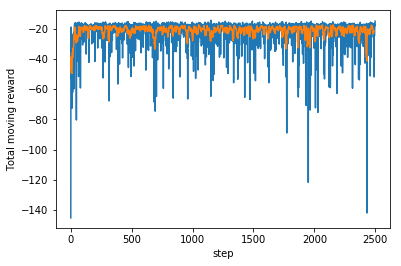

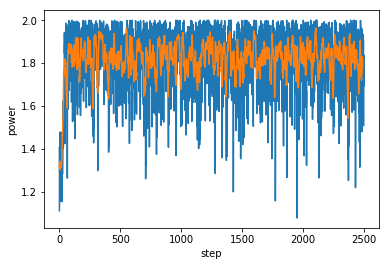

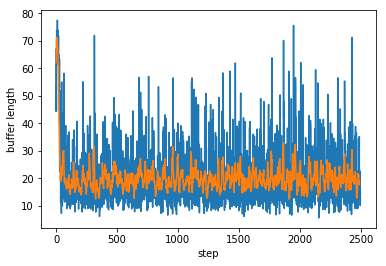

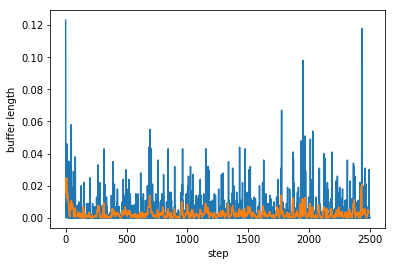

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])